In [7]:
# def do_imports():
import pandas as pd
import numpy as np
import scipy
import ujson
import json

# do_imports()


In [8]:
# # Opening JSON file
word2id = json.load(open( "docred_data/DocRED_baseline_metadata/word2id.json") )
rel2id = json.load(open("docred_data/DocRED_baseline_metadata/rel2id.json"))
ner2id = json.load(open( "docred_data/DocRED_baseline_metadata/ner2id.json") )
test = json.load(open("docred_data/Test_File_Created.json"))
train = json.load(open("docred_data/train_annotated.json"))
relinfo = json.load(open("docred_data/rel_info.json"))
dev = json.load(open("docred_data/dev.json"))


In [9]:
train_new = json.load(open("docred_data/new_train_annotated.json"))
len(train_new)
# smaller_train_new = train_new[:10]

# train_new = json.load(open("docred_data/new_train_annotated.json"))
# smaller_train_new = train_new[:10]
# out_file = open("docred_data/new_dev_annotated.json", "w")  
# json.dump(smaller_train_new, out_file)
# out_file.close()



3053

In [10]:
3053/4

763.25

In [11]:
# Write in Organized way

In [12]:
# Steps to do:
    # Step 1: Use just diseases, metabolites, food and carnicogen entities (food and carni later)
    # Step 2: All abstracts can be scraped by disease names and metabolism names
    # Step 3: Identify entities in each document - sentence by sentence and get a format similar to docred format
    # Step 4: Match entities only if they are present in any of Step 1
    


In [13]:
folder_path = 'Disease_Metabolites_Otherfactors_Abstracts/'


In [14]:
disease_risk_factors = ['Age', 'Alcohol', 'Cancer-Causing Substances', 'Chronic Inflammation', 'Diet', 'Hormones', 
                        'Immunosuppression', 'Infectious Agents', 'Obesity', 'Radiation', 'Sunlight', 'Tobacco']
    

In [17]:
# Get all entities in list
import re
with open(folder_path + 'disease', encoding="utf8") as f:
    contents = f.readlines()

contents[1].split('ENTRY')

disease_list = []
for i in range(1, len(contents)):
    if(contents[i][:4] == 'NAME'):        
        disease_list.append(re.sub(r'[^a-zA-Z0-9]', ' ', contents[i].split('NAME')[-1].split(', including')[0].strip()))
#     if(contents[i][:4] == 'DRUG'):
#         disease_list.append(contents[i].split('DRUG')[0].split('NAME')[-1].strip())
#     if(contents[i][:10] == 'CARCINOGEN'):
#         disease_list.append(contents[i].split('ENTRY')[0].split('NAME')[-1].strip())



In [18]:
diseases_list = json.load(open( folder_path + "malacards-diseases.json") )
len(diseases_list)

for i in range(len(diseases_list)):
    disease_list.append( re.sub(r'[^a-zA-Z0-9]', ' ', diseases_list[i]['disease']) )

In [19]:
len(disease_list)

19958

In [20]:
# More disease names from ontology file. This file has abbreviations of disease names
md = [{"name":"Aggressive Angiomyxoma","clinicalTrialKeywords":"aggressive angiomyxoma","dedicatedColor":"LightYellow","shortName":"AA","parent":"soft_tissue","cancerTypeId":"aa"}, {"name":"Anaplastic Astrocytoma","clinicalTrialKeywords":"anaplastic astrocytoma","dedicatedColor":"Gray","shortName":"AASTR","parent":"difg","cancerTypeId":"aastr"}, {"name":"Activated B-cell Type","clinicalTrialKeywords":"activated b-cell type","dedicatedColor":"LimeGreen","shortName":"ABC","parent":"dlbclnos","cancerTypeId":"abc"}, {"name":"Acute Basophilic Leukemia","clinicalTrialKeywords":"acute basophilic leukemia","dedicatedColor":"LightSalmon","shortName":"ABL","parent":"amlnos","cancerTypeId":"abl"}, {"name":"Adrenocortical Adenoma","clinicalTrialKeywords":"adrenocortical adenoma","dedicatedColor":"Purple","shortName":"ACA","parent":"adrenal_gland","cancerTypeId":"aca"}, {"name":"Adenoid Cystic Breast Cancer","clinicalTrialKeywords":"adenoid cystic breast cancer","dedicatedColor":"HotPink","shortName":"ACBC","parent":"brca","cancerTypeId":"acbc"}, {"name":"Adrenocortical Carcinoma","clinicalTrialKeywords":"adrenocortical carcinoma","dedicatedColor":"Purple","shortName":"ACC","parent":"adrenal_gland","cancerTypeId":"acc"}, {"name":"Acinic Cell Carcinoma","clinicalTrialKeywords":"acinic cell carcinoma","dedicatedColor":"DarkRed","shortName":"ACCC","parent":"saca","cancerTypeId":"accc"}, {"name":"Adenoid Cystic Carcinoma of the Lacrimal Gland","clinicalTrialKeywords":"adenoid cystic carcinoma of the lacrimal gland","dedicatedColor":"Green","shortName":"ACLG","parent":"lgt","cancerTypeId":"aclg"}, {"name":"Atypical Chronic Myeloid Leukemia, BCR-ABL1-","clinicalTrialKeywords":"atypical chronic myeloid leukemia, bcr-abl1-","dedicatedColor":"LightSalmon","shortName":"ACML","parent":"mds/mpn","cancerTypeId":"acml"}, {"name":"Acinar Cell Carcinoma, NOS","clinicalTrialKeywords":"acinar cell carcinoma, nos","dedicatedColor":"Black","shortName":"ACN","parent":"cup","cancerTypeId":"acn"}, {"name":"Craniopharyngioma, Adamantinomatous Type","clinicalTrialKeywords":"craniopharyngioma, adamantinomatous type","dedicatedColor":"Gray","shortName":"ACPG","parent":"selt","cancerTypeId":"acpg"}, {"name":"Atypical Choroid Plexus Papilloma","clinicalTrialKeywords":"atypical choroid plexus papilloma","dedicatedColor":"Gray","shortName":"ACPP","parent":"cpt","cancerTypeId":"acpp"}, {"name":"Acral Melanoma","clinicalTrialKeywords":"acral melanoma","dedicatedColor":"Black","shortName":"ACRM","parent":"mel","cancerTypeId":"acrm"}, {"name":"Adenoid Cystic Carcinoma","clinicalTrialKeywords":"adenoid cystic carcinoma","dedicatedColor":"DarkRed","shortName":"ACYC","parent":"saca","cancerTypeId":"acyc"}, {"name":"Adamantinoma","clinicalTrialKeywords":"adamantinoma","dedicatedColor":"White","shortName":"ADMA","parent":"bone","cancerTypeId":"adma"}, {"name":"Adenocarcinoma, NOS","clinicalTrialKeywords":"adenocarcinoma, nos","dedicatedColor":"Black","shortName":"ADNOS","parent":"cup","cancerTypeId":"adnos"}, {"name":"Aggressive Digital Papillary Adenocarcinoma","clinicalTrialKeywords":"aggressive digital papillary adenocarcinoma","dedicatedColor":"Black","shortName":"ADPA","parent":"skin","cancerTypeId":"adpa"}, {"name":"Adrenal Gland","clinicalTrialKeywords":"adrenal gland","dedicatedColor":"Purple","shortName":"ADRENAL_GLAND","parent":"tissue","cancerTypeId":"adrenal_gland"}, {"name":"Sweat Gland Carcinoma/Apocrine Eccrine Carcinoma","clinicalTrialKeywords":"sweat gland carcinoma/apocrine eccrine carcinoma","dedicatedColor":"Black","shortName":"AECA","parent":"skin","cancerTypeId":"aeca"}, {"name":"Angiomatoid Fibrous Histiocytoma","clinicalTrialKeywords":"angiomatoid fibrous histiocytoma","dedicatedColor":"LightYellow","shortName":"AFH","parent":"soft_tissue","cancerTypeId":"afh"}, {"name":"Atypical Fibroxanthoma","clinicalTrialKeywords":"atypical fibroxanthoma","dedicatedColor":"Black","shortName":"AFX","parent":"skin","cancerTypeId":"afx"}, {"name":"Anal Gland Adenocarcinoma","clinicalTrialKeywords":"anal gland adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"AGA","parent":"bowel","cancerTypeId":"aga"}, {"name":"Anaplastic Ganglioglioma","clinicalTrialKeywords":"anaplastic ganglioglioma","dedicatedColor":"Gray","shortName":"AGNG","parent":"encg","cancerTypeId":"agng"}, {"name":"Alpha Heavy-Chain Disease","clinicalTrialKeywords":"alpha heavy-chain disease","dedicatedColor":"LimeGreen","shortName":"AHCD","parent":"mbn","cancerTypeId":"ahcd"}, {"name":"Adenocarcinoma In Situ","clinicalTrialKeywords":"adenocarcinoma in situ","dedicatedColor":"Black","shortName":"AIS","parent":"other","cancerTypeId":"ais"}, {"name":"Angioimmunoblastic T-Cell Lymphoma","clinicalTrialKeywords":"angioimmunoblastic t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"AITL","parent":"mtnn","cancerTypeId":"aitl"}, {"name":"Acute Leukemias of Ambiguous Lineage","clinicalTrialKeywords":"acute leukemias of ambiguous lineage","dedicatedColor":"LightSalmon","shortName":"ALAL","parent":"mnm","cancerTypeId":"alal"}, {"name":"Anaplastic Large Cell Lymphoma","clinicalTrialKeywords":"anaplastic large cell lymphoma","dedicatedColor":"LimeGreen","shortName":"ALCL","parent":"mtnn","cancerTypeId":"alcl"}, {"name":"Anaplastic Large-Cell Lymphoma ALK Negative","clinicalTrialKeywords":"anaplastic large-cell lymphoma alk negative","dedicatedColor":"LimeGreen","shortName":"ALCLALKN","parent":"alcl","cancerTypeId":"alclalkn"}, {"name":"Anaplastic Large-Cell Lymphoma ALK Positive","clinicalTrialKeywords":"anaplastic large-cell lymphoma alk positive","dedicatedColor":"LimeGreen","shortName":"ALCLALKP","parent":"alcl","cancerTypeId":"alclalkp"}, {"name":"ALK Positive Large B-Cell Lymphoma","clinicalTrialKeywords":"alk positive large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"ALKLBCL","parent":"mbn","cancerTypeId":"alklbcl"}, {"name":"Atypical Lipomatous Tumor","clinicalTrialKeywords":"atypical lipomatous tumor","dedicatedColor":"LightYellow","shortName":"ALT","parent":"soft_tissue","cancerTypeId":"alt"}, {"name":"Atypical Lung Carcinoid","clinicalTrialKeywords":"atypical lung carcinoid","dedicatedColor":"Gainsboro","shortName":"ALUCA","parent":"lnet","cancerTypeId":"aluca"}, {"name":"AML with Maturation","clinicalTrialKeywords":"aml with maturation","dedicatedColor":"LightSalmon","shortName":"AM","parent":"amlnos","cancerTypeId":"am"}, {"name":"Large Cell/Anaplastic Medulloblastoma","clinicalTrialKeywords":"large cell/anaplastic medulloblastoma","dedicatedColor":"Gray","shortName":"AMBL","parent":"embt","cancerTypeId":"ambl"}, {"name":"Acute Megakaryoblastic Leukemia","clinicalTrialKeywords":"acute megakaryoblastic leukemia","dedicatedColor":"LightSalmon","shortName":"AMKL","parent":"amlnos","cancerTypeId":"amkl"}, {"name":"Acute Myeloid Leukemia","clinicalTrialKeywords":"acute myeloid leukemia","dedicatedColor":"LightSalmon","shortName":"AML","parent":"mnm","cancerTypeId":"aml"}, {"name":"AML with BCR-ABL1","clinicalTrialKeywords":"aml with bcr-abl1","dedicatedColor":"LightSalmon","shortName":"AMLBCRABL1","parent":"amlrga","cancerTypeId":"amlbcrabl1"}, {"name":"AML with inv(16)(p13.1q22) or t(16;16)(p13.1;q22);CBFB-MYH11","clinicalTrialKeywords":"aml with inv(16)(p13.1q22) or t(16;16)(p13.1;q22);cbfb-myh11","dedicatedColor":"LightSalmon","shortName":"AMLCBFBMYH11","parent":"amlrga","cancerTypeId":"amlcbfbmyh11"}, {"name":"AML with Biallelic Mutations of CEBPA","clinicalTrialKeywords":"aml with biallelic mutations of cebpa","dedicatedColor":"LightSalmon","shortName":"AMLCEBPA","parent":"amlrga","cancerTypeId":"amlcebpa"}, {"name":"AML with t(6;9)(p23;q34.1);DEK-NUP214","clinicalTrialKeywords":"aml with t(6;9)(p23;q34.1);dek-nup214","dedicatedColor":"LightSalmon","shortName":"AMLDEKNUP214","parent":"amlrga","cancerTypeId":"amldeknup214"}, {"name":"AML with inv(3)(q21.3q26.2) or t(3;3)(q21.3;q26.2); GATA2, MECOM","clinicalTrialKeywords":"aml with inv(3)(q21.3q26.2) or t(3;3)(q21.3;q26.2); gata2, mecom","dedicatedColor":"LightSalmon","shortName":"AMLGATA2MECOM","parent":"amlrga","cancerTypeId":"amlgata2mecom"}, {"name":"AML with Minimal Differentiation","clinicalTrialKeywords":"aml with minimal differentiation","dedicatedColor":"LightSalmon","shortName":"AMLMD","parent":"amlnos","cancerTypeId":"amlmd"}, {"name":"AML with t(9;11)(p21.3;q23.3);MLLT3-KMT2A","clinicalTrialKeywords":"aml with t(9;11)(p21.3;q23.3);mllt3-kmt2a","dedicatedColor":"LightSalmon","shortName":"AMLMLLT3KMT2A","parent":"amlrga","cancerTypeId":"amlmllt3kmt2a"}, {"name":"AML with Myelodysplasia-Related Changes","clinicalTrialKeywords":"aml with myelodysplasia-related changes","dedicatedColor":"LightSalmon","shortName":"AMLMRC","parent":"aml","cancerTypeId":"amlmrc"}, {"name":"AML, NOS","clinicalTrialKeywords":"aml, nos","dedicatedColor":"LightSalmon","shortName":"AMLNOS","parent":"aml","cancerTypeId":"amlnos"}, {"name":"AML with Mutated NPM1","clinicalTrialKeywords":"aml with mutated npm1","dedicatedColor":"LightSalmon","shortName":"AMLNPM1","parent":"amlrga","cancerTypeId":"amlnpm1"}, {"name":"AML with Variant RARA translocation","clinicalTrialKeywords":"aml with variant rara translocation","dedicatedColor":"LightSalmon","shortName":"AMLRARA","parent":"amlrga","cancerTypeId":"amlrara"}, {"name":"AML (megakaryoblastic) with t(1;22)(p13.3;q13.3);RBM15-MKL1","clinicalTrialKeywords":"aml (megakaryoblastic) with t(1;22)(p13.3;q13.3);rbm15-mkl1","dedicatedColor":"LightSalmon","shortName":"AMLRBM15MKL1","parent":"amlrga","cancerTypeId":"amlrbm15mkl1"}, {"name":"AML with Recurrent Genetic Abnormalities","clinicalTrialKeywords":"aml with recurrent genetic abnormalities","dedicatedColor":"LightSalmon","shortName":"AMLRGA","parent":"aml","cancerTypeId":"amlrga"}, {"name":"AML with Mutated RUNX1","clinicalTrialKeywords":"aml with mutated runx1","dedicatedColor":"LightSalmon","shortName":"AMLRUNX1","parent":"amlrga","cancerTypeId":"amlrunx1"}, {"name":"AML with t(8;21)(q22;q22.1);RUNX1-RUNX1T1","clinicalTrialKeywords":"aml with t(8;21)(q22;q22.1);runx1-runx1t1","dedicatedColor":"LightSalmon","shortName":"AMLRUNX1RUNX1T1","parent":"amlrga","cancerTypeId":"amlrunx1runx1t1"}, {"name":"Acute Myelomonocytic Leukemia","clinicalTrialKeywords":"acute myelomonocytic leukemia","dedicatedColor":"LightSalmon","shortName":"AMML","parent":"amlnos","cancerTypeId":"amml"}, {"name":"Acute Monoblastic/Monocytic Leukemia","clinicalTrialKeywords":"acute monoblastic/monocytic leukemia","dedicatedColor":"LightSalmon","shortName":"AMOL","parent":"amlnos","cancerTypeId":"amol"}, {"name":"Ampullary Carcinoma","clinicalTrialKeywords":"ampullary carcinoma","dedicatedColor":"Purple","shortName":"AMPCA","parent":"ampulla_of_vater","cancerTypeId":"ampca"}, {"name":"Ampulla of Vater","clinicalTrialKeywords":"ampulla of vater","dedicatedColor":"Purple","shortName":"AMPULLA_OF_VATER","parent":"tissue","cancerTypeId":"ampulla_of_vater"}, {"name":"Atypical Nevus","clinicalTrialKeywords":"atypical nevus","dedicatedColor":"Black","shortName":"AN","parent":"skin","cancerTypeId":"an"}, {"name":"Angiocentric Glioma","clinicalTrialKeywords":"angiocentric glioma","dedicatedColor":"Gray","shortName":"ANGL","parent":"mnet","cancerTypeId":"angl"}, {"name":"Angiosarcoma","clinicalTrialKeywords":"angiosarcoma","dedicatedColor":"LightYellow","shortName":"ANGS","parent":"soft_tissue","cancerTypeId":"angs"}, {"name":"Aggressive NK-Cell Leukemia","clinicalTrialKeywords":"aggressive nk-cell leukemia","dedicatedColor":"LimeGreen","shortName":"ANKL","parent":"mtnn","cancerTypeId":"ankl"}, {"name":"Anaplastic Meningioma","clinicalTrialKeywords":"anaplastic meningioma","dedicatedColor":"Gray","shortName":"ANM","parent":"mngt","cancerTypeId":"anm"}, {"name":"Anal Squamous Cell Carcinoma","clinicalTrialKeywords":"anal squamous cell carcinoma","dedicatedColor":"SaddleBrown","shortName":"ANSC","parent":"bowel","cancerTypeId":"ansc"}, {"name":"Anaplastic Oligoastrocytoma","clinicalTrialKeywords":"anaplastic oligoastrocytoma","dedicatedColor":"Gray","shortName":"AOAST","parent":"difg","cancerTypeId":"aoast"}, {"name":"Anaplastic Oligodendroglioma","clinicalTrialKeywords":"anaplastic oligodendroglioma","dedicatedColor":"Gray","shortName":"AODG","parent":"difg","cancerTypeId":"aodg"}, {"name":"Appendiceal Adenocarcinoma","clinicalTrialKeywords":"appendiceal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"APAD","parent":"bowel","cancerTypeId":"apad"}, {"name":"Anaplastic Ependymoma","clinicalTrialKeywords":"anaplastic ependymoma","dedicatedColor":"Gray","shortName":"APE","parent":"epmt","cancerTypeId":"ape"}, {"name":"APL with PML-RARA","clinicalTrialKeywords":"apl with pml-rara","dedicatedColor":"LightSalmon","shortName":"APLPMLRARA","parent":"amlrga","cancerTypeId":"aplpmlrara"}, {"name":"Acute Panmyelosis with Myelofibrosis","clinicalTrialKeywords":"acute panmyelosis with myelofibrosis","dedicatedColor":"LightSalmon","shortName":"APMF","parent":"amlnos","cancerTypeId":"apmf"}, {"name":"Atypical Pituitary Adenoma","clinicalTrialKeywords":"atypical pituitary adenoma","dedicatedColor":"Gray","shortName":"APTAD","parent":"selt","cancerTypeId":"aptad"}, {"name":"Anaplastic Pleomorphic Xanthoastrocytoma","clinicalTrialKeywords":"anaplastic pleomorphic xanthoastrocytoma","dedicatedColor":"Gray","shortName":"APXA","parent":"encg","cancerTypeId":"apxa"}, {"name":"Anorectal Mucosal Melanoma","clinicalTrialKeywords":"anorectal mucosal melanoma","dedicatedColor":"SaddleBrown","shortName":"ARMM","parent":"bowel","cancerTypeId":"armm"}, {"name":"Alveolar Rhabdomyosarcoma","clinicalTrialKeywords":"alveolar rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"ARMS","parent":"rms","cancerTypeId":"arms"}, {"name":"Adenosquamous Carcinoma of the Tongue","clinicalTrialKeywords":"adenosquamous carcinoma of the tongue","dedicatedColor":"DarkRed","shortName":"ASCT","parent":"ohnca","cancerTypeId":"asct"}, {"name":"Aggressive Systemic Mastocytosis","clinicalTrialKeywords":"aggressive systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"ASM","parent":"sm","cancerTypeId":"asm"}, {"name":"Alveolar Soft Part Sarcoma","clinicalTrialKeywords":"alveolar soft part sarcoma","dedicatedColor":"LightYellow","shortName":"ASPS","parent":"soft_tissue","cancerTypeId":"asps"}, {"name":"Astroblastoma","clinicalTrialKeywords":"astroblastoma","dedicatedColor":"Gray","shortName":"ASTB","parent":"mnet","cancerTypeId":"astb"}, {"name":"Astrocytoma","clinicalTrialKeywords":"astrocytoma","dedicatedColor":"Gray","shortName":"ASTR","parent":"difg","cancerTypeId":"astr"}, {"name":"Adult T-Cell Leukemia/Lymphoma","clinicalTrialKeywords":"adult t-cell leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"ATLL","parent":"mtnn","cancerTypeId":"atll"}, {"name":"Atypical Meningioma","clinicalTrialKeywords":"atypical meningioma","dedicatedColor":"Gray","shortName":"ATM","parent":"mngt","cancerTypeId":"atm"}, {"name":"Atypical Teratoid/Rhabdoid Tumor","clinicalTrialKeywords":"atypical teratoid/rhabdoid tumor","dedicatedColor":"Gray","shortName":"ATRT","parent":"embt","cancerTypeId":"atrt"}, {"name":"Acute Undifferentiated Leukemia","clinicalTrialKeywords":"acute undifferentiated leukemia","dedicatedColor":"LightSalmon","shortName":"AUL","parent":"alal","cancerTypeId":"aul"}, {"name":"Well-Differentiated Neuroendocrine Tumor of the Appendix","clinicalTrialKeywords":"well-differentiated neuroendocrine tumor of the appendix","dedicatedColor":"SaddleBrown","shortName":"AWDNET","parent":"ginet","cancerTypeId":"awdnet"}, {"name":"AML without Maturation","clinicalTrialKeywords":"aml without maturation","dedicatedColor":"LightSalmon","shortName":"AWM","parent":"amlnos","cancerTypeId":"awm"}, {"name":"Breast Angiosarcoma","clinicalTrialKeywords":"breast angiosarcoma","dedicatedColor":"HotPink","shortName":"BA","parent":"pbs","cancerTypeId":"ba"}, {"name":"Basal Cell Adenocarcinoma","clinicalTrialKeywords":"basal cell adenocarcinoma","dedicatedColor":"DarkRed","shortName":"BCAC","parent":"saca","cancerTypeId":"bcac"}, {"name":"Basal Cell Carcinoma","clinicalTrialKeywords":"basal cell carcinoma","dedicatedColor":"Black","shortName":"BCC","parent":"skin","cancerTypeId":"bcc"}, {"name":"Choriocarcinoma","clinicalTrialKeywords":"choriocarcinoma","dedicatedColor":"Gray","shortName":"BCCA","parent":"bgct","cancerTypeId":"bcca"}, {"name":"B-Cell Lymphoma, Unclassifiable, with Features Intermediate between DLBCL and Classical Hodgkin lymphoma","clinicalTrialKeywords":"b-cell lymphoma, unclassifiable, with features intermediate between dlbcl and classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"BCLU","parent":"mbn","cancerTypeId":"bclu"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"Gray","shortName":"BEC","parent":"bgct","cancerTypeId":"bec"}, {"name":"Breast Fibroepithelial Neoplasms","clinicalTrialKeywords":"breast fibroepithelial neoplasms","dedicatedColor":"HotPink","shortName":"BFN","parent":"breast","cancerTypeId":"bfn"}, {"name":"Germ Cell Tumor, Brain","clinicalTrialKeywords":"germ cell tumor, brain","dedicatedColor":"Gray","shortName":"BGCT","parent":"brain","cancerTypeId":"bgct"}, {"name":"Breast Implant-Associated Anaplastic Large-Cell Lymphoma","clinicalTrialKeywords":"breast implant-associated anaplastic large-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"BIALCL","parent":"alcl","cancerTypeId":"bialcl"}, {"name":"Biliary Tract","clinicalTrialKeywords":"biliary tract","dedicatedColor":"Green","shortName":"BILIARY_TRACT","parent":"tissue","cancerTypeId":"biliary_tract"}, {"name":"Immature Teratoma","clinicalTrialKeywords":"immature teratoma","dedicatedColor":"Gray","shortName":"BIMT","parent":"bgct","cancerTypeId":"bimt"}, {"name":"Burkitt Lymphoma","clinicalTrialKeywords":"burkitt lymphoma","dedicatedColor":"LimeGreen","shortName":"BL","parent":"mbn","cancerTypeId":"bl"}, {"name":"Bladder Adenocarcinoma","clinicalTrialKeywords":"bladder adenocarcinoma","dedicatedColor":"Yellow","shortName":"BLAD","parent":"bladder","cancerTypeId":"blad"}, {"name":"Bladder/Urinary Tract","clinicalTrialKeywords":"bladder/urinary tract","dedicatedColor":"Yellow","shortName":"BLADDER","parent":"tissue","cancerTypeId":"bladder"}, {"name":"Bladder Urothelial Carcinoma","clinicalTrialKeywords":"bladder urothelial carcinoma","dedicatedColor":"Yellow","shortName":"BLCA","parent":"bladder","cancerTypeId":"blca"}, {"name":"Basaloid Large Cell Carcinoma of the Lung","clinicalTrialKeywords":"basaloid large cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"BLCLC","parent":"lclc","cancerTypeId":"blclc"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"BLL","parent":"lnm","cancerTypeId":"bll"}, {"name":"Burkitt-Like Lymphoma with 11q Aberration","clinicalTrialKeywords":"burkitt-like lymphoma with 11q aberration","dedicatedColor":"LimeGreen","shortName":"BLL11Q","parent":"mbn","cancerTypeId":"bll11q"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(9;22)(q34.1;q11.2);BCR-ABL1","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(9;22)(q34.1;q11.2);bcr-abl1","dedicatedColor":"LimeGreen","shortName":"BLLBCRABL1","parent":"bllrga","cancerTypeId":"bllbcrabl1"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma, BCR-ABL1 Like","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma, bcr-abl1 like","dedicatedColor":"LimeGreen","shortName":"BLLBCRABL1L","parent":"bllrga","cancerTypeId":"bllbcrabl1l"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(12;21)(p13.2;q22.1); ETV6-RUNX1","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(12;21)(p13.2;q22.1); etv6-runx1","dedicatedColor":"LimeGreen","shortName":"BLLETV6RUNX1","parent":"bllrga","cancerTypeId":"blletv6runx1"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with Hyperdiploidy","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with hyperdiploidy","dedicatedColor":"LimeGreen","shortName":"BLLHYPER","parent":"bllrga","cancerTypeId":"bllhyper"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with Hypodiploidy","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with hypodiploidy","dedicatedColor":"LimeGreen","shortName":"BLLHYPO","parent":"bllrga","cancerTypeId":"bllhypo"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with iAMP21","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with iamp21","dedicatedColor":"LimeGreen","shortName":"BLLIAMP21","parent":"bllrga","cancerTypeId":"blliamp21"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(5;14)(q31.1;q32.3) IL3-IGH","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(5;14)(q31.1;q32.3) il3-igh","dedicatedColor":"LimeGreen","shortName":"BLLIL3IGH","parent":"bllrga","cancerTypeId":"bllil3igh"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(v;11q23.3);KMT2A Rearranged","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(v;11q23.3);kmt2a rearranged","dedicatedColor":"LimeGreen","shortName":"BLLKMT2A","parent":"bllrga","cancerTypeId":"bllkmt2a"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma, NOS","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"BLLNOS","parent":"bll","cancerTypeId":"bllnos"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with Recurrent Genetic Abnormalities","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with recurrent genetic abnormalities","dedicatedColor":"LimeGreen","shortName":"BLLRGA","parent":"bll","cancerTypeId":"bllrga"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(1;19)(q23;p13.3);TCF3-PBX1","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(1;19)(q23;p13.3);tcf3-pbx1","dedicatedColor":"LimeGreen","shortName":"BLLTCF3PBX1","parent":"bllrga","cancerTypeId":"blltcf3pbx1"}, {"name":"Borderline Phyllodes Tumor of the Breast","clinicalTrialKeywords":"borderline phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"BLPT","parent":"pt","cancerTypeId":"blpt"}, {"name":"Bladder Squamous Cell Carcinoma","clinicalTrialKeywords":"bladder squamous cell carcinoma","dedicatedColor":"Yellow","shortName":"BLSC","parent":"bladder","cancerTypeId":"blsc"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"Gray","shortName":"BMGCT","parent":"bgct","cancerTypeId":"bmgct"}, {"name":"Malignant Teratoma","clinicalTrialKeywords":"malignant teratoma","dedicatedColor":"Gray","shortName":"BMGT","parent":"bgct","cancerTypeId":"bmgt"}, {"name":"Mature Teratoma","clinicalTrialKeywords":"mature teratoma","dedicatedColor":"Gray","shortName":"BMT","parent":"bgct","cancerTypeId":"bmt"}, {"name":"Breast Neoplasm, NOS","clinicalTrialKeywords":"breast neoplasm, nos","dedicatedColor":"HotPink","shortName":"BNNOS","parent":"breast","cancerTypeId":"bnnos"}, {"name":"Bone","clinicalTrialKeywords":"bone","dedicatedColor":"White","shortName":"BONE","parent":"tissue","cancerTypeId":"bone"}, {"name":"Bowel","clinicalTrialKeywords":"bowel","dedicatedColor":"SaddleBrown","shortName":"BOWEL","parent":"tissue","cancerTypeId":"bowel"}, {"name":"Blastic Plasmacytoid Dendritic Cell Neoplasm","clinicalTrialKeywords":"blastic plasmacytoid dendritic cell neoplasm","dedicatedColor":"LightSalmon","shortName":"BPDCN","parent":"mnm","cancerTypeId":"bpdcn"}, {"name":"B-Cell Prolymphocytic Leukemia","clinicalTrialKeywords":"b-cell prolymphocytic leukemia","dedicatedColor":"LimeGreen","shortName":"BPLL","parent":"mbn","cancerTypeId":"bpll"}, {"name":"Basaloid Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"basaloid penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"BPSCC","parent":"pscc","cancerTypeId":"bpscc"}, {"name":"Benign Phyllodes Tumor of the Breast","clinicalTrialKeywords":"benign phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"BPT","parent":"pt","cancerTypeId":"bpt"}, {"name":"CNS/Brain","clinicalTrialKeywords":"cns/brain","dedicatedColor":"Gray","shortName":"BRAIN","parent":"tissue","cancerTypeId":"brain"}, {"name":"Adenomyoepithelioma of the Breast","clinicalTrialKeywords":"adenomyoepithelioma of the breast","dedicatedColor":"HotPink","shortName":"BRAME","parent":"breast","cancerTypeId":"brame"}, {"name":"Invasive Breast Carcinoma","clinicalTrialKeywords":"invasive breast carcinoma","dedicatedColor":"HotPink","shortName":"BRCA","parent":"breast","cancerTypeId":"brca"}, {"name":"Breast Invasive Cancer, NOS","clinicalTrialKeywords":"breast invasive cancer, nos","dedicatedColor":"HotPink","shortName":"BRCANOS","parent":"brca","cancerTypeId":"brcanos"}, {"name":"Breast Invasive Carcinoma, NOS","clinicalTrialKeywords":"breast invasive carcinoma, nos","dedicatedColor":"HotPink","shortName":"BRCNOS","parent":"brca","cancerTypeId":"brcnos"}, {"name":"Breast","clinicalTrialKeywords":"breast","dedicatedColor":"HotPink","shortName":"BREAST","parent":"tissue","cancerTypeId":"breast"}, {"name":"Breast Carcinoma with Signet Ring","clinicalTrialKeywords":"breast carcinoma with signet ring","dedicatedColor":"HotPink","shortName":"BRSRCC","parent":"brca","cancerTypeId":"brsrcc"}, {"name":"Brenner Tumor, Benign","clinicalTrialKeywords":"brenner tumor, benign","dedicatedColor":"LightBlue","shortName":"BTBEOV","parent":"btov","cancerTypeId":"btbeov"}, {"name":"Brenner Tumor, Borderline","clinicalTrialKeywords":"brenner tumor, borderline","dedicatedColor":"LightBlue","shortName":"BTBOV","parent":"btov","cancerTypeId":"btbov"}, {"name":"Brenner Tumor, Malignant","clinicalTrialKeywords":"brenner tumor, malignant","dedicatedColor":"LightBlue","shortName":"BTMOV","parent":"btov","cancerTypeId":"btmov"}, {"name":"Brenner Tumor","clinicalTrialKeywords":"brenner tumor","dedicatedColor":"LightBlue","shortName":"BTOV","parent":"ovt","cancerTypeId":"btov"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"Gray","shortName":"BYST","parent":"bgct","cancerTypeId":"byst"}, {"name":"Cervical Adenoid Basal Carcinoma","clinicalTrialKeywords":"cervical adenoid basal carcinoma","dedicatedColor":"Teal","shortName":"CABC","parent":"cervix","cancerTypeId":"cabc"}, {"name":"Cervical Adenoid Cystic Carcinoma","clinicalTrialKeywords":"cervical adenoid cystic carcinoma","dedicatedColor":"Teal","shortName":"CACC","parent":"cervix","cancerTypeId":"cacc"}, {"name":"Carcinoma ex Pleomorphic Adenoma","clinicalTrialKeywords":"carcinoma ex pleomorphic adenoma","dedicatedColor":"DarkRed","shortName":"CAEXPA","parent":"saca","cancerTypeId":"caexpa"}, {"name":"Colon Adenocarcinoma In Situ","clinicalTrialKeywords":"colon adenocarcinoma in situ","dedicatedColor":"SaddleBrown","shortName":"CAIS","parent":"coadread","cancerTypeId":"cais"}, {"name":"Clear Cell Borderline Ovarian Tumor","clinicalTrialKeywords":"clear cell borderline ovarian tumor","dedicatedColor":"LightBlue","shortName":"CCBOV","parent":"ovt","cancerTypeId":"ccbov"}, {"name":"Clear Cell Ependymoma","clinicalTrialKeywords":"clear cell ependymoma","dedicatedColor":"Gray","shortName":"CCE","parent":"epmt","cancerTypeId":"cce"}, {"name":"Conventional Type Chordoma","clinicalTrialKeywords":"conventional type chordoma","dedicatedColor":"White","shortName":"CCHDM","parent":"chdm","cancerTypeId":"cchdm"}, {"name":"Carcinoma with Chondroid Metaplasia","clinicalTrialKeywords":"carcinoma with chondroid metaplasia","dedicatedColor":"HotPink","shortName":"CCHM","parent":"mmbc","cancerTypeId":"cchm"}, {"name":"Clear Cell Carcinoma of the Lung","clinicalTrialKeywords":"clear cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"CCLC","parent":"lclc","cancerTypeId":"cclc"}, {"name":"Clear cell Meningioma","clinicalTrialKeywords":"clear cell meningioma","dedicatedColor":"Gray","shortName":"CCM","parent":"mngt","cancerTypeId":"ccm"}, {"name":"Clear Cell Odontogenic Carcinoma","clinicalTrialKeywords":"clear cell odontogenic carcinoma","dedicatedColor":"DarkRed","shortName":"CCOC","parent":"odgc","cancerTypeId":"ccoc"}, {"name":"Clear Cell Ovarian Cancer","clinicalTrialKeywords":"clear cell ovarian cancer","dedicatedColor":"LightBlue","shortName":"CCOV","parent":"ovt","cancerTypeId":"ccov"}, {"name":"Clear Cell Papillary Renal Cell Carcinoma","clinicalTrialKeywords":"clear cell papillary renal cell carcinoma","dedicatedColor":"Orange","shortName":"CCPRC","parent":"nccrcc","cancerTypeId":"ccprc"}, {"name":"Renal Clear Cell Carcinoma","clinicalTrialKeywords":"renal clear cell carcinoma","dedicatedColor":"Orange","shortName":"CCRCC","parent":"rcc","cancerTypeId":"ccrcc"}, {"name":"Clear Cell Sarcoma","clinicalTrialKeywords":"clear cell sarcoma","dedicatedColor":"LightYellow","shortName":"CCS","parent":"soft_tissue","cancerTypeId":"ccs"}, {"name":"Clear Cell Sarcoma of Kidney","clinicalTrialKeywords":"clear cell sarcoma of kidney","dedicatedColor":"Orange","shortName":"CCSK","parent":"kidney","cancerTypeId":"ccsk"}, {"name":"Collecting Duct Renal Cell Carcinoma","clinicalTrialKeywords":"collecting duct renal cell carcinoma","dedicatedColor":"Orange","shortName":"CDRCC","parent":"nccrcc","cancerTypeId":"cdrcc"}, {"name":"Cervical Adenocarcinoma","clinicalTrialKeywords":"cervical adenocarcinoma","dedicatedColor":"Teal","shortName":"CEAD","parent":"cervix","cancerTypeId":"cead"}, {"name":"Cervical Adenocarcinoma In Situ","clinicalTrialKeywords":"cervical adenocarcinoma in situ","dedicatedColor":"Teal","shortName":"CEAIS","parent":"cervix","cancerTypeId":"ceais"}, {"name":"Cervical Adenosquamous Carcinoma","clinicalTrialKeywords":"cervical adenosquamous carcinoma","dedicatedColor":"Teal","shortName":"CEAS","parent":"cervix","cancerTypeId":"ceas"}, {"name":"Cervical Clear Cell Carcinoma","clinicalTrialKeywords":"cervical clear cell carcinoma","dedicatedColor":"Teal","shortName":"CECC","parent":"cead","cancerTypeId":"cecc"}, {"name":"Cervical Endometrioid Carcinoma","clinicalTrialKeywords":"cervical endometrioid carcinoma","dedicatedColor":"Teal","shortName":"CEEN","parent":"cead","cancerTypeId":"ceen"}, {"name":"Glassy Cell Carcinoma of the Cervix","clinicalTrialKeywords":"glassy cell carcinoma of the cervix","dedicatedColor":"Teal","shortName":"CEGCC","parent":"cervix","cancerTypeId":"cegcc"}, {"name":"Cervical Leiomyosarcoma","clinicalTrialKeywords":"cervical leiomyosarcoma","dedicatedColor":"Teal","shortName":"CELI","parent":"cervix","cancerTypeId":"celi"}, {"name":"Chronic Eosinophilic Leukemia, NOS","clinicalTrialKeywords":"chronic eosinophilic leukemia, nos","dedicatedColor":"LightSalmon","shortName":"CELNOS","parent":"mpn","cancerTypeId":"celnos"}, {"name":"Mesonephric Carcinoma","clinicalTrialKeywords":"mesonephric carcinoma","dedicatedColor":"Teal","shortName":"CEMN","parent":"cead","cancerTypeId":"cemn"}, {"name":"Mucinous Carcinoma","clinicalTrialKeywords":"mucinous carcinoma","dedicatedColor":"Teal","shortName":"CEMU","parent":"cead","cancerTypeId":"cemu"}, {"name":"Cervical Neuroendocrine Tumor","clinicalTrialKeywords":"cervical neuroendocrine tumor","dedicatedColor":"Teal","shortName":"CENE","parent":"cervix","cancerTypeId":"cene"}, {"name":"Cervical Rhabdomyosarcoma","clinicalTrialKeywords":"cervical rhabdomyosarcoma","dedicatedColor":"Teal","shortName":"CERMS","parent":"cervix","cancerTypeId":"cerms"}, {"name":"Cervix","clinicalTrialKeywords":"cervix","dedicatedColor":"Teal","shortName":"CERVIX","parent":"tissue","cancerTypeId":"cervix"}, {"name":"Cervical Squamous Cell Carcinoma","clinicalTrialKeywords":"cervical squamous cell carcinoma","dedicatedColor":"Teal","shortName":"CESC","parent":"cervix","cancerTypeId":"cesc"}, {"name":"Cervical Serous Carcinoma","clinicalTrialKeywords":"cervical serous carcinoma","dedicatedColor":"Teal","shortName":"CESE","parent":"cead","cancerTypeId":"cese"}, {"name":"Villoglandular Carcinoma","clinicalTrialKeywords":"villoglandular carcinoma","dedicatedColor":"Teal","shortName":"CEVG","parent":"cead","cancerTypeId":"cevg"}, {"name":"Chondroblastoma","clinicalTrialKeywords":"chondroblastoma","dedicatedColor":"White","shortName":"CHBL","parent":"bone","cancerTypeId":"chbl"}, {"name":"Chordoma","clinicalTrialKeywords":"chordoma","dedicatedColor":"White","shortName":"CHDM","parent":"bone","cancerTypeId":"chdm"}, {"name":"Chordoid Glioma of the Third Ventricle","clinicalTrialKeywords":"chordoid glioma of the third ventricle","dedicatedColor":"Gray","shortName":"CHGL","parent":"mnet","cancerTypeId":"chgl"}, {"name":"Classical Hodgkin Lymphoma","clinicalTrialKeywords":"classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"CHL","parent":"hl","cancerTypeId":"chl"}, {"name":"Classical Hodgkin Lymphoma PTLD","clinicalTrialKeywords":"classical hodgkin lymphoma ptld","dedicatedColor":"LimeGreen","shortName":"CHLPTLD","parent":"ptld","cancerTypeId":"chlptld"}, {"name":"Complete Hydatidiform Mole","clinicalTrialKeywords":"complete hydatidiform mole","dedicatedColor":"PeachPuff","shortName":"CHM","parent":"mp","cancerTypeId":"chm"}, {"name":"Cholangiocarcinoma","clinicalTrialKeywords":"cholangiocarcinoma","dedicatedColor":"Green","shortName":"CHOL","parent":"biliary_tract","cancerTypeId":"chol"}, {"name":"Chordoid Meningioma","clinicalTrialKeywords":"chordoid meningioma","dedicatedColor":"Gray","shortName":"CHOM","parent":"mngt","cancerTypeId":"chom"}, {"name":"Chondroblastic Osteosarcoma","clinicalTrialKeywords":"chondroblastic osteosarcoma","dedicatedColor":"White","shortName":"CHOS","parent":"os","cancerTypeId":"chos"}, {"name":"Chromophobe Renal Cell Carcinoma","clinicalTrialKeywords":"chromophobe renal cell carcinoma","dedicatedColor":"Orange","shortName":"CHRCC","parent":"nccrcc","cancerTypeId":"chrcc"}, {"name":"Chondrosarcoma","clinicalTrialKeywords":"chondrosarcoma","dedicatedColor":"White","shortName":"CHS","parent":"bone","cancerTypeId":"chs"}, {"name":"Chronic Lymphocytic Leukemia/Small Lymphocytic Lymphoma","clinicalTrialKeywords":"chronic lymphocytic leukemia/small lymphocytic lymphoma","dedicatedColor":"LimeGreen","shortName":"CLLSLL","parent":"mbn","cancerTypeId":"cllsll"}, {"name":"Cerebellar Liponeurocytoma","clinicalTrialKeywords":"cerebellar liponeurocytoma","dedicatedColor":"Gray","shortName":"CLNC","parent":"mnet","cancerTypeId":"clnc"}, {"name":"Chronic Lymphoproliferative Disorder of NK Cells","clinicalTrialKeywords":"chronic lymphoproliferative disorder of nk cells","dedicatedColor":"LimeGreen","shortName":"CLPDNK","parent":"mtnn","cancerTypeId":"clpdnk"}, {"name":"Conjunctival Melanoma","clinicalTrialKeywords":"conjunctival melanoma","dedicatedColor":"Green","shortName":"CM","parent":"om","cancerTypeId":"cm"}, {"name":"Medullary Carcinoma of the Colon","clinicalTrialKeywords":"medullary carcinoma of the colon","dedicatedColor":"SaddleBrown","shortName":"CMC","parent":"bowel","cancerTypeId":"cmc"}, {"name":"Cutaneous Mastocytosis","clinicalTrialKeywords":"cutaneous mastocytosis","dedicatedColor":"LightSalmon","shortName":"CMCD","parent":"mcd","cancerTypeId":"cmcd"}, {"name":"Chronic Myelogenous Leukemia","clinicalTrialKeywords":"chronic myelogenous leukemia","dedicatedColor":"LightSalmon","shortName":"CML","parent":"mpn","cancerTypeId":"cml"}, {"name":"Chronic Myeloid Leukemia, BCR-ABL1+","clinicalTrialKeywords":"chronic myeloid leukemia, bcr-abl1+","dedicatedColor":"LightSalmon","shortName":"CMLBCRABL1","parent":"cml","cancerTypeId":"cmlbcrabl1"}, {"name":"Chronic Myelomonocytic Leukemia","clinicalTrialKeywords":"chronic myelomonocytic leukemia","dedicatedColor":"LightSalmon","shortName":"CMML","parent":"mds/mpn","cancerTypeId":"cmml"}, {"name":"Chronic Myelomonocytic Leukemia-0","clinicalTrialKeywords":"chronic myelomonocytic leukemia-0","dedicatedColor":"LightSalmon","shortName":"CMML0","parent":"cmml","cancerTypeId":"cmml0"}, {"name":"Chronic Myelomonocytic Leukemia-1","clinicalTrialKeywords":"chronic myelomonocytic leukemia-1","dedicatedColor":"LightSalmon","shortName":"CMML1","parent":"cmml","cancerTypeId":"cmml1"}, {"name":"Chronic Myelomonocytic Leukemia-2","clinicalTrialKeywords":"chronic myelomonocytic leukemia-2","dedicatedColor":"LightSalmon","shortName":"CMML2","parent":"cmml","cancerTypeId":"cmml2"}, {"name":"Ciliated Muconodular Papillary Tumor of the Lung","clinicalTrialKeywords":"ciliated muconodular papillary tumor of the lung","dedicatedColor":"Gainsboro","shortName":"CMPT","parent":"nsclc","cancerTypeId":"cmpt"}, {"name":"Central Neurocytoma","clinicalTrialKeywords":"central neurocytoma","dedicatedColor":"Gray","shortName":"CNC","parent":"mnet","cancerTypeId":"cnc"}, {"name":"Chronic Neutrophilic Leukemia","clinicalTrialKeywords":"chronic neutrophilic leukemia","dedicatedColor":"LightSalmon","shortName":"CNL","parent":"mpn","cancerTypeId":"cnl"}, {"name":"Colon Adenocarcinoma","clinicalTrialKeywords":"colon adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"COAD","parent":"coadread","cancerTypeId":"coad"}, {"name":"Colorectal Adenocarcinoma","clinicalTrialKeywords":"colorectal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"COADREAD","parent":"bowel","cancerTypeId":"coadread"}, {"name":"Carcinoma with Osseous Metaplasia","clinicalTrialKeywords":"carcinoma with osseous metaplasia","dedicatedColor":"HotPink","shortName":"COM","parent":"mmbc","cancerTypeId":"com"}, {"name":"Choroid Plexus Carcinoma","clinicalTrialKeywords":"choroid plexus carcinoma","dedicatedColor":"Gray","shortName":"CPC","parent":"cpt","cancerTypeId":"cpc"}, {"name":"Choroid Plexus Papilloma","clinicalTrialKeywords":"choroid plexus papilloma","dedicatedColor":"Gray","shortName":"CPP","parent":"cpt","cancerTypeId":"cpp"}, {"name":"Choroid Plexus Tumor","clinicalTrialKeywords":"choroid plexus tumor","dedicatedColor":"Gray","shortName":"CPT","parent":"brain","cancerTypeId":"cpt"}, {"name":"Cutaneous Squamous Cell Carcinoma","clinicalTrialKeywords":"cutaneous squamous cell carcinoma","dedicatedColor":"Black","shortName":"CSCC","parent":"skin","cancerTypeId":"cscc"}, {"name":"Cellular Schwannoma","clinicalTrialKeywords":"cellular schwannoma","dedicatedColor":"Gray","shortName":"CSCHW","parent":"schw","cancerTypeId":"cschw"}, {"name":"Combined Small Cell Lung Carcinoma","clinicalTrialKeywords":"combined small cell lung carcinoma","dedicatedColor":"Gainsboro","shortName":"CSCLC","parent":"lung","cancerTypeId":"csclc"}, {"name":"Breast Invasive Carcinosarcoma, NOS","clinicalTrialKeywords":"breast invasive carcinosarcoma, nos","dedicatedColor":"HotPink","shortName":"CSNOS","parent":"brca","cancerTypeId":"csnos"}, {"name":"Colonic Type Adenocarcinoma of the Appendix","clinicalTrialKeywords":"colonic type adenocarcinoma of the appendix","dedicatedColor":"SaddleBrown","shortName":"CTAAP","parent":"apad","cancerTypeId":"ctaap"}, {"name":"Cancer of Unknown Primary","clinicalTrialKeywords":"cancer of unknown primary","dedicatedColor":"Black","shortName":"CUP","parent":"other","cancerTypeId":"cup"}, {"name":"Cancer of Unknown Primary, NOS","clinicalTrialKeywords":"cancer of unknown primary, nos","dedicatedColor":"Black","shortName":"CUPNOS","parent":"cup","cancerTypeId":"cupnos"}, {"name":"Duodenal Adenocarcinoma","clinicalTrialKeywords":"duodenal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"DA","parent":"sbc","cancerTypeId":"da"}, {"name":"Diffuse Astrocytoma","clinicalTrialKeywords":"diffuse astrocytoma","dedicatedColor":"Gray","shortName":"DASTR","parent":"difg","cancerTypeId":"dastr"}, {"name":"Breast Ductal Carcinoma In Situ","clinicalTrialKeywords":"breast ductal carcinoma in situ","dedicatedColor":"HotPink","shortName":"DCIS","parent":"breast","cancerTypeId":"dcis"}, {"name":"Dendritic Cell Sarcoma","clinicalTrialKeywords":"dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"DCS","parent":"soft_tissue","cancerTypeId":"dcs"}, {"name":"Dedifferentiated Chordoma","clinicalTrialKeywords":"dedifferentiated chordoma","dedicatedColor":"White","shortName":"DDCHDM","parent":"chdm","cancerTypeId":"ddchdm"}, {"name":"Dedifferentiated Chondrosarcoma","clinicalTrialKeywords":"dedifferentiated chondrosarcoma","dedicatedColor":"White","shortName":"DDCHS","parent":"chs","cancerTypeId":"ddchs"}, {"name":"Dedifferentiated Liposarcoma","clinicalTrialKeywords":"dedifferentiated liposarcoma","dedicatedColor":"LightYellow","shortName":"DDLS","parent":"lipo","cancerTypeId":"ddls"}, {"name":"Desmoid/Aggressive Fibromatosis","clinicalTrialKeywords":"desmoid/aggressive fibromatosis","dedicatedColor":"LightYellow","shortName":"DES","parent":"soft_tissue","cancerTypeId":"des"}, {"name":"Desmoplastic Melanoma","clinicalTrialKeywords":"desmoplastic melanoma","dedicatedColor":"Black","shortName":"DESM","parent":"mel","cancerTypeId":"desm"}, {"name":"Dermatofibroma","clinicalTrialKeywords":"dermatofibroma","dedicatedColor":"Black","shortName":"DF","parent":"skin","cancerTypeId":"df"}, {"name":"Duodenal-Type Follicular Lymphoma","clinicalTrialKeywords":"duodenal-type follicular lymphoma","dedicatedColor":"LimeGreen","shortName":"DFL","parent":"fl","cancerTypeId":"dfl"}, {"name":"Dermatofibrosarcoma Protuberans","clinicalTrialKeywords":"dermatofibrosarcoma protuberans","dedicatedColor":"Black","shortName":"DFSP","parent":"skin","cancerTypeId":"dfsp"}, {"name":"Desmoplastic Infantile Astrocytoma","clinicalTrialKeywords":"desmoplastic infantile astrocytoma","dedicatedColor":"Gray","shortName":"DIA","parent":"mnet","cancerTypeId":"dia"}, {"name":"Diffuse Glioma","clinicalTrialKeywords":"diffuse glioma","dedicatedColor":"Gray","shortName":"DIFG","parent":"brain","cancerTypeId":"difg"}, {"name":"Desmoplastic Infantile Ganglioglioma","clinicalTrialKeywords":"desmoplastic infantile ganglioglioma","dedicatedColor":"Gray","shortName":"DIG","parent":"mnet","cancerTypeId":"dig"}, {"name":"Diffuse Intrinsic Pontine Glioma","clinicalTrialKeywords":"diffuse intrinsic pontine glioma","dedicatedColor":"Gray","shortName":"DIPG","parent":"difg","cancerTypeId":"dipg"}, {"name":"DLBCL Associated with Chronic Inflammation","clinicalTrialKeywords":"dlbcl associated with chronic inflammation","dedicatedColor":"LimeGreen","shortName":"DLBCLCI","parent":"mbn","cancerTypeId":"dlbclci"}, {"name":"Diffuse Large B-Cell Lymphoma, NOS","clinicalTrialKeywords":"diffuse large b-cell lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"DLBCLNOS","parent":"mbn","cancerTypeId":"dlbclnos"}, {"name":"Desmoplastic/Nodular Medulloblastoma","clinicalTrialKeywords":"desmoplastic/nodular medulloblastoma","dedicatedColor":"Gray","shortName":"DMBL","parent":"embt","cancerTypeId":"dmbl"}, {"name":"Dysembryoplastic Neuroepithelial Tumor","clinicalTrialKeywords":"dysembryoplastic neuroepithelial tumor","dedicatedColor":"Gray","shortName":"DNT","parent":"encg","cancerTypeId":"dnt"}, {"name":"Desmoplastic Small-Round-Cell Tumor","clinicalTrialKeywords":"desmoplastic small-round-cell tumor","dedicatedColor":"LightYellow","shortName":"DSRCT","parent":"soft_tissue","cancerTypeId":"dsrct"}, {"name":"Diffuse Type Stomach Adenocarcinoma","clinicalTrialKeywords":"diffuse type stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"DSTAD","parent":"stad","cancerTypeId":"dstad"}, {"name":"Desmoplastic Trichoepithelioma","clinicalTrialKeywords":"desmoplastic trichoepithelioma","dedicatedColor":"Black","shortName":"DTE","parent":"skin","cancerTypeId":"dte"}, {"name":"Enteropathy-Associated T-Cell Lymphoma","clinicalTrialKeywords":"enteropathy-associated t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"EATL","parent":"mtnn","cancerTypeId":"eatl"}, {"name":"Endometrioid Borderlin Ovarian Tumor","clinicalTrialKeywords":"endometrioid borderlin ovarian tumor","dedicatedColor":"LightBlue","shortName":"EBOV","parent":"ovt","cancerTypeId":"ebov"}, {"name":"EBV Positive DLBCL, NOS","clinicalTrialKeywords":"ebv positive dlbcl, nos","dedicatedColor":"LimeGreen","shortName":"EBVDLBCLNOS","parent":"mbn","cancerTypeId":"ebvdlbclnos"}, {"name":"EBV Positive Mucocutaneous Ulcer","clinicalTrialKeywords":"ebv positive mucocutaneous ulcer","dedicatedColor":"LimeGreen","shortName":"EBVMCU","parent":"mbn","cancerTypeId":"ebvmcu"}, {"name":"Endocervical Adenocarcinoma","clinicalTrialKeywords":"endocervical adenocarcinoma","dedicatedColor":"Teal","shortName":"ECAD","parent":"cead","cancerTypeId":"ecad"}, {"name":"Erdheim-Chester Disease","clinicalTrialKeywords":"erdheim-chester disease","dedicatedColor":"LightSalmon","shortName":"ECD","parent":"hdcn","cancerTypeId":"ecd"}, {"name":"Esophagogastric Adenocarcinoma","clinicalTrialKeywords":"esophagogastric adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"EGC","parent":"stomach","cancerTypeId":"egc"}, {"name":"Extra Gonadal Germ Cell Tumor","clinicalTrialKeywords":"extra gonadal germ cell tumor","dedicatedColor":"Black","shortName":"EGCT","parent":"other","cancerTypeId":"egct"}, {"name":"Epithelioid Hemangioendothelioma","clinicalTrialKeywords":"epithelioid hemangioendothelioma","dedicatedColor":"LightYellow","shortName":"EHAE","parent":"soft_tissue","cancerTypeId":"ehae"}, {"name":"Extrahepatic Cholangiocarcinoma","clinicalTrialKeywords":"extrahepatic cholangiocarcinoma","dedicatedColor":"Green","shortName":"EHCH","parent":"chol","cancerTypeId":"ehch"}, {"name":"Extranodal Marginal Zone Lymphoma of Mucosa-Associated Lymphoid Tissue (MALT lymphoma)","clinicalTrialKeywords":"extranodal marginal zone lymphoma of mucosa-associated lymphoid tissue (malt lymphoma)","dedicatedColor":"LimeGreen","shortName":"EMALT","parent":"mzl","cancerTypeId":"emalt"}, {"name":"Epithelial Type Metaplastic Breast Cancer","clinicalTrialKeywords":"epithelial type metaplastic breast cancer","dedicatedColor":"HotPink","shortName":"EMBC","parent":"mbc","cancerTypeId":"embc"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"Red","shortName":"EMBCA","parent":"nsgct","cancerTypeId":"embca"}, {"name":"Embryonal Tumor","clinicalTrialKeywords":"embryonal tumor","dedicatedColor":"Gray","shortName":"EMBT","parent":"brain","cancerTypeId":"embt"}, {"name":"Extraskeletal Myxoid Chondrosarcoma","clinicalTrialKeywords":"extraskeletal myxoid chondrosarcoma","dedicatedColor":"White","shortName":"EMCHS","parent":"chs","cancerTypeId":"emchs"}, {"name":"Extramammary Paget Disease","clinicalTrialKeywords":"extramammary paget disease","dedicatedColor":"Black","shortName":"EMPD","parent":"skin","cancerTypeId":"empd"}, {"name":"Endocrine Mucin Producing Sweat Gland Carcinoma","clinicalTrialKeywords":"endocrine mucin producing sweat gland carcinoma","dedicatedColor":"Black","shortName":"EMPSGC","parent":"skin","cancerTypeId":"empsgc"}, {"name":"Epithelial-Myoepithelial Carcinoma","clinicalTrialKeywords":"epithelial-myoepithelial carcinoma","dedicatedColor":"DarkRed","shortName":"EMYOCA","parent":"ohnca","cancerTypeId":"emyoca"}, {"name":"Encapsulated Glioma","clinicalTrialKeywords":"encapsulated glioma","dedicatedColor":"Gray","shortName":"ENCG","parent":"brain","cancerTypeId":"encg"}, {"name":"Extranodal NK-/T-Cell Lymphoma, Nasal Type","clinicalTrialKeywords":"extranodal nk-/t-cell lymphoma, nasal type","dedicatedColor":"LimeGreen","shortName":"ENKL","parent":"mtnn","cancerTypeId":"enkl"}, {"name":"Endometrioid Ovarian Cancer","clinicalTrialKeywords":"endometrioid ovarian cancer","dedicatedColor":"LightBlue","shortName":"EOV","parent":"ovt","cancerTypeId":"eov"}, {"name":"Extraosseous Plasmacytoma","clinicalTrialKeywords":"extraosseous plasmacytoma","dedicatedColor":"LimeGreen","shortName":"EP","parent":"mbn","cancerTypeId":"ep"}, {"name":"Esophageal Poorly Differentiated Carcinoma","clinicalTrialKeywords":"esophageal poorly differentiated carcinoma","dedicatedColor":"LightSkyBlue","shortName":"EPDCA","parent":"stomach","cancerTypeId":"epdca"}, {"name":"Epithelioid Sarcoma","clinicalTrialKeywords":"epithelioid sarcoma","dedicatedColor":"LightYellow","shortName":"EPIS","parent":"soft_tissue","cancerTypeId":"epis"}, {"name":"Ependymoma","clinicalTrialKeywords":"ependymoma","dedicatedColor":"Gray","shortName":"EPM","parent":"epmt","cancerTypeId":"epm"}, {"name":"Ependymomal Tumor","clinicalTrialKeywords":"ependymomal tumor","dedicatedColor":"Gray","shortName":"EPMT","parent":"brain","cancerTypeId":"epmt"}, {"name":"Embryonal Rhabdomyosarcoma","clinicalTrialKeywords":"embryonal rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"ERMS","parent":"rms","cancerTypeId":"erms"}, {"name":"Ewing Sarcoma","clinicalTrialKeywords":"ewing sarcoma","dedicatedColor":"White","shortName":"ES","parent":"bone","cancerTypeId":"es"}, {"name":"Esophageal Adenocarcinoma","clinicalTrialKeywords":"esophageal adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"ESCA","parent":"egc","cancerTypeId":"esca"}, {"name":"Esophageal Squamous Cell Carcinoma","clinicalTrialKeywords":"esophageal squamous cell carcinoma","dedicatedColor":"LightSkyBlue","shortName":"ESCC","parent":"stomach","cancerTypeId":"escc"}, {"name":"Mucosal Melanoma of the Esophagus","clinicalTrialKeywords":"mucosal melanoma of the esophagus","dedicatedColor":"LightSkyBlue","shortName":"ESMM","parent":"stomach","cancerTypeId":"esmm"}, {"name":"Endometrial Stromal Sarcoma","clinicalTrialKeywords":"endometrial stromal sarcoma","dedicatedColor":"PeachPuff","shortName":"ESS","parent":"usarc","cancerTypeId":"ess"}, {"name":"Ewing Sarcoma of Soft Tissue","clinicalTrialKeywords":"ewing sarcoma of soft tissue","dedicatedColor":"LightYellow","shortName":"ESST","parent":"soft_tissue","cancerTypeId":"esst"}, {"name":"Essential Thrombocythemia","clinicalTrialKeywords":"essential thrombocythemia","dedicatedColor":"LightSalmon","shortName":"ET","parent":"mpn","cancerTypeId":"et"}, {"name":"Embryonal Tumor with Abundant Neuropil and True Rosettes","clinicalTrialKeywords":"embryonal tumor with abundant neuropil and true rosettes","dedicatedColor":"Gray","shortName":"ETANTR","parent":"embt","cancerTypeId":"etantr"}, {"name":"Essential Thrombocythemia Myelofibrosis","clinicalTrialKeywords":"essential thrombocythemia myelofibrosis","dedicatedColor":"LightSalmon","shortName":"ETMF","parent":"et","cancerTypeId":"etmf"}, {"name":"Early T-Cell Precursor Lymphoblastic Leukemia","clinicalTrialKeywords":"early t-cell precursor lymphoblastic leukemia","dedicatedColor":"LimeGreen","shortName":"ETPLL","parent":"tll","cancerTypeId":"etpll"}, {"name":"Epithelioid Trophoblastic Tumor","clinicalTrialKeywords":"epithelioid trophoblastic tumor","dedicatedColor":"PeachPuff","shortName":"ETT","parent":"gtd","cancerTypeId":"ett"}, {"name":"Extraventricular Neurocytoma","clinicalTrialKeywords":"extraventricular neurocytoma","dedicatedColor":"Gray","shortName":"EVN","parent":"mnet","cancerTypeId":"evn"}, {"name":"Eye","clinicalTrialKeywords":"eye","dedicatedColor":"Green","shortName":"EYE","parent":"tissue","cancerTypeId":"eye"}, {"name":"Fibroadenoma","clinicalTrialKeywords":"fibroadenoma","dedicatedColor":"HotPink","shortName":"FA","parent":"bfn","cancerTypeId":"fa"}, {"name":"Follicular Dendritic Cell Sarcoma","clinicalTrialKeywords":"follicular dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"FDCS","parent":"hdcn","cancerTypeId":"fdcs"}, {"name":"Florid Follicular Hyperplasia PTLD","clinicalTrialKeywords":"florid follicular hyperplasia ptld","dedicatedColor":"LimeGreen","shortName":"FHPTLD","parent":"ptld","cancerTypeId":"fhptld"}, {"name":"FH-Deficient Renal Cell Carcinoma","clinicalTrialKeywords":"fh-deficient renal cell carcinoma","dedicatedColor":"Orange","shortName":"FHRCC","parent":"nccrcc","cancerTypeId":"fhrcc"}, {"name":"Fibrosarcoma","clinicalTrialKeywords":"fibrosarcoma","dedicatedColor":"LightYellow","shortName":"FIBS","parent":"soft_tissue","cancerTypeId":"fibs"}, {"name":"Fibroblastic Osteosarcoma","clinicalTrialKeywords":"fibroblastic osteosarcoma","dedicatedColor":"White","shortName":"FIOS","parent":"os","cancerTypeId":"fios"}, {"name":"Follicular Lymphoma","clinicalTrialKeywords":"follicular lymphoma","dedicatedColor":"LimeGreen","shortName":"FL","parent":"mbn","cancerTypeId":"fl"}, {"name":"Fibrolamellar Carcinoma","clinicalTrialKeywords":"fibrolamellar carcinoma","dedicatedColor":"MediumSeaGreen","shortName":"FLC","parent":"liver","cancerTypeId":"flc"}, {"name":"Fibroblastic Reticular Cell Tumor","clinicalTrialKeywords":"fibroblastic reticular cell tumor","dedicatedColor":"LightSalmon","shortName":"FRCT","parent":"hdcn","cancerTypeId":"frct"}, {"name":"Fibrothecoma","clinicalTrialKeywords":"fibrothecoma","dedicatedColor":"LightBlue","shortName":"FT","parent":"scst","cancerTypeId":"ft"}, {"name":"Follicular T-Cell Lymphoma","clinicalTrialKeywords":"follicular t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"FTCL","parent":"mtnn","cancerTypeId":"ftcl"}, {"name":"Glioblastoma","clinicalTrialKeywords":"glioblastoma","dedicatedColor":"Gray","shortName":"GB","parent":"difg","cancerTypeId":"gb"}, {"name":"Gallbladder Adenocarcinoma, NOS","clinicalTrialKeywords":"gallbladder adenocarcinoma, nos","dedicatedColor":"Green","shortName":"GBAD","parent":"gbc","cancerTypeId":"gbad"}, {"name":"Adenosquamous Carcinoma of the Gallbladder","clinicalTrialKeywords":"adenosquamous carcinoma of the gallbladder","dedicatedColor":"Green","shortName":"GBASC","parent":"gbc","cancerTypeId":"gbasc"}, {"name":"Gallbladder Cancer","clinicalTrialKeywords":"gallbladder cancer","dedicatedColor":"Green","shortName":"GBC","parent":"biliary_tract","cancerTypeId":"gbc"}, {"name":"Glioblastoma Multiforme","clinicalTrialKeywords":"glioblastoma multiforme","dedicatedColor":"Gray","shortName":"GBM","parent":"gb","cancerTypeId":"gbm"}, {"name":"Germinal Center B-Cell Type","clinicalTrialKeywords":"germinal center b-cell type","dedicatedColor":"LimeGreen","shortName":"GCB","parent":"dlbclnos","cancerTypeId":"gcb"}, {"name":"Goblet Cell Carcinoid of the Appendix","clinicalTrialKeywords":"goblet cell carcinoid of the appendix","dedicatedColor":"SaddleBrown","shortName":"GCCAP","parent":"apad","cancerTypeId":"gccap"}, {"name":"Gastric Type Mucinous Carcinoma","clinicalTrialKeywords":"gastric type mucinous carcinoma","dedicatedColor":"Teal","shortName":"GCEMU","parent":"cemu","cancerTypeId":"gcemu"}, {"name":"Giant Cell Carcinoma of the Lung","clinicalTrialKeywords":"giant cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"GCLC","parent":"lclc","cancerTypeId":"gclc"}, {"name":"Granular Cell Tumor","clinicalTrialKeywords":"granular cell tumor","dedicatedColor":"Gray","shortName":"GCT","parent":"selt","cancerTypeId":"gct"}, {"name":"Giant Cell Tumor of Bone","clinicalTrialKeywords":"giant cell tumor of bone","dedicatedColor":"White","shortName":"GCTB","parent":"bone","cancerTypeId":"gctb"}, {"name":"Germ Cell Tumor with Somatic-Type Malignancy","clinicalTrialKeywords":"germ cell tumor with somatic-type malignancy","dedicatedColor":"Red","shortName":"GCTSTM","parent":"nsgct","cancerTypeId":"gctstm"}, {"name":"Adenocarcinoma of the Gastroesophageal Junction","clinicalTrialKeywords":"adenocarcinoma of the gastroesophageal junction","dedicatedColor":"LightSkyBlue","shortName":"GEJ","parent":"egc","cancerTypeId":"gej"}, {"name":"Gamma Heavy-Chain Disease","clinicalTrialKeywords":"gamma heavy-chain disease","dedicatedColor":"LimeGreen","shortName":"GHCD","parent":"mbn","cancerTypeId":"ghcd"}, {"name":"Gastrointestinal Neuroendocrine Tumors","clinicalTrialKeywords":"gastrointestinal neuroendocrine tumors","dedicatedColor":"SaddleBrown","shortName":"GINET","parent":"bowel","cancerTypeId":"ginet"}, {"name":"Gastrointestinal Neuroendocrine Tumors of the Esophagus/Stomach","clinicalTrialKeywords":"gastrointestinal neuroendocrine tumors of the esophagus/stomach","dedicatedColor":"LightSkyBlue","shortName":"GINETES","parent":"stomach","cancerTypeId":"ginetes"}, {"name":"Gastrointestinal Stromal Tumor","clinicalTrialKeywords":"gastrointestinal stromal tumor","dedicatedColor":"LightYellow","shortName":"GIST","parent":"soft_tissue","cancerTypeId":"gist"}, {"name":"Germinoma","clinicalTrialKeywords":"germinoma","dedicatedColor":"Gray","shortName":"GMN","parent":"bgct","cancerTypeId":"gmn"}, {"name":"Ganglioneuroma","clinicalTrialKeywords":"ganglioneuroma","dedicatedColor":"Gray","shortName":"GN","parent":"pns","cancerTypeId":"gn"}, {"name":"Ganglioneuroblastoma","clinicalTrialKeywords":"ganglioneuroblastoma","dedicatedColor":"Gray","shortName":"GNBL","parent":"pns","cancerTypeId":"gnbl"}, {"name":"Gangliocytoma","clinicalTrialKeywords":"gangliocytoma","dedicatedColor":"Gray","shortName":"GNC","parent":"encg","cancerTypeId":"gnc"}, {"name":"Ganglioglioma","clinicalTrialKeywords":"ganglioglioma","dedicatedColor":"Gray","shortName":"GNG","parent":"encg","cancerTypeId":"gng"}, {"name":"Glioma, NOS","clinicalTrialKeywords":"glioma, nos","dedicatedColor":"Gray","shortName":"GNOS","parent":"difg","cancerTypeId":"gnos"}, {"name":"Gastric Remnant Adenocarcinoma","clinicalTrialKeywords":"gastric remnant adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"GRC","parent":"egc","cancerTypeId":"grc"}, {"name":"Granulosa Cell Tumor","clinicalTrialKeywords":"granulosa cell tumor","dedicatedColor":"LightBlue","shortName":"GRCT","parent":"scst","cancerTypeId":"grct"}, {"name":"Glomangiosarcoma","clinicalTrialKeywords":"glomangiosarcoma","dedicatedColor":"LightYellow","shortName":"GS","parent":"soft_tissue","cancerTypeId":"gs"}, {"name":"Gliosarcoma","clinicalTrialKeywords":"gliosarcoma","dedicatedColor":"Gray","shortName":"GSARC","parent":"gb","cancerTypeId":"gsarc"}, {"name":"Gestational Trophoblastic Disease","clinicalTrialKeywords":"gestational trophoblastic disease","dedicatedColor":"PeachPuff","shortName":"GTD","parent":"uterus","cancerTypeId":"gtd"}, {"name":"Hepatocellular Carcinoma","clinicalTrialKeywords":"hepatocellular carcinoma","dedicatedColor":"MediumSeaGreen","shortName":"HCC","parent":"liver","cancerTypeId":"hcc"}, {"name":"Hepatocellular Carcinoma plus Intrahepatic Cholangiocarcinoma","clinicalTrialKeywords":"hepatocellular carcinoma plus intrahepatic cholangiocarcinoma","dedicatedColor":"MediumSeaGreen","shortName":"HCCIHCH","parent":"liver","cancerTypeId":"hccihch"}, {"name":"Hairy Cell Leukemia","clinicalTrialKeywords":"hairy cell leukemia","dedicatedColor":"LimeGreen","shortName":"HCL","parent":"mbn","cancerTypeId":"hcl"}, {"name":"Hairy Cell Leukemia-Variant","clinicalTrialKeywords":"hairy cell leukemia-variant","dedicatedColor":"LimeGreen","shortName":"HCL-V","parent":"sblu","cancerTypeId":"hcl-v"}, {"name":"Histiocytic and Dendritic Cell Neoplasms","clinicalTrialKeywords":"histiocytic and dendritic cell neoplasms","dedicatedColor":"LightSalmon","shortName":"HDCN","parent":"mnm","cancerTypeId":"hdcn"}, {"name":"Histiocytic Dendritic Cell Sarcoma","clinicalTrialKeywords":"histiocytic dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"HDCS","parent":"dcs","cancerTypeId":"hdcs"}, {"name":"Head and Neck","clinicalTrialKeywords":"head and neck","dedicatedColor":"DarkRed","shortName":"HEAD_NECK","parent":"tissue","cancerTypeId":"head_neck"}, {"name":"Hemangioma","clinicalTrialKeywords":"hemangioma","dedicatedColor":"LightYellow","shortName":"HEMA","parent":"soft_tissue","cancerTypeId":"hema"}, {"name":"High-Grade B-Cell Lymphoma, NOS","clinicalTrialKeywords":"high-grade b-cell lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"HGBCL","parent":"mbn","cancerTypeId":"hgbcl"}, {"name":"High-Grade B-Cell Lymphoma, with MYC and BCL2 and/or BCL6 Rearrangements","clinicalTrialKeywords":"high-grade b-cell lymphoma, with myc and bcl2 and/or bcl6 rearrangements","dedicatedColor":"LimeGreen","shortName":"HGBCLMYCBCL2","parent":"mbn","cancerTypeId":"hgbclmycbcl2"}, {"name":"High-Grade Endometrial Stromal Sarcoma","clinicalTrialKeywords":"high-grade endometrial stromal sarcoma","dedicatedColor":"PeachPuff","shortName":"HGESS","parent":"ess","cancerTypeId":"hgess"}, {"name":"High-Grade Glioma, NOS","clinicalTrialKeywords":"high-grade glioma, nos","dedicatedColor":"Gray","shortName":"HGGNOS","parent":"difg","cancerTypeId":"hggnos"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Colon and Rectum","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the colon and rectum","dedicatedColor":"SaddleBrown","shortName":"HGNEC","parent":"ginet","cancerTypeId":"hgnec"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Esophagus","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the esophagus","dedicatedColor":"LightSkyBlue","shortName":"HGNEE","parent":"ginetes","cancerTypeId":"hgnee"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Stomach","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"HGNES","parent":"ginetes","cancerTypeId":"hgnes"}, {"name":"High-Grade Neuroepithelial Tumor","clinicalTrialKeywords":"high-grade neuroepithelial tumor","dedicatedColor":"Gray","shortName":"HGNET","parent":"mbt","cancerTypeId":"hgnet"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Ovary","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the ovary","dedicatedColor":"LightBlue","shortName":"HGONEC","parent":"oovc","cancerTypeId":"hgonec"}, {"name":"High-Grade Serous Fallopian Tube Cancer","clinicalTrialKeywords":"high-grade serous fallopian tube cancer","dedicatedColor":"LightBlue","shortName":"HGSFT","parent":"oovc","cancerTypeId":"hgsft"}, {"name":"High-Grade Serous Ovarian Cancer","clinicalTrialKeywords":"high-grade serous ovarian cancer","dedicatedColor":"LightBlue","shortName":"HGSOC","parent":"soc","cancerTypeId":"hgsoc"}, {"name":"High-Grade Surface Osteosarcoma","clinicalTrialKeywords":"high-grade surface osteosarcoma","dedicatedColor":"White","shortName":"HGSOS","parent":"os","cancerTypeId":"hgsos"}, {"name":"HHV8 Positive DLBCL, NOS","clinicalTrialKeywords":"hhv8 positive dlbcl, nos","dedicatedColor":"LimeGreen","shortName":"HHV8DLBCL","parent":"mbn","cancerTypeId":"hhv8dlbcl"}, {"name":"Hodgkin Lymphoma","clinicalTrialKeywords":"hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"HL","parent":"lnm","cancerTypeId":"hl"}, {"name":"Hemangioblastoma","clinicalTrialKeywords":"hemangioblastoma","dedicatedColor":"Gray","shortName":"HMBL","parent":"mbt","cancerTypeId":"hmbl"}, {"name":"Mammary Analogue Secretory Carcinoma of Salivary Gland Origin","clinicalTrialKeywords":"mammary analogue secretory carcinoma of salivary gland origin","dedicatedColor":"DarkRed","shortName":"HNMASC","parent":"saca","cancerTypeId":"hnmasc"}, {"name":"Head and Neck Mucosal Melanoma","clinicalTrialKeywords":"head and neck mucosal melanoma","dedicatedColor":"DarkRed","shortName":"HNMUCM","parent":"head_neck","cancerTypeId":"hnmucm"}, {"name":"Head and Neck Neuroendocrine Carcinoma","clinicalTrialKeywords":"head and neck neuroendocrine carcinoma","dedicatedColor":"DarkRed","shortName":"HNNE","parent":"ohnca","cancerTypeId":"hnne"}, {"name":"Head and Neck Squamous Cell Carcinoma","clinicalTrialKeywords":"head and neck squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"HNSC","parent":"head_neck","cancerTypeId":"hnsc"}, {"name":"Head and Neck Squamous Cell Carcinoma of Unknown Primary","clinicalTrialKeywords":"head and neck squamous cell carcinoma of unknown primary","dedicatedColor":"DarkRed","shortName":"HNSCUP","parent":"hnsc","cancerTypeId":"hnscup"}, {"name":"Hemangiopericytoma of the Central Nervous System","clinicalTrialKeywords":"hemangiopericytoma of the central nervous system","dedicatedColor":"Gray","shortName":"HPCCNS","parent":"mngt","cancerTypeId":"hpccns"}, {"name":"Hypopharynx Squamous Cell Carcinoma","clinicalTrialKeywords":"hypopharynx squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"HPHSC","parent":"hnsc","cancerTypeId":"hphsc"}, {"name":"Histiocytic Sarcoma","clinicalTrialKeywords":"histiocytic sarcoma","dedicatedColor":"LightSalmon","shortName":"HS","parent":"hdcn","cancerTypeId":"hs"}, {"name":"Hepatosplenic T-cell Lymphoma","clinicalTrialKeywords":"hepatosplenic t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"HSTCL","parent":"mtnn","cancerTypeId":"hstcl"}, {"name":"Hyalinizing Trabecular Adenoma of the Thyroid","clinicalTrialKeywords":"hyalinizing trabecular adenoma of the thyroid","dedicatedColor":"Teal","shortName":"HTAT","parent":"thyroid","cancerTypeId":"htat"}, {"name":"Hydroa Vacciniforme Like Lymphoproliferative Disorder","clinicalTrialKeywords":"hydroa vacciniforme like lymphoproliferative disorder","dedicatedColor":"LimeGreen","shortName":"HVLL","parent":"mtnn","cancerTypeId":"hvll"}, {"name":"Intestinal Ampullary Carcinoma","clinicalTrialKeywords":"intestinal ampullary carcinoma","dedicatedColor":"Purple","shortName":"IAMPCA","parent":"ampca","cancerTypeId":"iampca"}, {"name":"Inflammatory Breast Cancer","clinicalTrialKeywords":"inflammatory breast cancer","dedicatedColor":"HotPink","shortName":"IBC","parent":"breast","cancerTypeId":"ibc"}, {"name":"Intestinal Type Mucinous Carcinoma","clinicalTrialKeywords":"intestinal type mucinous carcinoma","dedicatedColor":"Teal","shortName":"ICEMU","parent":"cemu","cancerTypeId":"icemu"}, {"name":"Intracholecystic Papillary Neoplasm","clinicalTrialKeywords":"intracholecystic papillary neoplasm","dedicatedColor":"Green","shortName":"ICPN","parent":"biliary_tract","cancerTypeId":"icpn"}, {"name":"Breast Invasive Ductal Carcinoma","clinicalTrialKeywords":"breast invasive ductal carcinoma","dedicatedColor":"HotPink","shortName":"IDC","parent":"brca","cancerTypeId":"idc"}, {"name":"Interdigitating Dendritic Cell Sarcoma","clinicalTrialKeywords":"interdigitating dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"IDCS","parent":"hdcn","cancerTypeId":"idcs"}, {"name":"Indeterminate Dendritic Cell Tumor","clinicalTrialKeywords":"indeterminate dendritic cell tumor","dedicatedColor":"LightSalmon","shortName":"IDCT","parent":"hdcn","cancerTypeId":"idct"}, {"name":"Infantile Fibrosarcoma","clinicalTrialKeywords":"infantile fibrosarcoma","dedicatedColor":"LightYellow","shortName":"IFS","parent":"soft_tissue","cancerTypeId":"ifs"}, {"name":"Intrahepatic Cholangiocarcinoma","clinicalTrialKeywords":"intrahepatic cholangiocarcinoma","dedicatedColor":"Green","shortName":"IHCH","parent":"chol","cancerTypeId":"ihch"}, {"name":"Invasive Hydatidiform Mole","clinicalTrialKeywords":"invasive hydatidiform mole","dedicatedColor":"PeachPuff","shortName":"IHM","parent":"mp","cancerTypeId":"ihm"}, {"name":"Breast Invasive Lobular Carcinoma","clinicalTrialKeywords":"breast invasive lobular carcinoma","dedicatedColor":"HotPink","shortName":"ILC","parent":"brca","cancerTypeId":"ilc"}, {"name":"Breast Invasive Mixed Mucinous Carcinoma","clinicalTrialKeywords":"breast invasive mixed mucinous carcinoma","dedicatedColor":"HotPink","shortName":"IMMC","parent":"brca","cancerTypeId":"immc"}, {"name":"Infectious Mononucleosis PTLD","clinicalTrialKeywords":"infectious mononucleosis ptld","dedicatedColor":"LimeGreen","shortName":"IMPTLD","parent":"ptld","cancerTypeId":"imptld"}, {"name":"Myofibromatosis","clinicalTrialKeywords":"myofibromatosis","dedicatedColor":"LightYellow","shortName":"IMS","parent":"soft_tissue","cancerTypeId":"ims"}, {"name":"Inflammatory Myofibroblastic Tumor","clinicalTrialKeywords":"inflammatory myofibroblastic tumor","dedicatedColor":"LightYellow","shortName":"IMT","parent":"soft_tissue","cancerTypeId":"imt"}, {"name":"Inflammatory Myofibroblastic Bladder Tumor","clinicalTrialKeywords":"inflammatory myofibroblastic bladder tumor","dedicatedColor":"Yellow","shortName":"IMTB","parent":"bladder","cancerTypeId":"imtb"}, {"name":"Inflammatory Myofibroblastic Lung Tumor","clinicalTrialKeywords":"inflammatory myofibroblastic lung tumor","dedicatedColor":"Gainsboro","shortName":"IMTL","parent":"lung","cancerTypeId":"imtl"}, {"name":"Intimal Sarcoma","clinicalTrialKeywords":"intimal sarcoma","dedicatedColor":"LightYellow","shortName":"INTS","parent":"soft_tissue","cancerTypeId":"ints"}, {"name":"Intraductal Oncocytic Papillary Neoplasm","clinicalTrialKeywords":"intraductal oncocytic papillary neoplasm","dedicatedColor":"Purple","shortName":"IOPN","parent":"pact","cancerTypeId":"iopn"}, {"name":"Intraductal Papillary Mucinous Neoplasm","clinicalTrialKeywords":"intraductal papillary mucinous neoplasm","dedicatedColor":"Purple","shortName":"IPMN","parent":"pact","cancerTypeId":"ipmn"}, {"name":"Intraductal Papillary Neoplasm of the Bile Duct","clinicalTrialKeywords":"intraductal papillary neoplasm of the bile duct","dedicatedColor":"Green","shortName":"IPN","parent":"biliary_tract","cancerTypeId":"ipn"}, {"name":"In Situ Follicular Neoplasia","clinicalTrialKeywords":"in situ follicular neoplasia","dedicatedColor":"LimeGreen","shortName":"ISFN","parent":"fl","cancerTypeId":"isfn"}, {"name":"Indolent Systemic Mastocytosis","clinicalTrialKeywords":"indolent systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"ISM","parent":"sm","cancerTypeId":"ism"}, {"name":"In Situ Mantle Cell Neoplasia","clinicalTrialKeywords":"in situ mantle cell neoplasia","dedicatedColor":"LimeGreen","shortName":"ISMCL","parent":"mcl","cancerTypeId":"ismcl"}, {"name":"Intestinal Type Stomach Adenocarcinoma","clinicalTrialKeywords":"intestinal type stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"ISTAD","parent":"stad","cancerTypeId":"istad"}, {"name":"Indolent T-Cell Lymphoproliferative Disorder of the GI Tract","clinicalTrialKeywords":"indolent t-cell lymphoproliferative disorder of the gi tract","dedicatedColor":"LimeGreen","shortName":"ITLPDGI","parent":"mtnn","cancerTypeId":"itlpdgi"}, {"name":"Intraductal Tubulopapillary Neoplasm","clinicalTrialKeywords":"intraductal tubulopapillary neoplasm","dedicatedColor":"Purple","shortName":"ITPN","parent":"pact","cancerTypeId":"itpn"}, {"name":"Inverted Urothelial Papilloma","clinicalTrialKeywords":"inverted urothelial papilloma","dedicatedColor":"Yellow","shortName":"IUP","parent":"bladder","cancerTypeId":"iup"}, {"name":"Intravascular Large B-Cell Lymphoma","clinicalTrialKeywords":"intravascular large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"IVBCL","parent":"mbn","cancerTypeId":"ivbcl"}, {"name":"Juvenile Myelomonocytic Leukemia","clinicalTrialKeywords":"juvenile myelomonocytic leukemia","dedicatedColor":"LightSalmon","shortName":"JMML","parent":"mds/mpn","cancerTypeId":"jmml"}, {"name":"Juvenile Secretory Carcinoma of the Breast","clinicalTrialKeywords":"juvenile secretory carcinoma of the breast","dedicatedColor":"HotPink","shortName":"JSCB","parent":"breast","cancerTypeId":"jscb"}, {"name":"Disseminated Juvenile Xanthogranuloma","clinicalTrialKeywords":"disseminated juvenile xanthogranuloma","dedicatedColor":"LightSalmon","shortName":"JXG","parent":"hdcn","cancerTypeId":"jxg"}, {"name":"Kidney","clinicalTrialKeywords":"kidney","dedicatedColor":"Orange","shortName":"KIDNEY","parent":"tissue","cancerTypeId":"kidney"}, {"name":"Lung Adenocarcinoma In Situ","clinicalTrialKeywords":"lung adenocarcinoma in situ","dedicatedColor":"Gainsboro","shortName":"LAIS","parent":"lung","cancerTypeId":"lais"}, {"name":"Pulmonary Lymphangiomyomatosis","clinicalTrialKeywords":"pulmonary lymphangiomyomatosis","dedicatedColor":"Gainsboro","shortName":"LAM","parent":"lung","cancerTypeId":"lam"}, {"name":"Low-grade Appendiceal Mucinous Neoplasm","clinicalTrialKeywords":"low-grade appendiceal mucinous neoplasm","dedicatedColor":"SaddleBrown","shortName":"LAMN","parent":"bowel","cancerTypeId":"lamn"}, {"name":"Lymphoid Atypical","clinicalTrialKeywords":"lymphoid atypical","dedicatedColor":"LimeGreen","shortName":"LATL","parent":"lymph","cancerTypeId":"latl"}, {"name":"Lymphoid Benign","clinicalTrialKeywords":"lymphoid benign","dedicatedColor":"LimeGreen","shortName":"LBGN","parent":"lymph","cancerTypeId":"lbgn"}, {"name":"Large B-Cell Lymphoma with IRF4 Rearrangement","clinicalTrialKeywords":"large b-cell lymphoma with irf4 rearrangement","dedicatedColor":"LimeGreen","shortName":"LBLIRF4","parent":"mbn","cancerTypeId":"lblirf4"}, {"name":"Langerhans Cell Histiocytosis","clinicalTrialKeywords":"langerhans cell histiocytosis","dedicatedColor":"LightSalmon","shortName":"LCH","parent":"hdcn","cancerTypeId":"lch"}, {"name":"Breast Lobular Carcinoma In Situ","clinicalTrialKeywords":"breast lobular carcinoma in situ","dedicatedColor":"HotPink","shortName":"LCIS","parent":"breast","cancerTypeId":"lcis"}, {"name":"Large Cell Lung Carcinoma","clinicalTrialKeywords":"large cell lung carcinoma","dedicatedColor":"Gainsboro","shortName":"LCLC","parent":"nsclc","cancerTypeId":"lclc"}, {"name":"Langerhans Cell Sarcoma","clinicalTrialKeywords":"langerhans cell sarcoma","dedicatedColor":"LightSalmon","shortName":"LCS","parent":"hdcn","cancerTypeId":"lcs"}, {"name":"Lymphocyte-Depleted Classical Hodgkin Lymphoma","clinicalTrialKeywords":"lymphocyte-depleted classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"LDCHL","parent":"chl","cancerTypeId":"ldchl"}, {"name":"Dysplastic Gangliocytoma of the Cerebellum/Lhermitte-Duclos Disease","clinicalTrialKeywords":"dysplastic gangliocytoma of the cerebellum/lhermitte-duclos disease","dedicatedColor":"Gray","shortName":"LDD","parent":"mnet","cancerTypeId":"ldd"}, {"name":"Lymphoepithelioma-like Carcinoma of the Lung","clinicalTrialKeywords":"lymphoepithelioma-like carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LECLC","parent":"lclc","cancerTypeId":"leclc"}, {"name":"Low-Grade Central Osteosarcoma","clinicalTrialKeywords":"low-grade central osteosarcoma","dedicatedColor":"White","shortName":"LGCOS","parent":"os","cancerTypeId":"lgcos"}, {"name":"Low-Grade Endometrial Stromal Sarcoma","clinicalTrialKeywords":"low-grade endometrial stromal sarcoma","dedicatedColor":"PeachPuff","shortName":"LGESS","parent":"ess","cancerTypeId":"lgess"}, {"name":"Low-Grade Fibromyxoid Sarcoma","clinicalTrialKeywords":"low-grade fibromyxoid sarcoma","dedicatedColor":"LightYellow","shortName":"LGFMS","parent":"soft_tissue","cancerTypeId":"lgfms"}, {"name":"Low-Grade Glioma, NOS","clinicalTrialKeywords":"low-grade glioma, nos","dedicatedColor":"Gray","shortName":"LGGNOS","parent":"encg","cancerTypeId":"lggnos"}, {"name":"Low-Grade Neuroepithelial Tumor","clinicalTrialKeywords":"low-grade neuroepithelial tumor","dedicatedColor":"Gray","shortName":"LGNET","parent":"mbt","cancerTypeId":"lgnet"}, {"name":"Low-Grade Serous Ovarian Cancer","clinicalTrialKeywords":"low-grade serous ovarian cancer","dedicatedColor":"LightBlue","shortName":"LGSOC","parent":"soc","cancerTypeId":"lgsoc"}, {"name":"Lacrimal Gland Tumor","clinicalTrialKeywords":"lacrimal gland tumor","dedicatedColor":"Green","shortName":"LGT","parent":"eye","cancerTypeId":"lgt"}, {"name":"Hepatocellular Adenoma","clinicalTrialKeywords":"hepatocellular adenoma","dedicatedColor":"MediumSeaGreen","shortName":"LIAD","parent":"liver","cancerTypeId":"liad"}, {"name":"Liver Angiosarcoma","clinicalTrialKeywords":"liver angiosarcoma","dedicatedColor":"MediumSeaGreen","shortName":"LIAS","parent":"liver","cancerTypeId":"lias"}, {"name":"Hepatoblastoma","clinicalTrialKeywords":"hepatoblastoma","dedicatedColor":"MediumSeaGreen","shortName":"LIHB","parent":"liver","cancerTypeId":"lihb"}, {"name":"Malignant Nonepithelial Tumor of the Liver","clinicalTrialKeywords":"malignant nonepithelial tumor of the liver","dedicatedColor":"MediumSeaGreen","shortName":"LIMNET","parent":"liver","cancerTypeId":"limnet"}, {"name":"Liposarcoma","clinicalTrialKeywords":"liposarcoma","dedicatedColor":"LightYellow","shortName":"LIPO","parent":"soft_tissue","cancerTypeId":"lipo"}, {"name":"Liver","clinicalTrialKeywords":"liver","dedicatedColor":"MediumSeaGreen","shortName":"LIVER","parent":"tissue","cancerTypeId":"liver"}, {"name":"Leiomyoma","clinicalTrialKeywords":"leiomyoma","dedicatedColor":"LightYellow","shortName":"LM","parent":"soft_tissue","cancerTypeId":"lm"}, {"name":"Leiomyosarcoma","clinicalTrialKeywords":"leiomyosarcoma","dedicatedColor":"LightYellow","shortName":"LMS","parent":"soft_tissue","cancerTypeId":"lms"}, {"name":"Lung Neuroendocrine Tumor","clinicalTrialKeywords":"lung neuroendocrine tumor","dedicatedColor":"Gainsboro","shortName":"LNET","parent":"lung","cancerTypeId":"lnet"}, {"name":"Lymphoid Neoplasm","clinicalTrialKeywords":"lymphoid neoplasm","dedicatedColor":"LimeGreen","shortName":"LNM","parent":"lymph","cancerTypeId":"lnm"}, {"name":"Lymphoplasmacytic Lymphoma","clinicalTrialKeywords":"lymphoplasmacytic lymphoma","dedicatedColor":"LimeGreen","shortName":"LPL","parent":"mbn","cancerTypeId":"lpl"}, {"name":"Lymphocyte-Rich Classical Hodgkin Lymphoma","clinicalTrialKeywords":"lymphocyte-rich classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"LRCHL","parent":"chl","cancerTypeId":"lrchl"}, {"name":"Adenoid Cystic Carcinoma of the Lung","clinicalTrialKeywords":"adenoid cystic carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LUACC","parent":"sgttl","cancerTypeId":"luacc"}, {"name":"Lung Adenocarcinoma","clinicalTrialKeywords":"lung adenocarcinoma","dedicatedColor":"Gainsboro","shortName":"LUAD","parent":"nsclc","cancerTypeId":"luad"}, {"name":"Lung Adenosquamous Carcinoma","clinicalTrialKeywords":"lung adenosquamous carcinoma","dedicatedColor":"Gainsboro","shortName":"LUAS","parent":"nsclc","cancerTypeId":"luas"}, {"name":"Lung Carcinoid","clinicalTrialKeywords":"lung carcinoid","dedicatedColor":"Gainsboro","shortName":"LUCA","parent":"lnet","cancerTypeId":"luca"}, {"name":"Mucoepidermoid Carcinoma of the Lung","clinicalTrialKeywords":"mucoepidermoid carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LUMEC","parent":"sgttl","cancerTypeId":"lumec"}, {"name":"Large Cell Neuroendocrine Carcinoma","clinicalTrialKeywords":"large cell neuroendocrine carcinoma","dedicatedColor":"Gainsboro","shortName":"LUNE","parent":"lnet","cancerTypeId":"lune"}, {"name":"Lung","clinicalTrialKeywords":"lung","dedicatedColor":"Gainsboro","shortName":"LUNG","parent":"tissue","cancerTypeId":"lung"}, {"name":"Pleomorphic Carcinoma of the Lung","clinicalTrialKeywords":"pleomorphic carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LUPC","parent":"nsclc","cancerTypeId":"lupc"}, {"name":"Lung Squamous Cell Carcinoma","clinicalTrialKeywords":"lung squamous cell carcinoma","dedicatedColor":"Gainsboro","shortName":"LUSC","parent":"nsclc","cancerTypeId":"lusc"}, {"name":"Larynx Squamous Cell Carcinoma","clinicalTrialKeywords":"larynx squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"LXSC","parent":"hnsc","cancerTypeId":"lxsc"}, {"name":"Lymphomatoid Granulomatosis","clinicalTrialKeywords":"lymphomatoid granulomatosis","dedicatedColor":"LimeGreen","shortName":"LYG","parent":"mbn","cancerTypeId":"lyg"}, {"name":"Lymphoid","clinicalTrialKeywords":"lymphoid","dedicatedColor":"LimeGreen","shortName":"LYMPH","parent":"tissue","cancerTypeId":"lymph"}, {"name":"Lymphomatoid Papulosis","clinicalTrialKeywords":"lymphomatoid papulosis","dedicatedColor":"LimeGreen","shortName":"LYP","parent":"pclpd","cancerTypeId":"lyp"}, {"name":"Mucinous Adenocarcinoma of the Appendix","clinicalTrialKeywords":"mucinous adenocarcinoma of the appendix","dedicatedColor":"SaddleBrown","shortName":"MAAP","parent":"apad","cancerTypeId":"maap"}, {"name":"Microcystic Adnexal Carcinoma","clinicalTrialKeywords":"microcystic adnexal carcinoma","dedicatedColor":"Black","shortName":"MAC","parent":"skin","cancerTypeId":"mac"}, {"name":"Mucinous Adenocarcinoma of the Colon and Rectum","clinicalTrialKeywords":"mucinous adenocarcinoma of the colon and rectum","dedicatedColor":"SaddleBrown","shortName":"MACR","parent":"coadread","cancerTypeId":"macr"}, {"name":"Mixed Ampullary Carcinoma","clinicalTrialKeywords":"mixed ampullary carcinoma","dedicatedColor":"Purple","shortName":"MAMPCA","parent":"ampca","cancerTypeId":"mampca"}, {"name":"Metaplastic Adenosquamous Carcinoma","clinicalTrialKeywords":"metaplastic adenosquamous carcinoma","dedicatedColor":"HotPink","shortName":"MASC","parent":"embc","cancerTypeId":"masc"}, {"name":"Metaplastic Adenocarcinoma with Spindle Cell Differentiation","clinicalTrialKeywords":"metaplastic adenocarcinoma with spindle cell differentiation","dedicatedColor":"HotPink","shortName":"MASCC","parent":"embc","cancerTypeId":"mascc"}, {"name":"Myeloid Atypical","clinicalTrialKeywords":"myeloid atypical","dedicatedColor":"LightSalmon","shortName":"MATPL","parent":"myeloid","cancerTypeId":"matpl"}, {"name":"Metaplastic Breast Cancer","clinicalTrialKeywords":"metaplastic breast cancer","dedicatedColor":"HotPink","shortName":"MBC","parent":"breast","cancerTypeId":"mbc"}, {"name":"Medulloblastoma with Extensive Nodularity","clinicalTrialKeywords":"medulloblastoma with extensive nodularity","dedicatedColor":"Gray","shortName":"MBEN","parent":"embt","cancerTypeId":"mben"}, {"name":"Myeloid Benign","clinicalTrialKeywords":"myeloid benign","dedicatedColor":"LightSalmon","shortName":"MBGN","parent":"myeloid","cancerTypeId":"mbgn"}, {"name":"Medulloblastoma","clinicalTrialKeywords":"medulloblastoma","dedicatedColor":"Gray","shortName":"MBL","parent":"embt","cancerTypeId":"mbl"}, {"name":"Mature B-Cell Neoplasms","clinicalTrialKeywords":"mature b-cell neoplasms","dedicatedColor":"LimeGreen","shortName":"MBN","parent":"nhl","cancerTypeId":"mbn"}, {"name":"Mucinous Borderline Ovarian Tumor","clinicalTrialKeywords":"mucinous borderline ovarian tumor","dedicatedColor":"LightBlue","shortName":"MBOV","parent":"ovt","cancerTypeId":"mbov"}, {"name":"Miscellaneous Brain Tumor","clinicalTrialKeywords":"miscellaneous brain tumor","dedicatedColor":"Gray","shortName":"MBT","parent":"brain","cancerTypeId":"mbt"}, {"name":"Monoclonal B-Cell Lymphocytosis","clinicalTrialKeywords":"monoclonal b-cell lymphocytosis","dedicatedColor":"LimeGreen","shortName":"MCBCL","parent":"mbn","cancerTypeId":"mcbcl"}, {"name":"Merkel Cell Carcinoma","clinicalTrialKeywords":"merkel cell carcinoma","dedicatedColor":"Black","shortName":"MCC","parent":"skin","cancerTypeId":"mcc"}, {"name":"Mixed Cervical Carcinoma","clinicalTrialKeywords":"mixed cervical carcinoma","dedicatedColor":"Teal","shortName":"MCCE","parent":"cervix","cancerTypeId":"mcce"}, {"name":"Mixed Cellularity Classical Hodgkin Lymphoma","clinicalTrialKeywords":"mixed cellularity classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"MCCHL","parent":"chl","cancerTypeId":"mcchl"}, {"name":"Mastocytosis","clinicalTrialKeywords":"mastocytosis","dedicatedColor":"LightSalmon","shortName":"MCD","parent":"mnm","cancerTypeId":"mcd"}, {"name":"Mesenchymal Chondrosarcoma","clinicalTrialKeywords":"mesenchymal chondrosarcoma","dedicatedColor":"White","shortName":"MCHS","parent":"chs","cancerTypeId":"mchs"}, {"name":"Mesenchymal Chondrosarcoma of the CNS","clinicalTrialKeywords":"mesenchymal chondrosarcoma of the cns","dedicatedColor":"Gray","shortName":"MCHSCNS","parent":"mbt","cancerTypeId":"mchscns"}, {"name":"Mantle Cell Lymphoma","clinicalTrialKeywords":"mantle cell lymphoma","dedicatedColor":"LimeGreen","shortName":"MCL","parent":"mbn","cancerTypeId":"mcl"}, {"name":"Mucinous Cystic Neoplasm","clinicalTrialKeywords":"mucinous cystic neoplasm","dedicatedColor":"Purple","shortName":"MCN","parent":"pact","cancerTypeId":"mcn"}, {"name":"Metaplastic Carcinosarcoma","clinicalTrialKeywords":"metaplastic carcinosarcoma","dedicatedColor":"HotPink","shortName":"MCS","parent":"mmbc","cancerTypeId":"mcs"}, {"name":"Mast Cell Sarcoma","clinicalTrialKeywords":"mast cell sarcoma","dedicatedColor":"LightSalmon","shortName":"MCSL","parent":"mcd","cancerTypeId":"mcsl"}, {"name":"Medulloepithelioma","clinicalTrialKeywords":"medulloepithelioma","dedicatedColor":"Gray","shortName":"MDEP","parent":"embt","cancerTypeId":"mdep"}, {"name":"Breast Mixed Ductal and Lobular Carcinoma","clinicalTrialKeywords":"breast mixed ductal and lobular carcinoma","dedicatedColor":"HotPink","shortName":"MDLC","parent":"brca","cancerTypeId":"mdlc"}, {"name":"Myelodysplastic Syndromes","clinicalTrialKeywords":"myelodysplastic syndromes","dedicatedColor":"LightSalmon","shortName":"MDS","parent":"mnm","cancerTypeId":"mds"}, {"name":"Myelodysplastic/Myeloproliferative Neoplasms","clinicalTrialKeywords":"myelodysplastic/myeloproliferative neoplasms","dedicatedColor":"LightSalmon","shortName":"MDS/MPN","parent":"mnm","cancerTypeId":"mds/mpn"}, {"name":"MDS with Excess Blasts","clinicalTrialKeywords":"mds with excess blasts","dedicatedColor":"LightSalmon","shortName":"MDSEB","parent":"mds","cancerTypeId":"mdseb"}, {"name":"MDS with excess blasts-1","clinicalTrialKeywords":"mds with excess blasts-1","dedicatedColor":"LightSalmon","shortName":"MDSEB1","parent":"mdseb","cancerTypeId":"mdseb1"}, {"name":"MDS with excess blasts-2","clinicalTrialKeywords":"mds with excess blasts-2","dedicatedColor":"LightSalmon","shortName":"MDSEB2","parent":"mdseb","cancerTypeId":"mdseb2"}, {"name":"MDS with Isolated Del(5q)","clinicalTrialKeywords":"mds with isolated del(5q)","dedicatedColor":"LightSalmon","shortName":"MDSID5Q","parent":"mds","cancerTypeId":"mdsid5q"}, {"name":"MDS with Multilineage Dysplasia","clinicalTrialKeywords":"mds with multilineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSMD","parent":"mds","cancerTypeId":"mdsmd"}, {"name":"MDS/MPN with Ring Sideroblasts and Thrombocytosis","clinicalTrialKeywords":"mds/mpn with ring sideroblasts and thrombocytosis","dedicatedColor":"LightSalmon","shortName":"MDSMPNRST","parent":"mds/mpn","cancerTypeId":"mdsmpnrst"}, {"name":"MDS/MPN, Unclassifiable","clinicalTrialKeywords":"mds/mpn, unclassifiable","dedicatedColor":"LightSalmon","shortName":"MDSMPNU","parent":"mds/mpn","cancerTypeId":"mdsmpnu"}, {"name":"MDS with Ring Sideroblasts","clinicalTrialKeywords":"mds with ring sideroblasts","dedicatedColor":"LightSalmon","shortName":"MDSRS","parent":"mds","cancerTypeId":"mdsrs"}, {"name":"MDS with Ring Sideroblasts and Multilineage Dysplasia","clinicalTrialKeywords":"mds with ring sideroblasts and multilineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSRSMD","parent":"mdsrs","cancerTypeId":"mdsrsmd"}, {"name":"MDS with Ring Sideroblasts and Single Lineage Dysplasia","clinicalTrialKeywords":"mds with ring sideroblasts and single lineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSRSSLD","parent":"mdsrs","cancerTypeId":"mdsrssld"}, {"name":"MDS with Single Lineage Dysplasia","clinicalTrialKeywords":"mds with single lineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSSLD","parent":"mds","cancerTypeId":"mdssld"}, {"name":"MDS, Unclassifiable","clinicalTrialKeywords":"mds, unclassifiable","dedicatedColor":"LightSalmon","shortName":"MDSU","parent":"mds","cancerTypeId":"mdsu"}, {"name":"Monomorphic Epitheliotropic Intestinal T-Cell Lymphoma","clinicalTrialKeywords":"monomorphic epitheliotropic intestinal t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"MEITL","parent":"mtnn","cancerTypeId":"meitl"}, {"name":"Melanoma","clinicalTrialKeywords":"melanoma","dedicatedColor":"Black","shortName":"MEL","parent":"skin","cancerTypeId":"mel"}, {"name":"Melanocytoma","clinicalTrialKeywords":"melanocytoma","dedicatedColor":"Gray","shortName":"MELC","parent":"pcnsmt","cancerTypeId":"melc"}, {"name":"Myofibroma","clinicalTrialKeywords":"myofibroma","dedicatedColor":"LightYellow","shortName":"MF","parent":"soft_tissue","cancerTypeId":"mf"}, {"name":"Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma","clinicalTrialKeywords":"undifferentiated pleomorphic sarcoma/malignant fibrous histiocytoma/high-grade spindle cell sarcoma","dedicatedColor":"LightYellow","shortName":"MFH","parent":"soft_tissue","cancerTypeId":"mfh"}, {"name":"Myxofibrosarcoma","clinicalTrialKeywords":"myxofibrosarcoma","dedicatedColor":"LightYellow","shortName":"MFS","parent":"soft_tissue","cancerTypeId":"mfs"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"Red","shortName":"MGCT","parent":"nsgct","cancerTypeId":"mgct"}, {"name":"Malignant Glomus Tumor","clinicalTrialKeywords":"malignant glomus tumor","dedicatedColor":"LightYellow","shortName":"MGST","parent":"soft_tissue","cancerTypeId":"mgst"}, {"name":"Monoclonal Gammopathy of Undetermined Significance","clinicalTrialKeywords":"monoclonal gammopathy of undetermined significance","dedicatedColor":"LimeGreen","shortName":"MGUS","parent":"mbn","cancerTypeId":"mgus"}, {"name":"IgA","clinicalTrialKeywords":"iga","dedicatedColor":"LimeGreen","shortName":"MGUSIGA","parent":"mgus","cancerTypeId":"mgusiga"}, {"name":"IgG","clinicalTrialKeywords":"igg","dedicatedColor":"LimeGreen","shortName":"MGUSIGG","parent":"mgus","cancerTypeId":"mgusigg"}, {"name":"IgM","clinicalTrialKeywords":"igm","dedicatedColor":"LimeGreen","shortName":"MGUSIGM","parent":"mgus","cancerTypeId":"mgusigm"}, {"name":"Mu Heavy-Chain Disease","clinicalTrialKeywords":"mu heavy-chain disease","dedicatedColor":"LimeGreen","shortName":"MHCD","parent":"mbn","cancerTypeId":"mhcd"}, {"name":"Monoclonal Immunoglobulin Deposition Diseases","clinicalTrialKeywords":"monoclonal immunoglobulin deposition diseases","dedicatedColor":"LimeGreen","shortName":"MIDD","parent":"mbn","cancerTypeId":"midd"}, {"name":"Amyloidosis","clinicalTrialKeywords":"amyloidosis","dedicatedColor":"LimeGreen","shortName":"MIDDA","parent":"midd","cancerTypeId":"midda"}, {"name":"Monoclonal Immunoglobulin Deposition Diseases, Other","clinicalTrialKeywords":"monoclonal immunoglobulin deposition diseases, other","dedicatedColor":"LimeGreen","shortName":"MIDDO","parent":"midd","cancerTypeId":"middo"}, {"name":"Mixed Cancer Types","clinicalTrialKeywords":"mixed cancer types","dedicatedColor":"Black","shortName":"MIXED","parent":"other","cancerTypeId":"mixed"}, {"name":"Myeloid Leukemia Associated with Down Syndrome","clinicalTrialKeywords":"myeloid leukemia associated with down syndrome","dedicatedColor":"LightSalmon","shortName":"MLADS","parent":"mprds","cancerTypeId":"mlads"}, {"name":"Myeloid/Lymphoid Neoplasms with Eosinophilia and Rearrangement of  PDGFRA/PDGFRB or FGFR1 or with PCM1-JAK2","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with eosinophilia and rearrangement of  pdgfra/pdgfrb or fgfr1 or with pcm1-jak2","dedicatedColor":"LightSalmon","shortName":"MLNER","parent":"mnm","cancerTypeId":"mlner"}, {"name":"Myeloid/Lymphoid Neoplasms with FGFR1 Rearrangement","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with fgfr1 rearrangement","dedicatedColor":"LightSalmon","shortName":"MLNFGFR1","parent":"mlner","cancerTypeId":"mlnfgfr1"}, {"name":"Myeloid/Lymphoid Neoplasms with PCM1-JAK2","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with pcm1-jak2","dedicatedColor":"LightSalmon","shortName":"MLNPCM1JAK2","parent":"mlner","cancerTypeId":"mlnpcm1jak2"}, {"name":"Myeloid/Lymphoid Neoplasms with PDGFRA Rearrangement","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with pdgfra rearrangement","dedicatedColor":"LightSalmon","shortName":"MLNPDGFRA","parent":"mlner","cancerTypeId":"mlnpdgfra"}, {"name":"Myeloid/Lymphoid Neoplasms with PDGFRB Rearrangement","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with pdgfrb rearrangement","dedicatedColor":"LightSalmon","shortName":"MLNPDGFRB","parent":"mlner","cancerTypeId":"mlnpdgfrb"}, {"name":"Malignant Lymphoma","clinicalTrialKeywords":"malignant lymphoma","dedicatedColor":"Gray","shortName":"MLYM","parent":"mbt","cancerTypeId":"mlym"}, {"name":"Medullomyoblastoma","clinicalTrialKeywords":"medullomyoblastoma","dedicatedColor":"Gray","shortName":"MMB","parent":"embt","cancerTypeId":"mmb"}, {"name":"Mixed Type Metaplastic Breast Cancer","clinicalTrialKeywords":"mixed type metaplastic breast cancer","dedicatedColor":"HotPink","shortName":"MMBC","parent":"mbc","cancerTypeId":"mmbc"}, {"name":"Melanotic Medulloblastoma","clinicalTrialKeywords":"melanotic medulloblastoma","dedicatedColor":"Gray","shortName":"MMBL","parent":"embt","cancerTypeId":"mmbl"}, {"name":"Miscellaneous Neuroepithelial Tumor","clinicalTrialKeywords":"miscellaneous neuroepithelial tumor","dedicatedColor":"Gray","shortName":"MNET","parent":"brain","cancerTypeId":"mnet"}, {"name":"Meningioma","clinicalTrialKeywords":"meningioma","dedicatedColor":"Gray","shortName":"MNG","parent":"mngt","cancerTypeId":"mng"}, {"name":"Myeloid Neoplasms with Germ Line Predisposition","clinicalTrialKeywords":"myeloid neoplasms with germ line predisposition","dedicatedColor":"LightSalmon","shortName":"MNGLP","parent":"mnm","cancerTypeId":"mnglp"}, {"name":"Meningothelial Tumor","clinicalTrialKeywords":"meningothelial tumor","dedicatedColor":"Gray","shortName":"MNGT","parent":"brain","cancerTypeId":"mngt"}, {"name":"Myeloid Neoplasm","clinicalTrialKeywords":"myeloid neoplasm","dedicatedColor":"LightSalmon","shortName":"MNM","parent":"myeloid","cancerTypeId":"mnm"}, {"name":"Mucinous Ovarian Cancer","clinicalTrialKeywords":"mucinous ovarian cancer","dedicatedColor":"LightBlue","shortName":"MOV","parent":"ovt","cancerTypeId":"mov"}, {"name":"Molar Pregnancy","clinicalTrialKeywords":"molar pregnancy","dedicatedColor":"PeachPuff","shortName":"MP","parent":"gtd","cancerTypeId":"mp"}, {"name":"Mixed Phenotype Acute Leukemia with t(9;22)(q34.1;q11.2); BCR-ABL1","clinicalTrialKeywords":"mixed phenotype acute leukemia with t(9;22)(q34.1;q11.2); bcr-abl1","dedicatedColor":"LightSalmon","shortName":"MPALBCRABL1","parent":"alal","cancerTypeId":"mpalbcrabl1"}, {"name":"Mixed Phenotype Acute Leukemia, B/Myeloid, NOS","clinicalTrialKeywords":"mixed phenotype acute leukemia, b/myeloid, nos","dedicatedColor":"LightSalmon","shortName":"MPALBNOS","parent":"alal","cancerTypeId":"mpalbnos"}, {"name":"Mixed Phenotype Acute Leukemia with t(v;11q23.3); KMT2A Rearranged","clinicalTrialKeywords":"mixed phenotype acute leukemia with t(v;11q23.3); kmt2a rearranged","dedicatedColor":"LightSalmon","shortName":"MPALKMT2A","parent":"alal","cancerTypeId":"mpalkmt2a"}, {"name":"Mixed Phenotype Acute Leukemia, T/Myeloid, NOS","clinicalTrialKeywords":"mixed phenotype acute leukemia, t/myeloid, nos","dedicatedColor":"LightSalmon","shortName":"MPALTNOS","parent":"alal","cancerTypeId":"mpaltnos"}, {"name":"Myopericytoma","clinicalTrialKeywords":"myopericytoma","dedicatedColor":"LightYellow","shortName":"MPC","parent":"soft_tissue","cancerTypeId":"mpc"}, {"name":"Myxopapillary Ependymoma","clinicalTrialKeywords":"myxopapillary ependymoma","dedicatedColor":"Gray","shortName":"MPE","parent":"epmt","cancerTypeId":"mpe"}, {"name":"Myeloproliferative Neoplasms","clinicalTrialKeywords":"myeloproliferative neoplasms","dedicatedColor":"LightSalmon","shortName":"MPN","parent":"mnm","cancerTypeId":"mpn"}, {"name":"Malignant Peripheral Nerve Sheath Tumor","clinicalTrialKeywords":"malignant peripheral nerve sheath tumor","dedicatedColor":"Gray","shortName":"MPNST","parent":"nst","cancerTypeId":"mpnst"}, {"name":"Myeloproliferative Neoplasms, Unclassifiable","clinicalTrialKeywords":"myeloproliferative neoplasms, unclassifiable","dedicatedColor":"LightSalmon","shortName":"MPNU","parent":"mpn","cancerTypeId":"mpnu"}, {"name":"Myeloid Proliferations Related to Down Syndrome","clinicalTrialKeywords":"myeloid proliferations related to down syndrome","dedicatedColor":"LightSalmon","shortName":"MPRDS","parent":"aml","cancerTypeId":"mprds"}, {"name":"Malignant Phyllodes Tumor of the Breast","clinicalTrialKeywords":"malignant phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"MPT","parent":"pt","cancerTypeId":"mpt"}, {"name":"Monomorphic PTLD (B- and T-/NK-cell types)","clinicalTrialKeywords":"monomorphic ptld (b- and t-/nk-cell types)","dedicatedColor":"LimeGreen","shortName":"MPTLD","parent":"ptld","cancerTypeId":"mptld"}, {"name":"Renal Medullary Carcinoma","clinicalTrialKeywords":"renal medullary carcinoma","dedicatedColor":"Orange","shortName":"MRC","parent":"nccrcc","cancerTypeId":"mrc"}, {"name":"Myxoid/Round-Cell Liposarcoma","clinicalTrialKeywords":"myxoid/round-cell liposarcoma","dedicatedColor":"LightYellow","shortName":"MRLS","parent":"lipo","cancerTypeId":"mrls"}, {"name":"Rhabdoid Cancer","clinicalTrialKeywords":"rhabdoid cancer","dedicatedColor":"Orange","shortName":"MRT","parent":"kidney","cancerTypeId":"mrt"}, {"name":"Malignant Rhabdoid Tumor of the Liver","clinicalTrialKeywords":"malignant rhabdoid tumor of the liver","dedicatedColor":"MediumSeaGreen","shortName":"MRTL","parent":"liver","cancerTypeId":"mrtl"}, {"name":"Myeloid Sarcoma","clinicalTrialKeywords":"myeloid sarcoma","dedicatedColor":"LightSalmon","shortName":"MS","parent":"aml","cancerTypeId":"ms"}, {"name":"Metaplastic Squamous Cell Carcinoma","clinicalTrialKeywords":"metaplastic squamous cell carcinoma","dedicatedColor":"HotPink","shortName":"MSCC","parent":"embc","cancerTypeId":"mscc"}, {"name":"Melanotic Schwannoma","clinicalTrialKeywords":"melanotic schwannoma","dedicatedColor":"Gray","shortName":"MSCHW","parent":"schw","cancerTypeId":"mschw"}, {"name":"Mucinous Stomach Adenocarcinoma","clinicalTrialKeywords":"mucinous stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"MSTAD","parent":"stad","cancerTypeId":"mstad"}, {"name":"Malignant Tumor","clinicalTrialKeywords":"malignant tumor","dedicatedColor":"Gray","shortName":"MT","parent":"mbt","cancerTypeId":"mt"}, {"name":"Mature T and NK Neoplasms","clinicalTrialKeywords":"mature t and nk neoplasms","dedicatedColor":"LimeGreen","shortName":"MTNN","parent":"nhl","cancerTypeId":"mtnn"}, {"name":"Renal Mucinous Tubular Spindle Cell Carcinoma","clinicalTrialKeywords":"renal mucinous tubular spindle cell carcinoma","dedicatedColor":"Orange","shortName":"MTSCC","parent":"nccrcc","cancerTypeId":"mtscc"}, {"name":"Mucoepidermoid Carcinoma","clinicalTrialKeywords":"mucoepidermoid carcinoma","dedicatedColor":"DarkRed","shortName":"MUCC","parent":"saca","cancerTypeId":"mucc"}, {"name":"Melanoma of Unknown Primary","clinicalTrialKeywords":"melanoma of unknown primary","dedicatedColor":"Black","shortName":"MUP","parent":"mel","cancerTypeId":"mup"}, {"name":"Mixed Ovarian Carcinoma","clinicalTrialKeywords":"mixed ovarian carcinoma","dedicatedColor":"LightBlue","shortName":"MXOV","parent":"ovt","cancerTypeId":"mxov"}, {"name":"Mycosis Fungoides","clinicalTrialKeywords":"mycosis fungoides","dedicatedColor":"LimeGreen","shortName":"MYCF","parent":"mtnn","cancerTypeId":"mycf"}, {"name":"Myxoid Chondrosarcoma","clinicalTrialKeywords":"myxoid chondrosarcoma","dedicatedColor":"White","shortName":"MYCHS","parent":"chs","cancerTypeId":"mychs"}, {"name":"Myoepithelial Carcinoma","clinicalTrialKeywords":"myoepithelial carcinoma","dedicatedColor":"DarkRed","shortName":"MYEC","parent":"saca","cancerTypeId":"myec"}, {"name":"Myeloid","clinicalTrialKeywords":"myeloid","dedicatedColor":"LightSalmon","shortName":"MYELOID","parent":"tissue","cancerTypeId":"myeloid"}, {"name":"Myxoma","clinicalTrialKeywords":"myxoma","dedicatedColor":"LightYellow","shortName":"MYXO","parent":"soft_tissue","cancerTypeId":"myxo"}, {"name":"Marginal Zone Lymphoma","clinicalTrialKeywords":"marginal zone lymphoma","dedicatedColor":"LimeGreen","shortName":"MZL","parent":"mbn","cancerTypeId":"mzl"}, {"name":"Neuroblastoma","clinicalTrialKeywords":"neuroblastoma","dedicatedColor":"Gray","shortName":"NBL","parent":"pns","cancerTypeId":"nbl"}, {"name":"Renal Non-Clear Cell Carcinoma","clinicalTrialKeywords":"renal non-clear cell carcinoma","dedicatedColor":"Orange","shortName":"NCCRCC","parent":"rcc","cancerTypeId":"nccrcc"}, {"name":"Neuroendocrine Carcinoma, NOS","clinicalTrialKeywords":"neuroendocrine carcinoma, nos","dedicatedColor":"Black","shortName":"NECNOS","parent":"cup","cancerTypeId":"necnos"}, {"name":"Neuroendocrine Tumor, NOS","clinicalTrialKeywords":"neuroendocrine tumor, nos","dedicatedColor":"Black","shortName":"NETNOS","parent":"cup","cancerTypeId":"netnos"}, {"name":"Neurofibroma","clinicalTrialKeywords":"neurofibroma","dedicatedColor":"Gray","shortName":"NFIB","parent":"nst","cancerTypeId":"nfib"}, {"name":"Non-Hodgkin Lymphoma","clinicalTrialKeywords":"non-hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"NHL","parent":"lnm","cancerTypeId":"nhl"}, {"name":"Natural Killer (NK) Cell Lymphoblastic Leukemia/Lymphoma","clinicalTrialKeywords":"natural killer (nk) cell lymphoblastic leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"NKCLL","parent":"tll","cancerTypeId":"nkcll"}, {"name":"Nodular Lymphocyte-Predominant Hodgkin Lymphoma","clinicalTrialKeywords":"nodular lymphocyte-predominant hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"NLPHL","parent":"hl","cancerTypeId":"nlphl"}, {"name":"NUT Midline Carcinoma of the Head and Neck","clinicalTrialKeywords":"nut midline carcinoma of the head and neck","dedicatedColor":"DarkRed","shortName":"NMCHN","parent":"ohnca","cancerTypeId":"nmchn"}, {"name":"Nodal Marginal Zone Lymphoma","clinicalTrialKeywords":"nodal marginal zone lymphoma","dedicatedColor":"LimeGreen","shortName":"NMZL","parent":"mzl","cancerTypeId":"nmzl"}, {"name":"Nasopharyngeal Carcinoma","clinicalTrialKeywords":"nasopharyngeal carcinoma","dedicatedColor":"DarkRed","shortName":"NPC","parent":"head_neck","cancerTypeId":"npc"}, {"name":"Nodal Peripheral T-Cell Lymphoma with TFH Phenotype","clinicalTrialKeywords":"nodal peripheral t-cell lymphoma with tfh phenotype","dedicatedColor":"LimeGreen","shortName":"NPTLTFH","parent":"mtnn","cancerTypeId":"nptltfh"}, {"name":"Nodular Sclerosis Classical Hodgkin Lymphoma","clinicalTrialKeywords":"nodular sclerosis classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"NSCHL","parent":"chl","cancerTypeId":"nschl"}, {"name":"Non-Small Cell Lung Cancer","clinicalTrialKeywords":"non-small cell lung cancer","dedicatedColor":"Gainsboro","shortName":"NSCLC","parent":"lung","cancerTypeId":"nsclc"}, {"name":"Poorly Differentiated Non-Small Cell Lung Cancer","clinicalTrialKeywords":"poorly differentiated non-small cell lung cancer","dedicatedColor":"Gainsboro","shortName":"NSCLCPD","parent":"nsclc","cancerTypeId":"nsclcpd"}, {"name":"Non-Seminomatous Germ Cell Tumor","clinicalTrialKeywords":"non-seminomatous germ cell tumor","dedicatedColor":"Red","shortName":"NSGCT","parent":"testis","cancerTypeId":"nsgct"}, {"name":"Nerve Sheath Tumor","clinicalTrialKeywords":"nerve sheath tumor","dedicatedColor":"Gray","shortName":"NST","parent":"pns","cancerTypeId":"nst"}, {"name":"NUT Carcinoma of the Lung","clinicalTrialKeywords":"nut carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"NUTCL","parent":"nsclc","cancerTypeId":"nutcl"}, {"name":"Oligoastrocytoma","clinicalTrialKeywords":"oligoastrocytoma","dedicatedColor":"Gray","shortName":"OAST","parent":"difg","cancerTypeId":"oast"}, {"name":"Oncocytic Adenoma of the Thyroid","clinicalTrialKeywords":"oncocytic adenoma of the thyroid","dedicatedColor":"Teal","shortName":"OAT","parent":"thyroid","cancerTypeId":"oat"}, {"name":"Ovarian Choriocarcinoma, NOS","clinicalTrialKeywords":"ovarian choriocarcinoma, nos","dedicatedColor":"LightBlue","shortName":"OCNOS","parent":"oovc","cancerTypeId":"ocnos"}, {"name":"Ovarian Carcinosarcoma/Malignant Mixed Mesodermal Tumor","clinicalTrialKeywords":"ovarian carcinosarcoma/malignant mixed mesodermal tumor","dedicatedColor":"LightBlue","shortName":"OCS","parent":"ovt","cancerTypeId":"ocs"}, {"name":"Oral Cavity Squamous Cell Carcinoma","clinicalTrialKeywords":"oral cavity squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"OCSC","parent":"hnsc","cancerTypeId":"ocsc"}, {"name":"Oligodendroglioma","clinicalTrialKeywords":"oligodendroglioma","dedicatedColor":"Gray","shortName":"ODG","parent":"difg","cancerTypeId":"odg"}, {"name":"Odontogenic Carcinoma","clinicalTrialKeywords":"odontogenic carcinoma","dedicatedColor":"DarkRed","shortName":"ODGC","parent":"ohnca","cancerTypeId":"odgc"}, {"name":"Dysgerminoma","clinicalTrialKeywords":"dysgerminoma","dedicatedColor":"LightBlue","shortName":"ODYS","parent":"ogct","cancerTypeId":"odys"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"LightBlue","shortName":"OEC","parent":"ogct","cancerTypeId":"oec"}, {"name":"Ossifying Fibromyxoid Tumor","clinicalTrialKeywords":"ossifying fibromyxoid tumor","dedicatedColor":"LightYellow","shortName":"OFMT","parent":"myxo","cancerTypeId":"ofmt"}, {"name":"Gonadoblastoma","clinicalTrialKeywords":"gonadoblastoma","dedicatedColor":"LightBlue","shortName":"OGBL","parent":"scst","cancerTypeId":"ogbl"}, {"name":"Ovarian Germ Cell Tumor","clinicalTrialKeywords":"ovarian germ cell tumor","dedicatedColor":"LightBlue","shortName":"OGCT","parent":"ovary","cancerTypeId":"ogct"}, {"name":"Head and Neck Carcinoma, Other","clinicalTrialKeywords":"head and neck carcinoma, other","dedicatedColor":"DarkRed","shortName":"OHNCA","parent":"head_neck","cancerTypeId":"ohnca"}, {"name":"Immature Teratoma","clinicalTrialKeywords":"immature teratoma","dedicatedColor":"LightBlue","shortName":"OIMT","parent":"ogct","cancerTypeId":"oimt"}, {"name":"Ocular Melanoma","clinicalTrialKeywords":"ocular melanoma","dedicatedColor":"Green","shortName":"OM","parent":"eye","cancerTypeId":"om"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"LightBlue","shortName":"OMGCT","parent":"ogct","cancerTypeId":"omgct"}, {"name":"Mature Teratoma","clinicalTrialKeywords":"mature teratoma","dedicatedColor":"LightBlue","shortName":"OMT","parent":"ogct","cancerTypeId":"omt"}, {"name":"Olfactory Neuroblastoma","clinicalTrialKeywords":"olfactory neuroblastoma","dedicatedColor":"Gray","shortName":"ONBL","parent":"embt","cancerTypeId":"onbl"}, {"name":"Ovarian Cancer, Other","clinicalTrialKeywords":"ovarian cancer, other","dedicatedColor":"LightBlue","shortName":"OOVC","parent":"ovary","cancerTypeId":"oovc"}, {"name":"Polyembryoma","clinicalTrialKeywords":"polyembryoma","dedicatedColor":"LightBlue","shortName":"OPE","parent":"ogct","cancerTypeId":"ope"}, {"name":"Oropharynx Squamous Cell Carcinoma","clinicalTrialKeywords":"oropharynx squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"OPHSC","parent":"hnsc","cancerTypeId":"ophsc"}, {"name":"Osteosarcoma","clinicalTrialKeywords":"osteosarcoma","dedicatedColor":"White","shortName":"OS","parent":"bone","cancerTypeId":"os"}, {"name":"Salivary Carcinoma, Other","clinicalTrialKeywords":"salivary carcinoma, other","dedicatedColor":"DarkRed","shortName":"OSACA","parent":"saca","cancerTypeId":"osaca"}, {"name":"Osteoclastic Giant Cell Tumor","clinicalTrialKeywords":"osteoclastic giant cell tumor","dedicatedColor":"Purple","shortName":"OSGCT","parent":"ucp","cancerTypeId":"osgct"}, {"name":"Ovarian Seromucinous Adenoma","clinicalTrialKeywords":"ovarian seromucinous adenoma","dedicatedColor":"LightBlue","shortName":"OSMAD","parent":"ovt","cancerTypeId":"osmad"}, {"name":"Ovarian Seromucinous Borderline Tumor","clinicalTrialKeywords":"ovarian seromucinous borderline tumor","dedicatedColor":"LightBlue","shortName":"OSMBT","parent":"ovt","cancerTypeId":"osmbt"}, {"name":"Ovarian Seromucinous Carcinoma","clinicalTrialKeywords":"ovarian seromucinous carcinoma","dedicatedColor":"LightBlue","shortName":"OSMCA","parent":"ovt","cancerTypeId":"osmca"}, {"name":"Osteoblastic Osteosarcoma","clinicalTrialKeywords":"osteoblastic osteosarcoma","dedicatedColor":"White","shortName":"OSOS","parent":"os","cancerTypeId":"osos"}, {"name":"Other","clinicalTrialKeywords":"other","dedicatedColor":"Black","shortName":"OTHER","parent":"tissue","cancerTypeId":"other"}, {"name":"Uterine Sarcoma, Other","clinicalTrialKeywords":"uterine sarcoma, other","dedicatedColor":"PeachPuff","shortName":"OUSARC","parent":"usarc","cancerTypeId":"ousarc"}, {"name":"Other Uterine Tumor","clinicalTrialKeywords":"other uterine tumor","dedicatedColor":"PeachPuff","shortName":"OUTT","parent":"uterus","cancerTypeId":"outt"}, {"name":"Ovary/Fallopian Tube","clinicalTrialKeywords":"ovary/fallopian tube","dedicatedColor":"LightBlue","shortName":"OVARY","parent":"tissue","cancerTypeId":"ovary"}, {"name":"Ovarian Epithelial Tumor","clinicalTrialKeywords":"ovarian epithelial tumor","dedicatedColor":"LightBlue","shortName":"OVT","parent":"ovary","cancerTypeId":"ovt"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"LightBlue","shortName":"OYST","parent":"ogct","cancerTypeId":"oyst"}, {"name":"Acinar Cell Carcinoma of the Pancreas","clinicalTrialKeywords":"acinar cell carcinoma of the pancreas","dedicatedColor":"Purple","shortName":"PAAC","parent":"pancreas","cancerTypeId":"paac"}, {"name":"Pancreatic Adenocarcinoma","clinicalTrialKeywords":"pancreatic adenocarcinoma","dedicatedColor":"Purple","shortName":"PAAD","parent":"pancreas","cancerTypeId":"paad"}, {"name":"Adenosquamous Carcinoma of the Pancreas","clinicalTrialKeywords":"adenosquamous carcinoma of the pancreas","dedicatedColor":"Purple","shortName":"PAASC","parent":"pancreas","cancerTypeId":"paasc"}, {"name":"Polymorphous Adenocarcinoma","clinicalTrialKeywords":"polymorphous adenocarcinoma","dedicatedColor":"DarkRed","shortName":"PAC","parent":"saca","cancerTypeId":"pac"}, {"name":"Cystic Tumor of the Pancreas","clinicalTrialKeywords":"cystic tumor of the pancreas","dedicatedColor":"Purple","shortName":"PACT","parent":"pancreas","cancerTypeId":"pact"}, {"name":"Pleomorphic Adenoma","clinicalTrialKeywords":"pleomorphic adenoma","dedicatedColor":"DarkRed","shortName":"PADA","parent":"saca","cancerTypeId":"pada"}, {"name":"Pancreatobiliary Ampullary Carcinoma","clinicalTrialKeywords":"pancreatobiliary ampullary carcinoma","dedicatedColor":"Purple","shortName":"PAMPCA","parent":"ampca","cancerTypeId":"pampca"}, {"name":"Pancreas","clinicalTrialKeywords":"pancreas","dedicatedColor":"Purple","shortName":"PANCREAS","parent":"tissue","cancerTypeId":"pancreas"}, {"name":"Pancreatic Neuroendocrine Tumor","clinicalTrialKeywords":"pancreatic neuroendocrine tumor","dedicatedColor":"Purple","shortName":"PANET","parent":"pancreas","cancerTypeId":"panet"}, {"name":"Parosteal Osteosarcoma","clinicalTrialKeywords":"parosteal osteosarcoma","dedicatedColor":"White","shortName":"PAOS","parent":"os","cancerTypeId":"paos"}, {"name":"Pilocytic Astrocytoma","clinicalTrialKeywords":"pilocytic astrocytoma","dedicatedColor":"Gray","shortName":"PAST","parent":"encg","cancerTypeId":"past"}, {"name":"Pancreatoblastoma","clinicalTrialKeywords":"pancreatoblastoma","dedicatedColor":"Purple","shortName":"PB","parent":"pancreas","cancerTypeId":"pb"}, {"name":"Pineoblastoma","clinicalTrialKeywords":"pineoblastoma","dedicatedColor":"Gray","shortName":"PBL","parent":"pint","cancerTypeId":"pbl"}, {"name":"Breast Sarcoma","clinicalTrialKeywords":"breast sarcoma","dedicatedColor":"HotPink","shortName":"PBS","parent":"breast","cancerTypeId":"pbs"}, {"name":"Primary Brain Tumor","clinicalTrialKeywords":"primary brain tumor","dedicatedColor":"Gray","shortName":"PBT","parent":"mbt","cancerTypeId":"pbt"}, {"name":"Primary Cutaneous CD8 Positive Aggressive Epidermotropic Cytotoxic T-Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous cd8 positive aggressive epidermotropic cytotoxic t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCAECTCL","parent":"mtnn","cancerTypeId":"pcaectcl"}, {"name":"Primary Cutaneous Anaplastic Large Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous anaplastic large cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCALCL","parent":"pclpd","cancerTypeId":"pcalcl"}, {"name":"Primary Cutaneous Acral CD8 Positive T-Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous acral cd8 positive t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCATCL","parent":"mtnn","cancerTypeId":"pcatcl"}, {"name":"Primary Cutaneous Follicle Center Lymphoma","clinicalTrialKeywords":"primary cutaneous follicle center lymphoma","dedicatedColor":"LimeGreen","shortName":"PCFCL","parent":"mbn","cancerTypeId":"pcfcl"}, {"name":"Primary Cutaneous Gamma Delta T-Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous gamma delta t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCGDTCL","parent":"mtnn","cancerTypeId":"pcgdtcl"}, {"name":"Craniopharyngioma, Papillary Type","clinicalTrialKeywords":"craniopharyngioma, papillary type","dedicatedColor":"Gray","shortName":"PCGP","parent":"selt","cancerTypeId":"pcgp"}, {"name":"Primary Cutaneous DLBCL, Leg Type","clinicalTrialKeywords":"primary cutaneous dlbcl, leg type","dedicatedColor":"LimeGreen","shortName":"PCLBCLLT","parent":"mbn","cancerTypeId":"pclbcllt"}, {"name":"Primary Cutaneous CD30 Positive T-Cell Lymphoproliferative Disorders","clinicalTrialKeywords":"primary cutaneous cd30 positive t-cell lymphoproliferative disorders","dedicatedColor":"LimeGreen","shortName":"PCLPD","parent":"mtnn","cancerTypeId":"pclpd"}, {"name":"Plasma Cell Myeloma","clinicalTrialKeywords":"plasma cell myeloma","dedicatedColor":"LimeGreen","shortName":"PCM","parent":"mbn","cancerTypeId":"pcm"}, {"name":"Primary DLBCL of the central nervous system","clinicalTrialKeywords":"primary dlbcl of the central nervous system","dedicatedColor":"LimeGreen","shortName":"PCNSL","parent":"mbn","cancerTypeId":"pcnsl"}, {"name":"Primary CNS Melanoma","clinicalTrialKeywords":"primary cns melanoma","dedicatedColor":"LightSkyBlue","shortName":"PCNSM","parent":"pcnsmt","cancerTypeId":"pcnsm"}, {"name":"Primary CNS Melanocytic Tumors","clinicalTrialKeywords":"primary cns melanocytic tumors","dedicatedColor":"Gray","shortName":"PCNSMT","parent":"brain","cancerTypeId":"pcnsmt"}, {"name":"Primary Cutaneous CD4 Positive Small/Medium T-Cell Lymphoproliferative Disorder","clinicalTrialKeywords":"primary cutaneous cd4 positive small/medium t-cell lymphoproliferative disorder","dedicatedColor":"LimeGreen","shortName":"PCSMTPLD","parent":"mtnn","cancerTypeId":"pcsmtpld"}, {"name":"Porphyria Cutania Tarda","clinicalTrialKeywords":"porphyria cutania tarda","dedicatedColor":"Black","shortName":"PCT","parent":"skin","cancerTypeId":"pct"}, {"name":"Paget Disease of the Nipple","clinicalTrialKeywords":"paget disease of the nipple","dedicatedColor":"HotPink","shortName":"PD","parent":"dcis","cancerTypeId":"pd"}, {"name":"Poorly Differentiated Carcinoma, NOS","clinicalTrialKeywords":"poorly differentiated carcinoma, nos","dedicatedColor":"Black","shortName":"PDC","parent":"cup","cancerTypeId":"pdc"}, {"name":"Perivascular Epithelioid Cell Tumor","clinicalTrialKeywords":"perivascular epithelioid cell tumor","dedicatedColor":"LightYellow","shortName":"PECOMA","parent":"soft_tissue","cancerTypeId":"pecoma"}, {"name":"Primary Effusion Lymphoma","clinicalTrialKeywords":"primary effusion lymphoma","dedicatedColor":"LimeGreen","shortName":"PEL","parent":"mbn","cancerTypeId":"pel"}, {"name":"Peritoneal Mesothelioma","clinicalTrialKeywords":"peritoneal mesothelioma","dedicatedColor":"Green","shortName":"PEMESO","parent":"peritoneum","cancerTypeId":"pemeso"}, {"name":"Penis","clinicalTrialKeywords":"penis","dedicatedColor":"Blue","shortName":"PENIS","parent":"tissue","cancerTypeId":"penis"}, {"name":"Periosteal Osteosarcoma","clinicalTrialKeywords":"periosteal osteosarcoma","dedicatedColor":"White","shortName":"PEOS","parent":"os","cancerTypeId":"peos"}, {"name":"Peritoneum","clinicalTrialKeywords":"peritoneum","dedicatedColor":"Green","shortName":"PERITONEUM","parent":"tissue","cancerTypeId":"peritoneum"}, {"name":"Pure Erythroid Leukemia","clinicalTrialKeywords":"pure erythroid leukemia","dedicatedColor":"LightSalmon","shortName":"PERL","parent":"amlnos","cancerTypeId":"perl"}, {"name":"Paraganglioma","clinicalTrialKeywords":"paraganglioma","dedicatedColor":"Gray","shortName":"PGNG","parent":"soft_tissue","cancerTypeId":"pgng"}, {"name":"Papillary Glioneuronal Tumor","clinicalTrialKeywords":"papillary glioneuronal tumor","dedicatedColor":"Gray","shortName":"PGNT","parent":"mnet","cancerTypeId":"pgnt"}, {"name":"Pheochromocytoma","clinicalTrialKeywords":"pheochromocytoma","dedicatedColor":"Purple","shortName":"PHC","parent":"adrenal_gland","cancerTypeId":"phc"}, {"name":"Perihilar Cholangiocarcinoma","clinicalTrialKeywords":"perihilar cholangiocarcinoma","dedicatedColor":"Green","shortName":"PHCH","parent":"chol","cancerTypeId":"phch"}, {"name":"Partial Hydatidiform Mole","clinicalTrialKeywords":"partial hydatidiform mole","dedicatedColor":"PeachPuff","shortName":"PHM","parent":"mp","cancerTypeId":"phm"}, {"name":"Plasmacytic Hyperplasia PTLD","clinicalTrialKeywords":"plasmacytic hyperplasia ptld","dedicatedColor":"LimeGreen","shortName":"PHPTLD","parent":"ptld","cancerTypeId":"phptld"}, {"name":"Pineocytoma","clinicalTrialKeywords":"pineocytoma","dedicatedColor":"Gray","shortName":"PINC","parent":"pint","cancerTypeId":"pinc"}, {"name":"Pineal Tumor","clinicalTrialKeywords":"pineal tumor","dedicatedColor":"Gray","shortName":"PINT","parent":"brain","cancerTypeId":"pint"}, {"name":"Plasmablastic Lymphoma","clinicalTrialKeywords":"plasmablastic lymphoma","dedicatedColor":"LimeGreen","shortName":"PLBL","parent":"mbn","cancerTypeId":"plbl"}, {"name":"Pleural Mesothelioma, Biphasic Type","clinicalTrialKeywords":"pleural mesothelioma, biphasic type","dedicatedColor":"Blue","shortName":"PLBMESO","parent":"plmeso","cancerTypeId":"plbmeso"}, {"name":"Pleural Mesothelioma, Epithelioid Type","clinicalTrialKeywords":"pleural mesothelioma, epithelioid type","dedicatedColor":"Blue","shortName":"PLEMESO","parent":"plmeso","cancerTypeId":"plemeso"}, {"name":"Pleura","clinicalTrialKeywords":"pleura","dedicatedColor":"Blue","shortName":"PLEURA","parent":"tissue","cancerTypeId":"pleura"}, {"name":"Pleomorphic Liposarcoma","clinicalTrialKeywords":"pleomorphic liposarcoma","dedicatedColor":"LightYellow","shortName":"PLLS","parent":"lipo","cancerTypeId":"plls"}, {"name":"Pleural Mesothelioma","clinicalTrialKeywords":"pleural mesothelioma","dedicatedColor":"Blue","shortName":"PLMESO","parent":"pleura","cancerTypeId":"plmeso"}, {"name":"Pleomorphic Rhabdomyosarcoma","clinicalTrialKeywords":"pleomorphic rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"PLRMS","parent":"rms","cancerTypeId":"plrms"}, {"name":"Pleural Mesothelioma, Sarcomatoid Type","clinicalTrialKeywords":"pleural mesothelioma, sarcomatoid type","dedicatedColor":"Blue","shortName":"PLSMESO","parent":"plmeso","cancerTypeId":"plsmeso"}, {"name":"Pilomyxoid Astrocytoma","clinicalTrialKeywords":"pilomyxoid astrocytoma","dedicatedColor":"Gray","shortName":"PMA","parent":"encg","cancerTypeId":"pma"}, {"name":"Primary Mediastinal (Thymic) Large B-Cell Lymphoma","clinicalTrialKeywords":"primary mediastinal (thymic) large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PMBL","parent":"mbn","cancerTypeId":"pmbl"}, {"name":"Primary Myelofibrosis","clinicalTrialKeywords":"primary myelofibrosis","dedicatedColor":"LightSalmon","shortName":"PMF","parent":"mpn","cancerTypeId":"pmf"}, {"name":"Primary Myelofibrosis,Overt Fibrotic Stage","clinicalTrialKeywords":"primary myelofibrosis,overt fibrotic stage","dedicatedColor":"LightSalmon","shortName":"PMFOFS","parent":"pmf","cancerTypeId":"pmfofs"}, {"name":"Primary Myelofibrosis, Prefibrotic/Early Stage","clinicalTrialKeywords":"primary myelofibrosis, prefibrotic/early stage","dedicatedColor":"LightSalmon","shortName":"PMFPES","parent":"pmf","cancerTypeId":"pmfpes"}, {"name":"Pseudomyogenic Hemangioendothelioma","clinicalTrialKeywords":"pseudomyogenic hemangioendothelioma","dedicatedColor":"LightYellow","shortName":"PMHE","parent":"soft_tissue","cancerTypeId":"pmhe"}, {"name":"Primitive Neuroectodermal Tumor","clinicalTrialKeywords":"primitive neuroectodermal tumor","dedicatedColor":"Gray","shortName":"PNET","parent":"embt","cancerTypeId":"pnet"}, {"name":"Peripheral Nervous System","clinicalTrialKeywords":"peripheral nervous system","dedicatedColor":"Gray","shortName":"PNS","parent":"tissue","cancerTypeId":"pns"}, {"name":"Porocarcinoma/Spiroadenocarcinoma","clinicalTrialKeywords":"porocarcinoma/spiroadenocarcinoma","dedicatedColor":"Black","shortName":"POCA","parent":"skin","cancerTypeId":"poca"}, {"name":"Poroma/Acrospiroma","clinicalTrialKeywords":"poroma/acrospiroma","dedicatedColor":"Black","shortName":"PORO","parent":"skin","cancerTypeId":"poro"}, {"name":"Pleuropulmonary Blastoma","clinicalTrialKeywords":"pleuropulmonary blastoma","dedicatedColor":"Gainsboro","shortName":"PPB","parent":"lung","cancerTypeId":"ppb"}, {"name":"Proliferating Pilar Cystic Tumor","clinicalTrialKeywords":"proliferating pilar cystic tumor","dedicatedColor":"Black","shortName":"PPCT","parent":"skin","cancerTypeId":"ppct"}, {"name":"Papillary Meningioma","clinicalTrialKeywords":"papillary meningioma","dedicatedColor":"Gray","shortName":"PPM","parent":"mngt","cancerTypeId":"ppm"}, {"name":"Pineal Parenchymal Tumor of Intermediate Differentiation","clinicalTrialKeywords":"pineal parenchymal tumor of intermediate differentiation","dedicatedColor":"Gray","shortName":"PPTID","parent":"pint","cancerTypeId":"pptid"}, {"name":"Polymorphic PTLD","clinicalTrialKeywords":"polymorphic ptld","dedicatedColor":"LimeGreen","shortName":"PPTLD","parent":"ptld","cancerTypeId":"pptld"}, {"name":"Prostate Adenocarcinoma","clinicalTrialKeywords":"prostate adenocarcinoma","dedicatedColor":"Cyan","shortName":"PRAD","parent":"prostate","cancerTypeId":"prad"}, {"name":"Papillary Renal Cell Carcinoma","clinicalTrialKeywords":"papillary renal cell carcinoma","dedicatedColor":"Orange","shortName":"PRCC","parent":"nccrcc","cancerTypeId":"prcc"}, {"name":"Prostate Neuroendocrine Carcinoma","clinicalTrialKeywords":"prostate neuroendocrine carcinoma","dedicatedColor":"Cyan","shortName":"PRNE","parent":"prostate","cancerTypeId":"prne"}, {"name":"Primary Neuroepithelial Tumor","clinicalTrialKeywords":"primary neuroepithelial tumor","dedicatedColor":"Gray","shortName":"PRNET","parent":"mbt","cancerTypeId":"prnet"}, {"name":"Prostate","clinicalTrialKeywords":"prostate","dedicatedColor":"Cyan","shortName":"PROSTATE","parent":"tissue","cancerTypeId":"prostate"}, {"name":"Prostate Squamous Cell Carcinoma","clinicalTrialKeywords":"prostate squamous cell carcinoma","dedicatedColor":"Cyan","shortName":"PRSC","parent":"prostate","cancerTypeId":"prsc"}, {"name":"Prostate Small Cell Carcinoma","clinicalTrialKeywords":"prostate small cell carcinoma","dedicatedColor":"Cyan","shortName":"PRSCC","parent":"prostate","cancerTypeId":"prscc"}, {"name":"Serous Cystadenoma of the Pancreas","clinicalTrialKeywords":"serous cystadenoma of the pancreas","dedicatedColor":"Purple","shortName":"PSC","parent":"pact","cancerTypeId":"psc"}, {"name":"Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"PSCC","parent":"penis","cancerTypeId":"pscc"}, {"name":"Peritoneal Serous Carcinoma","clinicalTrialKeywords":"peritoneal serous carcinoma","dedicatedColor":"Green","shortName":"PSEC","parent":"peritoneum","cancerTypeId":"psec"}, {"name":"Papillary Stomach Adenocarcinoma","clinicalTrialKeywords":"papillary stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"PSTAD","parent":"stad","cancerTypeId":"pstad"}, {"name":"Placental Site Trophoblastic Tumor","clinicalTrialKeywords":"placental site trophoblastic tumor","dedicatedColor":"PeachPuff","shortName":"PSTT","parent":"gtd","cancerTypeId":"pstt"}, {"name":"Phyllodes Tumor of the Breast","clinicalTrialKeywords":"phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"PT","parent":"bfn","cancerTypeId":"pt"}, {"name":"Pituitary Adenoma","clinicalTrialKeywords":"pituitary adenoma","dedicatedColor":"Gray","shortName":"PTAD","parent":"selt","cancerTypeId":"ptad"}, {"name":"Pituitary Carcinoma","clinicalTrialKeywords":"pituitary carcinoma","dedicatedColor":"Gray","shortName":"PTCA","parent":"selt","cancerTypeId":"ptca"}, {"name":"Peripheral T-Cell lymphoma, NOS","clinicalTrialKeywords":"peripheral t-cell lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"PTCL","parent":"mtnn","cancerTypeId":"ptcl"}, {"name":"Pituicytoma","clinicalTrialKeywords":"pituicytoma","dedicatedColor":"Gray","shortName":"PTCY","parent":"selt","cancerTypeId":"ptcy"}, {"name":"Proximal-Type Epithelioid Sarcoma","clinicalTrialKeywords":"proximal-type epithelioid sarcoma","dedicatedColor":"LightYellow","shortName":"PTES","parent":"epis","cancerTypeId":"ptes"}, {"name":"Pediatric-Type Follicular Lymphoma","clinicalTrialKeywords":"pediatric-type follicular lymphoma","dedicatedColor":"LimeGreen","shortName":"PTFL","parent":"mbn","cancerTypeId":"ptfl"}, {"name":"Parathyroid Cancer","clinicalTrialKeywords":"parathyroid cancer","dedicatedColor":"DarkRed","shortName":"PTH","parent":"head_neck","cancerTypeId":"pth"}, {"name":"Parathyroid Carcinoma","clinicalTrialKeywords":"parathyroid carcinoma","dedicatedColor":"DarkRed","shortName":"PTHC","parent":"pth","cancerTypeId":"pthc"}, {"name":"Posttransplant Lymphoproliferative Disorders","clinicalTrialKeywords":"posttransplant lymphoproliferative disorders","dedicatedColor":"LimeGreen","shortName":"PTLD","parent":"lnm","cancerTypeId":"ptld"}, {"name":"Papillary Tumor of the Pineal Region","clinicalTrialKeywords":"papillary tumor of the pineal region","dedicatedColor":"Gray","shortName":"PTPR","parent":"pint","cancerTypeId":"ptpr"}, {"name":"Polycythemia Vera","clinicalTrialKeywords":"polycythemia vera","dedicatedColor":"LightSalmon","shortName":"PV","parent":"mpn","cancerTypeId":"pv"}, {"name":"Polycythaemia Vera Myelofibrosis","clinicalTrialKeywords":"polycythaemia vera myelofibrosis","dedicatedColor":"LightSalmon","shortName":"PVMF","parent":"pv","cancerTypeId":"pvmf"}, {"name":"Pleomorphic Xanthoastrocytoma","clinicalTrialKeywords":"pleomorphic xanthoastrocytoma","dedicatedColor":"Gray","shortName":"PXA","parent":"encg","cancerTypeId":"pxa"}, {"name":"Renal Angiomyolipoma","clinicalTrialKeywords":"renal angiomyolipoma","dedicatedColor":"Orange","shortName":"RAML","parent":"nccrcc","cancerTypeId":"raml"}, {"name":"Radiation-Associated Sarcoma","clinicalTrialKeywords":"radiation-associated sarcoma","dedicatedColor":"LightYellow","shortName":"RAS","parent":"soft_tissue","cancerTypeId":"ras"}, {"name":"Retinoblastoma","clinicalTrialKeywords":"retinoblastoma","dedicatedColor":"Green","shortName":"RBL","parent":"eye","cancerTypeId":"rbl"}, {"name":"Renal Cell Carcinoma","clinicalTrialKeywords":"renal cell carcinoma","dedicatedColor":"Orange","shortName":"RCC","parent":"kidney","cancerTypeId":"rcc"}, {"name":"Round Cell Sarcoma, NOS","clinicalTrialKeywords":"round cell sarcoma, nos","dedicatedColor":"LightYellow","shortName":"RCSNOS","parent":"soft_tissue","cancerTypeId":"rcsnos"}, {"name":"Refractory Cytopenia of Childhood","clinicalTrialKeywords":"refractory cytopenia of childhood","dedicatedColor":"LightSalmon","shortName":"RCYC","parent":"mds","cancerTypeId":"rcyc"}, {"name":"Rosai-Dorfman Disease","clinicalTrialKeywords":"rosai-dorfman disease","dedicatedColor":"LightSalmon","shortName":"RDD","parent":"hdcn","cancerTypeId":"rdd"}, {"name":"Rectal Adenocarcinoma","clinicalTrialKeywords":"rectal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"READ","parent":"coadread","cancerTypeId":"read"}, {"name":"Rosette-forming Glioneuronal Tumor of the Fourth Ventricle","clinicalTrialKeywords":"rosette-forming glioneuronal tumor of the fourth ventricle","dedicatedColor":"Gray","shortName":"RGNT","parent":"mnet","cancerTypeId":"rgnt"}, {"name":"Rhabdoid Meningioma","clinicalTrialKeywords":"rhabdoid meningioma","dedicatedColor":"Gray","shortName":"RHM","parent":"mngt","cancerTypeId":"rhm"}, {"name":"Large Cell Lung Carcinoma With Rhabdoid Phenotype","clinicalTrialKeywords":"large cell lung carcinoma with rhabdoid phenotype","dedicatedColor":"Gainsboro","shortName":"RLCLC","parent":"lclc","cancerTypeId":"rlclc"}, {"name":"Rhabdomyosarcoma","clinicalTrialKeywords":"rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"RMS","parent":"soft_tissue","cancerTypeId":"rms"}, {"name":"Renal Neuroendocrine Tumor","clinicalTrialKeywords":"renal neuroendocrine tumor","dedicatedColor":"Orange","shortName":"RNET","parent":"kidney","cancerTypeId":"rnet"}, {"name":"Renal Oncocytoma","clinicalTrialKeywords":"renal oncocytoma","dedicatedColor":"Orange","shortName":"ROCY","parent":"nccrcc","cancerTypeId":"rocy"}, {"name":"Renal Small Cell Carcinoma","clinicalTrialKeywords":"renal small cell carcinoma","dedicatedColor":"Orange","shortName":"RSCC","parent":"nccrcc","cancerTypeId":"rscc"}, {"name":"Well-Differentiated Neuroendocrine Tumor of the Rectum","clinicalTrialKeywords":"well-differentiated neuroendocrine tumor of the rectum","dedicatedColor":"SaddleBrown","shortName":"RWDNET","parent":"ginet","cancerTypeId":"rwdnet"}, {"name":"Salivary Adenocarcinoma","clinicalTrialKeywords":"salivary adenocarcinoma","dedicatedColor":"DarkRed","shortName":"SAAD","parent":"saca","cancerTypeId":"saad"}, {"name":"Salivary Carcinoma","clinicalTrialKeywords":"salivary carcinoma","dedicatedColor":"DarkRed","shortName":"SACA","parent":"head_neck","cancerTypeId":"saca"}, {"name":"Sarcomatoid Carcinoma of the Lung","clinicalTrialKeywords":"sarcomatoid carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"SARCL","parent":"lung","cancerTypeId":"sarcl"}, {"name":"Sarcoma, NOS","clinicalTrialKeywords":"sarcoma, nos","dedicatedColor":"LightYellow","shortName":"SARCNOS","parent":"soft_tissue","cancerTypeId":"sarcnos"}, {"name":"Small Bowel Cancer","clinicalTrialKeywords":"small bowel cancer","dedicatedColor":"SaddleBrown","shortName":"SBC","parent":"bowel","cancerTypeId":"sbc"}, {"name":"Sialoblastoma","clinicalTrialKeywords":"sialoblastoma","dedicatedColor":"DarkRed","shortName":"SBL","parent":"head_neck","cancerTypeId":"sbl"}, {"name":"Splenic B-Cell Lymphoma/Leukemia, Unclassifiable","clinicalTrialKeywords":"splenic b-cell lymphoma/leukemia, unclassifiable","dedicatedColor":"LimeGreen","shortName":"SBLU","parent":"mbn","cancerTypeId":"sblu"}, {"name":"Serous Borderline Ovarian Tumor, Micropapillary","clinicalTrialKeywords":"serous borderline ovarian tumor, micropapillary","dedicatedColor":"LightBlue","shortName":"SBMOV","parent":"ovt","cancerTypeId":"sbmov"}, {"name":"Serous Borderline Ovarian Tumor","clinicalTrialKeywords":"serous borderline ovarian tumor","dedicatedColor":"LightBlue","shortName":"SBOV","parent":"ovt","cancerTypeId":"sbov"}, {"name":"Small Bowel Well-Differentiated Neuroendocrine Tumor","clinicalTrialKeywords":"small bowel well-differentiated neuroendocrine tumor","dedicatedColor":"SaddleBrown","shortName":"SBWDNET","parent":"ginet","cancerTypeId":"sbwdnet"}, {"name":"Sarcomatoid Carcinoma of the Urinary Bladder","clinicalTrialKeywords":"sarcomatoid carcinoma of the urinary bladder","dedicatedColor":"Yellow","shortName":"SCB","parent":"bladder","cancerTypeId":"scb"}, {"name":"Small Cell Bladder Cancer","clinicalTrialKeywords":"small cell bladder cancer","dedicatedColor":"Yellow","shortName":"SCBC","parent":"bladder","cancerTypeId":"scbc"}, {"name":"Small Cell Carcinoma of the Cervix","clinicalTrialKeywords":"small cell carcinoma of the cervix","dedicatedColor":"Teal","shortName":"SCCE","parent":"cervix","cancerTypeId":"scce"}, {"name":"Squamous Cell Carcinoma, NOS","clinicalTrialKeywords":"squamous cell carcinoma, nos","dedicatedColor":"Black","shortName":"SCCNOS","parent":"cup","cancerTypeId":"sccnos"}, {"name":"Small Cell Carcinoma of the Ovary","clinicalTrialKeywords":"small cell carcinoma of the ovary","dedicatedColor":"LightBlue","shortName":"SCCO","parent":"ovt","cancerTypeId":"scco"}, {"name":"Renal Clear Cell Carcinoma with Sarcomatoid Features","clinicalTrialKeywords":"renal clear cell carcinoma with sarcomatoid features","dedicatedColor":"Orange","shortName":"SCCRCC","parent":"ccrcc","cancerTypeId":"sccrcc"}, {"name":"Signet Ring Mucinous Carcinoma","clinicalTrialKeywords":"signet ring mucinous carcinoma","dedicatedColor":"Teal","shortName":"SCEMU","parent":"cemu","cancerTypeId":"scemu"}, {"name":"Small Cell Gallbladder Carcinoma","clinicalTrialKeywords":"small cell gallbladder carcinoma","dedicatedColor":"Green","shortName":"SCGBC","parent":"gbc","cancerTypeId":"scgbc"}, {"name":"Small Cell Glioblastoma","clinicalTrialKeywords":"small cell glioblastoma","dedicatedColor":"Gray","shortName":"SCGBM","parent":"gb","cancerTypeId":"scgbm"}, {"name":"Schwannoma","clinicalTrialKeywords":"schwannoma","dedicatedColor":"Gray","shortName":"SCHW","parent":"nst","cancerTypeId":"schw"}, {"name":"Small Cell Lung Cancer","clinicalTrialKeywords":"small cell lung cancer","dedicatedColor":"Gainsboro","shortName":"SCLC","parent":"lnet","cancerTypeId":"sclc"}, {"name":"Squamous Cell Carcinoma of the Lacrimal Gland","clinicalTrialKeywords":"squamous cell carcinoma of the lacrimal gland","dedicatedColor":"Green","shortName":"SCLG","parent":"lgt","cancerTypeId":"sclg"}, {"name":"Spindle Cell Oncocytoma of the Adenohypophysis","clinicalTrialKeywords":"spindle cell oncocytoma of the adenohypophysis","dedicatedColor":"Gray","shortName":"SCOAH","parent":"selt","cancerTypeId":"scoah"}, {"name":"Small Cell Osteosarcoma","clinicalTrialKeywords":"small cell osteosarcoma","dedicatedColor":"White","shortName":"SCOS","parent":"os","cancerTypeId":"scos"}, {"name":"Spindle Cell Rhabdomyosarcoma","clinicalTrialKeywords":"spindle cell rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"SCRMS","parent":"rms","cancerTypeId":"scrms"}, {"name":"Spindle Cell/Sclerosing Rhabdomyosarcoma","clinicalTrialKeywords":"spindle cell/sclerosing rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"SCSRMS","parent":"rms","cancerTypeId":"scsrms"}, {"name":"Sex Cord Stromal Tumor","clinicalTrialKeywords":"sex cord stromal tumor","dedicatedColor":"LightBlue","shortName":"SCST","parent":"ovary","cancerTypeId":"scst"}, {"name":"Steroid Cell Tumor, NOS","clinicalTrialKeywords":"steroid cell tumor, nos","dedicatedColor":"LightBlue","shortName":"SCT","parent":"scst","cancerTypeId":"sct"}, {"name":"Small Cell Carcinoma of Unknown Primary","clinicalTrialKeywords":"small cell carcinoma of unknown primary","dedicatedColor":"Black","shortName":"SCUP","parent":"cup","cancerTypeId":"scup"}, {"name":"Salivary Duct Carcinoma","clinicalTrialKeywords":"salivary duct carcinoma","dedicatedColor":"DarkRed","shortName":"SDCA","parent":"saca","cancerTypeId":"sdca"}, {"name":"Splenic Diffuse Red Pulp Small B-Cell Lymphoma","clinicalTrialKeywords":"splenic diffuse red pulp small b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"SDRPL","parent":"sblu","cancerTypeId":"sdrpl"}, {"name":"Sebaceous Carcinoma","clinicalTrialKeywords":"sebaceous carcinoma","dedicatedColor":"Black","shortName":"SEBA","parent":"skin","cancerTypeId":"seba"}, {"name":"Systemic EBV Positive T-Cell Lymphoma of Childhood","clinicalTrialKeywords":"systemic ebv positive t-cell lymphoma of childhood","dedicatedColor":"LimeGreen","shortName":"SEBVTLC","parent":"mtnn","cancerTypeId":"sebvtlc"}, {"name":"Secondary Osteosarcoma","clinicalTrialKeywords":"secondary osteosarcoma","dedicatedColor":"White","shortName":"SECOS","parent":"os","cancerTypeId":"secos"}, {"name":"Sclerosing Epithelioid Fibrosarcoma","clinicalTrialKeywords":"sclerosing epithelioid fibrosarcoma","dedicatedColor":"LightYellow","shortName":"SEF","parent":"fibs","cancerTypeId":"sef"}, {"name":"Sellar Tumor","clinicalTrialKeywords":"sellar tumor","dedicatedColor":"Gray","shortName":"SELT","parent":"brain","cancerTypeId":"selt"}, {"name":"Seminoma","clinicalTrialKeywords":"seminoma","dedicatedColor":"Red","shortName":"SEM","parent":"testis","cancerTypeId":"sem"}, {"name":"Solitary Fibrous Tumor/Hemangiopericytoma","clinicalTrialKeywords":"solitary fibrous tumor/hemangiopericytoma","dedicatedColor":"LightYellow","shortName":"SFT","parent":"soft_tissue","cancerTypeId":"sft"}, {"name":"Solitary Fibrous Tumor of the Central Nervous System","clinicalTrialKeywords":"solitary fibrous tumor of the central nervous system","dedicatedColor":"Gray","shortName":"SFTCNS","parent":"mngt","cancerTypeId":"sftcns"}, {"name":"Sweat Gland Adenocarcinoma","clinicalTrialKeywords":"sweat gland adenocarcinoma","dedicatedColor":"Black","shortName":"SGAD","parent":"skin","cancerTypeId":"sgad"}, {"name":"Salivary Gland Oncocytoma","clinicalTrialKeywords":"salivary gland oncocytoma","dedicatedColor":"DarkRed","shortName":"SGO","parent":"saca","cancerTypeId":"sgo"}, {"name":"Salivary Gland-Type Tumor of the Lung","clinicalTrialKeywords":"salivary gland-type tumor of the lung","dedicatedColor":"Gainsboro","shortName":"SGTTL","parent":"nsclc","cancerTypeId":"sgttl"}, {"name":"Small Intestinal Carcinoma","clinicalTrialKeywords":"small intestinal carcinoma","dedicatedColor":"SaddleBrown","shortName":"SIC","parent":"bowel","cancerTypeId":"sic"}, {"name":"Skin Adnexal Carcinoma","clinicalTrialKeywords":"skin adnexal carcinoma","dedicatedColor":"Black","shortName":"SKAC","parent":"skin","cancerTypeId":"skac"}, {"name":"Cutaneous Melanoma","clinicalTrialKeywords":"cutaneous melanoma","dedicatedColor":"Black","shortName":"SKCM","parent":"mel","cancerTypeId":"skcm"}, {"name":"Congenital Nevus","clinicalTrialKeywords":"congenital nevus","dedicatedColor":"Black","shortName":"SKCN","parent":"mel","cancerTypeId":"skcn"}, {"name":"Skin","clinicalTrialKeywords":"skin","dedicatedColor":"Black","shortName":"SKIN","parent":"tissue","cancerTypeId":"skin"}, {"name":"Lentigo Maligna Melanoma","clinicalTrialKeywords":"lentigo maligna melanoma","dedicatedColor":"Black","shortName":"SKLMM","parent":"mel","cancerTypeId":"sklmm"}, {"name":"Sertoli-Leydig Cell Tumor","clinicalTrialKeywords":"sertoli-leydig cell tumor","dedicatedColor":"LightBlue","shortName":"SLCT","parent":"scst","cancerTypeId":"slct"}, {"name":"Systemic Mastocytosis","clinicalTrialKeywords":"systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"SM","parent":"mcd","cancerTypeId":"sm"}, {"name":"Systemic Mastocytosis with an Associated Hematological Neoplasm","clinicalTrialKeywords":"systemic mastocytosis with an associated hematological neoplasm","dedicatedColor":"LightSalmon","shortName":"SMAHN","parent":"sm","cancerTypeId":"smahn"}, {"name":"Mast Cell Leukemia","clinicalTrialKeywords":"mast cell leukemia","dedicatedColor":"LightSalmon","shortName":"SMMCL","parent":"sm","cancerTypeId":"smmcl"}, {"name":"Smooth Muscle Neoplasm, NOS","clinicalTrialKeywords":"smooth muscle neoplasm, nos","dedicatedColor":"LightSkyBlue","shortName":"SMN","parent":"stomach","cancerTypeId":"smn"}, {"name":"Splenic Marginal Zone Lymphoma","clinicalTrialKeywords":"splenic marginal zone lymphoma","dedicatedColor":"LimeGreen","shortName":"SMZL","parent":"mzl","cancerTypeId":"smzl"}, {"name":"Sinonasal Adenocarcinoma","clinicalTrialKeywords":"sinonasal adenocarcinoma","dedicatedColor":"DarkRed","shortName":"SNA","parent":"ohnca","cancerTypeId":"sna"}, {"name":"Sinonasal Squamous Cell Carcinoma","clinicalTrialKeywords":"sinonasal squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"SNSC","parent":"hnsc","cancerTypeId":"snsc"}, {"name":"Sinonasal Undifferentiated Carcinoma","clinicalTrialKeywords":"sinonasal undifferentiated carcinoma","dedicatedColor":"DarkRed","shortName":"SNUC","parent":"ohnca","cancerTypeId":"snuc"}, {"name":"Serous Ovarian Cancer","clinicalTrialKeywords":"serous ovarian cancer","dedicatedColor":"LightBlue","shortName":"SOC","parent":"ovt","cancerTypeId":"soc"}, {"name":"Soft Tissue","clinicalTrialKeywords":"soft tissue","dedicatedColor":"LightYellow","shortName":"SOFT_TISSUE","parent":"tissue","cancerTypeId":"soft_tissue"}, {"name":"Solitary Plasmacytoma of Bone","clinicalTrialKeywords":"solitary plasmacytoma of bone","dedicatedColor":"LimeGreen","shortName":"SPB","parent":"mbn","cancerTypeId":"spb"}, {"name":"Solid Papillary Carcinoma of the Breast","clinicalTrialKeywords":"solid papillary carcinoma of the breast","dedicatedColor":"HotPink","shortName":"SPC","parent":"brca","cancerTypeId":"spc"}, {"name":"Spindle Cell Carcinoma of the Lung","clinicalTrialKeywords":"spindle cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"SPCC","parent":"nsclc","cancerTypeId":"spcc"}, {"name":"Poorly Differentiated Carcinoma of the Stomach","clinicalTrialKeywords":"poorly differentiated carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"SPDAC","parent":"ustad","cancerTypeId":"spdac"}, {"name":"Spiroma/Spiradenoma","clinicalTrialKeywords":"spiroma/spiradenoma","dedicatedColor":"Black","shortName":"SPIR","parent":"skin","cancerTypeId":"spir"}, {"name":"Solid Pseudopapillary Neoplasm of the Pancreas","clinicalTrialKeywords":"solid pseudopapillary neoplasm of the pancreas","dedicatedColor":"Purple","shortName":"SPN","parent":"pancreas","cancerTypeId":"spn"}, {"name":"Subcutaneous Panniculitis-Like T-Cell Lymphoma","clinicalTrialKeywords":"subcutaneous panniculitis-like t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"SPTCL","parent":"mtnn","cancerTypeId":"sptcl"}, {"name":"Spitzoid Melanoma","clinicalTrialKeywords":"spitzoid melanoma","dedicatedColor":"Black","shortName":"SPZM","parent":"mel","cancerTypeId":"spzm"}, {"name":"Signet Ring Cell Type of the Appendix","clinicalTrialKeywords":"signet ring cell type of the appendix","dedicatedColor":"SaddleBrown","shortName":"SRAP","parent":"apad","cancerTypeId":"srap"}, {"name":"Plasmacytoid/Signet Ring Cell Bladder Carcinoma","clinicalTrialKeywords":"plasmacytoid/signet ring cell bladder carcinoma","dedicatedColor":"Yellow","shortName":"SRCBC","parent":"bladder","cancerTypeId":"srcbc"}, {"name":"Sarcomatoid Renal Cell Carcinoma","clinicalTrialKeywords":"sarcomatoid renal cell carcinoma","dedicatedColor":"Orange","shortName":"SRCC","parent":"nccrcc","cancerTypeId":"srcc"}, {"name":"Signet Ring Cell Adenocarcinoma of the Colon and Rectum","clinicalTrialKeywords":"signet ring cell adenocarcinoma of the colon and rectum","dedicatedColor":"SaddleBrown","shortName":"SRCCR","parent":"coadread","cancerTypeId":"srccr"}, {"name":"Sezary Syndrome","clinicalTrialKeywords":"sezary syndrome","dedicatedColor":"LimeGreen","shortName":"SS","parent":"mtnn","cancerTypeId":"ss"}, {"name":"Smoldering Systemic Mastocytosis","clinicalTrialKeywords":"smoldering systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"SSM","parent":"sm","cancerTypeId":"ssm"}, {"name":"Signet Ring Cell Carcinoma of the Stomach","clinicalTrialKeywords":"signet ring cell carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"SSRCC","parent":"ustad","cancerTypeId":"ssrcc"}, {"name":"Stomach Adenocarcinoma","clinicalTrialKeywords":"stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"STAD","parent":"egc","cancerTypeId":"stad"}, {"name":"Adenosquamous Carcinoma of the Stomach","clinicalTrialKeywords":"adenosquamous carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"STAS","parent":"egc","cancerTypeId":"stas"}, {"name":"Soft Tissue Myoepithelial Carcinoma","clinicalTrialKeywords":"soft tissue myoepithelial carcinoma","dedicatedColor":"LightYellow","shortName":"STMYEC","parent":"soft_tissue","cancerTypeId":"stmyec"}, {"name":"Esophagus/Stomach","clinicalTrialKeywords":"esophagus/stomach","dedicatedColor":"LightSkyBlue","shortName":"STOMACH","parent":"tissue","cancerTypeId":"stomach"}, {"name":"Small Cell Carcinoma of the Stomach","clinicalTrialKeywords":"small cell carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"STSC","parent":"egc","cancerTypeId":"stsc"}, {"name":"Subependymoma","clinicalTrialKeywords":"subependymoma","dedicatedColor":"Gray","shortName":"SUBE","parent":"epmt","cancerTypeId":"sube"}, {"name":"Well-Differentiated Neuroendocrine Tumors of the Stomach","clinicalTrialKeywords":"well-differentiated neuroendocrine tumors of the stomach","dedicatedColor":"LightSkyBlue","shortName":"SWDNET","parent":"ginetes","cancerTypeId":"swdnet"}, {"name":"Synovial Sarcoma","clinicalTrialKeywords":"synovial sarcoma","dedicatedColor":"LightYellow","shortName":"SYNS","parent":"soft_tissue","cancerTypeId":"syns"}, {"name":"Tubular Adenoma of the Colon","clinicalTrialKeywords":"tubular adenoma of the colon","dedicatedColor":"SaddleBrown","shortName":"TAC","parent":"bowel","cancerTypeId":"tac"}, {"name":"Transient Abnormal Myelopoiesis","clinicalTrialKeywords":"transient abnormal myelopoiesis","dedicatedColor":"LightSalmon","shortName":"TAM","parent":"mprds","cancerTypeId":"tam"}, {"name":"Therapy-Related Acute Myeloid Leukemia","clinicalTrialKeywords":"therapy-related acute myeloid leukemia","dedicatedColor":"LightSalmon","shortName":"TAML","parent":"tmn","cancerTypeId":"taml"}, {"name":"Choriocarcinoma","clinicalTrialKeywords":"choriocarcinoma","dedicatedColor":"Red","shortName":"TCCA","parent":"nsgct","cancerTypeId":"tcca"}, {"name":"Telangiectatic Osteosarcoma","clinicalTrialKeywords":"telangiectatic osteosarcoma","dedicatedColor":"White","shortName":"TEOS","parent":"os","cancerTypeId":"teos"}, {"name":"Testis","clinicalTrialKeywords":"testis","dedicatedColor":"Red","shortName":"TESTIS","parent":"tissue","cancerTypeId":"testis"}, {"name":"Thymic Epithelial Tumor","clinicalTrialKeywords":"thymic epithelial tumor","dedicatedColor":"Purple","shortName":"TET","parent":"thymus","cancerTypeId":"tet"}, {"name":"Tenosynovial Giant Cell Tumor Diffuse Type","clinicalTrialKeywords":"tenosynovial giant cell tumor diffuse type","dedicatedColor":"LightYellow","shortName":"TGCT","parent":"soft_tissue","cancerTypeId":"tgct"}, {"name":"Anaplastic Thyroid Cancer","clinicalTrialKeywords":"anaplastic thyroid cancer","dedicatedColor":"Teal","shortName":"THAP","parent":"thyroid","cancerTypeId":"thap"}, {"name":"Follicular Thyroid Cancer","clinicalTrialKeywords":"follicular thyroid cancer","dedicatedColor":"Teal","shortName":"THFO","parent":"wdtc","cancerTypeId":"thfo"}, {"name":"Hurthle Cell Thyroid Cancer","clinicalTrialKeywords":"hurthle cell thyroid cancer","dedicatedColor":"Teal","shortName":"THHC","parent":"thyroid","cancerTypeId":"thhc"}, {"name":"Medullary Thyroid Cancer","clinicalTrialKeywords":"medullary thyroid cancer","dedicatedColor":"Teal","shortName":"THME","parent":"thyroid","cancerTypeId":"thme"}, {"name":"Papillary Thyroid Cancer","clinicalTrialKeywords":"papillary thyroid cancer","dedicatedColor":"Teal","shortName":"THPA","parent":"wdtc","cancerTypeId":"thpa"}, {"name":"Poorly Differentiated Thyroid Cancer","clinicalTrialKeywords":"poorly differentiated thyroid cancer","dedicatedColor":"Teal","shortName":"THPD","parent":"thyroid","cancerTypeId":"thpd"}, {"name":"T-Cell/Histiocyte-Rich Large B-Cell Lymphoma","clinicalTrialKeywords":"t-cell/histiocyte-rich large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"THRLBCL","parent":"mbn","cancerTypeId":"thrlbcl"}, {"name":"Thymic Carcinoma","clinicalTrialKeywords":"thymic carcinoma","dedicatedColor":"Purple","shortName":"THYC","parent":"tet","cancerTypeId":"thyc"}, {"name":"Thymoma","clinicalTrialKeywords":"thymoma","dedicatedColor":"Purple","shortName":"THYM","parent":"tet","cancerTypeId":"thym"}, {"name":"Thymus","clinicalTrialKeywords":"thymus","dedicatedColor":"Purple","shortName":"THYMUS","parent":"tissue","cancerTypeId":"thymus"}, {"name":"Thyroid","clinicalTrialKeywords":"thyroid","dedicatedColor":"Teal","shortName":"THYROID","parent":"tissue","cancerTypeId":"thyroid"}, {"name":"Tissue","clinicalTrialKeywords":"tissue","dedicatedColor":"null","shortName":"TISSUE","parent":"null","cancerTypeId":"tissue"}, {"name":"T-Cell Large Granular Lymphocytic Leukemia","clinicalTrialKeywords":"t-cell large granular lymphocytic leukemia","dedicatedColor":"LimeGreen","shortName":"TLGL","parent":"mtnn","cancerTypeId":"tlgl"}, {"name":"T-Lymphoblastic Leukemia/Lymphoma","clinicalTrialKeywords":"t-lymphoblastic leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"TLL","parent":"lnm","cancerTypeId":"tll"}, {"name":"Testicular Lymphoma","clinicalTrialKeywords":"testicular lymphoma","dedicatedColor":"Red","shortName":"TLYM","parent":"testis","cancerTypeId":"tlym"}, {"name":"Therapy-Related Myelodysplastic Syndrome","clinicalTrialKeywords":"therapy-related myelodysplastic syndrome","dedicatedColor":"LightSalmon","shortName":"TMDS","parent":"tmn","cancerTypeId":"tmds"}, {"name":"Testicular Mesothelioma","clinicalTrialKeywords":"testicular mesothelioma","dedicatedColor":"Red","shortName":"TMESO","parent":"testis","cancerTypeId":"tmeso"}, {"name":"Therapy-Related Myeloid Neoplasms","clinicalTrialKeywords":"therapy-related myeloid neoplasms","dedicatedColor":"LightSalmon","shortName":"TMN","parent":"aml","cancerTypeId":"tmn"}, {"name":"Thymic Neuroendocrine Tumor","clinicalTrialKeywords":"thymic neuroendocrine tumor","dedicatedColor":"Purple","shortName":"TNET","parent":"thymus","cancerTypeId":"tnet"}, {"name":"T-Cell Prolymphocytic Leukemia","clinicalTrialKeywords":"t-cell prolymphocytic leukemia","dedicatedColor":"LimeGreen","shortName":"TPLL","parent":"mtnn","cancerTypeId":"tpll"}, {"name":"Translocation-Associated Renal Cell Carcinoma","clinicalTrialKeywords":"translocation-associated renal cell carcinoma","dedicatedColor":"Orange","shortName":"TRCC","parent":"nccrcc","cancerTypeId":"trcc"}, {"name":"Sex Cord Stromal Tumor","clinicalTrialKeywords":"sex cord stromal tumor","dedicatedColor":"Red","shortName":"TSCST","parent":"testis","cancerTypeId":"tscst"}, {"name":"Tubular Stomach Adenocarcinoma","clinicalTrialKeywords":"tubular stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"TSTAD","parent":"stad","cancerTypeId":"tstad"}, {"name":"Teratoma","clinicalTrialKeywords":"teratoma","dedicatedColor":"Red","shortName":"TT","parent":"nsgct","cancerTypeId":"tt"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"Red","shortName":"TYST","parent":"nsgct","cancerTypeId":"tyst"}, {"name":"Urachal Adenocarcinoma","clinicalTrialKeywords":"urachal adenocarcinoma","dedicatedColor":"Yellow","shortName":"UA","parent":"urca","cancerTypeId":"ua"}, {"name":"Urethral Adenocarcinoma","clinicalTrialKeywords":"urethral adenocarcinoma","dedicatedColor":"Yellow","shortName":"UAD","parent":"uca","cancerTypeId":"uad"}, {"name":"Uterine Adenosarcoma","clinicalTrialKeywords":"uterine adenosarcoma","dedicatedColor":"PeachPuff","shortName":"UAS","parent":"usarc","cancerTypeId":"uas"}, {"name":"Uterine Adenosquamous Carcinoma","clinicalTrialKeywords":"uterine adenosquamous carcinoma","dedicatedColor":"PeachPuff","shortName":"UASC","parent":"ucec","cancerTypeId":"uasc"}, {"name":"Urethral Cancer","clinicalTrialKeywords":"urethral cancer","dedicatedColor":"Yellow","shortName":"UCA","parent":"bladder","cancerTypeId":"uca"}, {"name":"Choriocarcinoma","clinicalTrialKeywords":"choriocarcinoma","dedicatedColor":"PeachPuff","shortName":"UCCA","parent":"gtd","cancerTypeId":"ucca"}, {"name":"Uterine Clear Cell Carcinoma","clinicalTrialKeywords":"uterine clear cell carcinoma","dedicatedColor":"PeachPuff","shortName":"UCCC","parent":"ucec","cancerTypeId":"uccc"}, {"name":"Endometrial Carcinoma","clinicalTrialKeywords":"endometrial carcinoma","dedicatedColor":"PeachPuff","shortName":"UCEC","parent":"uterus","cancerTypeId":"ucec"}, {"name":"Undifferentiated Carcinoma of the Pancreas","clinicalTrialKeywords":"undifferentiated carcinoma of the pancreas","dedicatedColor":"Purple","shortName":"UCP","parent":"pancreas","cancerTypeId":"ucp"}, {"name":"Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor","clinicalTrialKeywords":"uterine carcinosarcoma/uterine malignant mixed mullerian tumor","dedicatedColor":"PeachPuff","shortName":"UCS","parent":"ucec","cancerTypeId":"ucs"}, {"name":"Urethral Urothelial Carcinoma","clinicalTrialKeywords":"urethral urothelial carcinoma","dedicatedColor":"Yellow","shortName":"UCU","parent":"uca","cancerTypeId":"ucu"}, {"name":"Uterine Dedifferentiated Carcinoma","clinicalTrialKeywords":"uterine dedifferentiated carcinoma","dedicatedColor":"PeachPuff","shortName":"UDDC","parent":"ucec","cancerTypeId":"uddc"}, {"name":"Undifferentiated Malignant Neoplasm","clinicalTrialKeywords":"undifferentiated malignant neoplasm","dedicatedColor":"Black","shortName":"UDMN","parent":"cup","cancerTypeId":"udmn"}, {"name":"Uterine Endometrioid Carcinoma","clinicalTrialKeywords":"uterine endometrioid carcinoma","dedicatedColor":"PeachPuff","shortName":"UEC","parent":"ucec","cancerTypeId":"uec"}, {"name":"Uterine Epithelioid Leiomyosarcoma","clinicalTrialKeywords":"uterine epithelioid leiomyosarcoma","dedicatedColor":"PeachPuff","shortName":"UELMS","parent":"usmt","cancerTypeId":"uelms"}, {"name":"Undifferentiated Embryonal Sarcoma of the Liver","clinicalTrialKeywords":"undifferentiated embryonal sarcoma of the liver","dedicatedColor":"MediumSeaGreen","shortName":"UESL","parent":"liver","cancerTypeId":"uesl"}, {"name":"Uterine Leiomyoma","clinicalTrialKeywords":"uterine leiomyoma","dedicatedColor":"PeachPuff","shortName":"ULM","parent":"usmt","cancerTypeId":"ulm"}, {"name":"Uterine Leiomyosarcoma","clinicalTrialKeywords":"uterine leiomyosarcoma","dedicatedColor":"PeachPuff","shortName":"ULMS","parent":"usmt","cancerTypeId":"ulms"}, {"name":"Uveal Melanoma","clinicalTrialKeywords":"uveal melanoma","dedicatedColor":"Green","shortName":"UM","parent":"om","cancerTypeId":"um"}, {"name":"Uterine Mucinous Carcinoma","clinicalTrialKeywords":"uterine mucinous carcinoma","dedicatedColor":"PeachPuff","shortName":"UMC","parent":"ucec","cancerTypeId":"umc"}, {"name":"Uterine Mixed Endometrial Carcinoma","clinicalTrialKeywords":"uterine mixed endometrial carcinoma","dedicatedColor":"PeachPuff","shortName":"UMEC","parent":"ucec","cancerTypeId":"umec"}, {"name":"Uterine Myxoid Leiomyosarcoma","clinicalTrialKeywords":"uterine myxoid leiomyosarcoma","dedicatedColor":"PeachPuff","shortName":"UMLMS","parent":"usmt","cancerTypeId":"umlms"}, {"name":"Uterine Mesonephric Carcinoma","clinicalTrialKeywords":"uterine mesonephric carcinoma","dedicatedColor":"PeachPuff","shortName":"UMNC","parent":"ucec","cancerTypeId":"umnc"}, {"name":"Uterine Neuroendocrine Carcinoma","clinicalTrialKeywords":"uterine neuroendocrine carcinoma","dedicatedColor":"PeachPuff","shortName":"UNEC","parent":"ucec","cancerTypeId":"unec"}, {"name":"Urothelial Papilloma","clinicalTrialKeywords":"urothelial papilloma","dedicatedColor":"Yellow","shortName":"UPA","parent":"bladder","cancerTypeId":"upa"}, {"name":"Poorly Differentiated Carcinoma of the Uterus","clinicalTrialKeywords":"poorly differentiated carcinoma of the uterus","dedicatedColor":"PeachPuff","shortName":"UPDC","parent":"ucec","cancerTypeId":"updc"}, {"name":"Uterine Perivascular Epithelioid Cell Tumor","clinicalTrialKeywords":"uterine perivascular epithelioid cell tumor","dedicatedColor":"PeachPuff","shortName":"UPECOMA","parent":"usarc","cancerTypeId":"upecoma"}, {"name":"Urachal Carcinoma","clinicalTrialKeywords":"urachal carcinoma","dedicatedColor":"Yellow","shortName":"URCA","parent":"bladder","cancerTypeId":"urca"}, {"name":"Unclassified Renal Cell Carcinoma","clinicalTrialKeywords":"unclassified renal cell carcinoma","dedicatedColor":"Orange","shortName":"URCC","parent":"nccrcc","cancerTypeId":"urcc"}, {"name":"Mucosal Melanoma of the Urethra","clinicalTrialKeywords":"mucosal melanoma of the urethra","dedicatedColor":"Yellow","shortName":"URMM","parent":"bladder","cancerTypeId":"urmm"}, {"name":"Uterine Sarcoma/Mesenchymal","clinicalTrialKeywords":"uterine sarcoma/mesenchymal","dedicatedColor":"PeachPuff","shortName":"USARC","parent":"uterus","cancerTypeId":"usarc"}, {"name":"Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma","clinicalTrialKeywords":"uterine serous carcinoma/uterine papillary serous carcinoma","dedicatedColor":"PeachPuff","shortName":"USC","parent":"ucec","cancerTypeId":"usc"}, {"name":"Urethral Squamous Cell Carcinoma","clinicalTrialKeywords":"urethral squamous cell carcinoma","dedicatedColor":"Yellow","shortName":"USCC","parent":"uca","cancerTypeId":"uscc"}, {"name":"Uterine Smooth Muscle Tumor","clinicalTrialKeywords":"uterine smooth muscle tumor","dedicatedColor":"PeachPuff","shortName":"USMT","parent":"usarc","cancerTypeId":"usmt"}, {"name":"Undifferentiated Stomach Adenocarcinoma","clinicalTrialKeywords":"undifferentiated stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"USTAD","parent":"egc","cancerTypeId":"ustad"}, {"name":"Uterine Smooth Muscle Tumor of Uncertain Malignant Potential","clinicalTrialKeywords":"uterine smooth muscle tumor of uncertain malignant potential","dedicatedColor":"PeachPuff","shortName":"USTUMP","parent":"usmt","cancerTypeId":"ustump"}, {"name":"Uterus","clinicalTrialKeywords":"uterus","dedicatedColor":"PeachPuff","shortName":"UTERUS","parent":"tissue","cancerTypeId":"uterus"}, {"name":"Upper Tract Urothelial Carcinoma","clinicalTrialKeywords":"upper tract urothelial carcinoma","dedicatedColor":"Yellow","shortName":"UTUC","parent":"bladder","cancerTypeId":"utuc"}, {"name":"Uterine Undifferentiated Carcinoma","clinicalTrialKeywords":"uterine undifferentiated carcinoma","dedicatedColor":"PeachPuff","shortName":"UUC","parent":"ucec","cancerTypeId":"uuc"}, {"name":"Undifferentiated Uterine Sarcoma","clinicalTrialKeywords":"undifferentiated uterine sarcoma","dedicatedColor":"PeachPuff","shortName":"UUS","parent":"usarc","cancerTypeId":"uus"}, {"name":"Vaginal Adenocarcinoma","clinicalTrialKeywords":"vaginal adenocarcinoma","dedicatedColor":"Purple","shortName":"VA","parent":"vulva","cancerTypeId":"va"}, {"name":"Dysgerminoma","clinicalTrialKeywords":"dysgerminoma","dedicatedColor":"Purple","shortName":"VDYS","parent":"vgct","cancerTypeId":"vdys"}, {"name":"Villoglandular Adenocarcinoma of the Cervix","clinicalTrialKeywords":"villoglandular adenocarcinoma of the cervix","dedicatedColor":"Teal","shortName":"VGCE","parent":"cervix","cancerTypeId":"vgce"}, {"name":"Germ Cell Tumor of the Vulva","clinicalTrialKeywords":"germ cell tumor of the vulva","dedicatedColor":"Purple","shortName":"VGCT","parent":"vulva","cancerTypeId":"vgct"}, {"name":"Immature Teratoma","clinicalTrialKeywords":"immature teratoma","dedicatedColor":"Purple","shortName":"VIMT","parent":"vgct","cancerTypeId":"vimt"}, {"name":"Mucinous Adenocarcinoma of the Vulva/Vagina","clinicalTrialKeywords":"mucinous adenocarcinoma of the vulva/vagina","dedicatedColor":"Purple","shortName":"VMA","parent":"vulva","cancerTypeId":"vma"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"Purple","shortName":"VMGCT","parent":"vgct","cancerTypeId":"vmgct"}, {"name":"Mucosal Melanoma of the Vulva/Vagina","clinicalTrialKeywords":"mucosal melanoma of the vulva/vagina","dedicatedColor":"Purple","shortName":"VMM","parent":"vulva","cancerTypeId":"vmm"}, {"name":"Mature Teratoma","clinicalTrialKeywords":"mature teratoma","dedicatedColor":"Purple","shortName":"VMT","parent":"vgct","cancerTypeId":"vmt"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"Purple","shortName":"VOEC","parent":"vgct","cancerTypeId":"voec"}, {"name":"Poorly Differentiated Vaginal Carcinoma","clinicalTrialKeywords":"poorly differentiated vaginal carcinoma","dedicatedColor":"Purple","shortName":"VPDC","parent":"vulva","cancerTypeId":"vpdc"}, {"name":"Polyembryoma","clinicalTrialKeywords":"polyembryoma","dedicatedColor":"Purple","shortName":"VPE","parent":"vgct","cancerTypeId":"vpe"}, {"name":"Verrucous Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"verrucous penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"VPSCC","parent":"pscc","cancerTypeId":"vpscc"}, {"name":"Squamous Cell Carcinoma of the Vulva/Vagina","clinicalTrialKeywords":"squamous cell carcinoma of the vulva/vagina","dedicatedColor":"Purple","shortName":"VSC","parent":"vulva","cancerTypeId":"vsc"}, {"name":"Vulva/Vagina","clinicalTrialKeywords":"vulva/vagina","dedicatedColor":"Purple","shortName":"VULVA","parent":"tissue","cancerTypeId":"vulva"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"Purple","shortName":"VYST","parent":"vgct","cancerTypeId":"vyst"}, {"name":"Well-Differentiated Liposarcoma","clinicalTrialKeywords":"well-differentiated liposarcoma","dedicatedColor":"LightYellow","shortName":"WDLS","parent":"lipo","cancerTypeId":"wdls"}, {"name":"Well-Differentiated Thyroid Cancer","clinicalTrialKeywords":"well-differentiated thyroid cancer","dedicatedColor":"Teal","shortName":"WDTC","parent":"thyroid","cancerTypeId":"wdtc"}, {"name":"Waldenstrom Macroglobulinemia","clinicalTrialKeywords":"waldenstrom macroglobulinemia","dedicatedColor":"LimeGreen","shortName":"WM","parent":"lpl","cancerTypeId":"wm"}, {"name":"Warty Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"warty penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"WPSCC","parent":"pscc","cancerTypeId":"wpscc"}, {"name":"Wilms' Tumor","clinicalTrialKeywords":"wilms' tumor","dedicatedColor":"Orange","shortName":"WT","parent":"kidney","cancerTypeId":"wt"}]
more_disease1 = [i['name'] for i in md]
more_disease2 = [i['shortName'] for i in md]
print(len(more_disease1))
print(len(more_disease2))

for i in more_disease1:
    if(i not in disease_list):
        disease_list.append(i)

869
869


In [21]:
# Metabolites
metabolite_list = set()
m_ih = pd.read_csv(folder_path + 'metabolites_in_human.csv', encoding = "ISO-8859-1" )
m_ih.shape

(2174, 11)

In [22]:
for i in range(len(m_ih)):
    for j in str(m_ih.iloc[i]['COMPOUND.NAME1']).split(';'):
        if(j != '' and j != 'NaN' and j!= 'nan'):
            metabolite_list.add(j)
    for j in str(m_ih.iloc[i]['COMPOUND.NAME2']).split(';'):
        if(j != '' and j != 'NaN' and j!= 'nan'):
            metabolite_list.add(j)

In [23]:
metabolite_list = list(metabolite_list)
len(metabolite_list)

4954

In [24]:
required_keywords = disease_list + metabolite_list + disease_risk_factors
len(required_keywords)

25580

In [25]:
# Get food keywords ( do not search for abstracts on food or nutrients keywords - instead use them along with required keywords
# as fixed entities while scanning abstracts)
food_keywords = []

In [26]:

with open(folder_path + "Food.json", encoding="UTF-8") as f:
    for line in f:
        try:
            food_keywords.append ( json.loads(line)['name'] )            
        except:
            print('a')
            pass
        
with open(folder_path + "Flavor.json", encoding="UTF-8") as f:
    for line in f:
        try:
            food_keywords.append ( json.loads(line)['name'] )            
        except:
            print('a')
            pass
        

with open(folder_path + "Enzyme.json", encoding="UTF-8") as f:
    for line in f:
        try:
            food_keywords.append ( json.loads(line)['name'] )            
        except:
            print('a')
            pass
        

with open(folder_path + "HealthEffect.json", encoding="UTF-8") as f:
    for line in f:
        try:
            food_keywords.append ( json.loads(line)['name'] )            
        except:
            print('a')
            pass
        


In [27]:
len(food_keywords)

5054

In [50]:
new_kwd = [ str(kwd) + ' and ' + 'nutrients' for kwd in required_keywords ]
kwd_mt = [ str(kwd) + ' and ' + 'metabolism' for kwd in required_keywords ]
food_kw1 = [ str(kwd) + ' and their relation to ' + 'cancer' for kwd in food_keywords ]
food_kw2 = [ str(kwd) + ' and their relation to ' + 'metabolism' for kwd in food_keywords ]

print(len(new_kwd), len(kwd_mt))
required_keywords = required_keywords + new_kwd + kwd_mt + food_kw1 + food_kw2
print(len(required_keywords))

25580 25580
86848


In [21]:
# sort list by name
# required_keywords.sort()


In [22]:
print(required_keywords[:50])

['Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia ', 'Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia ', 'Acute myeloid leukemia  AML ', 'Chronic myeloid leukemia  CML ', 'Chronic lymphocytic leukemia  CLL ', 'Hairy cell leukemia', 'Hodgkin lymphoma', 'Burkitt lymphoma', 'Adult T cell leukemia', 'Multiple myeloma', 'Lymphoplasmacytic lymphoma', 'Polycythemia vera', 'Small cell lung cancer', 'Non small cell lung cancer', 'Malignant pleural mesothelioma', 'Oral cancer', 'Esophageal cancer', 'Gastric cancer', 'Pancreatic cancer', 'Colorectal cancer', 'Renal cell carcinoma', 'Bladder cancer', 'Testicular cancer', 'Prostate cancer', 'Penile cancer', 'Endometrial Cancer', 'Ovarian cancer', 'Choriocarcinoma', 'Vulvar cancer', 'Cervical cancer', 'Breast cancer', 'Thyroid cancer', 'Adrenal carcinoma', 'Carcinoid', 'Ewing s sarcoma', 'Osteosarcoma', 'Alveolar rhabdomyosarcoma', 'Malignant melanoma', 'Basal cell carcinoma', 'Squamous cell carcinoma', 

### I am just trying to use top most common diseases, along with their abbreviations. So this part of code is optional. If an entity name or its short form in an abstract are found in disease keywords list or in metabolites list or in food list, then extract them.

In [25]:
# So taking only the most common diseases form the ont file:
md = [{"name":"Aggressive Angiomyxoma","clinicalTrialKeywords":"aggressive angiomyxoma","dedicatedColor":"LightYellow","shortName":"AA","parent":"soft_tissue","cancerTypeId":"aa"}, {"name":"Anaplastic Astrocytoma","clinicalTrialKeywords":"anaplastic astrocytoma","dedicatedColor":"Gray","shortName":"AASTR","parent":"difg","cancerTypeId":"aastr"}, {"name":"Activated B-cell Type","clinicalTrialKeywords":"activated b-cell type","dedicatedColor":"LimeGreen","shortName":"ABC","parent":"dlbclnos","cancerTypeId":"abc"}, {"name":"Acute Basophilic Leukemia","clinicalTrialKeywords":"acute basophilic leukemia","dedicatedColor":"LightSalmon","shortName":"ABL","parent":"amlnos","cancerTypeId":"abl"}, {"name":"Adrenocortical Adenoma","clinicalTrialKeywords":"adrenocortical adenoma","dedicatedColor":"Purple","shortName":"ACA","parent":"adrenal_gland","cancerTypeId":"aca"}, {"name":"Adenoid Cystic Breast Cancer","clinicalTrialKeywords":"adenoid cystic breast cancer","dedicatedColor":"HotPink","shortName":"ACBC","parent":"brca","cancerTypeId":"acbc"}, {"name":"Adrenocortical Carcinoma","clinicalTrialKeywords":"adrenocortical carcinoma","dedicatedColor":"Purple","shortName":"ACC","parent":"adrenal_gland","cancerTypeId":"acc"}, {"name":"Acinic Cell Carcinoma","clinicalTrialKeywords":"acinic cell carcinoma","dedicatedColor":"DarkRed","shortName":"ACCC","parent":"saca","cancerTypeId":"accc"}, {"name":"Adenoid Cystic Carcinoma of the Lacrimal Gland","clinicalTrialKeywords":"adenoid cystic carcinoma of the lacrimal gland","dedicatedColor":"Green","shortName":"ACLG","parent":"lgt","cancerTypeId":"aclg"}, {"name":"Atypical Chronic Myeloid Leukemia, BCR-ABL1-","clinicalTrialKeywords":"atypical chronic myeloid leukemia, bcr-abl1-","dedicatedColor":"LightSalmon","shortName":"ACML","parent":"mds/mpn","cancerTypeId":"acml"}, {"name":"Acinar Cell Carcinoma, NOS","clinicalTrialKeywords":"acinar cell carcinoma, nos","dedicatedColor":"Black","shortName":"ACN","parent":"cup","cancerTypeId":"acn"}, {"name":"Craniopharyngioma, Adamantinomatous Type","clinicalTrialKeywords":"craniopharyngioma, adamantinomatous type","dedicatedColor":"Gray","shortName":"ACPG","parent":"selt","cancerTypeId":"acpg"}, {"name":"Atypical Choroid Plexus Papilloma","clinicalTrialKeywords":"atypical choroid plexus papilloma","dedicatedColor":"Gray","shortName":"ACPP","parent":"cpt","cancerTypeId":"acpp"}, {"name":"Acral Melanoma","clinicalTrialKeywords":"acral melanoma","dedicatedColor":"Black","shortName":"ACRM","parent":"mel","cancerTypeId":"acrm"}, {"name":"Adenoid Cystic Carcinoma","clinicalTrialKeywords":"adenoid cystic carcinoma","dedicatedColor":"DarkRed","shortName":"ACYC","parent":"saca","cancerTypeId":"acyc"}, {"name":"Adamantinoma","clinicalTrialKeywords":"adamantinoma","dedicatedColor":"White","shortName":"ADMA","parent":"bone","cancerTypeId":"adma"}, {"name":"Adenocarcinoma, NOS","clinicalTrialKeywords":"adenocarcinoma, nos","dedicatedColor":"Black","shortName":"ADNOS","parent":"cup","cancerTypeId":"adnos"}, {"name":"Aggressive Digital Papillary Adenocarcinoma","clinicalTrialKeywords":"aggressive digital papillary adenocarcinoma","dedicatedColor":"Black","shortName":"ADPA","parent":"skin","cancerTypeId":"adpa"}, {"name":"Adrenal Gland","clinicalTrialKeywords":"adrenal gland","dedicatedColor":"Purple","shortName":"ADRENAL_GLAND","parent":"tissue","cancerTypeId":"adrenal_gland"}, {"name":"Sweat Gland Carcinoma/Apocrine Eccrine Carcinoma","clinicalTrialKeywords":"sweat gland carcinoma/apocrine eccrine carcinoma","dedicatedColor":"Black","shortName":"AECA","parent":"skin","cancerTypeId":"aeca"}, {"name":"Angiomatoid Fibrous Histiocytoma","clinicalTrialKeywords":"angiomatoid fibrous histiocytoma","dedicatedColor":"LightYellow","shortName":"AFH","parent":"soft_tissue","cancerTypeId":"afh"}, {"name":"Atypical Fibroxanthoma","clinicalTrialKeywords":"atypical fibroxanthoma","dedicatedColor":"Black","shortName":"AFX","parent":"skin","cancerTypeId":"afx"}, {"name":"Anal Gland Adenocarcinoma","clinicalTrialKeywords":"anal gland adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"AGA","parent":"bowel","cancerTypeId":"aga"}, {"name":"Anaplastic Ganglioglioma","clinicalTrialKeywords":"anaplastic ganglioglioma","dedicatedColor":"Gray","shortName":"AGNG","parent":"encg","cancerTypeId":"agng"}, {"name":"Alpha Heavy-Chain Disease","clinicalTrialKeywords":"alpha heavy-chain disease","dedicatedColor":"LimeGreen","shortName":"AHCD","parent":"mbn","cancerTypeId":"ahcd"}, {"name":"Adenocarcinoma In Situ","clinicalTrialKeywords":"adenocarcinoma in situ","dedicatedColor":"Black","shortName":"AIS","parent":"other","cancerTypeId":"ais"}, {"name":"Angioimmunoblastic T-Cell Lymphoma","clinicalTrialKeywords":"angioimmunoblastic t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"AITL","parent":"mtnn","cancerTypeId":"aitl"}, {"name":"Acute Leukemias of Ambiguous Lineage","clinicalTrialKeywords":"acute leukemias of ambiguous lineage","dedicatedColor":"LightSalmon","shortName":"ALAL","parent":"mnm","cancerTypeId":"alal"}, {"name":"Anaplastic Large Cell Lymphoma","clinicalTrialKeywords":"anaplastic large cell lymphoma","dedicatedColor":"LimeGreen","shortName":"ALCL","parent":"mtnn","cancerTypeId":"alcl"}, {"name":"Anaplastic Large-Cell Lymphoma ALK Negative","clinicalTrialKeywords":"anaplastic large-cell lymphoma alk negative","dedicatedColor":"LimeGreen","shortName":"ALCLALKN","parent":"alcl","cancerTypeId":"alclalkn"}, {"name":"Anaplastic Large-Cell Lymphoma ALK Positive","clinicalTrialKeywords":"anaplastic large-cell lymphoma alk positive","dedicatedColor":"LimeGreen","shortName":"ALCLALKP","parent":"alcl","cancerTypeId":"alclalkp"}, {"name":"ALK Positive Large B-Cell Lymphoma","clinicalTrialKeywords":"alk positive large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"ALKLBCL","parent":"mbn","cancerTypeId":"alklbcl"}, {"name":"Atypical Lipomatous Tumor","clinicalTrialKeywords":"atypical lipomatous tumor","dedicatedColor":"LightYellow","shortName":"ALT","parent":"soft_tissue","cancerTypeId":"alt"}, {"name":"Atypical Lung Carcinoid","clinicalTrialKeywords":"atypical lung carcinoid","dedicatedColor":"Gainsboro","shortName":"ALUCA","parent":"lnet","cancerTypeId":"aluca"}, {"name":"AML with Maturation","clinicalTrialKeywords":"aml with maturation","dedicatedColor":"LightSalmon","shortName":"AM","parent":"amlnos","cancerTypeId":"am"}, {"name":"Large Cell/Anaplastic Medulloblastoma","clinicalTrialKeywords":"large cell/anaplastic medulloblastoma","dedicatedColor":"Gray","shortName":"AMBL","parent":"embt","cancerTypeId":"ambl"}, {"name":"Acute Megakaryoblastic Leukemia","clinicalTrialKeywords":"acute megakaryoblastic leukemia","dedicatedColor":"LightSalmon","shortName":"AMKL","parent":"amlnos","cancerTypeId":"amkl"}, {"name":"Acute Myeloid Leukemia","clinicalTrialKeywords":"acute myeloid leukemia","dedicatedColor":"LightSalmon","shortName":"AML","parent":"mnm","cancerTypeId":"aml"}, {"name":"AML with BCR-ABL1","clinicalTrialKeywords":"aml with bcr-abl1","dedicatedColor":"LightSalmon","shortName":"AMLBCRABL1","parent":"amlrga","cancerTypeId":"amlbcrabl1"}, {"name":"AML with inv(16)(p13.1q22) or t(16;16)(p13.1;q22);CBFB-MYH11","clinicalTrialKeywords":"aml with inv(16)(p13.1q22) or t(16;16)(p13.1;q22);cbfb-myh11","dedicatedColor":"LightSalmon","shortName":"AMLCBFBMYH11","parent":"amlrga","cancerTypeId":"amlcbfbmyh11"}, {"name":"AML with Biallelic Mutations of CEBPA","clinicalTrialKeywords":"aml with biallelic mutations of cebpa","dedicatedColor":"LightSalmon","shortName":"AMLCEBPA","parent":"amlrga","cancerTypeId":"amlcebpa"}, {"name":"AML with t(6;9)(p23;q34.1);DEK-NUP214","clinicalTrialKeywords":"aml with t(6;9)(p23;q34.1);dek-nup214","dedicatedColor":"LightSalmon","shortName":"AMLDEKNUP214","parent":"amlrga","cancerTypeId":"amldeknup214"}, {"name":"AML with inv(3)(q21.3q26.2) or t(3;3)(q21.3;q26.2); GATA2, MECOM","clinicalTrialKeywords":"aml with inv(3)(q21.3q26.2) or t(3;3)(q21.3;q26.2); gata2, mecom","dedicatedColor":"LightSalmon","shortName":"AMLGATA2MECOM","parent":"amlrga","cancerTypeId":"amlgata2mecom"}, {"name":"AML with Minimal Differentiation","clinicalTrialKeywords":"aml with minimal differentiation","dedicatedColor":"LightSalmon","shortName":"AMLMD","parent":"amlnos","cancerTypeId":"amlmd"}, {"name":"AML with t(9;11)(p21.3;q23.3);MLLT3-KMT2A","clinicalTrialKeywords":"aml with t(9;11)(p21.3;q23.3);mllt3-kmt2a","dedicatedColor":"LightSalmon","shortName":"AMLMLLT3KMT2A","parent":"amlrga","cancerTypeId":"amlmllt3kmt2a"}, {"name":"AML with Myelodysplasia-Related Changes","clinicalTrialKeywords":"aml with myelodysplasia-related changes","dedicatedColor":"LightSalmon","shortName":"AMLMRC","parent":"aml","cancerTypeId":"amlmrc"}, {"name":"AML, NOS","clinicalTrialKeywords":"aml, nos","dedicatedColor":"LightSalmon","shortName":"AMLNOS","parent":"aml","cancerTypeId":"amlnos"}, {"name":"AML with Mutated NPM1","clinicalTrialKeywords":"aml with mutated npm1","dedicatedColor":"LightSalmon","shortName":"AMLNPM1","parent":"amlrga","cancerTypeId":"amlnpm1"}, {"name":"AML with Variant RARA translocation","clinicalTrialKeywords":"aml with variant rara translocation","dedicatedColor":"LightSalmon","shortName":"AMLRARA","parent":"amlrga","cancerTypeId":"amlrara"}, {"name":"AML (megakaryoblastic) with t(1;22)(p13.3;q13.3);RBM15-MKL1","clinicalTrialKeywords":"aml (megakaryoblastic) with t(1;22)(p13.3;q13.3);rbm15-mkl1","dedicatedColor":"LightSalmon","shortName":"AMLRBM15MKL1","parent":"amlrga","cancerTypeId":"amlrbm15mkl1"}, {"name":"AML with Recurrent Genetic Abnormalities","clinicalTrialKeywords":"aml with recurrent genetic abnormalities","dedicatedColor":"LightSalmon","shortName":"AMLRGA","parent":"aml","cancerTypeId":"amlrga"}, {"name":"AML with Mutated RUNX1","clinicalTrialKeywords":"aml with mutated runx1","dedicatedColor":"LightSalmon","shortName":"AMLRUNX1","parent":"amlrga","cancerTypeId":"amlrunx1"}, {"name":"AML with t(8;21)(q22;q22.1);RUNX1-RUNX1T1","clinicalTrialKeywords":"aml with t(8;21)(q22;q22.1);runx1-runx1t1","dedicatedColor":"LightSalmon","shortName":"AMLRUNX1RUNX1T1","parent":"amlrga","cancerTypeId":"amlrunx1runx1t1"}, {"name":"Acute Myelomonocytic Leukemia","clinicalTrialKeywords":"acute myelomonocytic leukemia","dedicatedColor":"LightSalmon","shortName":"AMML","parent":"amlnos","cancerTypeId":"amml"}, {"name":"Acute Monoblastic/Monocytic Leukemia","clinicalTrialKeywords":"acute monoblastic/monocytic leukemia","dedicatedColor":"LightSalmon","shortName":"AMOL","parent":"amlnos","cancerTypeId":"amol"}, {"name":"Ampullary Carcinoma","clinicalTrialKeywords":"ampullary carcinoma","dedicatedColor":"Purple","shortName":"AMPCA","parent":"ampulla_of_vater","cancerTypeId":"ampca"}, {"name":"Ampulla of Vater","clinicalTrialKeywords":"ampulla of vater","dedicatedColor":"Purple","shortName":"AMPULLA_OF_VATER","parent":"tissue","cancerTypeId":"ampulla_of_vater"}, {"name":"Atypical Nevus","clinicalTrialKeywords":"atypical nevus","dedicatedColor":"Black","shortName":"AN","parent":"skin","cancerTypeId":"an"}, {"name":"Angiocentric Glioma","clinicalTrialKeywords":"angiocentric glioma","dedicatedColor":"Gray","shortName":"ANGL","parent":"mnet","cancerTypeId":"angl"}, {"name":"Angiosarcoma","clinicalTrialKeywords":"angiosarcoma","dedicatedColor":"LightYellow","shortName":"ANGS","parent":"soft_tissue","cancerTypeId":"angs"}, {"name":"Aggressive NK-Cell Leukemia","clinicalTrialKeywords":"aggressive nk-cell leukemia","dedicatedColor":"LimeGreen","shortName":"ANKL","parent":"mtnn","cancerTypeId":"ankl"}, {"name":"Anaplastic Meningioma","clinicalTrialKeywords":"anaplastic meningioma","dedicatedColor":"Gray","shortName":"ANM","parent":"mngt","cancerTypeId":"anm"}, {"name":"Anal Squamous Cell Carcinoma","clinicalTrialKeywords":"anal squamous cell carcinoma","dedicatedColor":"SaddleBrown","shortName":"ANSC","parent":"bowel","cancerTypeId":"ansc"}, {"name":"Anaplastic Oligoastrocytoma","clinicalTrialKeywords":"anaplastic oligoastrocytoma","dedicatedColor":"Gray","shortName":"AOAST","parent":"difg","cancerTypeId":"aoast"}, {"name":"Anaplastic Oligodendroglioma","clinicalTrialKeywords":"anaplastic oligodendroglioma","dedicatedColor":"Gray","shortName":"AODG","parent":"difg","cancerTypeId":"aodg"}, {"name":"Appendiceal Adenocarcinoma","clinicalTrialKeywords":"appendiceal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"APAD","parent":"bowel","cancerTypeId":"apad"}, {"name":"Anaplastic Ependymoma","clinicalTrialKeywords":"anaplastic ependymoma","dedicatedColor":"Gray","shortName":"APE","parent":"epmt","cancerTypeId":"ape"}, {"name":"APL with PML-RARA","clinicalTrialKeywords":"apl with pml-rara","dedicatedColor":"LightSalmon","shortName":"APLPMLRARA","parent":"amlrga","cancerTypeId":"aplpmlrara"}, {"name":"Acute Panmyelosis with Myelofibrosis","clinicalTrialKeywords":"acute panmyelosis with myelofibrosis","dedicatedColor":"LightSalmon","shortName":"APMF","parent":"amlnos","cancerTypeId":"apmf"}, {"name":"Atypical Pituitary Adenoma","clinicalTrialKeywords":"atypical pituitary adenoma","dedicatedColor":"Gray","shortName":"APTAD","parent":"selt","cancerTypeId":"aptad"}, {"name":"Anaplastic Pleomorphic Xanthoastrocytoma","clinicalTrialKeywords":"anaplastic pleomorphic xanthoastrocytoma","dedicatedColor":"Gray","shortName":"APXA","parent":"encg","cancerTypeId":"apxa"}, {"name":"Anorectal Mucosal Melanoma","clinicalTrialKeywords":"anorectal mucosal melanoma","dedicatedColor":"SaddleBrown","shortName":"ARMM","parent":"bowel","cancerTypeId":"armm"}, {"name":"Alveolar Rhabdomyosarcoma","clinicalTrialKeywords":"alveolar rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"ARMS","parent":"rms","cancerTypeId":"arms"}, {"name":"Adenosquamous Carcinoma of the Tongue","clinicalTrialKeywords":"adenosquamous carcinoma of the tongue","dedicatedColor":"DarkRed","shortName":"ASCT","parent":"ohnca","cancerTypeId":"asct"}, {"name":"Aggressive Systemic Mastocytosis","clinicalTrialKeywords":"aggressive systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"ASM","parent":"sm","cancerTypeId":"asm"}, {"name":"Alveolar Soft Part Sarcoma","clinicalTrialKeywords":"alveolar soft part sarcoma","dedicatedColor":"LightYellow","shortName":"ASPS","parent":"soft_tissue","cancerTypeId":"asps"}, {"name":"Astroblastoma","clinicalTrialKeywords":"astroblastoma","dedicatedColor":"Gray","shortName":"ASTB","parent":"mnet","cancerTypeId":"astb"}, {"name":"Astrocytoma","clinicalTrialKeywords":"astrocytoma","dedicatedColor":"Gray","shortName":"ASTR","parent":"difg","cancerTypeId":"astr"}, {"name":"Adult T-Cell Leukemia/Lymphoma","clinicalTrialKeywords":"adult t-cell leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"ATLL","parent":"mtnn","cancerTypeId":"atll"}, {"name":"Atypical Meningioma","clinicalTrialKeywords":"atypical meningioma","dedicatedColor":"Gray","shortName":"ATM","parent":"mngt","cancerTypeId":"atm"}, {"name":"Atypical Teratoid/Rhabdoid Tumor","clinicalTrialKeywords":"atypical teratoid/rhabdoid tumor","dedicatedColor":"Gray","shortName":"ATRT","parent":"embt","cancerTypeId":"atrt"}, {"name":"Acute Undifferentiated Leukemia","clinicalTrialKeywords":"acute undifferentiated leukemia","dedicatedColor":"LightSalmon","shortName":"AUL","parent":"alal","cancerTypeId":"aul"}, {"name":"Well-Differentiated Neuroendocrine Tumor of the Appendix","clinicalTrialKeywords":"well-differentiated neuroendocrine tumor of the appendix","dedicatedColor":"SaddleBrown","shortName":"AWDNET","parent":"ginet","cancerTypeId":"awdnet"}, {"name":"AML without Maturation","clinicalTrialKeywords":"aml without maturation","dedicatedColor":"LightSalmon","shortName":"AWM","parent":"amlnos","cancerTypeId":"awm"}, {"name":"Breast Angiosarcoma","clinicalTrialKeywords":"breast angiosarcoma","dedicatedColor":"HotPink","shortName":"BA","parent":"pbs","cancerTypeId":"ba"}, {"name":"Basal Cell Adenocarcinoma","clinicalTrialKeywords":"basal cell adenocarcinoma","dedicatedColor":"DarkRed","shortName":"BCAC","parent":"saca","cancerTypeId":"bcac"}, {"name":"Basal Cell Carcinoma","clinicalTrialKeywords":"basal cell carcinoma","dedicatedColor":"Black","shortName":"BCC","parent":"skin","cancerTypeId":"bcc"}, {"name":"Choriocarcinoma","clinicalTrialKeywords":"choriocarcinoma","dedicatedColor":"Gray","shortName":"BCCA","parent":"bgct","cancerTypeId":"bcca"}, {"name":"B-Cell Lymphoma, Unclassifiable, with Features Intermediate between DLBCL and Classical Hodgkin lymphoma","clinicalTrialKeywords":"b-cell lymphoma, unclassifiable, with features intermediate between dlbcl and classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"BCLU","parent":"mbn","cancerTypeId":"bclu"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"Gray","shortName":"BEC","parent":"bgct","cancerTypeId":"bec"}, {"name":"Breast Fibroepithelial Neoplasms","clinicalTrialKeywords":"breast fibroepithelial neoplasms","dedicatedColor":"HotPink","shortName":"BFN","parent":"breast","cancerTypeId":"bfn"}, {"name":"Germ Cell Tumor, Brain","clinicalTrialKeywords":"germ cell tumor, brain","dedicatedColor":"Gray","shortName":"BGCT","parent":"brain","cancerTypeId":"bgct"}, {"name":"Breast Implant-Associated Anaplastic Large-Cell Lymphoma","clinicalTrialKeywords":"breast implant-associated anaplastic large-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"BIALCL","parent":"alcl","cancerTypeId":"bialcl"}, {"name":"Biliary Tract","clinicalTrialKeywords":"biliary tract","dedicatedColor":"Green","shortName":"BILIARY_TRACT","parent":"tissue","cancerTypeId":"biliary_tract"}, {"name":"Immature Teratoma","clinicalTrialKeywords":"immature teratoma","dedicatedColor":"Gray","shortName":"BIMT","parent":"bgct","cancerTypeId":"bimt"}, {"name":"Burkitt Lymphoma","clinicalTrialKeywords":"burkitt lymphoma","dedicatedColor":"LimeGreen","shortName":"BL","parent":"mbn","cancerTypeId":"bl"}, {"name":"Bladder Adenocarcinoma","clinicalTrialKeywords":"bladder adenocarcinoma","dedicatedColor":"Yellow","shortName":"BLAD","parent":"bladder","cancerTypeId":"blad"}, {"name":"Bladder/Urinary Tract","clinicalTrialKeywords":"bladder/urinary tract","dedicatedColor":"Yellow","shortName":"BLADDER","parent":"tissue","cancerTypeId":"bladder"}, {"name":"Bladder Urothelial Carcinoma","clinicalTrialKeywords":"bladder urothelial carcinoma","dedicatedColor":"Yellow","shortName":"BLCA","parent":"bladder","cancerTypeId":"blca"}, {"name":"Basaloid Large Cell Carcinoma of the Lung","clinicalTrialKeywords":"basaloid large cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"BLCLC","parent":"lclc","cancerTypeId":"blclc"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"BLL","parent":"lnm","cancerTypeId":"bll"}, {"name":"Burkitt-Like Lymphoma with 11q Aberration","clinicalTrialKeywords":"burkitt-like lymphoma with 11q aberration","dedicatedColor":"LimeGreen","shortName":"BLL11Q","parent":"mbn","cancerTypeId":"bll11q"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(9;22)(q34.1;q11.2);BCR-ABL1","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(9;22)(q34.1;q11.2);bcr-abl1","dedicatedColor":"LimeGreen","shortName":"BLLBCRABL1","parent":"bllrga","cancerTypeId":"bllbcrabl1"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma, BCR-ABL1 Like","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma, bcr-abl1 like","dedicatedColor":"LimeGreen","shortName":"BLLBCRABL1L","parent":"bllrga","cancerTypeId":"bllbcrabl1l"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(12;21)(p13.2;q22.1); ETV6-RUNX1","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(12;21)(p13.2;q22.1); etv6-runx1","dedicatedColor":"LimeGreen","shortName":"BLLETV6RUNX1","parent":"bllrga","cancerTypeId":"blletv6runx1"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with Hyperdiploidy","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with hyperdiploidy","dedicatedColor":"LimeGreen","shortName":"BLLHYPER","parent":"bllrga","cancerTypeId":"bllhyper"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with Hypodiploidy","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with hypodiploidy","dedicatedColor":"LimeGreen","shortName":"BLLHYPO","parent":"bllrga","cancerTypeId":"bllhypo"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with iAMP21","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with iamp21","dedicatedColor":"LimeGreen","shortName":"BLLIAMP21","parent":"bllrga","cancerTypeId":"blliamp21"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(5;14)(q31.1;q32.3) IL3-IGH","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(5;14)(q31.1;q32.3) il3-igh","dedicatedColor":"LimeGreen","shortName":"BLLIL3IGH","parent":"bllrga","cancerTypeId":"bllil3igh"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(v;11q23.3);KMT2A Rearranged","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(v;11q23.3);kmt2a rearranged","dedicatedColor":"LimeGreen","shortName":"BLLKMT2A","parent":"bllrga","cancerTypeId":"bllkmt2a"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma, NOS","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"BLLNOS","parent":"bll","cancerTypeId":"bllnos"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with Recurrent Genetic Abnormalities","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with recurrent genetic abnormalities","dedicatedColor":"LimeGreen","shortName":"BLLRGA","parent":"bll","cancerTypeId":"bllrga"}, {"name":"B-Lymphoblastic Leukemia/Lymphoma with t(1;19)(q23;p13.3);TCF3-PBX1","clinicalTrialKeywords":"b-lymphoblastic leukemia/lymphoma with t(1;19)(q23;p13.3);tcf3-pbx1","dedicatedColor":"LimeGreen","shortName":"BLLTCF3PBX1","parent":"bllrga","cancerTypeId":"blltcf3pbx1"}, {"name":"Borderline Phyllodes Tumor of the Breast","clinicalTrialKeywords":"borderline phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"BLPT","parent":"pt","cancerTypeId":"blpt"}, {"name":"Bladder Squamous Cell Carcinoma","clinicalTrialKeywords":"bladder squamous cell carcinoma","dedicatedColor":"Yellow","shortName":"BLSC","parent":"bladder","cancerTypeId":"blsc"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"Gray","shortName":"BMGCT","parent":"bgct","cancerTypeId":"bmgct"}, {"name":"Malignant Teratoma","clinicalTrialKeywords":"malignant teratoma","dedicatedColor":"Gray","shortName":"BMGT","parent":"bgct","cancerTypeId":"bmgt"}, {"name":"Mature Teratoma","clinicalTrialKeywords":"mature teratoma","dedicatedColor":"Gray","shortName":"BMT","parent":"bgct","cancerTypeId":"bmt"}, {"name":"Breast Neoplasm, NOS","clinicalTrialKeywords":"breast neoplasm, nos","dedicatedColor":"HotPink","shortName":"BNNOS","parent":"breast","cancerTypeId":"bnnos"}, {"name":"Bone","clinicalTrialKeywords":"bone","dedicatedColor":"White","shortName":"BONE","parent":"tissue","cancerTypeId":"bone"}, {"name":"Bowel","clinicalTrialKeywords":"bowel","dedicatedColor":"SaddleBrown","shortName":"BOWEL","parent":"tissue","cancerTypeId":"bowel"}, {"name":"Blastic Plasmacytoid Dendritic Cell Neoplasm","clinicalTrialKeywords":"blastic plasmacytoid dendritic cell neoplasm","dedicatedColor":"LightSalmon","shortName":"BPDCN","parent":"mnm","cancerTypeId":"bpdcn"}, {"name":"B-Cell Prolymphocytic Leukemia","clinicalTrialKeywords":"b-cell prolymphocytic leukemia","dedicatedColor":"LimeGreen","shortName":"BPLL","parent":"mbn","cancerTypeId":"bpll"}, {"name":"Basaloid Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"basaloid penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"BPSCC","parent":"pscc","cancerTypeId":"bpscc"}, {"name":"Benign Phyllodes Tumor of the Breast","clinicalTrialKeywords":"benign phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"BPT","parent":"pt","cancerTypeId":"bpt"}, {"name":"CNS/Brain","clinicalTrialKeywords":"cns/brain","dedicatedColor":"Gray","shortName":"BRAIN","parent":"tissue","cancerTypeId":"brain"}, {"name":"Adenomyoepithelioma of the Breast","clinicalTrialKeywords":"adenomyoepithelioma of the breast","dedicatedColor":"HotPink","shortName":"BRAME","parent":"breast","cancerTypeId":"brame"}, {"name":"Invasive Breast Carcinoma","clinicalTrialKeywords":"invasive breast carcinoma","dedicatedColor":"HotPink","shortName":"BRCA","parent":"breast","cancerTypeId":"brca"}, {"name":"Breast Invasive Cancer, NOS","clinicalTrialKeywords":"breast invasive cancer, nos","dedicatedColor":"HotPink","shortName":"BRCANOS","parent":"brca","cancerTypeId":"brcanos"}, {"name":"Breast Invasive Carcinoma, NOS","clinicalTrialKeywords":"breast invasive carcinoma, nos","dedicatedColor":"HotPink","shortName":"BRCNOS","parent":"brca","cancerTypeId":"brcnos"}, {"name":"Breast","clinicalTrialKeywords":"breast","dedicatedColor":"HotPink","shortName":"BREAST","parent":"tissue","cancerTypeId":"breast"}, {"name":"Breast Carcinoma with Signet Ring","clinicalTrialKeywords":"breast carcinoma with signet ring","dedicatedColor":"HotPink","shortName":"BRSRCC","parent":"brca","cancerTypeId":"brsrcc"}, {"name":"Brenner Tumor, Benign","clinicalTrialKeywords":"brenner tumor, benign","dedicatedColor":"LightBlue","shortName":"BTBEOV","parent":"btov","cancerTypeId":"btbeov"}, {"name":"Brenner Tumor, Borderline","clinicalTrialKeywords":"brenner tumor, borderline","dedicatedColor":"LightBlue","shortName":"BTBOV","parent":"btov","cancerTypeId":"btbov"}, {"name":"Brenner Tumor, Malignant","clinicalTrialKeywords":"brenner tumor, malignant","dedicatedColor":"LightBlue","shortName":"BTMOV","parent":"btov","cancerTypeId":"btmov"}, {"name":"Brenner Tumor","clinicalTrialKeywords":"brenner tumor","dedicatedColor":"LightBlue","shortName":"BTOV","parent":"ovt","cancerTypeId":"btov"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"Gray","shortName":"BYST","parent":"bgct","cancerTypeId":"byst"}, {"name":"Cervical Adenoid Basal Carcinoma","clinicalTrialKeywords":"cervical adenoid basal carcinoma","dedicatedColor":"Teal","shortName":"CABC","parent":"cervix","cancerTypeId":"cabc"}, {"name":"Cervical Adenoid Cystic Carcinoma","clinicalTrialKeywords":"cervical adenoid cystic carcinoma","dedicatedColor":"Teal","shortName":"CACC","parent":"cervix","cancerTypeId":"cacc"}, {"name":"Carcinoma ex Pleomorphic Adenoma","clinicalTrialKeywords":"carcinoma ex pleomorphic adenoma","dedicatedColor":"DarkRed","shortName":"CAEXPA","parent":"saca","cancerTypeId":"caexpa"}, {"name":"Colon Adenocarcinoma In Situ","clinicalTrialKeywords":"colon adenocarcinoma in situ","dedicatedColor":"SaddleBrown","shortName":"CAIS","parent":"coadread","cancerTypeId":"cais"}, {"name":"Clear Cell Borderline Ovarian Tumor","clinicalTrialKeywords":"clear cell borderline ovarian tumor","dedicatedColor":"LightBlue","shortName":"CCBOV","parent":"ovt","cancerTypeId":"ccbov"}, {"name":"Clear Cell Ependymoma","clinicalTrialKeywords":"clear cell ependymoma","dedicatedColor":"Gray","shortName":"CCE","parent":"epmt","cancerTypeId":"cce"}, {"name":"Conventional Type Chordoma","clinicalTrialKeywords":"conventional type chordoma","dedicatedColor":"White","shortName":"CCHDM","parent":"chdm","cancerTypeId":"cchdm"}, {"name":"Carcinoma with Chondroid Metaplasia","clinicalTrialKeywords":"carcinoma with chondroid metaplasia","dedicatedColor":"HotPink","shortName":"CCHM","parent":"mmbc","cancerTypeId":"cchm"}, {"name":"Clear Cell Carcinoma of the Lung","clinicalTrialKeywords":"clear cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"CCLC","parent":"lclc","cancerTypeId":"cclc"}, {"name":"Clear cell Meningioma","clinicalTrialKeywords":"clear cell meningioma","dedicatedColor":"Gray","shortName":"CCM","parent":"mngt","cancerTypeId":"ccm"}, {"name":"Clear Cell Odontogenic Carcinoma","clinicalTrialKeywords":"clear cell odontogenic carcinoma","dedicatedColor":"DarkRed","shortName":"CCOC","parent":"odgc","cancerTypeId":"ccoc"}, {"name":"Clear Cell Ovarian Cancer","clinicalTrialKeywords":"clear cell ovarian cancer","dedicatedColor":"LightBlue","shortName":"CCOV","parent":"ovt","cancerTypeId":"ccov"}, {"name":"Clear Cell Papillary Renal Cell Carcinoma","clinicalTrialKeywords":"clear cell papillary renal cell carcinoma","dedicatedColor":"Orange","shortName":"CCPRC","parent":"nccrcc","cancerTypeId":"ccprc"}, {"name":"Renal Clear Cell Carcinoma","clinicalTrialKeywords":"renal clear cell carcinoma","dedicatedColor":"Orange","shortName":"CCRCC","parent":"rcc","cancerTypeId":"ccrcc"}, {"name":"Clear Cell Sarcoma","clinicalTrialKeywords":"clear cell sarcoma","dedicatedColor":"LightYellow","shortName":"CCS","parent":"soft_tissue","cancerTypeId":"ccs"}, {"name":"Clear Cell Sarcoma of Kidney","clinicalTrialKeywords":"clear cell sarcoma of kidney","dedicatedColor":"Orange","shortName":"CCSK","parent":"kidney","cancerTypeId":"ccsk"}, {"name":"Collecting Duct Renal Cell Carcinoma","clinicalTrialKeywords":"collecting duct renal cell carcinoma","dedicatedColor":"Orange","shortName":"CDRCC","parent":"nccrcc","cancerTypeId":"cdrcc"}, {"name":"Cervical Adenocarcinoma","clinicalTrialKeywords":"cervical adenocarcinoma","dedicatedColor":"Teal","shortName":"CEAD","parent":"cervix","cancerTypeId":"cead"}, {"name":"Cervical Adenocarcinoma In Situ","clinicalTrialKeywords":"cervical adenocarcinoma in situ","dedicatedColor":"Teal","shortName":"CEAIS","parent":"cervix","cancerTypeId":"ceais"}, {"name":"Cervical Adenosquamous Carcinoma","clinicalTrialKeywords":"cervical adenosquamous carcinoma","dedicatedColor":"Teal","shortName":"CEAS","parent":"cervix","cancerTypeId":"ceas"}, {"name":"Cervical Clear Cell Carcinoma","clinicalTrialKeywords":"cervical clear cell carcinoma","dedicatedColor":"Teal","shortName":"CECC","parent":"cead","cancerTypeId":"cecc"}, {"name":"Cervical Endometrioid Carcinoma","clinicalTrialKeywords":"cervical endometrioid carcinoma","dedicatedColor":"Teal","shortName":"CEEN","parent":"cead","cancerTypeId":"ceen"}, {"name":"Glassy Cell Carcinoma of the Cervix","clinicalTrialKeywords":"glassy cell carcinoma of the cervix","dedicatedColor":"Teal","shortName":"CEGCC","parent":"cervix","cancerTypeId":"cegcc"}, {"name":"Cervical Leiomyosarcoma","clinicalTrialKeywords":"cervical leiomyosarcoma","dedicatedColor":"Teal","shortName":"CELI","parent":"cervix","cancerTypeId":"celi"}, {"name":"Chronic Eosinophilic Leukemia, NOS","clinicalTrialKeywords":"chronic eosinophilic leukemia, nos","dedicatedColor":"LightSalmon","shortName":"CELNOS","parent":"mpn","cancerTypeId":"celnos"}, {"name":"Mesonephric Carcinoma","clinicalTrialKeywords":"mesonephric carcinoma","dedicatedColor":"Teal","shortName":"CEMN","parent":"cead","cancerTypeId":"cemn"}, {"name":"Mucinous Carcinoma","clinicalTrialKeywords":"mucinous carcinoma","dedicatedColor":"Teal","shortName":"CEMU","parent":"cead","cancerTypeId":"cemu"}, {"name":"Cervical Neuroendocrine Tumor","clinicalTrialKeywords":"cervical neuroendocrine tumor","dedicatedColor":"Teal","shortName":"CENE","parent":"cervix","cancerTypeId":"cene"}, {"name":"Cervical Rhabdomyosarcoma","clinicalTrialKeywords":"cervical rhabdomyosarcoma","dedicatedColor":"Teal","shortName":"CERMS","parent":"cervix","cancerTypeId":"cerms"}, {"name":"Cervix","clinicalTrialKeywords":"cervix","dedicatedColor":"Teal","shortName":"CERVIX","parent":"tissue","cancerTypeId":"cervix"}, {"name":"Cervical Squamous Cell Carcinoma","clinicalTrialKeywords":"cervical squamous cell carcinoma","dedicatedColor":"Teal","shortName":"CESC","parent":"cervix","cancerTypeId":"cesc"}, {"name":"Cervical Serous Carcinoma","clinicalTrialKeywords":"cervical serous carcinoma","dedicatedColor":"Teal","shortName":"CESE","parent":"cead","cancerTypeId":"cese"}, {"name":"Villoglandular Carcinoma","clinicalTrialKeywords":"villoglandular carcinoma","dedicatedColor":"Teal","shortName":"CEVG","parent":"cead","cancerTypeId":"cevg"}, {"name":"Chondroblastoma","clinicalTrialKeywords":"chondroblastoma","dedicatedColor":"White","shortName":"CHBL","parent":"bone","cancerTypeId":"chbl"}, {"name":"Chordoma","clinicalTrialKeywords":"chordoma","dedicatedColor":"White","shortName":"CHDM","parent":"bone","cancerTypeId":"chdm"}, {"name":"Chordoid Glioma of the Third Ventricle","clinicalTrialKeywords":"chordoid glioma of the third ventricle","dedicatedColor":"Gray","shortName":"CHGL","parent":"mnet","cancerTypeId":"chgl"}, {"name":"Classical Hodgkin Lymphoma","clinicalTrialKeywords":"classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"CHL","parent":"hl","cancerTypeId":"chl"}, {"name":"Classical Hodgkin Lymphoma PTLD","clinicalTrialKeywords":"classical hodgkin lymphoma ptld","dedicatedColor":"LimeGreen","shortName":"CHLPTLD","parent":"ptld","cancerTypeId":"chlptld"}, {"name":"Complete Hydatidiform Mole","clinicalTrialKeywords":"complete hydatidiform mole","dedicatedColor":"PeachPuff","shortName":"CHM","parent":"mp","cancerTypeId":"chm"}, {"name":"Cholangiocarcinoma","clinicalTrialKeywords":"cholangiocarcinoma","dedicatedColor":"Green","shortName":"CHOL","parent":"biliary_tract","cancerTypeId":"chol"}, {"name":"Chordoid Meningioma","clinicalTrialKeywords":"chordoid meningioma","dedicatedColor":"Gray","shortName":"CHOM","parent":"mngt","cancerTypeId":"chom"}, {"name":"Chondroblastic Osteosarcoma","clinicalTrialKeywords":"chondroblastic osteosarcoma","dedicatedColor":"White","shortName":"CHOS","parent":"os","cancerTypeId":"chos"}, {"name":"Chromophobe Renal Cell Carcinoma","clinicalTrialKeywords":"chromophobe renal cell carcinoma","dedicatedColor":"Orange","shortName":"CHRCC","parent":"nccrcc","cancerTypeId":"chrcc"}, {"name":"Chondrosarcoma","clinicalTrialKeywords":"chondrosarcoma","dedicatedColor":"White","shortName":"CHS","parent":"bone","cancerTypeId":"chs"}, {"name":"Chronic Lymphocytic Leukemia/Small Lymphocytic Lymphoma","clinicalTrialKeywords":"chronic lymphocytic leukemia/small lymphocytic lymphoma","dedicatedColor":"LimeGreen","shortName":"CLLSLL","parent":"mbn","cancerTypeId":"cllsll"}, {"name":"Cerebellar Liponeurocytoma","clinicalTrialKeywords":"cerebellar liponeurocytoma","dedicatedColor":"Gray","shortName":"CLNC","parent":"mnet","cancerTypeId":"clnc"}, {"name":"Chronic Lymphoproliferative Disorder of NK Cells","clinicalTrialKeywords":"chronic lymphoproliferative disorder of nk cells","dedicatedColor":"LimeGreen","shortName":"CLPDNK","parent":"mtnn","cancerTypeId":"clpdnk"}, {"name":"Conjunctival Melanoma","clinicalTrialKeywords":"conjunctival melanoma","dedicatedColor":"Green","shortName":"CM","parent":"om","cancerTypeId":"cm"}, {"name":"Medullary Carcinoma of the Colon","clinicalTrialKeywords":"medullary carcinoma of the colon","dedicatedColor":"SaddleBrown","shortName":"CMC","parent":"bowel","cancerTypeId":"cmc"}, {"name":"Cutaneous Mastocytosis","clinicalTrialKeywords":"cutaneous mastocytosis","dedicatedColor":"LightSalmon","shortName":"CMCD","parent":"mcd","cancerTypeId":"cmcd"}, {"name":"Chronic Myelogenous Leukemia","clinicalTrialKeywords":"chronic myelogenous leukemia","dedicatedColor":"LightSalmon","shortName":"CML","parent":"mpn","cancerTypeId":"cml"}, {"name":"Chronic Myeloid Leukemia, BCR-ABL1+","clinicalTrialKeywords":"chronic myeloid leukemia, bcr-abl1+","dedicatedColor":"LightSalmon","shortName":"CMLBCRABL1","parent":"cml","cancerTypeId":"cmlbcrabl1"}, {"name":"Chronic Myelomonocytic Leukemia","clinicalTrialKeywords":"chronic myelomonocytic leukemia","dedicatedColor":"LightSalmon","shortName":"CMML","parent":"mds/mpn","cancerTypeId":"cmml"}, {"name":"Chronic Myelomonocytic Leukemia-0","clinicalTrialKeywords":"chronic myelomonocytic leukemia-0","dedicatedColor":"LightSalmon","shortName":"CMML0","parent":"cmml","cancerTypeId":"cmml0"}, {"name":"Chronic Myelomonocytic Leukemia-1","clinicalTrialKeywords":"chronic myelomonocytic leukemia-1","dedicatedColor":"LightSalmon","shortName":"CMML1","parent":"cmml","cancerTypeId":"cmml1"}, {"name":"Chronic Myelomonocytic Leukemia-2","clinicalTrialKeywords":"chronic myelomonocytic leukemia-2","dedicatedColor":"LightSalmon","shortName":"CMML2","parent":"cmml","cancerTypeId":"cmml2"}, {"name":"Ciliated Muconodular Papillary Tumor of the Lung","clinicalTrialKeywords":"ciliated muconodular papillary tumor of the lung","dedicatedColor":"Gainsboro","shortName":"CMPT","parent":"nsclc","cancerTypeId":"cmpt"}, {"name":"Central Neurocytoma","clinicalTrialKeywords":"central neurocytoma","dedicatedColor":"Gray","shortName":"CNC","parent":"mnet","cancerTypeId":"cnc"}, {"name":"Chronic Neutrophilic Leukemia","clinicalTrialKeywords":"chronic neutrophilic leukemia","dedicatedColor":"LightSalmon","shortName":"CNL","parent":"mpn","cancerTypeId":"cnl"}, {"name":"Colon Adenocarcinoma","clinicalTrialKeywords":"colon adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"COAD","parent":"coadread","cancerTypeId":"coad"}, {"name":"Colorectal Adenocarcinoma","clinicalTrialKeywords":"colorectal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"COADREAD","parent":"bowel","cancerTypeId":"coadread"}, {"name":"Carcinoma with Osseous Metaplasia","clinicalTrialKeywords":"carcinoma with osseous metaplasia","dedicatedColor":"HotPink","shortName":"COM","parent":"mmbc","cancerTypeId":"com"}, {"name":"Choroid Plexus Carcinoma","clinicalTrialKeywords":"choroid plexus carcinoma","dedicatedColor":"Gray","shortName":"CPC","parent":"cpt","cancerTypeId":"cpc"}, {"name":"Choroid Plexus Papilloma","clinicalTrialKeywords":"choroid plexus papilloma","dedicatedColor":"Gray","shortName":"CPP","parent":"cpt","cancerTypeId":"cpp"}, {"name":"Choroid Plexus Tumor","clinicalTrialKeywords":"choroid plexus tumor","dedicatedColor":"Gray","shortName":"CPT","parent":"brain","cancerTypeId":"cpt"}, {"name":"Cutaneous Squamous Cell Carcinoma","clinicalTrialKeywords":"cutaneous squamous cell carcinoma","dedicatedColor":"Black","shortName":"CSCC","parent":"skin","cancerTypeId":"cscc"}, {"name":"Cellular Schwannoma","clinicalTrialKeywords":"cellular schwannoma","dedicatedColor":"Gray","shortName":"CSCHW","parent":"schw","cancerTypeId":"cschw"}, {"name":"Combined Small Cell Lung Carcinoma","clinicalTrialKeywords":"combined small cell lung carcinoma","dedicatedColor":"Gainsboro","shortName":"CSCLC","parent":"lung","cancerTypeId":"csclc"}, {"name":"Breast Invasive Carcinosarcoma, NOS","clinicalTrialKeywords":"breast invasive carcinosarcoma, nos","dedicatedColor":"HotPink","shortName":"CSNOS","parent":"brca","cancerTypeId":"csnos"}, {"name":"Colonic Type Adenocarcinoma of the Appendix","clinicalTrialKeywords":"colonic type adenocarcinoma of the appendix","dedicatedColor":"SaddleBrown","shortName":"CTAAP","parent":"apad","cancerTypeId":"ctaap"}, {"name":"Cancer of Unknown Primary","clinicalTrialKeywords":"cancer of unknown primary","dedicatedColor":"Black","shortName":"CUP","parent":"other","cancerTypeId":"cup"}, {"name":"Cancer of Unknown Primary, NOS","clinicalTrialKeywords":"cancer of unknown primary, nos","dedicatedColor":"Black","shortName":"CUPNOS","parent":"cup","cancerTypeId":"cupnos"}, {"name":"Duodenal Adenocarcinoma","clinicalTrialKeywords":"duodenal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"DA","parent":"sbc","cancerTypeId":"da"}, {"name":"Diffuse Astrocytoma","clinicalTrialKeywords":"diffuse astrocytoma","dedicatedColor":"Gray","shortName":"DASTR","parent":"difg","cancerTypeId":"dastr"}, {"name":"Breast Ductal Carcinoma In Situ","clinicalTrialKeywords":"breast ductal carcinoma in situ","dedicatedColor":"HotPink","shortName":"DCIS","parent":"breast","cancerTypeId":"dcis"}, {"name":"Dendritic Cell Sarcoma","clinicalTrialKeywords":"dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"DCS","parent":"soft_tissue","cancerTypeId":"dcs"}, {"name":"Dedifferentiated Chordoma","clinicalTrialKeywords":"dedifferentiated chordoma","dedicatedColor":"White","shortName":"DDCHDM","parent":"chdm","cancerTypeId":"ddchdm"}, {"name":"Dedifferentiated Chondrosarcoma","clinicalTrialKeywords":"dedifferentiated chondrosarcoma","dedicatedColor":"White","shortName":"DDCHS","parent":"chs","cancerTypeId":"ddchs"}, {"name":"Dedifferentiated Liposarcoma","clinicalTrialKeywords":"dedifferentiated liposarcoma","dedicatedColor":"LightYellow","shortName":"DDLS","parent":"lipo","cancerTypeId":"ddls"}, {"name":"Desmoid/Aggressive Fibromatosis","clinicalTrialKeywords":"desmoid/aggressive fibromatosis","dedicatedColor":"LightYellow","shortName":"DES","parent":"soft_tissue","cancerTypeId":"des"}, {"name":"Desmoplastic Melanoma","clinicalTrialKeywords":"desmoplastic melanoma","dedicatedColor":"Black","shortName":"DESM","parent":"mel","cancerTypeId":"desm"}, {"name":"Dermatofibroma","clinicalTrialKeywords":"dermatofibroma","dedicatedColor":"Black","shortName":"DF","parent":"skin","cancerTypeId":"df"}, {"name":"Duodenal-Type Follicular Lymphoma","clinicalTrialKeywords":"duodenal-type follicular lymphoma","dedicatedColor":"LimeGreen","shortName":"DFL","parent":"fl","cancerTypeId":"dfl"}, {"name":"Dermatofibrosarcoma Protuberans","clinicalTrialKeywords":"dermatofibrosarcoma protuberans","dedicatedColor":"Black","shortName":"DFSP","parent":"skin","cancerTypeId":"dfsp"}, {"name":"Desmoplastic Infantile Astrocytoma","clinicalTrialKeywords":"desmoplastic infantile astrocytoma","dedicatedColor":"Gray","shortName":"DIA","parent":"mnet","cancerTypeId":"dia"}, {"name":"Diffuse Glioma","clinicalTrialKeywords":"diffuse glioma","dedicatedColor":"Gray","shortName":"DIFG","parent":"brain","cancerTypeId":"difg"}, {"name":"Desmoplastic Infantile Ganglioglioma","clinicalTrialKeywords":"desmoplastic infantile ganglioglioma","dedicatedColor":"Gray","shortName":"DIG","parent":"mnet","cancerTypeId":"dig"}, {"name":"Diffuse Intrinsic Pontine Glioma","clinicalTrialKeywords":"diffuse intrinsic pontine glioma","dedicatedColor":"Gray","shortName":"DIPG","parent":"difg","cancerTypeId":"dipg"}, {"name":"DLBCL Associated with Chronic Inflammation","clinicalTrialKeywords":"dlbcl associated with chronic inflammation","dedicatedColor":"LimeGreen","shortName":"DLBCLCI","parent":"mbn","cancerTypeId":"dlbclci"}, {"name":"Diffuse Large B-Cell Lymphoma, NOS","clinicalTrialKeywords":"diffuse large b-cell lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"DLBCLNOS","parent":"mbn","cancerTypeId":"dlbclnos"}, {"name":"Desmoplastic/Nodular Medulloblastoma","clinicalTrialKeywords":"desmoplastic/nodular medulloblastoma","dedicatedColor":"Gray","shortName":"DMBL","parent":"embt","cancerTypeId":"dmbl"}, {"name":"Dysembryoplastic Neuroepithelial Tumor","clinicalTrialKeywords":"dysembryoplastic neuroepithelial tumor","dedicatedColor":"Gray","shortName":"DNT","parent":"encg","cancerTypeId":"dnt"}, {"name":"Desmoplastic Small-Round-Cell Tumor","clinicalTrialKeywords":"desmoplastic small-round-cell tumor","dedicatedColor":"LightYellow","shortName":"DSRCT","parent":"soft_tissue","cancerTypeId":"dsrct"}, {"name":"Diffuse Type Stomach Adenocarcinoma","clinicalTrialKeywords":"diffuse type stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"DSTAD","parent":"stad","cancerTypeId":"dstad"}, {"name":"Desmoplastic Trichoepithelioma","clinicalTrialKeywords":"desmoplastic trichoepithelioma","dedicatedColor":"Black","shortName":"DTE","parent":"skin","cancerTypeId":"dte"}, {"name":"Enteropathy-Associated T-Cell Lymphoma","clinicalTrialKeywords":"enteropathy-associated t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"EATL","parent":"mtnn","cancerTypeId":"eatl"}, {"name":"Endometrioid Borderlin Ovarian Tumor","clinicalTrialKeywords":"endometrioid borderlin ovarian tumor","dedicatedColor":"LightBlue","shortName":"EBOV","parent":"ovt","cancerTypeId":"ebov"}, {"name":"EBV Positive DLBCL, NOS","clinicalTrialKeywords":"ebv positive dlbcl, nos","dedicatedColor":"LimeGreen","shortName":"EBVDLBCLNOS","parent":"mbn","cancerTypeId":"ebvdlbclnos"}, {"name":"EBV Positive Mucocutaneous Ulcer","clinicalTrialKeywords":"ebv positive mucocutaneous ulcer","dedicatedColor":"LimeGreen","shortName":"EBVMCU","parent":"mbn","cancerTypeId":"ebvmcu"}, {"name":"Endocervical Adenocarcinoma","clinicalTrialKeywords":"endocervical adenocarcinoma","dedicatedColor":"Teal","shortName":"ECAD","parent":"cead","cancerTypeId":"ecad"}, {"name":"Erdheim-Chester Disease","clinicalTrialKeywords":"erdheim-chester disease","dedicatedColor":"LightSalmon","shortName":"ECD","parent":"hdcn","cancerTypeId":"ecd"}, {"name":"Esophagogastric Adenocarcinoma","clinicalTrialKeywords":"esophagogastric adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"EGC","parent":"stomach","cancerTypeId":"egc"}, {"name":"Extra Gonadal Germ Cell Tumor","clinicalTrialKeywords":"extra gonadal germ cell tumor","dedicatedColor":"Black","shortName":"EGCT","parent":"other","cancerTypeId":"egct"}, {"name":"Epithelioid Hemangioendothelioma","clinicalTrialKeywords":"epithelioid hemangioendothelioma","dedicatedColor":"LightYellow","shortName":"EHAE","parent":"soft_tissue","cancerTypeId":"ehae"}, {"name":"Extrahepatic Cholangiocarcinoma","clinicalTrialKeywords":"extrahepatic cholangiocarcinoma","dedicatedColor":"Green","shortName":"EHCH","parent":"chol","cancerTypeId":"ehch"}, {"name":"Extranodal Marginal Zone Lymphoma of Mucosa-Associated Lymphoid Tissue (MALT lymphoma)","clinicalTrialKeywords":"extranodal marginal zone lymphoma of mucosa-associated lymphoid tissue (malt lymphoma)","dedicatedColor":"LimeGreen","shortName":"EMALT","parent":"mzl","cancerTypeId":"emalt"}, {"name":"Epithelial Type Metaplastic Breast Cancer","clinicalTrialKeywords":"epithelial type metaplastic breast cancer","dedicatedColor":"HotPink","shortName":"EMBC","parent":"mbc","cancerTypeId":"embc"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"Red","shortName":"EMBCA","parent":"nsgct","cancerTypeId":"embca"}, {"name":"Embryonal Tumor","clinicalTrialKeywords":"embryonal tumor","dedicatedColor":"Gray","shortName":"EMBT","parent":"brain","cancerTypeId":"embt"}, {"name":"Extraskeletal Myxoid Chondrosarcoma","clinicalTrialKeywords":"extraskeletal myxoid chondrosarcoma","dedicatedColor":"White","shortName":"EMCHS","parent":"chs","cancerTypeId":"emchs"}, {"name":"Extramammary Paget Disease","clinicalTrialKeywords":"extramammary paget disease","dedicatedColor":"Black","shortName":"EMPD","parent":"skin","cancerTypeId":"empd"}, {"name":"Endocrine Mucin Producing Sweat Gland Carcinoma","clinicalTrialKeywords":"endocrine mucin producing sweat gland carcinoma","dedicatedColor":"Black","shortName":"EMPSGC","parent":"skin","cancerTypeId":"empsgc"}, {"name":"Epithelial-Myoepithelial Carcinoma","clinicalTrialKeywords":"epithelial-myoepithelial carcinoma","dedicatedColor":"DarkRed","shortName":"EMYOCA","parent":"ohnca","cancerTypeId":"emyoca"}, {"name":"Encapsulated Glioma","clinicalTrialKeywords":"encapsulated glioma","dedicatedColor":"Gray","shortName":"ENCG","parent":"brain","cancerTypeId":"encg"}, {"name":"Extranodal NK-/T-Cell Lymphoma, Nasal Type","clinicalTrialKeywords":"extranodal nk-/t-cell lymphoma, nasal type","dedicatedColor":"LimeGreen","shortName":"ENKL","parent":"mtnn","cancerTypeId":"enkl"}, {"name":"Endometrioid Ovarian Cancer","clinicalTrialKeywords":"endometrioid ovarian cancer","dedicatedColor":"LightBlue","shortName":"EOV","parent":"ovt","cancerTypeId":"eov"}, {"name":"Extraosseous Plasmacytoma","clinicalTrialKeywords":"extraosseous plasmacytoma","dedicatedColor":"LimeGreen","shortName":"EP","parent":"mbn","cancerTypeId":"ep"}, {"name":"Esophageal Poorly Differentiated Carcinoma","clinicalTrialKeywords":"esophageal poorly differentiated carcinoma","dedicatedColor":"LightSkyBlue","shortName":"EPDCA","parent":"stomach","cancerTypeId":"epdca"}, {"name":"Epithelioid Sarcoma","clinicalTrialKeywords":"epithelioid sarcoma","dedicatedColor":"LightYellow","shortName":"EPIS","parent":"soft_tissue","cancerTypeId":"epis"}, {"name":"Ependymoma","clinicalTrialKeywords":"ependymoma","dedicatedColor":"Gray","shortName":"EPM","parent":"epmt","cancerTypeId":"epm"}, {"name":"Ependymomal Tumor","clinicalTrialKeywords":"ependymomal tumor","dedicatedColor":"Gray","shortName":"EPMT","parent":"brain","cancerTypeId":"epmt"}, {"name":"Embryonal Rhabdomyosarcoma","clinicalTrialKeywords":"embryonal rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"ERMS","parent":"rms","cancerTypeId":"erms"}, {"name":"Ewing Sarcoma","clinicalTrialKeywords":"ewing sarcoma","dedicatedColor":"White","shortName":"ES","parent":"bone","cancerTypeId":"es"}, {"name":"Esophageal Adenocarcinoma","clinicalTrialKeywords":"esophageal adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"ESCA","parent":"egc","cancerTypeId":"esca"}, {"name":"Esophageal Squamous Cell Carcinoma","clinicalTrialKeywords":"esophageal squamous cell carcinoma","dedicatedColor":"LightSkyBlue","shortName":"ESCC","parent":"stomach","cancerTypeId":"escc"}, {"name":"Mucosal Melanoma of the Esophagus","clinicalTrialKeywords":"mucosal melanoma of the esophagus","dedicatedColor":"LightSkyBlue","shortName":"ESMM","parent":"stomach","cancerTypeId":"esmm"}, {"name":"Endometrial Stromal Sarcoma","clinicalTrialKeywords":"endometrial stromal sarcoma","dedicatedColor":"PeachPuff","shortName":"ESS","parent":"usarc","cancerTypeId":"ess"}, {"name":"Ewing Sarcoma of Soft Tissue","clinicalTrialKeywords":"ewing sarcoma of soft tissue","dedicatedColor":"LightYellow","shortName":"ESST","parent":"soft_tissue","cancerTypeId":"esst"}, {"name":"Essential Thrombocythemia","clinicalTrialKeywords":"essential thrombocythemia","dedicatedColor":"LightSalmon","shortName":"ET","parent":"mpn","cancerTypeId":"et"}, {"name":"Embryonal Tumor with Abundant Neuropil and True Rosettes","clinicalTrialKeywords":"embryonal tumor with abundant neuropil and true rosettes","dedicatedColor":"Gray","shortName":"ETANTR","parent":"embt","cancerTypeId":"etantr"}, {"name":"Essential Thrombocythemia Myelofibrosis","clinicalTrialKeywords":"essential thrombocythemia myelofibrosis","dedicatedColor":"LightSalmon","shortName":"ETMF","parent":"et","cancerTypeId":"etmf"}, {"name":"Early T-Cell Precursor Lymphoblastic Leukemia","clinicalTrialKeywords":"early t-cell precursor lymphoblastic leukemia","dedicatedColor":"LimeGreen","shortName":"ETPLL","parent":"tll","cancerTypeId":"etpll"}, {"name":"Epithelioid Trophoblastic Tumor","clinicalTrialKeywords":"epithelioid trophoblastic tumor","dedicatedColor":"PeachPuff","shortName":"ETT","parent":"gtd","cancerTypeId":"ett"}, {"name":"Extraventricular Neurocytoma","clinicalTrialKeywords":"extraventricular neurocytoma","dedicatedColor":"Gray","shortName":"EVN","parent":"mnet","cancerTypeId":"evn"}, {"name":"Eye","clinicalTrialKeywords":"eye","dedicatedColor":"Green","shortName":"EYE","parent":"tissue","cancerTypeId":"eye"}, {"name":"Fibroadenoma","clinicalTrialKeywords":"fibroadenoma","dedicatedColor":"HotPink","shortName":"FA","parent":"bfn","cancerTypeId":"fa"}, {"name":"Follicular Dendritic Cell Sarcoma","clinicalTrialKeywords":"follicular dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"FDCS","parent":"hdcn","cancerTypeId":"fdcs"}, {"name":"Florid Follicular Hyperplasia PTLD","clinicalTrialKeywords":"florid follicular hyperplasia ptld","dedicatedColor":"LimeGreen","shortName":"FHPTLD","parent":"ptld","cancerTypeId":"fhptld"}, {"name":"FH-Deficient Renal Cell Carcinoma","clinicalTrialKeywords":"fh-deficient renal cell carcinoma","dedicatedColor":"Orange","shortName":"FHRCC","parent":"nccrcc","cancerTypeId":"fhrcc"}, {"name":"Fibrosarcoma","clinicalTrialKeywords":"fibrosarcoma","dedicatedColor":"LightYellow","shortName":"FIBS","parent":"soft_tissue","cancerTypeId":"fibs"}, {"name":"Fibroblastic Osteosarcoma","clinicalTrialKeywords":"fibroblastic osteosarcoma","dedicatedColor":"White","shortName":"FIOS","parent":"os","cancerTypeId":"fios"}, {"name":"Follicular Lymphoma","clinicalTrialKeywords":"follicular lymphoma","dedicatedColor":"LimeGreen","shortName":"FL","parent":"mbn","cancerTypeId":"fl"}, {"name":"Fibrolamellar Carcinoma","clinicalTrialKeywords":"fibrolamellar carcinoma","dedicatedColor":"MediumSeaGreen","shortName":"FLC","parent":"liver","cancerTypeId":"flc"}, {"name":"Fibroblastic Reticular Cell Tumor","clinicalTrialKeywords":"fibroblastic reticular cell tumor","dedicatedColor":"LightSalmon","shortName":"FRCT","parent":"hdcn","cancerTypeId":"frct"}, {"name":"Fibrothecoma","clinicalTrialKeywords":"fibrothecoma","dedicatedColor":"LightBlue","shortName":"FT","parent":"scst","cancerTypeId":"ft"}, {"name":"Follicular T-Cell Lymphoma","clinicalTrialKeywords":"follicular t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"FTCL","parent":"mtnn","cancerTypeId":"ftcl"}, {"name":"Glioblastoma","clinicalTrialKeywords":"glioblastoma","dedicatedColor":"Gray","shortName":"GB","parent":"difg","cancerTypeId":"gb"}, {"name":"Gallbladder Adenocarcinoma, NOS","clinicalTrialKeywords":"gallbladder adenocarcinoma, nos","dedicatedColor":"Green","shortName":"GBAD","parent":"gbc","cancerTypeId":"gbad"}, {"name":"Adenosquamous Carcinoma of the Gallbladder","clinicalTrialKeywords":"adenosquamous carcinoma of the gallbladder","dedicatedColor":"Green","shortName":"GBASC","parent":"gbc","cancerTypeId":"gbasc"}, {"name":"Gallbladder Cancer","clinicalTrialKeywords":"gallbladder cancer","dedicatedColor":"Green","shortName":"GBC","parent":"biliary_tract","cancerTypeId":"gbc"}, {"name":"Glioblastoma Multiforme","clinicalTrialKeywords":"glioblastoma multiforme","dedicatedColor":"Gray","shortName":"GBM","parent":"gb","cancerTypeId":"gbm"}, {"name":"Germinal Center B-Cell Type","clinicalTrialKeywords":"germinal center b-cell type","dedicatedColor":"LimeGreen","shortName":"GCB","parent":"dlbclnos","cancerTypeId":"gcb"}, {"name":"Goblet Cell Carcinoid of the Appendix","clinicalTrialKeywords":"goblet cell carcinoid of the appendix","dedicatedColor":"SaddleBrown","shortName":"GCCAP","parent":"apad","cancerTypeId":"gccap"}, {"name":"Gastric Type Mucinous Carcinoma","clinicalTrialKeywords":"gastric type mucinous carcinoma","dedicatedColor":"Teal","shortName":"GCEMU","parent":"cemu","cancerTypeId":"gcemu"}, {"name":"Giant Cell Carcinoma of the Lung","clinicalTrialKeywords":"giant cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"GCLC","parent":"lclc","cancerTypeId":"gclc"}, {"name":"Granular Cell Tumor","clinicalTrialKeywords":"granular cell tumor","dedicatedColor":"Gray","shortName":"GCT","parent":"selt","cancerTypeId":"gct"}, {"name":"Giant Cell Tumor of Bone","clinicalTrialKeywords":"giant cell tumor of bone","dedicatedColor":"White","shortName":"GCTB","parent":"bone","cancerTypeId":"gctb"}, {"name":"Germ Cell Tumor with Somatic-Type Malignancy","clinicalTrialKeywords":"germ cell tumor with somatic-type malignancy","dedicatedColor":"Red","shortName":"GCTSTM","parent":"nsgct","cancerTypeId":"gctstm"}, {"name":"Adenocarcinoma of the Gastroesophageal Junction","clinicalTrialKeywords":"adenocarcinoma of the gastroesophageal junction","dedicatedColor":"LightSkyBlue","shortName":"GEJ","parent":"egc","cancerTypeId":"gej"}, {"name":"Gamma Heavy-Chain Disease","clinicalTrialKeywords":"gamma heavy-chain disease","dedicatedColor":"LimeGreen","shortName":"GHCD","parent":"mbn","cancerTypeId":"ghcd"}, {"name":"Gastrointestinal Neuroendocrine Tumors","clinicalTrialKeywords":"gastrointestinal neuroendocrine tumors","dedicatedColor":"SaddleBrown","shortName":"GINET","parent":"bowel","cancerTypeId":"ginet"}, {"name":"Gastrointestinal Neuroendocrine Tumors of the Esophagus/Stomach","clinicalTrialKeywords":"gastrointestinal neuroendocrine tumors of the esophagus/stomach","dedicatedColor":"LightSkyBlue","shortName":"GINETES","parent":"stomach","cancerTypeId":"ginetes"}, {"name":"Gastrointestinal Stromal Tumor","clinicalTrialKeywords":"gastrointestinal stromal tumor","dedicatedColor":"LightYellow","shortName":"GIST","parent":"soft_tissue","cancerTypeId":"gist"}, {"name":"Germinoma","clinicalTrialKeywords":"germinoma","dedicatedColor":"Gray","shortName":"GMN","parent":"bgct","cancerTypeId":"gmn"}, {"name":"Ganglioneuroma","clinicalTrialKeywords":"ganglioneuroma","dedicatedColor":"Gray","shortName":"GN","parent":"pns","cancerTypeId":"gn"}, {"name":"Ganglioneuroblastoma","clinicalTrialKeywords":"ganglioneuroblastoma","dedicatedColor":"Gray","shortName":"GNBL","parent":"pns","cancerTypeId":"gnbl"}, {"name":"Gangliocytoma","clinicalTrialKeywords":"gangliocytoma","dedicatedColor":"Gray","shortName":"GNC","parent":"encg","cancerTypeId":"gnc"}, {"name":"Ganglioglioma","clinicalTrialKeywords":"ganglioglioma","dedicatedColor":"Gray","shortName":"GNG","parent":"encg","cancerTypeId":"gng"}, {"name":"Glioma, NOS","clinicalTrialKeywords":"glioma, nos","dedicatedColor":"Gray","shortName":"GNOS","parent":"difg","cancerTypeId":"gnos"}, {"name":"Gastric Remnant Adenocarcinoma","clinicalTrialKeywords":"gastric remnant adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"GRC","parent":"egc","cancerTypeId":"grc"}, {"name":"Granulosa Cell Tumor","clinicalTrialKeywords":"granulosa cell tumor","dedicatedColor":"LightBlue","shortName":"GRCT","parent":"scst","cancerTypeId":"grct"}, {"name":"Glomangiosarcoma","clinicalTrialKeywords":"glomangiosarcoma","dedicatedColor":"LightYellow","shortName":"GS","parent":"soft_tissue","cancerTypeId":"gs"}, {"name":"Gliosarcoma","clinicalTrialKeywords":"gliosarcoma","dedicatedColor":"Gray","shortName":"GSARC","parent":"gb","cancerTypeId":"gsarc"}, {"name":"Gestational Trophoblastic Disease","clinicalTrialKeywords":"gestational trophoblastic disease","dedicatedColor":"PeachPuff","shortName":"GTD","parent":"uterus","cancerTypeId":"gtd"}, {"name":"Hepatocellular Carcinoma","clinicalTrialKeywords":"hepatocellular carcinoma","dedicatedColor":"MediumSeaGreen","shortName":"HCC","parent":"liver","cancerTypeId":"hcc"}, {"name":"Hepatocellular Carcinoma plus Intrahepatic Cholangiocarcinoma","clinicalTrialKeywords":"hepatocellular carcinoma plus intrahepatic cholangiocarcinoma","dedicatedColor":"MediumSeaGreen","shortName":"HCCIHCH","parent":"liver","cancerTypeId":"hccihch"}, {"name":"Hairy Cell Leukemia","clinicalTrialKeywords":"hairy cell leukemia","dedicatedColor":"LimeGreen","shortName":"HCL","parent":"mbn","cancerTypeId":"hcl"}, {"name":"Hairy Cell Leukemia-Variant","clinicalTrialKeywords":"hairy cell leukemia-variant","dedicatedColor":"LimeGreen","shortName":"HCL-V","parent":"sblu","cancerTypeId":"hcl-v"}, {"name":"Histiocytic and Dendritic Cell Neoplasms","clinicalTrialKeywords":"histiocytic and dendritic cell neoplasms","dedicatedColor":"LightSalmon","shortName":"HDCN","parent":"mnm","cancerTypeId":"hdcn"}, {"name":"Histiocytic Dendritic Cell Sarcoma","clinicalTrialKeywords":"histiocytic dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"HDCS","parent":"dcs","cancerTypeId":"hdcs"}, {"name":"Head and Neck","clinicalTrialKeywords":"head and neck","dedicatedColor":"DarkRed","shortName":"HEAD_NECK","parent":"tissue","cancerTypeId":"head_neck"}, {"name":"Hemangioma","clinicalTrialKeywords":"hemangioma","dedicatedColor":"LightYellow","shortName":"HEMA","parent":"soft_tissue","cancerTypeId":"hema"}, {"name":"High-Grade B-Cell Lymphoma, NOS","clinicalTrialKeywords":"high-grade b-cell lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"HGBCL","parent":"mbn","cancerTypeId":"hgbcl"}, {"name":"High-Grade B-Cell Lymphoma, with MYC and BCL2 and/or BCL6 Rearrangements","clinicalTrialKeywords":"high-grade b-cell lymphoma, with myc and bcl2 and/or bcl6 rearrangements","dedicatedColor":"LimeGreen","shortName":"HGBCLMYCBCL2","parent":"mbn","cancerTypeId":"hgbclmycbcl2"}, {"name":"High-Grade Endometrial Stromal Sarcoma","clinicalTrialKeywords":"high-grade endometrial stromal sarcoma","dedicatedColor":"PeachPuff","shortName":"HGESS","parent":"ess","cancerTypeId":"hgess"}, {"name":"High-Grade Glioma, NOS","clinicalTrialKeywords":"high-grade glioma, nos","dedicatedColor":"Gray","shortName":"HGGNOS","parent":"difg","cancerTypeId":"hggnos"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Colon and Rectum","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the colon and rectum","dedicatedColor":"SaddleBrown","shortName":"HGNEC","parent":"ginet","cancerTypeId":"hgnec"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Esophagus","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the esophagus","dedicatedColor":"LightSkyBlue","shortName":"HGNEE","parent":"ginetes","cancerTypeId":"hgnee"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Stomach","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"HGNES","parent":"ginetes","cancerTypeId":"hgnes"}, {"name":"High-Grade Neuroepithelial Tumor","clinicalTrialKeywords":"high-grade neuroepithelial tumor","dedicatedColor":"Gray","shortName":"HGNET","parent":"mbt","cancerTypeId":"hgnet"}, {"name":"High-Grade Neuroendocrine Carcinoma of the Ovary","clinicalTrialKeywords":"high-grade neuroendocrine carcinoma of the ovary","dedicatedColor":"LightBlue","shortName":"HGONEC","parent":"oovc","cancerTypeId":"hgonec"}, {"name":"High-Grade Serous Fallopian Tube Cancer","clinicalTrialKeywords":"high-grade serous fallopian tube cancer","dedicatedColor":"LightBlue","shortName":"HGSFT","parent":"oovc","cancerTypeId":"hgsft"}, {"name":"High-Grade Serous Ovarian Cancer","clinicalTrialKeywords":"high-grade serous ovarian cancer","dedicatedColor":"LightBlue","shortName":"HGSOC","parent":"soc","cancerTypeId":"hgsoc"}, {"name":"High-Grade Surface Osteosarcoma","clinicalTrialKeywords":"high-grade surface osteosarcoma","dedicatedColor":"White","shortName":"HGSOS","parent":"os","cancerTypeId":"hgsos"}, {"name":"HHV8 Positive DLBCL, NOS","clinicalTrialKeywords":"hhv8 positive dlbcl, nos","dedicatedColor":"LimeGreen","shortName":"HHV8DLBCL","parent":"mbn","cancerTypeId":"hhv8dlbcl"}, {"name":"Hodgkin Lymphoma","clinicalTrialKeywords":"hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"HL","parent":"lnm","cancerTypeId":"hl"}, {"name":"Hemangioblastoma","clinicalTrialKeywords":"hemangioblastoma","dedicatedColor":"Gray","shortName":"HMBL","parent":"mbt","cancerTypeId":"hmbl"}, {"name":"Mammary Analogue Secretory Carcinoma of Salivary Gland Origin","clinicalTrialKeywords":"mammary analogue secretory carcinoma of salivary gland origin","dedicatedColor":"DarkRed","shortName":"HNMASC","parent":"saca","cancerTypeId":"hnmasc"}, {"name":"Head and Neck Mucosal Melanoma","clinicalTrialKeywords":"head and neck mucosal melanoma","dedicatedColor":"DarkRed","shortName":"HNMUCM","parent":"head_neck","cancerTypeId":"hnmucm"}, {"name":"Head and Neck Neuroendocrine Carcinoma","clinicalTrialKeywords":"head and neck neuroendocrine carcinoma","dedicatedColor":"DarkRed","shortName":"HNNE","parent":"ohnca","cancerTypeId":"hnne"}, {"name":"Head and Neck Squamous Cell Carcinoma","clinicalTrialKeywords":"head and neck squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"HNSC","parent":"head_neck","cancerTypeId":"hnsc"}, {"name":"Head and Neck Squamous Cell Carcinoma of Unknown Primary","clinicalTrialKeywords":"head and neck squamous cell carcinoma of unknown primary","dedicatedColor":"DarkRed","shortName":"HNSCUP","parent":"hnsc","cancerTypeId":"hnscup"}, {"name":"Hemangiopericytoma of the Central Nervous System","clinicalTrialKeywords":"hemangiopericytoma of the central nervous system","dedicatedColor":"Gray","shortName":"HPCCNS","parent":"mngt","cancerTypeId":"hpccns"}, {"name":"Hypopharynx Squamous Cell Carcinoma","clinicalTrialKeywords":"hypopharynx squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"HPHSC","parent":"hnsc","cancerTypeId":"hphsc"}, {"name":"Histiocytic Sarcoma","clinicalTrialKeywords":"histiocytic sarcoma","dedicatedColor":"LightSalmon","shortName":"HS","parent":"hdcn","cancerTypeId":"hs"}, {"name":"Hepatosplenic T-cell Lymphoma","clinicalTrialKeywords":"hepatosplenic t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"HSTCL","parent":"mtnn","cancerTypeId":"hstcl"}, {"name":"Hyalinizing Trabecular Adenoma of the Thyroid","clinicalTrialKeywords":"hyalinizing trabecular adenoma of the thyroid","dedicatedColor":"Teal","shortName":"HTAT","parent":"thyroid","cancerTypeId":"htat"}, {"name":"Hydroa Vacciniforme Like Lymphoproliferative Disorder","clinicalTrialKeywords":"hydroa vacciniforme like lymphoproliferative disorder","dedicatedColor":"LimeGreen","shortName":"HVLL","parent":"mtnn","cancerTypeId":"hvll"}, {"name":"Intestinal Ampullary Carcinoma","clinicalTrialKeywords":"intestinal ampullary carcinoma","dedicatedColor":"Purple","shortName":"IAMPCA","parent":"ampca","cancerTypeId":"iampca"}, {"name":"Inflammatory Breast Cancer","clinicalTrialKeywords":"inflammatory breast cancer","dedicatedColor":"HotPink","shortName":"IBC","parent":"breast","cancerTypeId":"ibc"}, {"name":"Intestinal Type Mucinous Carcinoma","clinicalTrialKeywords":"intestinal type mucinous carcinoma","dedicatedColor":"Teal","shortName":"ICEMU","parent":"cemu","cancerTypeId":"icemu"}, {"name":"Intracholecystic Papillary Neoplasm","clinicalTrialKeywords":"intracholecystic papillary neoplasm","dedicatedColor":"Green","shortName":"ICPN","parent":"biliary_tract","cancerTypeId":"icpn"}, {"name":"Breast Invasive Ductal Carcinoma","clinicalTrialKeywords":"breast invasive ductal carcinoma","dedicatedColor":"HotPink","shortName":"IDC","parent":"brca","cancerTypeId":"idc"}, {"name":"Interdigitating Dendritic Cell Sarcoma","clinicalTrialKeywords":"interdigitating dendritic cell sarcoma","dedicatedColor":"LightYellow","shortName":"IDCS","parent":"hdcn","cancerTypeId":"idcs"}, {"name":"Indeterminate Dendritic Cell Tumor","clinicalTrialKeywords":"indeterminate dendritic cell tumor","dedicatedColor":"LightSalmon","shortName":"IDCT","parent":"hdcn","cancerTypeId":"idct"}, {"name":"Infantile Fibrosarcoma","clinicalTrialKeywords":"infantile fibrosarcoma","dedicatedColor":"LightYellow","shortName":"IFS","parent":"soft_tissue","cancerTypeId":"ifs"}, {"name":"Intrahepatic Cholangiocarcinoma","clinicalTrialKeywords":"intrahepatic cholangiocarcinoma","dedicatedColor":"Green","shortName":"IHCH","parent":"chol","cancerTypeId":"ihch"}, {"name":"Invasive Hydatidiform Mole","clinicalTrialKeywords":"invasive hydatidiform mole","dedicatedColor":"PeachPuff","shortName":"IHM","parent":"mp","cancerTypeId":"ihm"}, {"name":"Breast Invasive Lobular Carcinoma","clinicalTrialKeywords":"breast invasive lobular carcinoma","dedicatedColor":"HotPink","shortName":"ILC","parent":"brca","cancerTypeId":"ilc"}, {"name":"Breast Invasive Mixed Mucinous Carcinoma","clinicalTrialKeywords":"breast invasive mixed mucinous carcinoma","dedicatedColor":"HotPink","shortName":"IMMC","parent":"brca","cancerTypeId":"immc"}, {"name":"Infectious Mononucleosis PTLD","clinicalTrialKeywords":"infectious mononucleosis ptld","dedicatedColor":"LimeGreen","shortName":"IMPTLD","parent":"ptld","cancerTypeId":"imptld"}, {"name":"Myofibromatosis","clinicalTrialKeywords":"myofibromatosis","dedicatedColor":"LightYellow","shortName":"IMS","parent":"soft_tissue","cancerTypeId":"ims"}, {"name":"Inflammatory Myofibroblastic Tumor","clinicalTrialKeywords":"inflammatory myofibroblastic tumor","dedicatedColor":"LightYellow","shortName":"IMT","parent":"soft_tissue","cancerTypeId":"imt"}, {"name":"Inflammatory Myofibroblastic Bladder Tumor","clinicalTrialKeywords":"inflammatory myofibroblastic bladder tumor","dedicatedColor":"Yellow","shortName":"IMTB","parent":"bladder","cancerTypeId":"imtb"}, {"name":"Inflammatory Myofibroblastic Lung Tumor","clinicalTrialKeywords":"inflammatory myofibroblastic lung tumor","dedicatedColor":"Gainsboro","shortName":"IMTL","parent":"lung","cancerTypeId":"imtl"}, {"name":"Intimal Sarcoma","clinicalTrialKeywords":"intimal sarcoma","dedicatedColor":"LightYellow","shortName":"INTS","parent":"soft_tissue","cancerTypeId":"ints"}, {"name":"Intraductal Oncocytic Papillary Neoplasm","clinicalTrialKeywords":"intraductal oncocytic papillary neoplasm","dedicatedColor":"Purple","shortName":"IOPN","parent":"pact","cancerTypeId":"iopn"}, {"name":"Intraductal Papillary Mucinous Neoplasm","clinicalTrialKeywords":"intraductal papillary mucinous neoplasm","dedicatedColor":"Purple","shortName":"IPMN","parent":"pact","cancerTypeId":"ipmn"}, {"name":"Intraductal Papillary Neoplasm of the Bile Duct","clinicalTrialKeywords":"intraductal papillary neoplasm of the bile duct","dedicatedColor":"Green","shortName":"IPN","parent":"biliary_tract","cancerTypeId":"ipn"}, {"name":"In Situ Follicular Neoplasia","clinicalTrialKeywords":"in situ follicular neoplasia","dedicatedColor":"LimeGreen","shortName":"ISFN","parent":"fl","cancerTypeId":"isfn"}, {"name":"Indolent Systemic Mastocytosis","clinicalTrialKeywords":"indolent systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"ISM","parent":"sm","cancerTypeId":"ism"}, {"name":"In Situ Mantle Cell Neoplasia","clinicalTrialKeywords":"in situ mantle cell neoplasia","dedicatedColor":"LimeGreen","shortName":"ISMCL","parent":"mcl","cancerTypeId":"ismcl"}, {"name":"Intestinal Type Stomach Adenocarcinoma","clinicalTrialKeywords":"intestinal type stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"ISTAD","parent":"stad","cancerTypeId":"istad"}, {"name":"Indolent T-Cell Lymphoproliferative Disorder of the GI Tract","clinicalTrialKeywords":"indolent t-cell lymphoproliferative disorder of the gi tract","dedicatedColor":"LimeGreen","shortName":"ITLPDGI","parent":"mtnn","cancerTypeId":"itlpdgi"}, {"name":"Intraductal Tubulopapillary Neoplasm","clinicalTrialKeywords":"intraductal tubulopapillary neoplasm","dedicatedColor":"Purple","shortName":"ITPN","parent":"pact","cancerTypeId":"itpn"}, {"name":"Inverted Urothelial Papilloma","clinicalTrialKeywords":"inverted urothelial papilloma","dedicatedColor":"Yellow","shortName":"IUP","parent":"bladder","cancerTypeId":"iup"}, {"name":"Intravascular Large B-Cell Lymphoma","clinicalTrialKeywords":"intravascular large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"IVBCL","parent":"mbn","cancerTypeId":"ivbcl"}, {"name":"Juvenile Myelomonocytic Leukemia","clinicalTrialKeywords":"juvenile myelomonocytic leukemia","dedicatedColor":"LightSalmon","shortName":"JMML","parent":"mds/mpn","cancerTypeId":"jmml"}, {"name":"Juvenile Secretory Carcinoma of the Breast","clinicalTrialKeywords":"juvenile secretory carcinoma of the breast","dedicatedColor":"HotPink","shortName":"JSCB","parent":"breast","cancerTypeId":"jscb"}, {"name":"Disseminated Juvenile Xanthogranuloma","clinicalTrialKeywords":"disseminated juvenile xanthogranuloma","dedicatedColor":"LightSalmon","shortName":"JXG","parent":"hdcn","cancerTypeId":"jxg"}, {"name":"Kidney","clinicalTrialKeywords":"kidney","dedicatedColor":"Orange","shortName":"KIDNEY","parent":"tissue","cancerTypeId":"kidney"}, {"name":"Lung Adenocarcinoma In Situ","clinicalTrialKeywords":"lung adenocarcinoma in situ","dedicatedColor":"Gainsboro","shortName":"LAIS","parent":"lung","cancerTypeId":"lais"}, {"name":"Pulmonary Lymphangiomyomatosis","clinicalTrialKeywords":"pulmonary lymphangiomyomatosis","dedicatedColor":"Gainsboro","shortName":"LAM","parent":"lung","cancerTypeId":"lam"}, {"name":"Low-grade Appendiceal Mucinous Neoplasm","clinicalTrialKeywords":"low-grade appendiceal mucinous neoplasm","dedicatedColor":"SaddleBrown","shortName":"LAMN","parent":"bowel","cancerTypeId":"lamn"}, {"name":"Lymphoid Atypical","clinicalTrialKeywords":"lymphoid atypical","dedicatedColor":"LimeGreen","shortName":"LATL","parent":"lymph","cancerTypeId":"latl"}, {"name":"Lymphoid Benign","clinicalTrialKeywords":"lymphoid benign","dedicatedColor":"LimeGreen","shortName":"LBGN","parent":"lymph","cancerTypeId":"lbgn"}, {"name":"Large B-Cell Lymphoma with IRF4 Rearrangement","clinicalTrialKeywords":"large b-cell lymphoma with irf4 rearrangement","dedicatedColor":"LimeGreen","shortName":"LBLIRF4","parent":"mbn","cancerTypeId":"lblirf4"}, {"name":"Langerhans Cell Histiocytosis","clinicalTrialKeywords":"langerhans cell histiocytosis","dedicatedColor":"LightSalmon","shortName":"LCH","parent":"hdcn","cancerTypeId":"lch"}, {"name":"Breast Lobular Carcinoma In Situ","clinicalTrialKeywords":"breast lobular carcinoma in situ","dedicatedColor":"HotPink","shortName":"LCIS","parent":"breast","cancerTypeId":"lcis"}, {"name":"Large Cell Lung Carcinoma","clinicalTrialKeywords":"large cell lung carcinoma","dedicatedColor":"Gainsboro","shortName":"LCLC","parent":"nsclc","cancerTypeId":"lclc"}, {"name":"Langerhans Cell Sarcoma","clinicalTrialKeywords":"langerhans cell sarcoma","dedicatedColor":"LightSalmon","shortName":"LCS","parent":"hdcn","cancerTypeId":"lcs"}, {"name":"Lymphocyte-Depleted Classical Hodgkin Lymphoma","clinicalTrialKeywords":"lymphocyte-depleted classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"LDCHL","parent":"chl","cancerTypeId":"ldchl"}, {"name":"Dysplastic Gangliocytoma of the Cerebellum/Lhermitte-Duclos Disease","clinicalTrialKeywords":"dysplastic gangliocytoma of the cerebellum/lhermitte-duclos disease","dedicatedColor":"Gray","shortName":"LDD","parent":"mnet","cancerTypeId":"ldd"}, {"name":"Lymphoepithelioma-like Carcinoma of the Lung","clinicalTrialKeywords":"lymphoepithelioma-like carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LECLC","parent":"lclc","cancerTypeId":"leclc"}, {"name":"Low-Grade Central Osteosarcoma","clinicalTrialKeywords":"low-grade central osteosarcoma","dedicatedColor":"White","shortName":"LGCOS","parent":"os","cancerTypeId":"lgcos"}, {"name":"Low-Grade Endometrial Stromal Sarcoma","clinicalTrialKeywords":"low-grade endometrial stromal sarcoma","dedicatedColor":"PeachPuff","shortName":"LGESS","parent":"ess","cancerTypeId":"lgess"}, {"name":"Low-Grade Fibromyxoid Sarcoma","clinicalTrialKeywords":"low-grade fibromyxoid sarcoma","dedicatedColor":"LightYellow","shortName":"LGFMS","parent":"soft_tissue","cancerTypeId":"lgfms"}, {"name":"Low-Grade Glioma, NOS","clinicalTrialKeywords":"low-grade glioma, nos","dedicatedColor":"Gray","shortName":"LGGNOS","parent":"encg","cancerTypeId":"lggnos"}, {"name":"Low-Grade Neuroepithelial Tumor","clinicalTrialKeywords":"low-grade neuroepithelial tumor","dedicatedColor":"Gray","shortName":"LGNET","parent":"mbt","cancerTypeId":"lgnet"}, {"name":"Low-Grade Serous Ovarian Cancer","clinicalTrialKeywords":"low-grade serous ovarian cancer","dedicatedColor":"LightBlue","shortName":"LGSOC","parent":"soc","cancerTypeId":"lgsoc"}, {"name":"Lacrimal Gland Tumor","clinicalTrialKeywords":"lacrimal gland tumor","dedicatedColor":"Green","shortName":"LGT","parent":"eye","cancerTypeId":"lgt"}, {"name":"Hepatocellular Adenoma","clinicalTrialKeywords":"hepatocellular adenoma","dedicatedColor":"MediumSeaGreen","shortName":"LIAD","parent":"liver","cancerTypeId":"liad"}, {"name":"Liver Angiosarcoma","clinicalTrialKeywords":"liver angiosarcoma","dedicatedColor":"MediumSeaGreen","shortName":"LIAS","parent":"liver","cancerTypeId":"lias"}, {"name":"Hepatoblastoma","clinicalTrialKeywords":"hepatoblastoma","dedicatedColor":"MediumSeaGreen","shortName":"LIHB","parent":"liver","cancerTypeId":"lihb"}, {"name":"Malignant Nonepithelial Tumor of the Liver","clinicalTrialKeywords":"malignant nonepithelial tumor of the liver","dedicatedColor":"MediumSeaGreen","shortName":"LIMNET","parent":"liver","cancerTypeId":"limnet"}, {"name":"Liposarcoma","clinicalTrialKeywords":"liposarcoma","dedicatedColor":"LightYellow","shortName":"LIPO","parent":"soft_tissue","cancerTypeId":"lipo"}, {"name":"Liver","clinicalTrialKeywords":"liver","dedicatedColor":"MediumSeaGreen","shortName":"LIVER","parent":"tissue","cancerTypeId":"liver"}, {"name":"Leiomyoma","clinicalTrialKeywords":"leiomyoma","dedicatedColor":"LightYellow","shortName":"LM","parent":"soft_tissue","cancerTypeId":"lm"}, {"name":"Leiomyosarcoma","clinicalTrialKeywords":"leiomyosarcoma","dedicatedColor":"LightYellow","shortName":"LMS","parent":"soft_tissue","cancerTypeId":"lms"}, {"name":"Lung Neuroendocrine Tumor","clinicalTrialKeywords":"lung neuroendocrine tumor","dedicatedColor":"Gainsboro","shortName":"LNET","parent":"lung","cancerTypeId":"lnet"}, {"name":"Lymphoid Neoplasm","clinicalTrialKeywords":"lymphoid neoplasm","dedicatedColor":"LimeGreen","shortName":"LNM","parent":"lymph","cancerTypeId":"lnm"}, {"name":"Lymphoplasmacytic Lymphoma","clinicalTrialKeywords":"lymphoplasmacytic lymphoma","dedicatedColor":"LimeGreen","shortName":"LPL","parent":"mbn","cancerTypeId":"lpl"}, {"name":"Lymphocyte-Rich Classical Hodgkin Lymphoma","clinicalTrialKeywords":"lymphocyte-rich classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"LRCHL","parent":"chl","cancerTypeId":"lrchl"}, {"name":"Adenoid Cystic Carcinoma of the Lung","clinicalTrialKeywords":"adenoid cystic carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LUACC","parent":"sgttl","cancerTypeId":"luacc"}, {"name":"Lung Adenocarcinoma","clinicalTrialKeywords":"lung adenocarcinoma","dedicatedColor":"Gainsboro","shortName":"LUAD","parent":"nsclc","cancerTypeId":"luad"}, {"name":"Lung Adenosquamous Carcinoma","clinicalTrialKeywords":"lung adenosquamous carcinoma","dedicatedColor":"Gainsboro","shortName":"LUAS","parent":"nsclc","cancerTypeId":"luas"}, {"name":"Lung Carcinoid","clinicalTrialKeywords":"lung carcinoid","dedicatedColor":"Gainsboro","shortName":"LUCA","parent":"lnet","cancerTypeId":"luca"}, {"name":"Mucoepidermoid Carcinoma of the Lung","clinicalTrialKeywords":"mucoepidermoid carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LUMEC","parent":"sgttl","cancerTypeId":"lumec"}, {"name":"Large Cell Neuroendocrine Carcinoma","clinicalTrialKeywords":"large cell neuroendocrine carcinoma","dedicatedColor":"Gainsboro","shortName":"LUNE","parent":"lnet","cancerTypeId":"lune"}, {"name":"Lung","clinicalTrialKeywords":"lung","dedicatedColor":"Gainsboro","shortName":"LUNG","parent":"tissue","cancerTypeId":"lung"}, {"name":"Pleomorphic Carcinoma of the Lung","clinicalTrialKeywords":"pleomorphic carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"LUPC","parent":"nsclc","cancerTypeId":"lupc"}, {"name":"Lung Squamous Cell Carcinoma","clinicalTrialKeywords":"lung squamous cell carcinoma","dedicatedColor":"Gainsboro","shortName":"LUSC","parent":"nsclc","cancerTypeId":"lusc"}, {"name":"Larynx Squamous Cell Carcinoma","clinicalTrialKeywords":"larynx squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"LXSC","parent":"hnsc","cancerTypeId":"lxsc"}, {"name":"Lymphomatoid Granulomatosis","clinicalTrialKeywords":"lymphomatoid granulomatosis","dedicatedColor":"LimeGreen","shortName":"LYG","parent":"mbn","cancerTypeId":"lyg"}, {"name":"Lymphoid","clinicalTrialKeywords":"lymphoid","dedicatedColor":"LimeGreen","shortName":"LYMPH","parent":"tissue","cancerTypeId":"lymph"}, {"name":"Lymphomatoid Papulosis","clinicalTrialKeywords":"lymphomatoid papulosis","dedicatedColor":"LimeGreen","shortName":"LYP","parent":"pclpd","cancerTypeId":"lyp"}, {"name":"Mucinous Adenocarcinoma of the Appendix","clinicalTrialKeywords":"mucinous adenocarcinoma of the appendix","dedicatedColor":"SaddleBrown","shortName":"MAAP","parent":"apad","cancerTypeId":"maap"}, {"name":"Microcystic Adnexal Carcinoma","clinicalTrialKeywords":"microcystic adnexal carcinoma","dedicatedColor":"Black","shortName":"MAC","parent":"skin","cancerTypeId":"mac"}, {"name":"Mucinous Adenocarcinoma of the Colon and Rectum","clinicalTrialKeywords":"mucinous adenocarcinoma of the colon and rectum","dedicatedColor":"SaddleBrown","shortName":"MACR","parent":"coadread","cancerTypeId":"macr"}, {"name":"Mixed Ampullary Carcinoma","clinicalTrialKeywords":"mixed ampullary carcinoma","dedicatedColor":"Purple","shortName":"MAMPCA","parent":"ampca","cancerTypeId":"mampca"}, {"name":"Metaplastic Adenosquamous Carcinoma","clinicalTrialKeywords":"metaplastic adenosquamous carcinoma","dedicatedColor":"HotPink","shortName":"MASC","parent":"embc","cancerTypeId":"masc"}, {"name":"Metaplastic Adenocarcinoma with Spindle Cell Differentiation","clinicalTrialKeywords":"metaplastic adenocarcinoma with spindle cell differentiation","dedicatedColor":"HotPink","shortName":"MASCC","parent":"embc","cancerTypeId":"mascc"}, {"name":"Myeloid Atypical","clinicalTrialKeywords":"myeloid atypical","dedicatedColor":"LightSalmon","shortName":"MATPL","parent":"myeloid","cancerTypeId":"matpl"}, {"name":"Metaplastic Breast Cancer","clinicalTrialKeywords":"metaplastic breast cancer","dedicatedColor":"HotPink","shortName":"MBC","parent":"breast","cancerTypeId":"mbc"}, {"name":"Medulloblastoma with Extensive Nodularity","clinicalTrialKeywords":"medulloblastoma with extensive nodularity","dedicatedColor":"Gray","shortName":"MBEN","parent":"embt","cancerTypeId":"mben"}, {"name":"Myeloid Benign","clinicalTrialKeywords":"myeloid benign","dedicatedColor":"LightSalmon","shortName":"MBGN","parent":"myeloid","cancerTypeId":"mbgn"}, {"name":"Medulloblastoma","clinicalTrialKeywords":"medulloblastoma","dedicatedColor":"Gray","shortName":"MBL","parent":"embt","cancerTypeId":"mbl"}, {"name":"Mature B-Cell Neoplasms","clinicalTrialKeywords":"mature b-cell neoplasms","dedicatedColor":"LimeGreen","shortName":"MBN","parent":"nhl","cancerTypeId":"mbn"}, {"name":"Mucinous Borderline Ovarian Tumor","clinicalTrialKeywords":"mucinous borderline ovarian tumor","dedicatedColor":"LightBlue","shortName":"MBOV","parent":"ovt","cancerTypeId":"mbov"}, {"name":"Miscellaneous Brain Tumor","clinicalTrialKeywords":"miscellaneous brain tumor","dedicatedColor":"Gray","shortName":"MBT","parent":"brain","cancerTypeId":"mbt"}, {"name":"Monoclonal B-Cell Lymphocytosis","clinicalTrialKeywords":"monoclonal b-cell lymphocytosis","dedicatedColor":"LimeGreen","shortName":"MCBCL","parent":"mbn","cancerTypeId":"mcbcl"}, {"name":"Merkel Cell Carcinoma","clinicalTrialKeywords":"merkel cell carcinoma","dedicatedColor":"Black","shortName":"MCC","parent":"skin","cancerTypeId":"mcc"}, {"name":"Mixed Cervical Carcinoma","clinicalTrialKeywords":"mixed cervical carcinoma","dedicatedColor":"Teal","shortName":"MCCE","parent":"cervix","cancerTypeId":"mcce"}, {"name":"Mixed Cellularity Classical Hodgkin Lymphoma","clinicalTrialKeywords":"mixed cellularity classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"MCCHL","parent":"chl","cancerTypeId":"mcchl"}, {"name":"Mastocytosis","clinicalTrialKeywords":"mastocytosis","dedicatedColor":"LightSalmon","shortName":"MCD","parent":"mnm","cancerTypeId":"mcd"}, {"name":"Mesenchymal Chondrosarcoma","clinicalTrialKeywords":"mesenchymal chondrosarcoma","dedicatedColor":"White","shortName":"MCHS","parent":"chs","cancerTypeId":"mchs"}, {"name":"Mesenchymal Chondrosarcoma of the CNS","clinicalTrialKeywords":"mesenchymal chondrosarcoma of the cns","dedicatedColor":"Gray","shortName":"MCHSCNS","parent":"mbt","cancerTypeId":"mchscns"}, {"name":"Mantle Cell Lymphoma","clinicalTrialKeywords":"mantle cell lymphoma","dedicatedColor":"LimeGreen","shortName":"MCL","parent":"mbn","cancerTypeId":"mcl"}, {"name":"Mucinous Cystic Neoplasm","clinicalTrialKeywords":"mucinous cystic neoplasm","dedicatedColor":"Purple","shortName":"MCN","parent":"pact","cancerTypeId":"mcn"}, {"name":"Metaplastic Carcinosarcoma","clinicalTrialKeywords":"metaplastic carcinosarcoma","dedicatedColor":"HotPink","shortName":"MCS","parent":"mmbc","cancerTypeId":"mcs"}, {"name":"Mast Cell Sarcoma","clinicalTrialKeywords":"mast cell sarcoma","dedicatedColor":"LightSalmon","shortName":"MCSL","parent":"mcd","cancerTypeId":"mcsl"}, {"name":"Medulloepithelioma","clinicalTrialKeywords":"medulloepithelioma","dedicatedColor":"Gray","shortName":"MDEP","parent":"embt","cancerTypeId":"mdep"}, {"name":"Breast Mixed Ductal and Lobular Carcinoma","clinicalTrialKeywords":"breast mixed ductal and lobular carcinoma","dedicatedColor":"HotPink","shortName":"MDLC","parent":"brca","cancerTypeId":"mdlc"}, {"name":"Myelodysplastic Syndromes","clinicalTrialKeywords":"myelodysplastic syndromes","dedicatedColor":"LightSalmon","shortName":"MDS","parent":"mnm","cancerTypeId":"mds"}, {"name":"Myelodysplastic/Myeloproliferative Neoplasms","clinicalTrialKeywords":"myelodysplastic/myeloproliferative neoplasms","dedicatedColor":"LightSalmon","shortName":"MDS/MPN","parent":"mnm","cancerTypeId":"mds/mpn"}, {"name":"MDS with Excess Blasts","clinicalTrialKeywords":"mds with excess blasts","dedicatedColor":"LightSalmon","shortName":"MDSEB","parent":"mds","cancerTypeId":"mdseb"}, {"name":"MDS with excess blasts-1","clinicalTrialKeywords":"mds with excess blasts-1","dedicatedColor":"LightSalmon","shortName":"MDSEB1","parent":"mdseb","cancerTypeId":"mdseb1"}, {"name":"MDS with excess blasts-2","clinicalTrialKeywords":"mds with excess blasts-2","dedicatedColor":"LightSalmon","shortName":"MDSEB2","parent":"mdseb","cancerTypeId":"mdseb2"}, {"name":"MDS with Isolated Del(5q)","clinicalTrialKeywords":"mds with isolated del(5q)","dedicatedColor":"LightSalmon","shortName":"MDSID5Q","parent":"mds","cancerTypeId":"mdsid5q"}, {"name":"MDS with Multilineage Dysplasia","clinicalTrialKeywords":"mds with multilineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSMD","parent":"mds","cancerTypeId":"mdsmd"}, {"name":"MDS/MPN with Ring Sideroblasts and Thrombocytosis","clinicalTrialKeywords":"mds/mpn with ring sideroblasts and thrombocytosis","dedicatedColor":"LightSalmon","shortName":"MDSMPNRST","parent":"mds/mpn","cancerTypeId":"mdsmpnrst"}, {"name":"MDS/MPN, Unclassifiable","clinicalTrialKeywords":"mds/mpn, unclassifiable","dedicatedColor":"LightSalmon","shortName":"MDSMPNU","parent":"mds/mpn","cancerTypeId":"mdsmpnu"}, {"name":"MDS with Ring Sideroblasts","clinicalTrialKeywords":"mds with ring sideroblasts","dedicatedColor":"LightSalmon","shortName":"MDSRS","parent":"mds","cancerTypeId":"mdsrs"}, {"name":"MDS with Ring Sideroblasts and Multilineage Dysplasia","clinicalTrialKeywords":"mds with ring sideroblasts and multilineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSRSMD","parent":"mdsrs","cancerTypeId":"mdsrsmd"}, {"name":"MDS with Ring Sideroblasts and Single Lineage Dysplasia","clinicalTrialKeywords":"mds with ring sideroblasts and single lineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSRSSLD","parent":"mdsrs","cancerTypeId":"mdsrssld"}, {"name":"MDS with Single Lineage Dysplasia","clinicalTrialKeywords":"mds with single lineage dysplasia","dedicatedColor":"LightSalmon","shortName":"MDSSLD","parent":"mds","cancerTypeId":"mdssld"}, {"name":"MDS, Unclassifiable","clinicalTrialKeywords":"mds, unclassifiable","dedicatedColor":"LightSalmon","shortName":"MDSU","parent":"mds","cancerTypeId":"mdsu"}, {"name":"Monomorphic Epitheliotropic Intestinal T-Cell Lymphoma","clinicalTrialKeywords":"monomorphic epitheliotropic intestinal t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"MEITL","parent":"mtnn","cancerTypeId":"meitl"}, {"name":"Melanoma","clinicalTrialKeywords":"melanoma","dedicatedColor":"Black","shortName":"MEL","parent":"skin","cancerTypeId":"mel"}, {"name":"Melanocytoma","clinicalTrialKeywords":"melanocytoma","dedicatedColor":"Gray","shortName":"MELC","parent":"pcnsmt","cancerTypeId":"melc"}, {"name":"Myofibroma","clinicalTrialKeywords":"myofibroma","dedicatedColor":"LightYellow","shortName":"MF","parent":"soft_tissue","cancerTypeId":"mf"}, {"name":"Undifferentiated Pleomorphic Sarcoma/Malignant Fibrous Histiocytoma/High-Grade Spindle Cell Sarcoma","clinicalTrialKeywords":"undifferentiated pleomorphic sarcoma/malignant fibrous histiocytoma/high-grade spindle cell sarcoma","dedicatedColor":"LightYellow","shortName":"MFH","parent":"soft_tissue","cancerTypeId":"mfh"}, {"name":"Myxofibrosarcoma","clinicalTrialKeywords":"myxofibrosarcoma","dedicatedColor":"LightYellow","shortName":"MFS","parent":"soft_tissue","cancerTypeId":"mfs"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"Red","shortName":"MGCT","parent":"nsgct","cancerTypeId":"mgct"}, {"name":"Malignant Glomus Tumor","clinicalTrialKeywords":"malignant glomus tumor","dedicatedColor":"LightYellow","shortName":"MGST","parent":"soft_tissue","cancerTypeId":"mgst"}, {"name":"Monoclonal Gammopathy of Undetermined Significance","clinicalTrialKeywords":"monoclonal gammopathy of undetermined significance","dedicatedColor":"LimeGreen","shortName":"MGUS","parent":"mbn","cancerTypeId":"mgus"}, {"name":"IgA","clinicalTrialKeywords":"iga","dedicatedColor":"LimeGreen","shortName":"MGUSIGA","parent":"mgus","cancerTypeId":"mgusiga"}, {"name":"IgG","clinicalTrialKeywords":"igg","dedicatedColor":"LimeGreen","shortName":"MGUSIGG","parent":"mgus","cancerTypeId":"mgusigg"}, {"name":"IgM","clinicalTrialKeywords":"igm","dedicatedColor":"LimeGreen","shortName":"MGUSIGM","parent":"mgus","cancerTypeId":"mgusigm"}, {"name":"Mu Heavy-Chain Disease","clinicalTrialKeywords":"mu heavy-chain disease","dedicatedColor":"LimeGreen","shortName":"MHCD","parent":"mbn","cancerTypeId":"mhcd"}, {"name":"Monoclonal Immunoglobulin Deposition Diseases","clinicalTrialKeywords":"monoclonal immunoglobulin deposition diseases","dedicatedColor":"LimeGreen","shortName":"MIDD","parent":"mbn","cancerTypeId":"midd"}, {"name":"Amyloidosis","clinicalTrialKeywords":"amyloidosis","dedicatedColor":"LimeGreen","shortName":"MIDDA","parent":"midd","cancerTypeId":"midda"}, {"name":"Monoclonal Immunoglobulin Deposition Diseases, Other","clinicalTrialKeywords":"monoclonal immunoglobulin deposition diseases, other","dedicatedColor":"LimeGreen","shortName":"MIDDO","parent":"midd","cancerTypeId":"middo"}, {"name":"Mixed Cancer Types","clinicalTrialKeywords":"mixed cancer types","dedicatedColor":"Black","shortName":"MIXED","parent":"other","cancerTypeId":"mixed"}, {"name":"Myeloid Leukemia Associated with Down Syndrome","clinicalTrialKeywords":"myeloid leukemia associated with down syndrome","dedicatedColor":"LightSalmon","shortName":"MLADS","parent":"mprds","cancerTypeId":"mlads"}, {"name":"Myeloid/Lymphoid Neoplasms with Eosinophilia and Rearrangement of  PDGFRA/PDGFRB or FGFR1 or with PCM1-JAK2","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with eosinophilia and rearrangement of  pdgfra/pdgfrb or fgfr1 or with pcm1-jak2","dedicatedColor":"LightSalmon","shortName":"MLNER","parent":"mnm","cancerTypeId":"mlner"}, {"name":"Myeloid/Lymphoid Neoplasms with FGFR1 Rearrangement","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with fgfr1 rearrangement","dedicatedColor":"LightSalmon","shortName":"MLNFGFR1","parent":"mlner","cancerTypeId":"mlnfgfr1"}, {"name":"Myeloid/Lymphoid Neoplasms with PCM1-JAK2","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with pcm1-jak2","dedicatedColor":"LightSalmon","shortName":"MLNPCM1JAK2","parent":"mlner","cancerTypeId":"mlnpcm1jak2"}, {"name":"Myeloid/Lymphoid Neoplasms with PDGFRA Rearrangement","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with pdgfra rearrangement","dedicatedColor":"LightSalmon","shortName":"MLNPDGFRA","parent":"mlner","cancerTypeId":"mlnpdgfra"}, {"name":"Myeloid/Lymphoid Neoplasms with PDGFRB Rearrangement","clinicalTrialKeywords":"myeloid/lymphoid neoplasms with pdgfrb rearrangement","dedicatedColor":"LightSalmon","shortName":"MLNPDGFRB","parent":"mlner","cancerTypeId":"mlnpdgfrb"}, {"name":"Malignant Lymphoma","clinicalTrialKeywords":"malignant lymphoma","dedicatedColor":"Gray","shortName":"MLYM","parent":"mbt","cancerTypeId":"mlym"}, {"name":"Medullomyoblastoma","clinicalTrialKeywords":"medullomyoblastoma","dedicatedColor":"Gray","shortName":"MMB","parent":"embt","cancerTypeId":"mmb"}, {"name":"Mixed Type Metaplastic Breast Cancer","clinicalTrialKeywords":"mixed type metaplastic breast cancer","dedicatedColor":"HotPink","shortName":"MMBC","parent":"mbc","cancerTypeId":"mmbc"}, {"name":"Melanotic Medulloblastoma","clinicalTrialKeywords":"melanotic medulloblastoma","dedicatedColor":"Gray","shortName":"MMBL","parent":"embt","cancerTypeId":"mmbl"}, {"name":"Miscellaneous Neuroepithelial Tumor","clinicalTrialKeywords":"miscellaneous neuroepithelial tumor","dedicatedColor":"Gray","shortName":"MNET","parent":"brain","cancerTypeId":"mnet"}, {"name":"Meningioma","clinicalTrialKeywords":"meningioma","dedicatedColor":"Gray","shortName":"MNG","parent":"mngt","cancerTypeId":"mng"}, {"name":"Myeloid Neoplasms with Germ Line Predisposition","clinicalTrialKeywords":"myeloid neoplasms with germ line predisposition","dedicatedColor":"LightSalmon","shortName":"MNGLP","parent":"mnm","cancerTypeId":"mnglp"}, {"name":"Meningothelial Tumor","clinicalTrialKeywords":"meningothelial tumor","dedicatedColor":"Gray","shortName":"MNGT","parent":"brain","cancerTypeId":"mngt"}, {"name":"Myeloid Neoplasm","clinicalTrialKeywords":"myeloid neoplasm","dedicatedColor":"LightSalmon","shortName":"MNM","parent":"myeloid","cancerTypeId":"mnm"}, {"name":"Mucinous Ovarian Cancer","clinicalTrialKeywords":"mucinous ovarian cancer","dedicatedColor":"LightBlue","shortName":"MOV","parent":"ovt","cancerTypeId":"mov"}, {"name":"Molar Pregnancy","clinicalTrialKeywords":"molar pregnancy","dedicatedColor":"PeachPuff","shortName":"MP","parent":"gtd","cancerTypeId":"mp"}, {"name":"Mixed Phenotype Acute Leukemia with t(9;22)(q34.1;q11.2); BCR-ABL1","clinicalTrialKeywords":"mixed phenotype acute leukemia with t(9;22)(q34.1;q11.2); bcr-abl1","dedicatedColor":"LightSalmon","shortName":"MPALBCRABL1","parent":"alal","cancerTypeId":"mpalbcrabl1"}, {"name":"Mixed Phenotype Acute Leukemia, B/Myeloid, NOS","clinicalTrialKeywords":"mixed phenotype acute leukemia, b/myeloid, nos","dedicatedColor":"LightSalmon","shortName":"MPALBNOS","parent":"alal","cancerTypeId":"mpalbnos"}, {"name":"Mixed Phenotype Acute Leukemia with t(v;11q23.3); KMT2A Rearranged","clinicalTrialKeywords":"mixed phenotype acute leukemia with t(v;11q23.3); kmt2a rearranged","dedicatedColor":"LightSalmon","shortName":"MPALKMT2A","parent":"alal","cancerTypeId":"mpalkmt2a"}, {"name":"Mixed Phenotype Acute Leukemia, T/Myeloid, NOS","clinicalTrialKeywords":"mixed phenotype acute leukemia, t/myeloid, nos","dedicatedColor":"LightSalmon","shortName":"MPALTNOS","parent":"alal","cancerTypeId":"mpaltnos"}, {"name":"Myopericytoma","clinicalTrialKeywords":"myopericytoma","dedicatedColor":"LightYellow","shortName":"MPC","parent":"soft_tissue","cancerTypeId":"mpc"}, {"name":"Myxopapillary Ependymoma","clinicalTrialKeywords":"myxopapillary ependymoma","dedicatedColor":"Gray","shortName":"MPE","parent":"epmt","cancerTypeId":"mpe"}, {"name":"Myeloproliferative Neoplasms","clinicalTrialKeywords":"myeloproliferative neoplasms","dedicatedColor":"LightSalmon","shortName":"MPN","parent":"mnm","cancerTypeId":"mpn"}, {"name":"Malignant Peripheral Nerve Sheath Tumor","clinicalTrialKeywords":"malignant peripheral nerve sheath tumor","dedicatedColor":"Gray","shortName":"MPNST","parent":"nst","cancerTypeId":"mpnst"}, {"name":"Myeloproliferative Neoplasms, Unclassifiable","clinicalTrialKeywords":"myeloproliferative neoplasms, unclassifiable","dedicatedColor":"LightSalmon","shortName":"MPNU","parent":"mpn","cancerTypeId":"mpnu"}, {"name":"Myeloid Proliferations Related to Down Syndrome","clinicalTrialKeywords":"myeloid proliferations related to down syndrome","dedicatedColor":"LightSalmon","shortName":"MPRDS","parent":"aml","cancerTypeId":"mprds"}, {"name":"Malignant Phyllodes Tumor of the Breast","clinicalTrialKeywords":"malignant phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"MPT","parent":"pt","cancerTypeId":"mpt"}, {"name":"Monomorphic PTLD (B- and T-/NK-cell types)","clinicalTrialKeywords":"monomorphic ptld (b- and t-/nk-cell types)","dedicatedColor":"LimeGreen","shortName":"MPTLD","parent":"ptld","cancerTypeId":"mptld"}, {"name":"Renal Medullary Carcinoma","clinicalTrialKeywords":"renal medullary carcinoma","dedicatedColor":"Orange","shortName":"MRC","parent":"nccrcc","cancerTypeId":"mrc"}, {"name":"Myxoid/Round-Cell Liposarcoma","clinicalTrialKeywords":"myxoid/round-cell liposarcoma","dedicatedColor":"LightYellow","shortName":"MRLS","parent":"lipo","cancerTypeId":"mrls"}, {"name":"Rhabdoid Cancer","clinicalTrialKeywords":"rhabdoid cancer","dedicatedColor":"Orange","shortName":"MRT","parent":"kidney","cancerTypeId":"mrt"}, {"name":"Malignant Rhabdoid Tumor of the Liver","clinicalTrialKeywords":"malignant rhabdoid tumor of the liver","dedicatedColor":"MediumSeaGreen","shortName":"MRTL","parent":"liver","cancerTypeId":"mrtl"}, {"name":"Myeloid Sarcoma","clinicalTrialKeywords":"myeloid sarcoma","dedicatedColor":"LightSalmon","shortName":"MS","parent":"aml","cancerTypeId":"ms"}, {"name":"Metaplastic Squamous Cell Carcinoma","clinicalTrialKeywords":"metaplastic squamous cell carcinoma","dedicatedColor":"HotPink","shortName":"MSCC","parent":"embc","cancerTypeId":"mscc"}, {"name":"Melanotic Schwannoma","clinicalTrialKeywords":"melanotic schwannoma","dedicatedColor":"Gray","shortName":"MSCHW","parent":"schw","cancerTypeId":"mschw"}, {"name":"Mucinous Stomach Adenocarcinoma","clinicalTrialKeywords":"mucinous stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"MSTAD","parent":"stad","cancerTypeId":"mstad"}, {"name":"Malignant Tumor","clinicalTrialKeywords":"malignant tumor","dedicatedColor":"Gray","shortName":"MT","parent":"mbt","cancerTypeId":"mt"}, {"name":"Mature T and NK Neoplasms","clinicalTrialKeywords":"mature t and nk neoplasms","dedicatedColor":"LimeGreen","shortName":"MTNN","parent":"nhl","cancerTypeId":"mtnn"}, {"name":"Renal Mucinous Tubular Spindle Cell Carcinoma","clinicalTrialKeywords":"renal mucinous tubular spindle cell carcinoma","dedicatedColor":"Orange","shortName":"MTSCC","parent":"nccrcc","cancerTypeId":"mtscc"}, {"name":"Mucoepidermoid Carcinoma","clinicalTrialKeywords":"mucoepidermoid carcinoma","dedicatedColor":"DarkRed","shortName":"MUCC","parent":"saca","cancerTypeId":"mucc"}, {"name":"Melanoma of Unknown Primary","clinicalTrialKeywords":"melanoma of unknown primary","dedicatedColor":"Black","shortName":"MUP","parent":"mel","cancerTypeId":"mup"}, {"name":"Mixed Ovarian Carcinoma","clinicalTrialKeywords":"mixed ovarian carcinoma","dedicatedColor":"LightBlue","shortName":"MXOV","parent":"ovt","cancerTypeId":"mxov"}, {"name":"Mycosis Fungoides","clinicalTrialKeywords":"mycosis fungoides","dedicatedColor":"LimeGreen","shortName":"MYCF","parent":"mtnn","cancerTypeId":"mycf"}, {"name":"Myxoid Chondrosarcoma","clinicalTrialKeywords":"myxoid chondrosarcoma","dedicatedColor":"White","shortName":"MYCHS","parent":"chs","cancerTypeId":"mychs"}, {"name":"Myoepithelial Carcinoma","clinicalTrialKeywords":"myoepithelial carcinoma","dedicatedColor":"DarkRed","shortName":"MYEC","parent":"saca","cancerTypeId":"myec"}, {"name":"Myeloid","clinicalTrialKeywords":"myeloid","dedicatedColor":"LightSalmon","shortName":"MYELOID","parent":"tissue","cancerTypeId":"myeloid"}, {"name":"Myxoma","clinicalTrialKeywords":"myxoma","dedicatedColor":"LightYellow","shortName":"MYXO","parent":"soft_tissue","cancerTypeId":"myxo"}, {"name":"Marginal Zone Lymphoma","clinicalTrialKeywords":"marginal zone lymphoma","dedicatedColor":"LimeGreen","shortName":"MZL","parent":"mbn","cancerTypeId":"mzl"}, {"name":"Neuroblastoma","clinicalTrialKeywords":"neuroblastoma","dedicatedColor":"Gray","shortName":"NBL","parent":"pns","cancerTypeId":"nbl"}, {"name":"Renal Non-Clear Cell Carcinoma","clinicalTrialKeywords":"renal non-clear cell carcinoma","dedicatedColor":"Orange","shortName":"NCCRCC","parent":"rcc","cancerTypeId":"nccrcc"}, {"name":"Neuroendocrine Carcinoma, NOS","clinicalTrialKeywords":"neuroendocrine carcinoma, nos","dedicatedColor":"Black","shortName":"NECNOS","parent":"cup","cancerTypeId":"necnos"}, {"name":"Neuroendocrine Tumor, NOS","clinicalTrialKeywords":"neuroendocrine tumor, nos","dedicatedColor":"Black","shortName":"NETNOS","parent":"cup","cancerTypeId":"netnos"}, {"name":"Neurofibroma","clinicalTrialKeywords":"neurofibroma","dedicatedColor":"Gray","shortName":"NFIB","parent":"nst","cancerTypeId":"nfib"}, {"name":"Non-Hodgkin Lymphoma","clinicalTrialKeywords":"non-hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"NHL","parent":"lnm","cancerTypeId":"nhl"}, {"name":"Natural Killer (NK) Cell Lymphoblastic Leukemia/Lymphoma","clinicalTrialKeywords":"natural killer (nk) cell lymphoblastic leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"NKCLL","parent":"tll","cancerTypeId":"nkcll"}, {"name":"Nodular Lymphocyte-Predominant Hodgkin Lymphoma","clinicalTrialKeywords":"nodular lymphocyte-predominant hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"NLPHL","parent":"hl","cancerTypeId":"nlphl"}, {"name":"NUT Midline Carcinoma of the Head and Neck","clinicalTrialKeywords":"nut midline carcinoma of the head and neck","dedicatedColor":"DarkRed","shortName":"NMCHN","parent":"ohnca","cancerTypeId":"nmchn"}, {"name":"Nodal Marginal Zone Lymphoma","clinicalTrialKeywords":"nodal marginal zone lymphoma","dedicatedColor":"LimeGreen","shortName":"NMZL","parent":"mzl","cancerTypeId":"nmzl"}, {"name":"Nasopharyngeal Carcinoma","clinicalTrialKeywords":"nasopharyngeal carcinoma","dedicatedColor":"DarkRed","shortName":"NPC","parent":"head_neck","cancerTypeId":"npc"}, {"name":"Nodal Peripheral T-Cell Lymphoma with TFH Phenotype","clinicalTrialKeywords":"nodal peripheral t-cell lymphoma with tfh phenotype","dedicatedColor":"LimeGreen","shortName":"NPTLTFH","parent":"mtnn","cancerTypeId":"nptltfh"}, {"name":"Nodular Sclerosis Classical Hodgkin Lymphoma","clinicalTrialKeywords":"nodular sclerosis classical hodgkin lymphoma","dedicatedColor":"LimeGreen","shortName":"NSCHL","parent":"chl","cancerTypeId":"nschl"}, {"name":"Non-Small Cell Lung Cancer","clinicalTrialKeywords":"non-small cell lung cancer","dedicatedColor":"Gainsboro","shortName":"NSCLC","parent":"lung","cancerTypeId":"nsclc"}, {"name":"Poorly Differentiated Non-Small Cell Lung Cancer","clinicalTrialKeywords":"poorly differentiated non-small cell lung cancer","dedicatedColor":"Gainsboro","shortName":"NSCLCPD","parent":"nsclc","cancerTypeId":"nsclcpd"}, {"name":"Non-Seminomatous Germ Cell Tumor","clinicalTrialKeywords":"non-seminomatous germ cell tumor","dedicatedColor":"Red","shortName":"NSGCT","parent":"testis","cancerTypeId":"nsgct"}, {"name":"Nerve Sheath Tumor","clinicalTrialKeywords":"nerve sheath tumor","dedicatedColor":"Gray","shortName":"NST","parent":"pns","cancerTypeId":"nst"}, {"name":"NUT Carcinoma of the Lung","clinicalTrialKeywords":"nut carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"NUTCL","parent":"nsclc","cancerTypeId":"nutcl"}, {"name":"Oligoastrocytoma","clinicalTrialKeywords":"oligoastrocytoma","dedicatedColor":"Gray","shortName":"OAST","parent":"difg","cancerTypeId":"oast"}, {"name":"Oncocytic Adenoma of the Thyroid","clinicalTrialKeywords":"oncocytic adenoma of the thyroid","dedicatedColor":"Teal","shortName":"OAT","parent":"thyroid","cancerTypeId":"oat"}, {"name":"Ovarian Choriocarcinoma, NOS","clinicalTrialKeywords":"ovarian choriocarcinoma, nos","dedicatedColor":"LightBlue","shortName":"OCNOS","parent":"oovc","cancerTypeId":"ocnos"}, {"name":"Ovarian Carcinosarcoma/Malignant Mixed Mesodermal Tumor","clinicalTrialKeywords":"ovarian carcinosarcoma/malignant mixed mesodermal tumor","dedicatedColor":"LightBlue","shortName":"OCS","parent":"ovt","cancerTypeId":"ocs"}, {"name":"Oral Cavity Squamous Cell Carcinoma","clinicalTrialKeywords":"oral cavity squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"OCSC","parent":"hnsc","cancerTypeId":"ocsc"}, {"name":"Oligodendroglioma","clinicalTrialKeywords":"oligodendroglioma","dedicatedColor":"Gray","shortName":"ODG","parent":"difg","cancerTypeId":"odg"}, {"name":"Odontogenic Carcinoma","clinicalTrialKeywords":"odontogenic carcinoma","dedicatedColor":"DarkRed","shortName":"ODGC","parent":"ohnca","cancerTypeId":"odgc"}, {"name":"Dysgerminoma","clinicalTrialKeywords":"dysgerminoma","dedicatedColor":"LightBlue","shortName":"ODYS","parent":"ogct","cancerTypeId":"odys"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"LightBlue","shortName":"OEC","parent":"ogct","cancerTypeId":"oec"}, {"name":"Ossifying Fibromyxoid Tumor","clinicalTrialKeywords":"ossifying fibromyxoid tumor","dedicatedColor":"LightYellow","shortName":"OFMT","parent":"myxo","cancerTypeId":"ofmt"}, {"name":"Gonadoblastoma","clinicalTrialKeywords":"gonadoblastoma","dedicatedColor":"LightBlue","shortName":"OGBL","parent":"scst","cancerTypeId":"ogbl"}, {"name":"Ovarian Germ Cell Tumor","clinicalTrialKeywords":"ovarian germ cell tumor","dedicatedColor":"LightBlue","shortName":"OGCT","parent":"ovary","cancerTypeId":"ogct"}, {"name":"Head and Neck Carcinoma, Other","clinicalTrialKeywords":"head and neck carcinoma, other","dedicatedColor":"DarkRed","shortName":"OHNCA","parent":"head_neck","cancerTypeId":"ohnca"}, {"name":"Immature Teratoma","clinicalTrialKeywords":"immature teratoma","dedicatedColor":"LightBlue","shortName":"OIMT","parent":"ogct","cancerTypeId":"oimt"}, {"name":"Ocular Melanoma","clinicalTrialKeywords":"ocular melanoma","dedicatedColor":"Green","shortName":"OM","parent":"eye","cancerTypeId":"om"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"LightBlue","shortName":"OMGCT","parent":"ogct","cancerTypeId":"omgct"}, {"name":"Mature Teratoma","clinicalTrialKeywords":"mature teratoma","dedicatedColor":"LightBlue","shortName":"OMT","parent":"ogct","cancerTypeId":"omt"}, {"name":"Olfactory Neuroblastoma","clinicalTrialKeywords":"olfactory neuroblastoma","dedicatedColor":"Gray","shortName":"ONBL","parent":"embt","cancerTypeId":"onbl"}, {"name":"Ovarian Cancer, Other","clinicalTrialKeywords":"ovarian cancer, other","dedicatedColor":"LightBlue","shortName":"OOVC","parent":"ovary","cancerTypeId":"oovc"}, {"name":"Polyembryoma","clinicalTrialKeywords":"polyembryoma","dedicatedColor":"LightBlue","shortName":"OPE","parent":"ogct","cancerTypeId":"ope"}, {"name":"Oropharynx Squamous Cell Carcinoma","clinicalTrialKeywords":"oropharynx squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"OPHSC","parent":"hnsc","cancerTypeId":"ophsc"}, {"name":"Osteosarcoma","clinicalTrialKeywords":"osteosarcoma","dedicatedColor":"White","shortName":"OS","parent":"bone","cancerTypeId":"os"}, {"name":"Salivary Carcinoma, Other","clinicalTrialKeywords":"salivary carcinoma, other","dedicatedColor":"DarkRed","shortName":"OSACA","parent":"saca","cancerTypeId":"osaca"}, {"name":"Osteoclastic Giant Cell Tumor","clinicalTrialKeywords":"osteoclastic giant cell tumor","dedicatedColor":"Purple","shortName":"OSGCT","parent":"ucp","cancerTypeId":"osgct"}, {"name":"Ovarian Seromucinous Adenoma","clinicalTrialKeywords":"ovarian seromucinous adenoma","dedicatedColor":"LightBlue","shortName":"OSMAD","parent":"ovt","cancerTypeId":"osmad"}, {"name":"Ovarian Seromucinous Borderline Tumor","clinicalTrialKeywords":"ovarian seromucinous borderline tumor","dedicatedColor":"LightBlue","shortName":"OSMBT","parent":"ovt","cancerTypeId":"osmbt"}, {"name":"Ovarian Seromucinous Carcinoma","clinicalTrialKeywords":"ovarian seromucinous carcinoma","dedicatedColor":"LightBlue","shortName":"OSMCA","parent":"ovt","cancerTypeId":"osmca"}, {"name":"Osteoblastic Osteosarcoma","clinicalTrialKeywords":"osteoblastic osteosarcoma","dedicatedColor":"White","shortName":"OSOS","parent":"os","cancerTypeId":"osos"}, {"name":"Other","clinicalTrialKeywords":"other","dedicatedColor":"Black","shortName":"OTHER","parent":"tissue","cancerTypeId":"other"}, {"name":"Uterine Sarcoma, Other","clinicalTrialKeywords":"uterine sarcoma, other","dedicatedColor":"PeachPuff","shortName":"OUSARC","parent":"usarc","cancerTypeId":"ousarc"}, {"name":"Other Uterine Tumor","clinicalTrialKeywords":"other uterine tumor","dedicatedColor":"PeachPuff","shortName":"OUTT","parent":"uterus","cancerTypeId":"outt"}, {"name":"Ovary/Fallopian Tube","clinicalTrialKeywords":"ovary/fallopian tube","dedicatedColor":"LightBlue","shortName":"OVARY","parent":"tissue","cancerTypeId":"ovary"}, {"name":"Ovarian Epithelial Tumor","clinicalTrialKeywords":"ovarian epithelial tumor","dedicatedColor":"LightBlue","shortName":"OVT","parent":"ovary","cancerTypeId":"ovt"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"LightBlue","shortName":"OYST","parent":"ogct","cancerTypeId":"oyst"}, {"name":"Acinar Cell Carcinoma of the Pancreas","clinicalTrialKeywords":"acinar cell carcinoma of the pancreas","dedicatedColor":"Purple","shortName":"PAAC","parent":"pancreas","cancerTypeId":"paac"}, {"name":"Pancreatic Adenocarcinoma","clinicalTrialKeywords":"pancreatic adenocarcinoma","dedicatedColor":"Purple","shortName":"PAAD","parent":"pancreas","cancerTypeId":"paad"}, {"name":"Adenosquamous Carcinoma of the Pancreas","clinicalTrialKeywords":"adenosquamous carcinoma of the pancreas","dedicatedColor":"Purple","shortName":"PAASC","parent":"pancreas","cancerTypeId":"paasc"}, {"name":"Polymorphous Adenocarcinoma","clinicalTrialKeywords":"polymorphous adenocarcinoma","dedicatedColor":"DarkRed","shortName":"PAC","parent":"saca","cancerTypeId":"pac"}, {"name":"Cystic Tumor of the Pancreas","clinicalTrialKeywords":"cystic tumor of the pancreas","dedicatedColor":"Purple","shortName":"PACT","parent":"pancreas","cancerTypeId":"pact"}, {"name":"Pleomorphic Adenoma","clinicalTrialKeywords":"pleomorphic adenoma","dedicatedColor":"DarkRed","shortName":"PADA","parent":"saca","cancerTypeId":"pada"}, {"name":"Pancreatobiliary Ampullary Carcinoma","clinicalTrialKeywords":"pancreatobiliary ampullary carcinoma","dedicatedColor":"Purple","shortName":"PAMPCA","parent":"ampca","cancerTypeId":"pampca"}, {"name":"Pancreas","clinicalTrialKeywords":"pancreas","dedicatedColor":"Purple","shortName":"PANCREAS","parent":"tissue","cancerTypeId":"pancreas"}, {"name":"Pancreatic Neuroendocrine Tumor","clinicalTrialKeywords":"pancreatic neuroendocrine tumor","dedicatedColor":"Purple","shortName":"PANET","parent":"pancreas","cancerTypeId":"panet"}, {"name":"Parosteal Osteosarcoma","clinicalTrialKeywords":"parosteal osteosarcoma","dedicatedColor":"White","shortName":"PAOS","parent":"os","cancerTypeId":"paos"}, {"name":"Pilocytic Astrocytoma","clinicalTrialKeywords":"pilocytic astrocytoma","dedicatedColor":"Gray","shortName":"PAST","parent":"encg","cancerTypeId":"past"}, {"name":"Pancreatoblastoma","clinicalTrialKeywords":"pancreatoblastoma","dedicatedColor":"Purple","shortName":"PB","parent":"pancreas","cancerTypeId":"pb"}, {"name":"Pineoblastoma","clinicalTrialKeywords":"pineoblastoma","dedicatedColor":"Gray","shortName":"PBL","parent":"pint","cancerTypeId":"pbl"}, {"name":"Breast Sarcoma","clinicalTrialKeywords":"breast sarcoma","dedicatedColor":"HotPink","shortName":"PBS","parent":"breast","cancerTypeId":"pbs"}, {"name":"Primary Brain Tumor","clinicalTrialKeywords":"primary brain tumor","dedicatedColor":"Gray","shortName":"PBT","parent":"mbt","cancerTypeId":"pbt"}, {"name":"Primary Cutaneous CD8 Positive Aggressive Epidermotropic Cytotoxic T-Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous cd8 positive aggressive epidermotropic cytotoxic t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCAECTCL","parent":"mtnn","cancerTypeId":"pcaectcl"}, {"name":"Primary Cutaneous Anaplastic Large Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous anaplastic large cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCALCL","parent":"pclpd","cancerTypeId":"pcalcl"}, {"name":"Primary Cutaneous Acral CD8 Positive T-Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous acral cd8 positive t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCATCL","parent":"mtnn","cancerTypeId":"pcatcl"}, {"name":"Primary Cutaneous Follicle Center Lymphoma","clinicalTrialKeywords":"primary cutaneous follicle center lymphoma","dedicatedColor":"LimeGreen","shortName":"PCFCL","parent":"mbn","cancerTypeId":"pcfcl"}, {"name":"Primary Cutaneous Gamma Delta T-Cell Lymphoma","clinicalTrialKeywords":"primary cutaneous gamma delta t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PCGDTCL","parent":"mtnn","cancerTypeId":"pcgdtcl"}, {"name":"Craniopharyngioma, Papillary Type","clinicalTrialKeywords":"craniopharyngioma, papillary type","dedicatedColor":"Gray","shortName":"PCGP","parent":"selt","cancerTypeId":"pcgp"}, {"name":"Primary Cutaneous DLBCL, Leg Type","clinicalTrialKeywords":"primary cutaneous dlbcl, leg type","dedicatedColor":"LimeGreen","shortName":"PCLBCLLT","parent":"mbn","cancerTypeId":"pclbcllt"}, {"name":"Primary Cutaneous CD30 Positive T-Cell Lymphoproliferative Disorders","clinicalTrialKeywords":"primary cutaneous cd30 positive t-cell lymphoproliferative disorders","dedicatedColor":"LimeGreen","shortName":"PCLPD","parent":"mtnn","cancerTypeId":"pclpd"}, {"name":"Plasma Cell Myeloma","clinicalTrialKeywords":"plasma cell myeloma","dedicatedColor":"LimeGreen","shortName":"PCM","parent":"mbn","cancerTypeId":"pcm"}, {"name":"Primary DLBCL of the central nervous system","clinicalTrialKeywords":"primary dlbcl of the central nervous system","dedicatedColor":"LimeGreen","shortName":"PCNSL","parent":"mbn","cancerTypeId":"pcnsl"}, {"name":"Primary CNS Melanoma","clinicalTrialKeywords":"primary cns melanoma","dedicatedColor":"LightSkyBlue","shortName":"PCNSM","parent":"pcnsmt","cancerTypeId":"pcnsm"}, {"name":"Primary CNS Melanocytic Tumors","clinicalTrialKeywords":"primary cns melanocytic tumors","dedicatedColor":"Gray","shortName":"PCNSMT","parent":"brain","cancerTypeId":"pcnsmt"}, {"name":"Primary Cutaneous CD4 Positive Small/Medium T-Cell Lymphoproliferative Disorder","clinicalTrialKeywords":"primary cutaneous cd4 positive small/medium t-cell lymphoproliferative disorder","dedicatedColor":"LimeGreen","shortName":"PCSMTPLD","parent":"mtnn","cancerTypeId":"pcsmtpld"}, {"name":"Porphyria Cutania Tarda","clinicalTrialKeywords":"porphyria cutania tarda","dedicatedColor":"Black","shortName":"PCT","parent":"skin","cancerTypeId":"pct"}, {"name":"Paget Disease of the Nipple","clinicalTrialKeywords":"paget disease of the nipple","dedicatedColor":"HotPink","shortName":"PD","parent":"dcis","cancerTypeId":"pd"}, {"name":"Poorly Differentiated Carcinoma, NOS","clinicalTrialKeywords":"poorly differentiated carcinoma, nos","dedicatedColor":"Black","shortName":"PDC","parent":"cup","cancerTypeId":"pdc"}, {"name":"Perivascular Epithelioid Cell Tumor","clinicalTrialKeywords":"perivascular epithelioid cell tumor","dedicatedColor":"LightYellow","shortName":"PECOMA","parent":"soft_tissue","cancerTypeId":"pecoma"}, {"name":"Primary Effusion Lymphoma","clinicalTrialKeywords":"primary effusion lymphoma","dedicatedColor":"LimeGreen","shortName":"PEL","parent":"mbn","cancerTypeId":"pel"}, {"name":"Peritoneal Mesothelioma","clinicalTrialKeywords":"peritoneal mesothelioma","dedicatedColor":"Green","shortName":"PEMESO","parent":"peritoneum","cancerTypeId":"pemeso"}, {"name":"Penis","clinicalTrialKeywords":"penis","dedicatedColor":"Blue","shortName":"PENIS","parent":"tissue","cancerTypeId":"penis"}, {"name":"Periosteal Osteosarcoma","clinicalTrialKeywords":"periosteal osteosarcoma","dedicatedColor":"White","shortName":"PEOS","parent":"os","cancerTypeId":"peos"}, {"name":"Peritoneum","clinicalTrialKeywords":"peritoneum","dedicatedColor":"Green","shortName":"PERITONEUM","parent":"tissue","cancerTypeId":"peritoneum"}, {"name":"Pure Erythroid Leukemia","clinicalTrialKeywords":"pure erythroid leukemia","dedicatedColor":"LightSalmon","shortName":"PERL","parent":"amlnos","cancerTypeId":"perl"}, {"name":"Paraganglioma","clinicalTrialKeywords":"paraganglioma","dedicatedColor":"Gray","shortName":"PGNG","parent":"soft_tissue","cancerTypeId":"pgng"}, {"name":"Papillary Glioneuronal Tumor","clinicalTrialKeywords":"papillary glioneuronal tumor","dedicatedColor":"Gray","shortName":"PGNT","parent":"mnet","cancerTypeId":"pgnt"}, {"name":"Pheochromocytoma","clinicalTrialKeywords":"pheochromocytoma","dedicatedColor":"Purple","shortName":"PHC","parent":"adrenal_gland","cancerTypeId":"phc"}, {"name":"Perihilar Cholangiocarcinoma","clinicalTrialKeywords":"perihilar cholangiocarcinoma","dedicatedColor":"Green","shortName":"PHCH","parent":"chol","cancerTypeId":"phch"}, {"name":"Partial Hydatidiform Mole","clinicalTrialKeywords":"partial hydatidiform mole","dedicatedColor":"PeachPuff","shortName":"PHM","parent":"mp","cancerTypeId":"phm"}, {"name":"Plasmacytic Hyperplasia PTLD","clinicalTrialKeywords":"plasmacytic hyperplasia ptld","dedicatedColor":"LimeGreen","shortName":"PHPTLD","parent":"ptld","cancerTypeId":"phptld"}, {"name":"Pineocytoma","clinicalTrialKeywords":"pineocytoma","dedicatedColor":"Gray","shortName":"PINC","parent":"pint","cancerTypeId":"pinc"}, {"name":"Pineal Tumor","clinicalTrialKeywords":"pineal tumor","dedicatedColor":"Gray","shortName":"PINT","parent":"brain","cancerTypeId":"pint"}, {"name":"Plasmablastic Lymphoma","clinicalTrialKeywords":"plasmablastic lymphoma","dedicatedColor":"LimeGreen","shortName":"PLBL","parent":"mbn","cancerTypeId":"plbl"}, {"name":"Pleural Mesothelioma, Biphasic Type","clinicalTrialKeywords":"pleural mesothelioma, biphasic type","dedicatedColor":"Blue","shortName":"PLBMESO","parent":"plmeso","cancerTypeId":"plbmeso"}, {"name":"Pleural Mesothelioma, Epithelioid Type","clinicalTrialKeywords":"pleural mesothelioma, epithelioid type","dedicatedColor":"Blue","shortName":"PLEMESO","parent":"plmeso","cancerTypeId":"plemeso"}, {"name":"Pleura","clinicalTrialKeywords":"pleura","dedicatedColor":"Blue","shortName":"PLEURA","parent":"tissue","cancerTypeId":"pleura"}, {"name":"Pleomorphic Liposarcoma","clinicalTrialKeywords":"pleomorphic liposarcoma","dedicatedColor":"LightYellow","shortName":"PLLS","parent":"lipo","cancerTypeId":"plls"}, {"name":"Pleural Mesothelioma","clinicalTrialKeywords":"pleural mesothelioma","dedicatedColor":"Blue","shortName":"PLMESO","parent":"pleura","cancerTypeId":"plmeso"}, {"name":"Pleomorphic Rhabdomyosarcoma","clinicalTrialKeywords":"pleomorphic rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"PLRMS","parent":"rms","cancerTypeId":"plrms"}, {"name":"Pleural Mesothelioma, Sarcomatoid Type","clinicalTrialKeywords":"pleural mesothelioma, sarcomatoid type","dedicatedColor":"Blue","shortName":"PLSMESO","parent":"plmeso","cancerTypeId":"plsmeso"}, {"name":"Pilomyxoid Astrocytoma","clinicalTrialKeywords":"pilomyxoid astrocytoma","dedicatedColor":"Gray","shortName":"PMA","parent":"encg","cancerTypeId":"pma"}, {"name":"Primary Mediastinal (Thymic) Large B-Cell Lymphoma","clinicalTrialKeywords":"primary mediastinal (thymic) large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"PMBL","parent":"mbn","cancerTypeId":"pmbl"}, {"name":"Primary Myelofibrosis","clinicalTrialKeywords":"primary myelofibrosis","dedicatedColor":"LightSalmon","shortName":"PMF","parent":"mpn","cancerTypeId":"pmf"}, {"name":"Primary Myelofibrosis,Overt Fibrotic Stage","clinicalTrialKeywords":"primary myelofibrosis,overt fibrotic stage","dedicatedColor":"LightSalmon","shortName":"PMFOFS","parent":"pmf","cancerTypeId":"pmfofs"}, {"name":"Primary Myelofibrosis, Prefibrotic/Early Stage","clinicalTrialKeywords":"primary myelofibrosis, prefibrotic/early stage","dedicatedColor":"LightSalmon","shortName":"PMFPES","parent":"pmf","cancerTypeId":"pmfpes"}, {"name":"Pseudomyogenic Hemangioendothelioma","clinicalTrialKeywords":"pseudomyogenic hemangioendothelioma","dedicatedColor":"LightYellow","shortName":"PMHE","parent":"soft_tissue","cancerTypeId":"pmhe"}, {"name":"Primitive Neuroectodermal Tumor","clinicalTrialKeywords":"primitive neuroectodermal tumor","dedicatedColor":"Gray","shortName":"PNET","parent":"embt","cancerTypeId":"pnet"}, {"name":"Peripheral Nervous System","clinicalTrialKeywords":"peripheral nervous system","dedicatedColor":"Gray","shortName":"PNS","parent":"tissue","cancerTypeId":"pns"}, {"name":"Porocarcinoma/Spiroadenocarcinoma","clinicalTrialKeywords":"porocarcinoma/spiroadenocarcinoma","dedicatedColor":"Black","shortName":"POCA","parent":"skin","cancerTypeId":"poca"}, {"name":"Poroma/Acrospiroma","clinicalTrialKeywords":"poroma/acrospiroma","dedicatedColor":"Black","shortName":"PORO","parent":"skin","cancerTypeId":"poro"}, {"name":"Pleuropulmonary Blastoma","clinicalTrialKeywords":"pleuropulmonary blastoma","dedicatedColor":"Gainsboro","shortName":"PPB","parent":"lung","cancerTypeId":"ppb"}, {"name":"Proliferating Pilar Cystic Tumor","clinicalTrialKeywords":"proliferating pilar cystic tumor","dedicatedColor":"Black","shortName":"PPCT","parent":"skin","cancerTypeId":"ppct"}, {"name":"Papillary Meningioma","clinicalTrialKeywords":"papillary meningioma","dedicatedColor":"Gray","shortName":"PPM","parent":"mngt","cancerTypeId":"ppm"}, {"name":"Pineal Parenchymal Tumor of Intermediate Differentiation","clinicalTrialKeywords":"pineal parenchymal tumor of intermediate differentiation","dedicatedColor":"Gray","shortName":"PPTID","parent":"pint","cancerTypeId":"pptid"}, {"name":"Polymorphic PTLD","clinicalTrialKeywords":"polymorphic ptld","dedicatedColor":"LimeGreen","shortName":"PPTLD","parent":"ptld","cancerTypeId":"pptld"}, {"name":"Prostate Adenocarcinoma","clinicalTrialKeywords":"prostate adenocarcinoma","dedicatedColor":"Cyan","shortName":"PRAD","parent":"prostate","cancerTypeId":"prad"}, {"name":"Papillary Renal Cell Carcinoma","clinicalTrialKeywords":"papillary renal cell carcinoma","dedicatedColor":"Orange","shortName":"PRCC","parent":"nccrcc","cancerTypeId":"prcc"}, {"name":"Prostate Neuroendocrine Carcinoma","clinicalTrialKeywords":"prostate neuroendocrine carcinoma","dedicatedColor":"Cyan","shortName":"PRNE","parent":"prostate","cancerTypeId":"prne"}, {"name":"Primary Neuroepithelial Tumor","clinicalTrialKeywords":"primary neuroepithelial tumor","dedicatedColor":"Gray","shortName":"PRNET","parent":"mbt","cancerTypeId":"prnet"}, {"name":"Prostate","clinicalTrialKeywords":"prostate","dedicatedColor":"Cyan","shortName":"PROSTATE","parent":"tissue","cancerTypeId":"prostate"}, {"name":"Prostate Squamous Cell Carcinoma","clinicalTrialKeywords":"prostate squamous cell carcinoma","dedicatedColor":"Cyan","shortName":"PRSC","parent":"prostate","cancerTypeId":"prsc"}, {"name":"Prostate Small Cell Carcinoma","clinicalTrialKeywords":"prostate small cell carcinoma","dedicatedColor":"Cyan","shortName":"PRSCC","parent":"prostate","cancerTypeId":"prscc"}, {"name":"Serous Cystadenoma of the Pancreas","clinicalTrialKeywords":"serous cystadenoma of the pancreas","dedicatedColor":"Purple","shortName":"PSC","parent":"pact","cancerTypeId":"psc"}, {"name":"Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"PSCC","parent":"penis","cancerTypeId":"pscc"}, {"name":"Peritoneal Serous Carcinoma","clinicalTrialKeywords":"peritoneal serous carcinoma","dedicatedColor":"Green","shortName":"PSEC","parent":"peritoneum","cancerTypeId":"psec"}, {"name":"Papillary Stomach Adenocarcinoma","clinicalTrialKeywords":"papillary stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"PSTAD","parent":"stad","cancerTypeId":"pstad"}, {"name":"Placental Site Trophoblastic Tumor","clinicalTrialKeywords":"placental site trophoblastic tumor","dedicatedColor":"PeachPuff","shortName":"PSTT","parent":"gtd","cancerTypeId":"pstt"}, {"name":"Phyllodes Tumor of the Breast","clinicalTrialKeywords":"phyllodes tumor of the breast","dedicatedColor":"HotPink","shortName":"PT","parent":"bfn","cancerTypeId":"pt"}, {"name":"Pituitary Adenoma","clinicalTrialKeywords":"pituitary adenoma","dedicatedColor":"Gray","shortName":"PTAD","parent":"selt","cancerTypeId":"ptad"}, {"name":"Pituitary Carcinoma","clinicalTrialKeywords":"pituitary carcinoma","dedicatedColor":"Gray","shortName":"PTCA","parent":"selt","cancerTypeId":"ptca"}, {"name":"Peripheral T-Cell lymphoma, NOS","clinicalTrialKeywords":"peripheral t-cell lymphoma, nos","dedicatedColor":"LimeGreen","shortName":"PTCL","parent":"mtnn","cancerTypeId":"ptcl"}, {"name":"Pituicytoma","clinicalTrialKeywords":"pituicytoma","dedicatedColor":"Gray","shortName":"PTCY","parent":"selt","cancerTypeId":"ptcy"}, {"name":"Proximal-Type Epithelioid Sarcoma","clinicalTrialKeywords":"proximal-type epithelioid sarcoma","dedicatedColor":"LightYellow","shortName":"PTES","parent":"epis","cancerTypeId":"ptes"}, {"name":"Pediatric-Type Follicular Lymphoma","clinicalTrialKeywords":"pediatric-type follicular lymphoma","dedicatedColor":"LimeGreen","shortName":"PTFL","parent":"mbn","cancerTypeId":"ptfl"}, {"name":"Parathyroid Cancer","clinicalTrialKeywords":"parathyroid cancer","dedicatedColor":"DarkRed","shortName":"PTH","parent":"head_neck","cancerTypeId":"pth"}, {"name":"Parathyroid Carcinoma","clinicalTrialKeywords":"parathyroid carcinoma","dedicatedColor":"DarkRed","shortName":"PTHC","parent":"pth","cancerTypeId":"pthc"}, {"name":"Posttransplant Lymphoproliferative Disorders","clinicalTrialKeywords":"posttransplant lymphoproliferative disorders","dedicatedColor":"LimeGreen","shortName":"PTLD","parent":"lnm","cancerTypeId":"ptld"}, {"name":"Papillary Tumor of the Pineal Region","clinicalTrialKeywords":"papillary tumor of the pineal region","dedicatedColor":"Gray","shortName":"PTPR","parent":"pint","cancerTypeId":"ptpr"}, {"name":"Polycythemia Vera","clinicalTrialKeywords":"polycythemia vera","dedicatedColor":"LightSalmon","shortName":"PV","parent":"mpn","cancerTypeId":"pv"}, {"name":"Polycythaemia Vera Myelofibrosis","clinicalTrialKeywords":"polycythaemia vera myelofibrosis","dedicatedColor":"LightSalmon","shortName":"PVMF","parent":"pv","cancerTypeId":"pvmf"}, {"name":"Pleomorphic Xanthoastrocytoma","clinicalTrialKeywords":"pleomorphic xanthoastrocytoma","dedicatedColor":"Gray","shortName":"PXA","parent":"encg","cancerTypeId":"pxa"}, {"name":"Renal Angiomyolipoma","clinicalTrialKeywords":"renal angiomyolipoma","dedicatedColor":"Orange","shortName":"RAML","parent":"nccrcc","cancerTypeId":"raml"}, {"name":"Radiation-Associated Sarcoma","clinicalTrialKeywords":"radiation-associated sarcoma","dedicatedColor":"LightYellow","shortName":"RAS","parent":"soft_tissue","cancerTypeId":"ras"}, {"name":"Retinoblastoma","clinicalTrialKeywords":"retinoblastoma","dedicatedColor":"Green","shortName":"RBL","parent":"eye","cancerTypeId":"rbl"}, {"name":"Renal Cell Carcinoma","clinicalTrialKeywords":"renal cell carcinoma","dedicatedColor":"Orange","shortName":"RCC","parent":"kidney","cancerTypeId":"rcc"}, {"name":"Round Cell Sarcoma, NOS","clinicalTrialKeywords":"round cell sarcoma, nos","dedicatedColor":"LightYellow","shortName":"RCSNOS","parent":"soft_tissue","cancerTypeId":"rcsnos"}, {"name":"Refractory Cytopenia of Childhood","clinicalTrialKeywords":"refractory cytopenia of childhood","dedicatedColor":"LightSalmon","shortName":"RCYC","parent":"mds","cancerTypeId":"rcyc"}, {"name":"Rosai-Dorfman Disease","clinicalTrialKeywords":"rosai-dorfman disease","dedicatedColor":"LightSalmon","shortName":"RDD","parent":"hdcn","cancerTypeId":"rdd"}, {"name":"Rectal Adenocarcinoma","clinicalTrialKeywords":"rectal adenocarcinoma","dedicatedColor":"SaddleBrown","shortName":"READ","parent":"coadread","cancerTypeId":"read"}, {"name":"Rosette-forming Glioneuronal Tumor of the Fourth Ventricle","clinicalTrialKeywords":"rosette-forming glioneuronal tumor of the fourth ventricle","dedicatedColor":"Gray","shortName":"RGNT","parent":"mnet","cancerTypeId":"rgnt"}, {"name":"Rhabdoid Meningioma","clinicalTrialKeywords":"rhabdoid meningioma","dedicatedColor":"Gray","shortName":"RHM","parent":"mngt","cancerTypeId":"rhm"}, {"name":"Large Cell Lung Carcinoma With Rhabdoid Phenotype","clinicalTrialKeywords":"large cell lung carcinoma with rhabdoid phenotype","dedicatedColor":"Gainsboro","shortName":"RLCLC","parent":"lclc","cancerTypeId":"rlclc"}, {"name":"Rhabdomyosarcoma","clinicalTrialKeywords":"rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"RMS","parent":"soft_tissue","cancerTypeId":"rms"}, {"name":"Renal Neuroendocrine Tumor","clinicalTrialKeywords":"renal neuroendocrine tumor","dedicatedColor":"Orange","shortName":"RNET","parent":"kidney","cancerTypeId":"rnet"}, {"name":"Renal Oncocytoma","clinicalTrialKeywords":"renal oncocytoma","dedicatedColor":"Orange","shortName":"ROCY","parent":"nccrcc","cancerTypeId":"rocy"}, {"name":"Renal Small Cell Carcinoma","clinicalTrialKeywords":"renal small cell carcinoma","dedicatedColor":"Orange","shortName":"RSCC","parent":"nccrcc","cancerTypeId":"rscc"}, {"name":"Well-Differentiated Neuroendocrine Tumor of the Rectum","clinicalTrialKeywords":"well-differentiated neuroendocrine tumor of the rectum","dedicatedColor":"SaddleBrown","shortName":"RWDNET","parent":"ginet","cancerTypeId":"rwdnet"}, {"name":"Salivary Adenocarcinoma","clinicalTrialKeywords":"salivary adenocarcinoma","dedicatedColor":"DarkRed","shortName":"SAAD","parent":"saca","cancerTypeId":"saad"}, {"name":"Salivary Carcinoma","clinicalTrialKeywords":"salivary carcinoma","dedicatedColor":"DarkRed","shortName":"SACA","parent":"head_neck","cancerTypeId":"saca"}, {"name":"Sarcomatoid Carcinoma of the Lung","clinicalTrialKeywords":"sarcomatoid carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"SARCL","parent":"lung","cancerTypeId":"sarcl"}, {"name":"Sarcoma, NOS","clinicalTrialKeywords":"sarcoma, nos","dedicatedColor":"LightYellow","shortName":"SARCNOS","parent":"soft_tissue","cancerTypeId":"sarcnos"}, {"name":"Small Bowel Cancer","clinicalTrialKeywords":"small bowel cancer","dedicatedColor":"SaddleBrown","shortName":"SBC","parent":"bowel","cancerTypeId":"sbc"}, {"name":"Sialoblastoma","clinicalTrialKeywords":"sialoblastoma","dedicatedColor":"DarkRed","shortName":"SBL","parent":"head_neck","cancerTypeId":"sbl"}, {"name":"Splenic B-Cell Lymphoma/Leukemia, Unclassifiable","clinicalTrialKeywords":"splenic b-cell lymphoma/leukemia, unclassifiable","dedicatedColor":"LimeGreen","shortName":"SBLU","parent":"mbn","cancerTypeId":"sblu"}, {"name":"Serous Borderline Ovarian Tumor, Micropapillary","clinicalTrialKeywords":"serous borderline ovarian tumor, micropapillary","dedicatedColor":"LightBlue","shortName":"SBMOV","parent":"ovt","cancerTypeId":"sbmov"}, {"name":"Serous Borderline Ovarian Tumor","clinicalTrialKeywords":"serous borderline ovarian tumor","dedicatedColor":"LightBlue","shortName":"SBOV","parent":"ovt","cancerTypeId":"sbov"}, {"name":"Small Bowel Well-Differentiated Neuroendocrine Tumor","clinicalTrialKeywords":"small bowel well-differentiated neuroendocrine tumor","dedicatedColor":"SaddleBrown","shortName":"SBWDNET","parent":"ginet","cancerTypeId":"sbwdnet"}, {"name":"Sarcomatoid Carcinoma of the Urinary Bladder","clinicalTrialKeywords":"sarcomatoid carcinoma of the urinary bladder","dedicatedColor":"Yellow","shortName":"SCB","parent":"bladder","cancerTypeId":"scb"}, {"name":"Small Cell Bladder Cancer","clinicalTrialKeywords":"small cell bladder cancer","dedicatedColor":"Yellow","shortName":"SCBC","parent":"bladder","cancerTypeId":"scbc"}, {"name":"Small Cell Carcinoma of the Cervix","clinicalTrialKeywords":"small cell carcinoma of the cervix","dedicatedColor":"Teal","shortName":"SCCE","parent":"cervix","cancerTypeId":"scce"}, {"name":"Squamous Cell Carcinoma, NOS","clinicalTrialKeywords":"squamous cell carcinoma, nos","dedicatedColor":"Black","shortName":"SCCNOS","parent":"cup","cancerTypeId":"sccnos"}, {"name":"Small Cell Carcinoma of the Ovary","clinicalTrialKeywords":"small cell carcinoma of the ovary","dedicatedColor":"LightBlue","shortName":"SCCO","parent":"ovt","cancerTypeId":"scco"}, {"name":"Renal Clear Cell Carcinoma with Sarcomatoid Features","clinicalTrialKeywords":"renal clear cell carcinoma with sarcomatoid features","dedicatedColor":"Orange","shortName":"SCCRCC","parent":"ccrcc","cancerTypeId":"sccrcc"}, {"name":"Signet Ring Mucinous Carcinoma","clinicalTrialKeywords":"signet ring mucinous carcinoma","dedicatedColor":"Teal","shortName":"SCEMU","parent":"cemu","cancerTypeId":"scemu"}, {"name":"Small Cell Gallbladder Carcinoma","clinicalTrialKeywords":"small cell gallbladder carcinoma","dedicatedColor":"Green","shortName":"SCGBC","parent":"gbc","cancerTypeId":"scgbc"}, {"name":"Small Cell Glioblastoma","clinicalTrialKeywords":"small cell glioblastoma","dedicatedColor":"Gray","shortName":"SCGBM","parent":"gb","cancerTypeId":"scgbm"}, {"name":"Schwannoma","clinicalTrialKeywords":"schwannoma","dedicatedColor":"Gray","shortName":"SCHW","parent":"nst","cancerTypeId":"schw"}, {"name":"Small Cell Lung Cancer","clinicalTrialKeywords":"small cell lung cancer","dedicatedColor":"Gainsboro","shortName":"SCLC","parent":"lnet","cancerTypeId":"sclc"}, {"name":"Squamous Cell Carcinoma of the Lacrimal Gland","clinicalTrialKeywords":"squamous cell carcinoma of the lacrimal gland","dedicatedColor":"Green","shortName":"SCLG","parent":"lgt","cancerTypeId":"sclg"}, {"name":"Spindle Cell Oncocytoma of the Adenohypophysis","clinicalTrialKeywords":"spindle cell oncocytoma of the adenohypophysis","dedicatedColor":"Gray","shortName":"SCOAH","parent":"selt","cancerTypeId":"scoah"}, {"name":"Small Cell Osteosarcoma","clinicalTrialKeywords":"small cell osteosarcoma","dedicatedColor":"White","shortName":"SCOS","parent":"os","cancerTypeId":"scos"}, {"name":"Spindle Cell Rhabdomyosarcoma","clinicalTrialKeywords":"spindle cell rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"SCRMS","parent":"rms","cancerTypeId":"scrms"}, {"name":"Spindle Cell/Sclerosing Rhabdomyosarcoma","clinicalTrialKeywords":"spindle cell/sclerosing rhabdomyosarcoma","dedicatedColor":"LightYellow","shortName":"SCSRMS","parent":"rms","cancerTypeId":"scsrms"}, {"name":"Sex Cord Stromal Tumor","clinicalTrialKeywords":"sex cord stromal tumor","dedicatedColor":"LightBlue","shortName":"SCST","parent":"ovary","cancerTypeId":"scst"}, {"name":"Steroid Cell Tumor, NOS","clinicalTrialKeywords":"steroid cell tumor, nos","dedicatedColor":"LightBlue","shortName":"SCT","parent":"scst","cancerTypeId":"sct"}, {"name":"Small Cell Carcinoma of Unknown Primary","clinicalTrialKeywords":"small cell carcinoma of unknown primary","dedicatedColor":"Black","shortName":"SCUP","parent":"cup","cancerTypeId":"scup"}, {"name":"Salivary Duct Carcinoma","clinicalTrialKeywords":"salivary duct carcinoma","dedicatedColor":"DarkRed","shortName":"SDCA","parent":"saca","cancerTypeId":"sdca"}, {"name":"Splenic Diffuse Red Pulp Small B-Cell Lymphoma","clinicalTrialKeywords":"splenic diffuse red pulp small b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"SDRPL","parent":"sblu","cancerTypeId":"sdrpl"}, {"name":"Sebaceous Carcinoma","clinicalTrialKeywords":"sebaceous carcinoma","dedicatedColor":"Black","shortName":"SEBA","parent":"skin","cancerTypeId":"seba"}, {"name":"Systemic EBV Positive T-Cell Lymphoma of Childhood","clinicalTrialKeywords":"systemic ebv positive t-cell lymphoma of childhood","dedicatedColor":"LimeGreen","shortName":"SEBVTLC","parent":"mtnn","cancerTypeId":"sebvtlc"}, {"name":"Secondary Osteosarcoma","clinicalTrialKeywords":"secondary osteosarcoma","dedicatedColor":"White","shortName":"SECOS","parent":"os","cancerTypeId":"secos"}, {"name":"Sclerosing Epithelioid Fibrosarcoma","clinicalTrialKeywords":"sclerosing epithelioid fibrosarcoma","dedicatedColor":"LightYellow","shortName":"SEF","parent":"fibs","cancerTypeId":"sef"}, {"name":"Sellar Tumor","clinicalTrialKeywords":"sellar tumor","dedicatedColor":"Gray","shortName":"SELT","parent":"brain","cancerTypeId":"selt"}, {"name":"Seminoma","clinicalTrialKeywords":"seminoma","dedicatedColor":"Red","shortName":"SEM","parent":"testis","cancerTypeId":"sem"}, {"name":"Solitary Fibrous Tumor/Hemangiopericytoma","clinicalTrialKeywords":"solitary fibrous tumor/hemangiopericytoma","dedicatedColor":"LightYellow","shortName":"SFT","parent":"soft_tissue","cancerTypeId":"sft"}, {"name":"Solitary Fibrous Tumor of the Central Nervous System","clinicalTrialKeywords":"solitary fibrous tumor of the central nervous system","dedicatedColor":"Gray","shortName":"SFTCNS","parent":"mngt","cancerTypeId":"sftcns"}, {"name":"Sweat Gland Adenocarcinoma","clinicalTrialKeywords":"sweat gland adenocarcinoma","dedicatedColor":"Black","shortName":"SGAD","parent":"skin","cancerTypeId":"sgad"}, {"name":"Salivary Gland Oncocytoma","clinicalTrialKeywords":"salivary gland oncocytoma","dedicatedColor":"DarkRed","shortName":"SGO","parent":"saca","cancerTypeId":"sgo"}, {"name":"Salivary Gland-Type Tumor of the Lung","clinicalTrialKeywords":"salivary gland-type tumor of the lung","dedicatedColor":"Gainsboro","shortName":"SGTTL","parent":"nsclc","cancerTypeId":"sgttl"}, {"name":"Small Intestinal Carcinoma","clinicalTrialKeywords":"small intestinal carcinoma","dedicatedColor":"SaddleBrown","shortName":"SIC","parent":"bowel","cancerTypeId":"sic"}, {"name":"Skin Adnexal Carcinoma","clinicalTrialKeywords":"skin adnexal carcinoma","dedicatedColor":"Black","shortName":"SKAC","parent":"skin","cancerTypeId":"skac"}, {"name":"Cutaneous Melanoma","clinicalTrialKeywords":"cutaneous melanoma","dedicatedColor":"Black","shortName":"SKCM","parent":"mel","cancerTypeId":"skcm"}, {"name":"Congenital Nevus","clinicalTrialKeywords":"congenital nevus","dedicatedColor":"Black","shortName":"SKCN","parent":"mel","cancerTypeId":"skcn"}, {"name":"Skin","clinicalTrialKeywords":"skin","dedicatedColor":"Black","shortName":"SKIN","parent":"tissue","cancerTypeId":"skin"}, {"name":"Lentigo Maligna Melanoma","clinicalTrialKeywords":"lentigo maligna melanoma","dedicatedColor":"Black","shortName":"SKLMM","parent":"mel","cancerTypeId":"sklmm"}, {"name":"Sertoli-Leydig Cell Tumor","clinicalTrialKeywords":"sertoli-leydig cell tumor","dedicatedColor":"LightBlue","shortName":"SLCT","parent":"scst","cancerTypeId":"slct"}, {"name":"Systemic Mastocytosis","clinicalTrialKeywords":"systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"SM","parent":"mcd","cancerTypeId":"sm"}, {"name":"Systemic Mastocytosis with an Associated Hematological Neoplasm","clinicalTrialKeywords":"systemic mastocytosis with an associated hematological neoplasm","dedicatedColor":"LightSalmon","shortName":"SMAHN","parent":"sm","cancerTypeId":"smahn"}, {"name":"Mast Cell Leukemia","clinicalTrialKeywords":"mast cell leukemia","dedicatedColor":"LightSalmon","shortName":"SMMCL","parent":"sm","cancerTypeId":"smmcl"}, {"name":"Smooth Muscle Neoplasm, NOS","clinicalTrialKeywords":"smooth muscle neoplasm, nos","dedicatedColor":"LightSkyBlue","shortName":"SMN","parent":"stomach","cancerTypeId":"smn"}, {"name":"Splenic Marginal Zone Lymphoma","clinicalTrialKeywords":"splenic marginal zone lymphoma","dedicatedColor":"LimeGreen","shortName":"SMZL","parent":"mzl","cancerTypeId":"smzl"}, {"name":"Sinonasal Adenocarcinoma","clinicalTrialKeywords":"sinonasal adenocarcinoma","dedicatedColor":"DarkRed","shortName":"SNA","parent":"ohnca","cancerTypeId":"sna"}, {"name":"Sinonasal Squamous Cell Carcinoma","clinicalTrialKeywords":"sinonasal squamous cell carcinoma","dedicatedColor":"DarkRed","shortName":"SNSC","parent":"hnsc","cancerTypeId":"snsc"}, {"name":"Sinonasal Undifferentiated Carcinoma","clinicalTrialKeywords":"sinonasal undifferentiated carcinoma","dedicatedColor":"DarkRed","shortName":"SNUC","parent":"ohnca","cancerTypeId":"snuc"}, {"name":"Serous Ovarian Cancer","clinicalTrialKeywords":"serous ovarian cancer","dedicatedColor":"LightBlue","shortName":"SOC","parent":"ovt","cancerTypeId":"soc"}, {"name":"Soft Tissue","clinicalTrialKeywords":"soft tissue","dedicatedColor":"LightYellow","shortName":"SOFT_TISSUE","parent":"tissue","cancerTypeId":"soft_tissue"}, {"name":"Solitary Plasmacytoma of Bone","clinicalTrialKeywords":"solitary plasmacytoma of bone","dedicatedColor":"LimeGreen","shortName":"SPB","parent":"mbn","cancerTypeId":"spb"}, {"name":"Solid Papillary Carcinoma of the Breast","clinicalTrialKeywords":"solid papillary carcinoma of the breast","dedicatedColor":"HotPink","shortName":"SPC","parent":"brca","cancerTypeId":"spc"}, {"name":"Spindle Cell Carcinoma of the Lung","clinicalTrialKeywords":"spindle cell carcinoma of the lung","dedicatedColor":"Gainsboro","shortName":"SPCC","parent":"nsclc","cancerTypeId":"spcc"}, {"name":"Poorly Differentiated Carcinoma of the Stomach","clinicalTrialKeywords":"poorly differentiated carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"SPDAC","parent":"ustad","cancerTypeId":"spdac"}, {"name":"Spiroma/Spiradenoma","clinicalTrialKeywords":"spiroma/spiradenoma","dedicatedColor":"Black","shortName":"SPIR","parent":"skin","cancerTypeId":"spir"}, {"name":"Solid Pseudopapillary Neoplasm of the Pancreas","clinicalTrialKeywords":"solid pseudopapillary neoplasm of the pancreas","dedicatedColor":"Purple","shortName":"SPN","parent":"pancreas","cancerTypeId":"spn"}, {"name":"Subcutaneous Panniculitis-Like T-Cell Lymphoma","clinicalTrialKeywords":"subcutaneous panniculitis-like t-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"SPTCL","parent":"mtnn","cancerTypeId":"sptcl"}, {"name":"Spitzoid Melanoma","clinicalTrialKeywords":"spitzoid melanoma","dedicatedColor":"Black","shortName":"SPZM","parent":"mel","cancerTypeId":"spzm"}, {"name":"Signet Ring Cell Type of the Appendix","clinicalTrialKeywords":"signet ring cell type of the appendix","dedicatedColor":"SaddleBrown","shortName":"SRAP","parent":"apad","cancerTypeId":"srap"}, {"name":"Plasmacytoid/Signet Ring Cell Bladder Carcinoma","clinicalTrialKeywords":"plasmacytoid/signet ring cell bladder carcinoma","dedicatedColor":"Yellow","shortName":"SRCBC","parent":"bladder","cancerTypeId":"srcbc"}, {"name":"Sarcomatoid Renal Cell Carcinoma","clinicalTrialKeywords":"sarcomatoid renal cell carcinoma","dedicatedColor":"Orange","shortName":"SRCC","parent":"nccrcc","cancerTypeId":"srcc"}, {"name":"Signet Ring Cell Adenocarcinoma of the Colon and Rectum","clinicalTrialKeywords":"signet ring cell adenocarcinoma of the colon and rectum","dedicatedColor":"SaddleBrown","shortName":"SRCCR","parent":"coadread","cancerTypeId":"srccr"}, {"name":"Sezary Syndrome","clinicalTrialKeywords":"sezary syndrome","dedicatedColor":"LimeGreen","shortName":"SS","parent":"mtnn","cancerTypeId":"ss"}, {"name":"Smoldering Systemic Mastocytosis","clinicalTrialKeywords":"smoldering systemic mastocytosis","dedicatedColor":"LightSalmon","shortName":"SSM","parent":"sm","cancerTypeId":"ssm"}, {"name":"Signet Ring Cell Carcinoma of the Stomach","clinicalTrialKeywords":"signet ring cell carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"SSRCC","parent":"ustad","cancerTypeId":"ssrcc"}, {"name":"Stomach Adenocarcinoma","clinicalTrialKeywords":"stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"STAD","parent":"egc","cancerTypeId":"stad"}, {"name":"Adenosquamous Carcinoma of the Stomach","clinicalTrialKeywords":"adenosquamous carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"STAS","parent":"egc","cancerTypeId":"stas"}, {"name":"Soft Tissue Myoepithelial Carcinoma","clinicalTrialKeywords":"soft tissue myoepithelial carcinoma","dedicatedColor":"LightYellow","shortName":"STMYEC","parent":"soft_tissue","cancerTypeId":"stmyec"}, {"name":"Esophagus/Stomach","clinicalTrialKeywords":"esophagus/stomach","dedicatedColor":"LightSkyBlue","shortName":"STOMACH","parent":"tissue","cancerTypeId":"stomach"}, {"name":"Small Cell Carcinoma of the Stomach","clinicalTrialKeywords":"small cell carcinoma of the stomach","dedicatedColor":"LightSkyBlue","shortName":"STSC","parent":"egc","cancerTypeId":"stsc"}, {"name":"Subependymoma","clinicalTrialKeywords":"subependymoma","dedicatedColor":"Gray","shortName":"SUBE","parent":"epmt","cancerTypeId":"sube"}, {"name":"Well-Differentiated Neuroendocrine Tumors of the Stomach","clinicalTrialKeywords":"well-differentiated neuroendocrine tumors of the stomach","dedicatedColor":"LightSkyBlue","shortName":"SWDNET","parent":"ginetes","cancerTypeId":"swdnet"}, {"name":"Synovial Sarcoma","clinicalTrialKeywords":"synovial sarcoma","dedicatedColor":"LightYellow","shortName":"SYNS","parent":"soft_tissue","cancerTypeId":"syns"}, {"name":"Tubular Adenoma of the Colon","clinicalTrialKeywords":"tubular adenoma of the colon","dedicatedColor":"SaddleBrown","shortName":"TAC","parent":"bowel","cancerTypeId":"tac"}, {"name":"Transient Abnormal Myelopoiesis","clinicalTrialKeywords":"transient abnormal myelopoiesis","dedicatedColor":"LightSalmon","shortName":"TAM","parent":"mprds","cancerTypeId":"tam"}, {"name":"Therapy-Related Acute Myeloid Leukemia","clinicalTrialKeywords":"therapy-related acute myeloid leukemia","dedicatedColor":"LightSalmon","shortName":"TAML","parent":"tmn","cancerTypeId":"taml"}, {"name":"Choriocarcinoma","clinicalTrialKeywords":"choriocarcinoma","dedicatedColor":"Red","shortName":"TCCA","parent":"nsgct","cancerTypeId":"tcca"}, {"name":"Telangiectatic Osteosarcoma","clinicalTrialKeywords":"telangiectatic osteosarcoma","dedicatedColor":"White","shortName":"TEOS","parent":"os","cancerTypeId":"teos"}, {"name":"Testis","clinicalTrialKeywords":"testis","dedicatedColor":"Red","shortName":"TESTIS","parent":"tissue","cancerTypeId":"testis"}, {"name":"Thymic Epithelial Tumor","clinicalTrialKeywords":"thymic epithelial tumor","dedicatedColor":"Purple","shortName":"TET","parent":"thymus","cancerTypeId":"tet"}, {"name":"Tenosynovial Giant Cell Tumor Diffuse Type","clinicalTrialKeywords":"tenosynovial giant cell tumor diffuse type","dedicatedColor":"LightYellow","shortName":"TGCT","parent":"soft_tissue","cancerTypeId":"tgct"}, {"name":"Anaplastic Thyroid Cancer","clinicalTrialKeywords":"anaplastic thyroid cancer","dedicatedColor":"Teal","shortName":"THAP","parent":"thyroid","cancerTypeId":"thap"}, {"name":"Follicular Thyroid Cancer","clinicalTrialKeywords":"follicular thyroid cancer","dedicatedColor":"Teal","shortName":"THFO","parent":"wdtc","cancerTypeId":"thfo"}, {"name":"Hurthle Cell Thyroid Cancer","clinicalTrialKeywords":"hurthle cell thyroid cancer","dedicatedColor":"Teal","shortName":"THHC","parent":"thyroid","cancerTypeId":"thhc"}, {"name":"Medullary Thyroid Cancer","clinicalTrialKeywords":"medullary thyroid cancer","dedicatedColor":"Teal","shortName":"THME","parent":"thyroid","cancerTypeId":"thme"}, {"name":"Papillary Thyroid Cancer","clinicalTrialKeywords":"papillary thyroid cancer","dedicatedColor":"Teal","shortName":"THPA","parent":"wdtc","cancerTypeId":"thpa"}, {"name":"Poorly Differentiated Thyroid Cancer","clinicalTrialKeywords":"poorly differentiated thyroid cancer","dedicatedColor":"Teal","shortName":"THPD","parent":"thyroid","cancerTypeId":"thpd"}, {"name":"T-Cell/Histiocyte-Rich Large B-Cell Lymphoma","clinicalTrialKeywords":"t-cell/histiocyte-rich large b-cell lymphoma","dedicatedColor":"LimeGreen","shortName":"THRLBCL","parent":"mbn","cancerTypeId":"thrlbcl"}, {"name":"Thymic Carcinoma","clinicalTrialKeywords":"thymic carcinoma","dedicatedColor":"Purple","shortName":"THYC","parent":"tet","cancerTypeId":"thyc"}, {"name":"Thymoma","clinicalTrialKeywords":"thymoma","dedicatedColor":"Purple","shortName":"THYM","parent":"tet","cancerTypeId":"thym"}, {"name":"Thymus","clinicalTrialKeywords":"thymus","dedicatedColor":"Purple","shortName":"THYMUS","parent":"tissue","cancerTypeId":"thymus"}, {"name":"Thyroid","clinicalTrialKeywords":"thyroid","dedicatedColor":"Teal","shortName":"THYROID","parent":"tissue","cancerTypeId":"thyroid"}, {"name":"Tissue","clinicalTrialKeywords":"tissue","dedicatedColor":"null","shortName":"TISSUE","parent":"null","cancerTypeId":"tissue"}, {"name":"T-Cell Large Granular Lymphocytic Leukemia","clinicalTrialKeywords":"t-cell large granular lymphocytic leukemia","dedicatedColor":"LimeGreen","shortName":"TLGL","parent":"mtnn","cancerTypeId":"tlgl"}, {"name":"T-Lymphoblastic Leukemia/Lymphoma","clinicalTrialKeywords":"t-lymphoblastic leukemia/lymphoma","dedicatedColor":"LimeGreen","shortName":"TLL","parent":"lnm","cancerTypeId":"tll"}, {"name":"Testicular Lymphoma","clinicalTrialKeywords":"testicular lymphoma","dedicatedColor":"Red","shortName":"TLYM","parent":"testis","cancerTypeId":"tlym"}, {"name":"Therapy-Related Myelodysplastic Syndrome","clinicalTrialKeywords":"therapy-related myelodysplastic syndrome","dedicatedColor":"LightSalmon","shortName":"TMDS","parent":"tmn","cancerTypeId":"tmds"}, {"name":"Testicular Mesothelioma","clinicalTrialKeywords":"testicular mesothelioma","dedicatedColor":"Red","shortName":"TMESO","parent":"testis","cancerTypeId":"tmeso"}, {"name":"Therapy-Related Myeloid Neoplasms","clinicalTrialKeywords":"therapy-related myeloid neoplasms","dedicatedColor":"LightSalmon","shortName":"TMN","parent":"aml","cancerTypeId":"tmn"}, {"name":"Thymic Neuroendocrine Tumor","clinicalTrialKeywords":"thymic neuroendocrine tumor","dedicatedColor":"Purple","shortName":"TNET","parent":"thymus","cancerTypeId":"tnet"}, {"name":"T-Cell Prolymphocytic Leukemia","clinicalTrialKeywords":"t-cell prolymphocytic leukemia","dedicatedColor":"LimeGreen","shortName":"TPLL","parent":"mtnn","cancerTypeId":"tpll"}, {"name":"Translocation-Associated Renal Cell Carcinoma","clinicalTrialKeywords":"translocation-associated renal cell carcinoma","dedicatedColor":"Orange","shortName":"TRCC","parent":"nccrcc","cancerTypeId":"trcc"}, {"name":"Sex Cord Stromal Tumor","clinicalTrialKeywords":"sex cord stromal tumor","dedicatedColor":"Red","shortName":"TSCST","parent":"testis","cancerTypeId":"tscst"}, {"name":"Tubular Stomach Adenocarcinoma","clinicalTrialKeywords":"tubular stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"TSTAD","parent":"stad","cancerTypeId":"tstad"}, {"name":"Teratoma","clinicalTrialKeywords":"teratoma","dedicatedColor":"Red","shortName":"TT","parent":"nsgct","cancerTypeId":"tt"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"Red","shortName":"TYST","parent":"nsgct","cancerTypeId":"tyst"}, {"name":"Urachal Adenocarcinoma","clinicalTrialKeywords":"urachal adenocarcinoma","dedicatedColor":"Yellow","shortName":"UA","parent":"urca","cancerTypeId":"ua"}, {"name":"Urethral Adenocarcinoma","clinicalTrialKeywords":"urethral adenocarcinoma","dedicatedColor":"Yellow","shortName":"UAD","parent":"uca","cancerTypeId":"uad"}, {"name":"Uterine Adenosarcoma","clinicalTrialKeywords":"uterine adenosarcoma","dedicatedColor":"PeachPuff","shortName":"UAS","parent":"usarc","cancerTypeId":"uas"}, {"name":"Uterine Adenosquamous Carcinoma","clinicalTrialKeywords":"uterine adenosquamous carcinoma","dedicatedColor":"PeachPuff","shortName":"UASC","parent":"ucec","cancerTypeId":"uasc"}, {"name":"Urethral Cancer","clinicalTrialKeywords":"urethral cancer","dedicatedColor":"Yellow","shortName":"UCA","parent":"bladder","cancerTypeId":"uca"}, {"name":"Choriocarcinoma","clinicalTrialKeywords":"choriocarcinoma","dedicatedColor":"PeachPuff","shortName":"UCCA","parent":"gtd","cancerTypeId":"ucca"}, {"name":"Uterine Clear Cell Carcinoma","clinicalTrialKeywords":"uterine clear cell carcinoma","dedicatedColor":"PeachPuff","shortName":"UCCC","parent":"ucec","cancerTypeId":"uccc"}, {"name":"Endometrial Carcinoma","clinicalTrialKeywords":"endometrial carcinoma","dedicatedColor":"PeachPuff","shortName":"UCEC","parent":"uterus","cancerTypeId":"ucec"}, {"name":"Undifferentiated Carcinoma of the Pancreas","clinicalTrialKeywords":"undifferentiated carcinoma of the pancreas","dedicatedColor":"Purple","shortName":"UCP","parent":"pancreas","cancerTypeId":"ucp"}, {"name":"Uterine Carcinosarcoma/Uterine Malignant Mixed Mullerian Tumor","clinicalTrialKeywords":"uterine carcinosarcoma/uterine malignant mixed mullerian tumor","dedicatedColor":"PeachPuff","shortName":"UCS","parent":"ucec","cancerTypeId":"ucs"}, {"name":"Urethral Urothelial Carcinoma","clinicalTrialKeywords":"urethral urothelial carcinoma","dedicatedColor":"Yellow","shortName":"UCU","parent":"uca","cancerTypeId":"ucu"}, {"name":"Uterine Dedifferentiated Carcinoma","clinicalTrialKeywords":"uterine dedifferentiated carcinoma","dedicatedColor":"PeachPuff","shortName":"UDDC","parent":"ucec","cancerTypeId":"uddc"}, {"name":"Undifferentiated Malignant Neoplasm","clinicalTrialKeywords":"undifferentiated malignant neoplasm","dedicatedColor":"Black","shortName":"UDMN","parent":"cup","cancerTypeId":"udmn"}, {"name":"Uterine Endometrioid Carcinoma","clinicalTrialKeywords":"uterine endometrioid carcinoma","dedicatedColor":"PeachPuff","shortName":"UEC","parent":"ucec","cancerTypeId":"uec"}, {"name":"Uterine Epithelioid Leiomyosarcoma","clinicalTrialKeywords":"uterine epithelioid leiomyosarcoma","dedicatedColor":"PeachPuff","shortName":"UELMS","parent":"usmt","cancerTypeId":"uelms"}, {"name":"Undifferentiated Embryonal Sarcoma of the Liver","clinicalTrialKeywords":"undifferentiated embryonal sarcoma of the liver","dedicatedColor":"MediumSeaGreen","shortName":"UESL","parent":"liver","cancerTypeId":"uesl"}, {"name":"Uterine Leiomyoma","clinicalTrialKeywords":"uterine leiomyoma","dedicatedColor":"PeachPuff","shortName":"ULM","parent":"usmt","cancerTypeId":"ulm"}, {"name":"Uterine Leiomyosarcoma","clinicalTrialKeywords":"uterine leiomyosarcoma","dedicatedColor":"PeachPuff","shortName":"ULMS","parent":"usmt","cancerTypeId":"ulms"}, {"name":"Uveal Melanoma","clinicalTrialKeywords":"uveal melanoma","dedicatedColor":"Green","shortName":"UM","parent":"om","cancerTypeId":"um"}, {"name":"Uterine Mucinous Carcinoma","clinicalTrialKeywords":"uterine mucinous carcinoma","dedicatedColor":"PeachPuff","shortName":"UMC","parent":"ucec","cancerTypeId":"umc"}, {"name":"Uterine Mixed Endometrial Carcinoma","clinicalTrialKeywords":"uterine mixed endometrial carcinoma","dedicatedColor":"PeachPuff","shortName":"UMEC","parent":"ucec","cancerTypeId":"umec"}, {"name":"Uterine Myxoid Leiomyosarcoma","clinicalTrialKeywords":"uterine myxoid leiomyosarcoma","dedicatedColor":"PeachPuff","shortName":"UMLMS","parent":"usmt","cancerTypeId":"umlms"}, {"name":"Uterine Mesonephric Carcinoma","clinicalTrialKeywords":"uterine mesonephric carcinoma","dedicatedColor":"PeachPuff","shortName":"UMNC","parent":"ucec","cancerTypeId":"umnc"}, {"name":"Uterine Neuroendocrine Carcinoma","clinicalTrialKeywords":"uterine neuroendocrine carcinoma","dedicatedColor":"PeachPuff","shortName":"UNEC","parent":"ucec","cancerTypeId":"unec"}, {"name":"Urothelial Papilloma","clinicalTrialKeywords":"urothelial papilloma","dedicatedColor":"Yellow","shortName":"UPA","parent":"bladder","cancerTypeId":"upa"}, {"name":"Poorly Differentiated Carcinoma of the Uterus","clinicalTrialKeywords":"poorly differentiated carcinoma of the uterus","dedicatedColor":"PeachPuff","shortName":"UPDC","parent":"ucec","cancerTypeId":"updc"}, {"name":"Uterine Perivascular Epithelioid Cell Tumor","clinicalTrialKeywords":"uterine perivascular epithelioid cell tumor","dedicatedColor":"PeachPuff","shortName":"UPECOMA","parent":"usarc","cancerTypeId":"upecoma"}, {"name":"Urachal Carcinoma","clinicalTrialKeywords":"urachal carcinoma","dedicatedColor":"Yellow","shortName":"URCA","parent":"bladder","cancerTypeId":"urca"}, {"name":"Unclassified Renal Cell Carcinoma","clinicalTrialKeywords":"unclassified renal cell carcinoma","dedicatedColor":"Orange","shortName":"URCC","parent":"nccrcc","cancerTypeId":"urcc"}, {"name":"Mucosal Melanoma of the Urethra","clinicalTrialKeywords":"mucosal melanoma of the urethra","dedicatedColor":"Yellow","shortName":"URMM","parent":"bladder","cancerTypeId":"urmm"}, {"name":"Uterine Sarcoma/Mesenchymal","clinicalTrialKeywords":"uterine sarcoma/mesenchymal","dedicatedColor":"PeachPuff","shortName":"USARC","parent":"uterus","cancerTypeId":"usarc"}, {"name":"Uterine Serous Carcinoma/Uterine Papillary Serous Carcinoma","clinicalTrialKeywords":"uterine serous carcinoma/uterine papillary serous carcinoma","dedicatedColor":"PeachPuff","shortName":"USC","parent":"ucec","cancerTypeId":"usc"}, {"name":"Urethral Squamous Cell Carcinoma","clinicalTrialKeywords":"urethral squamous cell carcinoma","dedicatedColor":"Yellow","shortName":"USCC","parent":"uca","cancerTypeId":"uscc"}, {"name":"Uterine Smooth Muscle Tumor","clinicalTrialKeywords":"uterine smooth muscle tumor","dedicatedColor":"PeachPuff","shortName":"USMT","parent":"usarc","cancerTypeId":"usmt"}, {"name":"Undifferentiated Stomach Adenocarcinoma","clinicalTrialKeywords":"undifferentiated stomach adenocarcinoma","dedicatedColor":"LightSkyBlue","shortName":"USTAD","parent":"egc","cancerTypeId":"ustad"}, {"name":"Uterine Smooth Muscle Tumor of Uncertain Malignant Potential","clinicalTrialKeywords":"uterine smooth muscle tumor of uncertain malignant potential","dedicatedColor":"PeachPuff","shortName":"USTUMP","parent":"usmt","cancerTypeId":"ustump"}, {"name":"Uterus","clinicalTrialKeywords":"uterus","dedicatedColor":"PeachPuff","shortName":"UTERUS","parent":"tissue","cancerTypeId":"uterus"}, {"name":"Upper Tract Urothelial Carcinoma","clinicalTrialKeywords":"upper tract urothelial carcinoma","dedicatedColor":"Yellow","shortName":"UTUC","parent":"bladder","cancerTypeId":"utuc"}, {"name":"Uterine Undifferentiated Carcinoma","clinicalTrialKeywords":"uterine undifferentiated carcinoma","dedicatedColor":"PeachPuff","shortName":"UUC","parent":"ucec","cancerTypeId":"uuc"}, {"name":"Undifferentiated Uterine Sarcoma","clinicalTrialKeywords":"undifferentiated uterine sarcoma","dedicatedColor":"PeachPuff","shortName":"UUS","parent":"usarc","cancerTypeId":"uus"}, {"name":"Vaginal Adenocarcinoma","clinicalTrialKeywords":"vaginal adenocarcinoma","dedicatedColor":"Purple","shortName":"VA","parent":"vulva","cancerTypeId":"va"}, {"name":"Dysgerminoma","clinicalTrialKeywords":"dysgerminoma","dedicatedColor":"Purple","shortName":"VDYS","parent":"vgct","cancerTypeId":"vdys"}, {"name":"Villoglandular Adenocarcinoma of the Cervix","clinicalTrialKeywords":"villoglandular adenocarcinoma of the cervix","dedicatedColor":"Teal","shortName":"VGCE","parent":"cervix","cancerTypeId":"vgce"}, {"name":"Germ Cell Tumor of the Vulva","clinicalTrialKeywords":"germ cell tumor of the vulva","dedicatedColor":"Purple","shortName":"VGCT","parent":"vulva","cancerTypeId":"vgct"}, {"name":"Immature Teratoma","clinicalTrialKeywords":"immature teratoma","dedicatedColor":"Purple","shortName":"VIMT","parent":"vgct","cancerTypeId":"vimt"}, {"name":"Mucinous Adenocarcinoma of the Vulva/Vagina","clinicalTrialKeywords":"mucinous adenocarcinoma of the vulva/vagina","dedicatedColor":"Purple","shortName":"VMA","parent":"vulva","cancerTypeId":"vma"}, {"name":"Mixed Germ Cell Tumor","clinicalTrialKeywords":"mixed germ cell tumor","dedicatedColor":"Purple","shortName":"VMGCT","parent":"vgct","cancerTypeId":"vmgct"}, {"name":"Mucosal Melanoma of the Vulva/Vagina","clinicalTrialKeywords":"mucosal melanoma of the vulva/vagina","dedicatedColor":"Purple","shortName":"VMM","parent":"vulva","cancerTypeId":"vmm"}, {"name":"Mature Teratoma","clinicalTrialKeywords":"mature teratoma","dedicatedColor":"Purple","shortName":"VMT","parent":"vgct","cancerTypeId":"vmt"}, {"name":"Embryonal Carcinoma","clinicalTrialKeywords":"embryonal carcinoma","dedicatedColor":"Purple","shortName":"VOEC","parent":"vgct","cancerTypeId":"voec"}, {"name":"Poorly Differentiated Vaginal Carcinoma","clinicalTrialKeywords":"poorly differentiated vaginal carcinoma","dedicatedColor":"Purple","shortName":"VPDC","parent":"vulva","cancerTypeId":"vpdc"}, {"name":"Polyembryoma","clinicalTrialKeywords":"polyembryoma","dedicatedColor":"Purple","shortName":"VPE","parent":"vgct","cancerTypeId":"vpe"}, {"name":"Verrucous Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"verrucous penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"VPSCC","parent":"pscc","cancerTypeId":"vpscc"}, {"name":"Squamous Cell Carcinoma of the Vulva/Vagina","clinicalTrialKeywords":"squamous cell carcinoma of the vulva/vagina","dedicatedColor":"Purple","shortName":"VSC","parent":"vulva","cancerTypeId":"vsc"}, {"name":"Vulva/Vagina","clinicalTrialKeywords":"vulva/vagina","dedicatedColor":"Purple","shortName":"VULVA","parent":"tissue","cancerTypeId":"vulva"}, {"name":"Yolk Sac Tumor","clinicalTrialKeywords":"yolk sac tumor","dedicatedColor":"Purple","shortName":"VYST","parent":"vgct","cancerTypeId":"vyst"}, {"name":"Well-Differentiated Liposarcoma","clinicalTrialKeywords":"well-differentiated liposarcoma","dedicatedColor":"LightYellow","shortName":"WDLS","parent":"lipo","cancerTypeId":"wdls"}, {"name":"Well-Differentiated Thyroid Cancer","clinicalTrialKeywords":"well-differentiated thyroid cancer","dedicatedColor":"Teal","shortName":"WDTC","parent":"thyroid","cancerTypeId":"wdtc"}, {"name":"Waldenstrom Macroglobulinemia","clinicalTrialKeywords":"waldenstrom macroglobulinemia","dedicatedColor":"LimeGreen","shortName":"WM","parent":"lpl","cancerTypeId":"wm"}, {"name":"Warty Penile Squamous Cell Carcinoma","clinicalTrialKeywords":"warty penile squamous cell carcinoma","dedicatedColor":"Blue","shortName":"WPSCC","parent":"pscc","cancerTypeId":"wpscc"}, {"name":"Wilms' Tumor","clinicalTrialKeywords":"wilms' tumor","dedicatedColor":"Orange","shortName":"WT","parent":"kidney","cancerTypeId":"wt"}]
more_disease1 = [i['name'] for i in md]
more_disease2 = [i['shortName'] for i in md]
print(len(more_disease1))
print(len(more_disease2))

import random
disease_list = []
disease_list =  more_disease1 + more_disease2

# Now add more keywords by having 'disease name + nutrients', 'disease name + metabolism' and similar keywords
new_kwd = [ str(kwd) + ' and ' + 'nutrients' for kwd in disease_list ]
kwd_mt = [ str(kwd) + ' and ' + 'metabolism' for kwd in disease_list ]
food_kw1 = [ str(kwd) + ' and their relation to ' + 'cancer' for kwd in food_keywords ]
food_kw2 = [ str(kwd) + ' and their relation to ' + 'metabolism' for kwd in food_keywords ]

required_keywords = disease_list + new_kwd + kwd_mt + food_kw1 + food_kw2

# Now the same for metabolites 
required_keywords+= metabolite_list

# The same for food keywords
required_keywords+= food_keywords

# Shuffle and pick first 100 keywords to get abstracts
required_keywords = required_keywords[:100]
random.shuffle(required_keywords)
print('Total usable keywords- using some sample only :', len(required_keywords[:100]), required_keywords[:5])


869
869
Total usable keywords- using some sample only : 100 ['ALK Positive Large B-Cell Lymphoma', 'Breast Implant-Associated Anaplastic Large-Cell Lymphoma', 'Basaloid Large Cell Carcinoma of the Lung', 'Anal Gland Adenocarcinoma', 'Adenocarcinoma In Situ']


In [32]:
# Next update - use just 4-5 dieases, but extract around 100 abstracts for each
disease_list = []
disease_list =  more_disease1[:5] + more_disease2[:5]

# Now add more keywords by having 'disease name + nutrients', 'disease name + metabolism' and similar keywords
new_kwd = [ str(kwd) + ' and ' + 'nutrients' for kwd in disease_list ]
kwd_mt = [ str(kwd) + ' and ' + 'metabolism' for kwd in disease_list ]
# food_kw1 = [ str(kwd) + ' and their relation to ' + 'cancer' for kwd in food_keywords ]
# food_kw2 = [ str(kwd) + ' and their relation to ' + 'metabolism' for kwd in food_keywords ]
required_keywords = disease_list + new_kwd + kwd_mt

print(len(required_keywords))


30


## Extracting/ Parsing abstracts from PubMed. Also can use existing SQL DB from Haiqi

In [33]:
import csv 
from nltk import tokenize

start_index = 0
# end_index = 500
end_index = len(required_keywords) #15
document_index = 0

# Do in separate loops
for file_index in range(0, 1):
    
    out_file = open('Literature_Data_Words_'+str(start_index)+'_'+str(end_index)+'_each_100_abstracts.tsv', 'wt', encoding='utf-8')  # encoding is must to avoid char map unicode error 
    tsv_writer = csv.writer(out_file, delimiter='\t')

    if(file_index == 49):
        end_index = 24924

    for i in range(start_index, end_index): 

        if(i%100 == 0): 
            print(i) 

        # to get abstracts
        disease_name = required_keywords[i]
        fc = 0
        with open('keywords.txt', 'w') as f:
            f.write(disease_name)
            fc = 1

        # run the pubmed scraper
        try:
        #     os.system('python3 async-pubmed-scraper/async_pubmed_scraper --start 2020 --output article_data')
        #     subprocess.call('python3 async_pubmed_scraper.py --start 2020 --output article_data')

            !python async_pubmed_scraper.py

            # Once output file is created, parse it and get necessary values
            if(fc == 1):

                file = 'article_data.csv'
                abs_pbs = pd.read_csv(file)

                # now run the rev_irrev function
                outputs = []
                abstracts = abs_pbs['abstract']
                print('Number of abstracts for ', disease_name, ' is ', len(abstracts))

                for j in range(len(abstracts)):

                    
                    text = str(abstracts.iloc[j])
                    if(text and text != 'NO_ABSTRACT'):
                        if(j!=0):
                            document_index += 1
                            tsv_writer.writerow(['ENDOFDOCUMENT', 'O', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT']) # word, ner_sample, sent_id, doc_id, doc_title
    #                         tsv_writer.writerow([' ', ' ', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT'])

                
                        text = text.replace('\n', ' ')
                        text = text.replace('\t', ' ')
                        text = text.replace('(', ' ( ')
                        text = text.replace('%', ' % ')
                        text = text.replace('$', ' $ ')
                        text = text.replace('@', ' @ ')
                        text = text.replace('#', ' # ')
                        text = text.replace('^', ' ^ ')
                        text = text.replace('&', ' & ')
                        text = text.replace('+', ' + ')
                        text = text.replace('{', ' { ')
                        text = text.replace('}', ' } ')
                        text = text.replace('[', ' [ ')
                        text = text.replace(']', ' ] ')
                        text = text.replace('?', ' ? ')
                        text = text.replace('<', ' < ')
                        text = text.replace('>', ' > ')
                        text = text.replace(')', ' ) ')
                        text = text.replace(':', ' : ')
                        text = text.replace(',', ' , ')
                        text = text.replace('.', ' . ')
                        text = text.replace('-', ' - ')
                        text = text.replace('_', ' _ ')
                        text = text.replace(';', ' ; ')
                        text = text.replace('!', ' ! ')
                        text = text.replace('*', ' * ')
                        text = text.replace('/', ' / ')
                        text = text.replace('=', ' = ')
                        text = text.replace("'", " ' ")
                        text = text.replace('"', ' " ')
#                             text = text.split()
                        all_sents = tokenize.sent_tokenize(text)
                        for sent_index in range(len(all_sents)):
                            for wordy in all_sents[sent_index].split():
                                tsv_writer.writerow([wordy, 'O', int(sent_index), int(document_index), str(disease_name)])

        except Exception as e: 
            print('error at ', i, ' with exception ', str(e))
#             print('error at', i)

    out_file.close()
    start_index = end_index
    end_index+=5


0

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 14.430088758468628 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  Aggressive Angiomyxoma  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 13.678618907928467 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  Anaplastic Astrocytoma  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 16.201181411743164 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  Activated B-cell Type  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 54 article URLs fo

Traceback (most recent call last):
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\site-packages\aiohttp\connector.py", line 986, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore[return-value]  # noqa
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 989, in create_connection
    ssl_handshake_timeout=ssl_handshake_timeout)
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 1017, in _create_connection_transport
    await waiter
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\futures.py", line 263, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 318, in __wakeup
    future.result()
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\futures.py", line 181, in result



Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 12.525002241134644 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  ACA  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Number of abstracts for  Aggressive Angiomyxoma and nutrients  is  100


Traceback (most recent call last):
  File "async_pubmed_scraper.py", line 277, in <module>
    loop.run_until_complete(build_article_urls(search_keywords))
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\site-packages\nest_asyncio.py", line 70, in run_until_complete
    return f.result()
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\futures.py", line 181, in result
    raise self._exception
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 251, in __step
    result = coro.throw(exc)
  File "async_pubmed_scraper.py", line 224, in build_article_urls
    await asyncio.gather(*tasks)
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 318, in __wakeup
    future.result()
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 249, in __step
    result = coro.send(None)
  File "async_pubmed_scraper.py", line 178, in get_pmids
    pmids


Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 82 article URLs found from 2017 to 2021

It took 12.984999656677246 seconds to find 82 articles; 82 unique articles were saved to article_data.csv
Number of abstracts for  Anaplastic Astrocytoma and nutrients  is  82

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 19 article URLs found from 2017 to 2021

It took 4.101994752883911 seconds to find 19 articles; 12 unique articles were saved to article_data.csv
Number of abstracts for  Activated B-cell Type and nutrients  is  12

Finding PubMed article URLs for 1 keywords found in keywords.txt

Number of abstracts for  Acute Basophilic Leukemia and nutrients  is  12


Traceback (most recent call last):
  File "async_pubmed_scraper.py", line 277, in <module>
    loop.run_until_complete(build_article_urls(search_keywords))
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\site-packages\nest_asyncio.py", line 70, in run_until_complete
    return f.result()
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\futures.py", line 181, in result
    raise self._exception
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 251, in __step
    result = coro.throw(exc)
  File "async_pubmed_scraper.py", line 224, in build_article_urls
    await asyncio.gather(*tasks)
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 318, in __wakeup
    future.result()
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 249, in __step
    result = coro.send(None)
  File "async_pubmed_scraper.py", line 178, in get_pmids
    pmids


Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.2770040035247803 seconds to find 10 articles; 2 unique articles were saved to article_data.csv
Number of abstracts for  Adrenocortical Adenoma and nutrients  is  2

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 16.418006420135498 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  AA and nutrients  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 12 article URLs found from 2017 to 2021

It took 2.8690025806427 seconds to find 12 articles; 4 unique articles were saved to article_data.csv
Number of abstracts for  AASTR and nutrients  is  4

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2

Traceback (most recent call last):
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\site-packages\aiohttp\connector.py", line 986, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)  # type: ignore[return-value]  # noqa
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 989, in create_connection
    ssl_handshake_timeout=ssl_handshake_timeout)
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 1017, in _create_connection_transport
    await waiter
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\futures.py", line 263, in __await__
    yield self  # This tells Task to wait for completion.
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\tasks.py", line 318, in __wakeup
    future.result()
  File "C:\Users\papu_\AppData\Local\Programs\Python\Python37\lib\asyncio\futures.py", line 181, in result



Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 13.892995119094849 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  AASTR and metabolism  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 13.830980777740479 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  ABC and metabolism  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2017 to 2021

It took 15.357007026672363 seconds to find 100 articles; 100 unique articles were saved to article_data.csv
Number of abstracts for  ABL and metabolism  is  100

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 100 article URLs found from 2

In [ ]:
# Combine them
data1 = pd.read_csv('Literature_Data_Words_0_500.tsv', sep='\t', header=None)
data2 = pd.read_csv('Literature_Data_Words_500_1000.tsv', sep='\t', header=None)
print(data1.shape, data2.shape)
all_data = pd.concat([data1,data2], axis=0)
all_data.to_csv('test_0_1000.tsv', sep = '\t', index=False, header=None)


In [ ]:
all_data.tail()

### After getting abstracts for all or some keywords, below section is to create entitiy tags

In [49]:
# This is small file on 15 keywords
# do_imports()
# new = pd.read_csv('Literature_Data_Words_0_45.tsv', header=None, sep='\t')
# new = pd.read_csv('Literature_Data_Words_0_100.tsv', header=None, sep='\t')
new = pd.read_csv('Literature_Data_Words_0_30_each_100_abstracts.tsv', header=None, sep='\t')
print(new.shape)

(513851, 5)


In [50]:
check_ner_data = pd.DataFrame()
check_ner_data['words'] = new[0]
check_ner_data['tags'] = new[1]
check_ner_data['sent_id'] = new[2]
check_ner_data['doc_id'] = new[3]
check_ner_data['doc_title'] = new[4]
check_ner_data.head()

,words,tags,sent_id,doc_id,doc_title
0,Paratesticular,O,0,0,Aggressive Angiomyxoma
1,aggressive,O,0,0,Aggressive Angiomyxoma
2,angiomyxoma,O,0,0,Aggressive Angiomyxoma
3,is,O,0,0,Aggressive Angiomyxoma
4,a,O,0,0,Aggressive Angiomyxoma


In [51]:
# Add proper indices to words for every sentence

current_doc_id = check_ner_data['doc_id'].iloc[0]
current_sent_id = check_ner_data['sent_id'].iloc[0]
prev_sent_id = current_sent_id
prev_doc_id = current_doc_id
create_word_ind = 0 
create_global_doc_word_ind = 0
check_ner_data['word_ind'] = 0
check_ner_data['global_doc_word_ind'] = 0

for i in range(len(check_ner_data)):
    if(check_ner_data['doc_id'].iloc[i] != 'ENDOFDOCUMENT'):
        
        current_doc_id = check_ner_data['doc_id'].iloc[i]
        current_sent_id = check_ner_data['sent_id'].iloc[i]
        if(current_doc_id == prev_doc_id):
            check_ner_data['global_doc_word_ind'].iloc[i] = create_global_doc_word_ind
            create_global_doc_word_ind += 1
        elif(current_doc_id != prev_doc_id):
            create_global_doc_word_ind = 0
            create_global_doc_word_ind += 1
        
        if(current_sent_id == prev_sent_id and current_doc_id == prev_doc_id):
            check_ner_data['word_ind'].iloc[i] = create_word_ind
            create_word_ind += 1
            prev_sent_id = current_sent_id
            prev_doc_id = current_doc_id
        else:
            create_word_ind = 0 
            check_ner_data['word_ind'].iloc[i] = create_word_ind
            prev_sent_id = current_sent_id
            prev_doc_id = current_doc_id
            create_word_ind += 1



c:\users\papu_\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [71]:
check_ner_data.head()


,words,tags,sent_id,doc_id,doc_title,word_ind,global_doc_word_ind
0,Paratesticular,O,0,0,Aggressive Angiomyxoma,0,0
1,aggressive,O,0,0,Aggressive Angiomyxoma,1,1
2,angiomyxoma,O,0,0,Aggressive Angiomyxoma,2,2
3,is,O,0,0,Aggressive Angiomyxoma,3,3
4,a,O,0,0,Aggressive Angiomyxoma,4,4


In [72]:
import spacy
# import scispacy
from spacy import displacy
from collections import Counter
import en_ner_bionlp13cg_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md

all_data = []
nlp_jnl = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
nlp_cdr = en_ner_bc5cdr_md.load() # all disease names (good)
nlp_bi = en_ner_bionlp13cg_md.load()
print('begin')


begin


In [73]:
print('Unique documents in data', len(check_ner_data['doc_id'].unique()))


Unique documents in data 1964


In [74]:
print(len(required_keywords))

30


### Case 1: Only Automatic Entity Extraction:

In [75]:

all_data = []
c=0
for docind in check_ner_data['doc_id'].unique():
    try:
        if(docind != 'ENDOFDOCUMENT'):
            all_sents = []
            vertexSet = [] # list of lists and each list is dict
            # common_entity = [] # contains dicts
            each_entity = {}
            parsed_entity_doc = {} # name and position of dict in vertexSet
            position_in_dict = 0

            subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 

            # get sentences
            for j in subset['sent_id'].unique():
                all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )

            #Join sentences to get paragraph
            sent = ''
            for i in range(len(subset['words'])):
                sent = sent + ' ' + subset.iloc[i]['words']

            # Predict NER and entity tags
            entities_of_document = {}

#             sent = "There is now convincing scientific evidence that eating processed meat increases bowel cancer risk. The World Cancer Research Fund (WCRF) has recently recommended that people avoid eating processed meat. Processed meats include any meat that has been preserved by curing, salting or smoking, or by adding chemical preservatives. These include hot dogs, ham, bacon, and some sausages and burgers."
            doc = nlp_jnl(sent)
            for cx in doc.ents:           
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    entities_of_document[cx_name] = [(cx.start , cx.end )]
                else:
                    if((cx.start , cx.end ) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start , cx.end ) )                    



            doc = nlp_cdr(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                        entities_of_document[cx_name] = [(cx.start, cx.end )]
                else:
                    if((cx.start , cx.end ) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start, cx.end ) )



            doc = nlp_bi(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                        entities_of_document[cx_name] = [(cx.start , cx.end )]
                else:
                    if((cx.start , cx.end ) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start , cx.end ) )
            
            
            print('entities_of_document', len(entities_of_document))

            if(len(entities_of_document) > 0):
                for ent in entities_of_document:
        #             print(i)
                    current_entity = str(ent)
                    current_tag = 'MISC'

                    for subent_ind in range(len(entities_of_document[ent])):

                        start_pos_local = entities_of_document[ent][subent_ind][0] - 1
                        end_pos_local = entities_of_document[ent][subent_ind][1] - 1

                        # Find sent id for every word index
                        sntid = subset[subset['global_doc_word_ind'] == start_pos_local]['sent_id'].iloc[0]
                        start_pos = subset[subset['global_doc_word_ind'] == start_pos_local]['word_ind'].iloc[0]
                        end_pos = subset[subset['global_doc_word_ind'] == end_pos_local]['word_ind'].iloc[0]

                        each_entity = {'pos': [int(start_pos), int(end_pos)], 'type': current_tag, 'sent_id': int(sntid), 
                                       'name': current_entity}   

                        if(current_entity not in parsed_entity_doc.keys()):
                            parsed_entity_doc[current_entity] = position_in_dict
                            position_to_add = position_in_dict
                            position_in_dict += 1
                            vertexSet.append([each_entity])

                        else:
                            position_to_add = parsed_entity_doc[current_entity]
                            vertexSet[position_to_add].append(each_entity) 


                # vertexSet.append(common_entity)

                all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )
    
    except:
        pass

entities_of_document 30
entities_of_document 17
entities_of_document 8
entities_of_document 12
entities_of_document 79
entities_of_document 20
entities_of_document 15
entities_of_document 28
entities_of_document 37
entities_of_document 20
entities_of_document 17
entities_of_document 16
entities_of_document 46
entities_of_document 26
entities_of_document 11
entities_of_document 17
entities_of_document 12
entities_of_document 9
entities_of_document 19
entities_of_document 10
entities_of_document 14
entities_of_document 20
entities_of_document 10
entities_of_document 17
entities_of_document 5
entities_of_document 9
entities_of_document 11
entities_of_document 13
entities_of_document 13
entities_of_document 18
entities_of_document 19
entities_of_document 11
entities_of_document 30
entities_of_document 31
entities_of_document 22
entities_of_document 9
entities_of_document 17
entities_of_document 10
entities_of_document 12
entities_of_document 13
entities_of_document 16
entities_of_document 

entities_of_document 14
entities_of_document 8
entities_of_document 12
entities_of_document 11
entities_of_document 11
entities_of_document 21
entities_of_document 19
entities_of_document 17
entities_of_document 13
entities_of_document 10
entities_of_document 30
entities_of_document 15
entities_of_document 17
entities_of_document 11
entities_of_document 30
entities_of_document 7
entities_of_document 38
entities_of_document 22
entities_of_document 18
entities_of_document 14
entities_of_document 17
entities_of_document 15
entities_of_document 15
entities_of_document 20
entities_of_document 35
entities_of_document 17
entities_of_document 11
entities_of_document 36
entities_of_document 35
entities_of_document 19
entities_of_document 14
entities_of_document 42
entities_of_document 17
entities_of_document 16
entities_of_document 9
entities_of_document 33
entities_of_document 22
entities_of_document 12
entities_of_document 29
entities_of_document 32
entities_of_document 14
entities_of_documen

entities_of_document 9
entities_of_document 18
entities_of_document 5
entities_of_document 1
entities_of_document 7
entities_of_document 6
entities_of_document 12
entities_of_document 10
entities_of_document 2
entities_of_document 7
entities_of_document 3
entities_of_document 4
entities_of_document 4
entities_of_document 25
entities_of_document 8
entities_of_document 17
entities_of_document 26
entities_of_document 20
entities_of_document 28
entities_of_document 17
entities_of_document 14
entities_of_document 8
entities_of_document 1
entities_of_document 4
entities_of_document 15
entities_of_document 8
entities_of_document 2
entities_of_document 21
entities_of_document 9
entities_of_document 10
entities_of_document 22
entities_of_document 7
entities_of_document 10
entities_of_document 6
entities_of_document 9
entities_of_document 2
entities_of_document 22
entities_of_document 10
entities_of_document 14
entities_of_document 15
entities_of_document 4
entities_of_document 4
entities_of_doc

entities_of_document 43
entities_of_document 2
entities_of_document 13
entities_of_document 10
entities_of_document 28
entities_of_document 15
entities_of_document 4
entities_of_document 20
entities_of_document 0
entities_of_document 11
entities_of_document 7
entities_of_document 14
entities_of_document 15
entities_of_document 23
entities_of_document 13
entities_of_document 32
entities_of_document 66
entities_of_document 21
entities_of_document 9
entities_of_document 23
entities_of_document 8
entities_of_document 3
entities_of_document 13
entities_of_document 7
entities_of_document 8
entities_of_document 17
entities_of_document 14
entities_of_document 34
entities_of_document 26
entities_of_document 12
entities_of_document 10
entities_of_document 17
entities_of_document 11
entities_of_document 15
entities_of_document 30
entities_of_document 29
entities_of_document 44
entities_of_document 33
entities_of_document 29
entities_of_document 21
entities_of_document 24
entities_of_document 16
e

entities_of_document 47
entities_of_document 23
entities_of_document 19
entities_of_document 17
entities_of_document 31
entities_of_document 38
entities_of_document 12
entities_of_document 17
entities_of_document 32
entities_of_document 22
entities_of_document 9
entities_of_document 18
entities_of_document 29
entities_of_document 22
entities_of_document 35
entities_of_document 14
entities_of_document 33
entities_of_document 8
entities_of_document 19
entities_of_document 28
entities_of_document 17
entities_of_document 22
entities_of_document 15
entities_of_document 44
entities_of_document 23
entities_of_document 14
entities_of_document 21
entities_of_document 26
entities_of_document 79
entities_of_document 31
entities_of_document 21
entities_of_document 21
entities_of_document 31
entities_of_document 22
entities_of_document 36
entities_of_document 36
entities_of_document 12
entities_of_document 6
entities_of_document 15
entities_of_document 14
entities_of_document 16
entities_of_documen

entities_of_document 19
entities_of_document 23
entities_of_document 21
entities_of_document 23
entities_of_document 18
entities_of_document 13
entities_of_document 6
entities_of_document 6
entities_of_document 31
entities_of_document 26
entities_of_document 21
entities_of_document 25
entities_of_document 21
entities_of_document 6
entities_of_document 18
entities_of_document 7
entities_of_document 23
entities_of_document 17
entities_of_document 39
entities_of_document 28
entities_of_document 8
entities_of_document 8
entities_of_document 8
entities_of_document 12
entities_of_document 14
entities_of_document 14
entities_of_document 16
entities_of_document 7
entities_of_document 41
entities_of_document 33
entities_of_document 19
entities_of_document 9
entities_of_document 15
entities_of_document 20
entities_of_document 13
entities_of_document 34
entities_of_document 30
entities_of_document 20
entities_of_document 12
entities_of_document 37
entities_of_document 27
entities_of_document 17
e

In [79]:
# temp_required_keywords = required_keywords
# print(len(temp_required_keywords))
print(len(required_keywords))

30


### Case 2: Automatic Entity Filter out (if in keywords) - Not proper results for smaller size of data (15 keywords)

In [53]:

all_data = []
c=0
for docind in check_ner_data['doc_id'].unique():
    try:
        if(docind != 'ENDOFDOCUMENT'):
            all_sents = []
            vertexSet = [] # list of lists and each list is dict
            # common_entity = [] # contains dicts
            each_entity = {}
            parsed_entity_doc = {} # name and position of dict in vertexSet
            position_in_dict = 0

            subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 

            # get sentences
            for j in subset['sent_id'].unique():
                all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )

            #Join sentences to get paragraph
            sent = ''
            for i in range(len(subset['words'])):
                sent = sent + ' ' + subset.iloc[i]['words']

            # Predict NER and entity tags
            entities_of_document = {}

#             sent = "There is now convincing scientific evidence that eating processed meat increases bowel cancer risk. The World Cancer Research Fund (WCRF) has recently recommended that people avoid eating processed meat. Processed meats include any meat that has been preserved by curing, salting or smoking, or by adding chemical preservatives. These include hot dogs, ham, bacon, and some sausages and burgers."
            doc = nlp_jnl(sent)
            for cx in doc.ents:           
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    if(cx_name in required_keywords or cx_name in food_keywords or cx_name in more_disease2):
                        if(cx_name in food_keywords):
                            c+=1
                        entities_of_document[cx_name] = [(cx.start, cx.end)]
                else:
                    if((cx.start , cx.end ) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start , cx.end ) )                    



            doc = nlp_cdr(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    if(cx_name in required_keywords or cx_name in food_keywords or cx_name in more_disease2):
                        if(cx_name in food_keywords):
                            c+=1
                        entities_of_document[cx_name] = [(cx.start, cx.end )]
                else:
                    if((cx.start, cx.end) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start, cx.end ) )



            doc = nlp_bi(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    if(cx_name in required_keywords or cx_name in food_keywords or cx_name in more_disease2):
                        if(cx_name in food_keywords):
                            c+=1
                        entities_of_document[cx_name] = [(cx.start, cx.end )]
                else:
                    if((cx.start , cx.end) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start, cx.end ) )
            
            
            # Now fixed e-detection
#             if(len(sent) > len(required_keywords)):
#                 # Then use words from required_keywords to see if there is an index in the abstract
#                 for k in required_keywords:
#                     if(k in sent):
            
            
            print('entities_of_document', len(entities_of_document))

            if(len(entities_of_document) > 0):
                for ent in entities_of_document:
        #             print(i)
                    current_entity = str(ent)
                    current_tag = 'MISC'

                    for subent_ind in range(len(entities_of_document[ent])):

                        start_pos_local = entities_of_document[ent][subent_ind][0] - 1
                        end_pos_local = entities_of_document[ent][subent_ind][1] - 1

                        # Find sent id for every word index
                        sntid = subset[subset['global_doc_word_ind'] == start_pos_local]['sent_id'].iloc[0]
                        start_pos = subset[subset['global_doc_word_ind'] == start_pos_local]['word_ind'].iloc[0]
                        end_pos = subset[subset['global_doc_word_ind'] == end_pos_local]['word_ind'].iloc[0]

                        each_entity = {'pos': [int(start_pos), int(end_pos)], 'type': current_tag, 'sent_id': int(sntid), 
                                       'name': current_entity}   

                        if(current_entity not in parsed_entity_doc.keys()):
                            parsed_entity_doc[current_entity] = position_in_dict
                            position_to_add = position_in_dict
                            position_in_dict += 1
                            vertexSet.append([each_entity])

                        else:
                            position_to_add = parsed_entity_doc[current_entity]
                            vertexSet[position_to_add].append(each_entity) 


                # vertexSet.append(common_entity)

                all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )
    
    except:
        pass

entities_of_document 0
entities_of_document 2
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 2
entities_of_document 1
entities_of_document 0
entities_of_document 8
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 2
entities_of_document 2
entities_of_document 0
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 1
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 1
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 2
entities_of_document 1
entities_of

entities_of_document 2
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 8
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 2
entities_of_document 0
entities_of_document 1
entities_of_document 0
entities_of_document 1
entities_of_document 0
entities_of_document 2
entities_of_document 2
entities_of_document 0
entities_of_document 1
entities_of_document 0
entities_of_document 1
entities_of_document 0
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 1
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 3
entities_of_document 3
entities_of_document 2
entities_of_document 0
entities_of_document 0
entities_of_document 2
entities_of_document 2
entities_of_document 1
entities_of_document 3
entities_of_document 0
entities_of

entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 2
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 3
entities_of_document 2
entities_of_document 1
entities_of_document 3
entities_of_document 1
entities_of_document 1
entities_of_document 1
entities_of_document 3
entities_of_document 1
entities_of_document 2
entities_of_document 1
entities_of_document 2
entities_of_document 2
entities_of_document 4
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 0
entities_of_document 2
entities_of_document 0
entities_of_document 0
entities_of_document 1
entities_of_document 1
entities_of_document 0
entities_of_document 0
entities_of_document 1
entities_of_document 0
entities_of_document 0
entities_of

In [56]:
# c2_all_data = all_data

### Case 3: With Automatic Entity Extraction, also add the keywords that are found in both - the abstract and the required keywords list, by having unigrams, bigrams and trigrams and matching with the required keywords list.

In [ ]:
## Code the case 3

In [173]:
all_data[-1]

{'vertexSet': [[{'pos': [6, 7], 'type': 'MISC', 'sent_id': 1, 'name': 'anti'},
   {'pos': [25, 26], 'type': 'MISC', 'sent_id': 2, 'name': 'anti'},
   {'pos': [45, 46], 'type': 'MISC', 'sent_id': 4, 'name': 'anti'}],
  [{'pos': [8, 10], 'type': 'MISC', 'sent_id': 2, 'name': 'MPM cells'},
   {'pos': [40, 1], 'type': 'MISC', 'sent_id': 2, 'name': 'MPM cells'}],
  [{'pos': [38, 39], 'type': 'MISC', 'sent_id': 2, 'name': 'MPM'},
   {'pos': [32, 33], 'type': 'MISC', 'sent_id': 1, 'name': 'MPM'},
   {'pos': [23, 24], 'type': 'MISC', 'sent_id': 5, 'name': 'MPM'}],
  [{'pos': [7, 8], 'type': 'MISC', 'sent_id': 3, 'name': 'NF2'}],
  [{'pos': [9, 10], 'type': 'MISC', 'sent_id': 3, 'name': 'LATS1'}],
  [{'pos': [20, 21], 'type': 'MISC', 'sent_id': 5, 'name': 'BH3'}],
  [{'pos': [3, 4], 'type': 'MISC', 'sent_id': 0, 'name': 'death'}],
  [{'pos': [8, 9], 'type': 'MISC', 'sent_id': 0, 'name': 'cancer'}],
  [{'pos': [29, 31],
    'type': 'MISC',
    'sent_id': 1,
    'name': 'pleural mesothelioma'}],


In [164]:
# # Using RAKE
# # from multi_rake import Rake
# # https://stackoverflow.com/questions/27405942/best-way-to-extract-keywords-from-input-nlp-sentence

# from rake_nltk import Rake

# # Uses stopwords for english from NLTK, and all puntuation characters by
# # default
# r = Rake()

# # Extraction given the text.
# r.extract_keywords_from_text( sent )

# # # Extraction given the list of strings where each string is a sentence.
# # r.extract_keywords_from_sentences(<list of sentences>)

# # To get keyword phrases ranked highest to lowest.
# r.get_ranked_phrases()



In [172]:
sent

" Escape from programmed cell death is a hallmark of cancer . In this study , we investigated the anti - apoptotic mechanisms and explored the therapeutic potential of BCL - 2 homology domain - 3 ( BH3 ) mimetics in malignant pleural mesothelioma ( MPM ) , a lethal thoracic malignancy with an extreme dearth of treatment options . By implementing integrated analysis of functional genomic data of MPM cells and quantitative proteomics of patients ' tumors , we identified BCL - XL as an anti - apoptotic driver that is overexpressed and confers an oncogenic dependency in MPM . MPM cells harboring genetic alterations that inactivate the NF2 / LATS1 / 2 signaling are associated with increased sensitivity to A - 1155463 , a BCL - XL - selective BH3 mimetic . Importantly , BCL - XL inhibition elicits protective autophagy , and concomitant blockade of BCL - XL and autophagic machinery with A - 1155463 and hydroxychloroquine ( HCQ ) , the US Food and Drug Administration ( FDA ) - approved autopha

In [58]:
# from nltk import word_tokenize 
# from nltk.util import ngrams


# text = ['There is now convincing scientific evidence that eating processed meat increases bowel cancer risk. The World Cancer Research Fund (WCRF) has recently recommended that people avoid eating processed meat.']
# for line in all_sents:
#     print(line)
#     token = word_tokenize(line)
#     bigram = list(ngrams(token, 2)) 
#     print(bigram)


In [80]:
# save as json file
import json
for i in range(len(all_data)):
    tl = all_data[i]['title']
    new_tl = tl + 'Doc_' + str(i)
    all_data[i]['title'] = new_tl
    print(all_data[i]['title'])
    
with open("docred_data/doc_entities_Test_File_Created_20_10_100abstracts.json", "w") as final:
    json.dump(all_data, final)
final.close()


# download the json file
# files.download('Test_File_Created.json')


Aggressive AngiomyxomaDoc_0
Aggressive AngiomyxomaDoc_1
Aggressive AngiomyxomaDoc_2
Aggressive AngiomyxomaDoc_3
Aggressive AngiomyxomaDoc_4
Aggressive AngiomyxomaDoc_5
Aggressive AngiomyxomaDoc_6
Aggressive AngiomyxomaDoc_7
Aggressive AngiomyxomaDoc_8
Aggressive AngiomyxomaDoc_9
Aggressive AngiomyxomaDoc_10
Aggressive AngiomyxomaDoc_11
Aggressive AngiomyxomaDoc_12
Aggressive AngiomyxomaDoc_13
Aggressive AngiomyxomaDoc_14
Aggressive AngiomyxomaDoc_15
Aggressive AngiomyxomaDoc_16
Aggressive AngiomyxomaDoc_17
Aggressive AngiomyxomaDoc_18
Aggressive AngiomyxomaDoc_19
Aggressive AngiomyxomaDoc_20
Aggressive AngiomyxomaDoc_21
Aggressive AngiomyxomaDoc_22
Aggressive AngiomyxomaDoc_23
Aggressive AngiomyxomaDoc_24
Aggressive AngiomyxomaDoc_25
Aggressive AngiomyxomaDoc_26
Aggressive AngiomyxomaDoc_27
Aggressive AngiomyxomaDoc_28
Aggressive AngiomyxomaDoc_29
Aggressive AngiomyxomaDoc_30
Aggressive AngiomyxomaDoc_31
Aggressive AngiomyxomaDoc_32
Aggressive AngiomyxomaDoc_33
Aggressive AngiomyxomaDo

ACA and metabolismDoc_1827
ACA and metabolismDoc_1828
ACA and metabolismDoc_1829
ACA and metabolismDoc_1830
ACA and metabolismDoc_1831
ACA and metabolismDoc_1832
ACA and metabolismDoc_1833
ACA and metabolismDoc_1834
ACA and metabolismDoc_1835
ACA and metabolismDoc_1836
ACA and metabolismDoc_1837
ACA and metabolismDoc_1838
ACA and metabolismDoc_1839
ACA and metabolismDoc_1840
ACA and metabolismDoc_1841
ACA and metabolismDoc_1842
ACA and metabolismDoc_1843
ACA and metabolismDoc_1844
ACA and metabolismDoc_1845
ACA and metabolismDoc_1846
ACA and metabolismDoc_1847
ACA and metabolismDoc_1848
ACA and metabolismDoc_1849
ACA and metabolismDoc_1850
ACA and metabolismDoc_1851
ACA and metabolismDoc_1852
ACA and metabolismDoc_1853
ACA and metabolismDoc_1854
ACA and metabolismDoc_1855
ACA and metabolismDoc_1856
ACA and metabolismDoc_1857
ACA and metabolismDoc_1858
ACA and metabolismDoc_1859
ACA and metabolismDoc_1860
ACA and metabolismDoc_1861
ACA and metabolismDoc_1862
ACA and metabolismDoc_1863
A

In [82]:
all_data = json.load(open("docred_data/doc_entities_Test_File_Created_20_10_100abstracts.json"))
print(len(all_data))


798


### Next section runs eval_batch.sh, and creates result.json (with all positive relations), does not alter pt models.
### 09/20 : Use roberta-model_binary_20epochs_fresh.pt model

In [6]:
!python train.py --data_dir docred_data/ --transformer_type roberta --model_name_or_path roberta-base \
--load_path checkpoints/roberta-model_binary_20epochs_fresh.pt --train_file new_train_annotated.json \
--dev_file new_dev_annotated.json --test_file doc_entities_Test_File_Created_20_10.json --train_batch_size 2 --test_batch_size 2 \
--gradient_accumulation_steps 1 --num_labels 2 --learning_rate 2e-5 --classifier_lr 1e-4 --max_grad_norm 1.0 --drop_prob 0.2 \
--warmup_ratio 0.06 --start_steps 50000 --evaluation_steps 750 --num_train_epochs 1.0 --seed 99 --num_class 2


^C


In [ ]:
# python train.py --data_dir docred_data/ --transformer_type roberta --model_name_or_path roberta-base --load_path checkpoints/roberta-model_binary_20epochs_fresh.pt --train_file new_train_annotated.json --dev_file new_dev_annotated.json --test_file doc_entities_Test_File_Created_20_10_100abstracts.json --train_batch_size 2 --test_batch_size 2 --gradient_accumulation_steps 1 --num_labels 2 --learning_rate 2e-5 --classifier_lr 1e-4 --max_grad_norm 1.0 --drop_prob 0.2 --warmup_ratio 0.06 --start_steps 50000 --evaluation_steps 750 --num_train_epochs 1.0 --seed 99 --num_class 2 

# 20_10_100_result - for the other result (not 100 abstracts each) - 81 rows, 37 embeddings # RUN THIS AGAIN..NOT MATCHING
# 20_10_100abstractseach_result - 



In [77]:
result = json.load(open("20_10_100_result.json"))
print(len(result))

81


In [42]:
result

[{'title': 'Basaloid Large Cell Carcinoma of the LungDoc_15',
  'h_idx': 2,
  't_idx': 1,
  'r': 'P17'},
 {'title': 'Adenocarcinoma In SituDoc_35', 'h_idx': 8, 't_idx': 3, 'r': 'P17'},
 {'title': 'Adenocarcinoma In SituDoc_35',
  'h_idx': 8,
  't_idx': 14,
  'r': 'P17'},
 {'title': 'Ampullary CarcinomaDoc_47', 'h_idx': 4, 't_idx': 25, 'r': 'P17'},
 {'title': 'Ampullary CarcinomaDoc_47', 'h_idx': 29, 't_idx': 25, 'r': 'P17'},
 {'title': 'Ampulla of VaterDoc_87', 'h_idx': 7, 't_idx': 8, 'r': 'P17'},
 {'title': 'Ampulla of VaterDoc_87', 'h_idx': 8, 't_idx': 7, 'r': 'P17'},
 {'title': 'Ampulla of VaterDoc_87', 'h_idx': 9, 't_idx': 8, 'r': 'P17'},
 {'title': 'Basal Cell AdenocarcinomaDoc_92',
  'h_idx': 8,
  't_idx': 3,
  'r': 'P17'},
 {'title': 'Basal Cell AdenocarcinomaDoc_92',
  'h_idx': 8,
  't_idx': 14,
  'r': 'P17'},
 {'title': 'Atypical Lung CarcinoidDoc_102',
  'h_idx': 9,
  't_idx': 5,
  'r': 'P17'},
 {'title': 'Atypical Lung CarcinoidDoc_106',
  'h_idx': 11,
  't_idx': 6,
  'r': '

In [65]:
all_data[0]

{'vertexSet': [[{'pos': [27, 28],
    'type': 'MISC',
    'sent_id': 0,
    'name': 'CD20'},
   {'pos': [25, 26], 'type': 'MISC', 'sent_id': 3, 'name': 'CD20'},
   {'pos': [4, 5], 'type': 'MISC', 'sent_id': 4, 'name': 'CD20'},
   {'pos': [7, 8], 'type': 'MISC', 'sent_id': 6, 'name': 'CD20'}],
  [{'pos': [8, 9], 'type': 'MISC', 'sent_id': 2, 'name': 'PbL'},
   {'pos': [20, 21], 'type': 'MISC', 'sent_id': 3, 'name': 'PbL'},
   {'pos': [0, 1], 'type': 'MISC', 'sent_id': 4, 'name': 'PbL'},
   {'pos': [0, 1], 'type': 'MISC', 'sent_id': 6, 'name': 'PbL'},
   {'pos': [6, 7], 'type': 'MISC', 'sent_id': 11, 'name': 'PbL'}],
  [{'pos': [34, 35], 'type': 'MISC', 'sent_id': 3, 'name': 'LBCLs'}],
  [{'pos': [6, 7], 'type': 'MISC', 'sent_id': 4, 'name': 'PAX5'}],
  [{'pos': [13, 14], 'type': 'MISC', 'sent_id': 4, 'name': 'CD38'}],
  [{'pos': [15, 16], 'type': 'MISC', 'sent_id': 4, 'name': 'CD138'}],
  [{'pos': [17, 18], 'type': 'MISC', 'sent_id': 4, 'name': 'MUM1'}],
  [{'pos': [19, 20], 'type': 'MI

In [61]:
print(all_data[47]['vertexSet'][8])
print('\n')
print(all_data[47]['vertexSet'][14])
print('\n')


[{'pos': [23, 24], 'type': 'MISC', 'sent_id': 2, 'name': 'oxaliplatin'}, {'pos': [15, 16], 'type': 'MISC', 'sent_id': 5, 'name': 'oxaliplatin'}]


[{'pos': [9, 10], 'type': 'MISC', 'sent_id': 14, 'name': 'FOLFOX'}, {'pos': [62, 63], 'type': 'MISC', 'sent_id': 15, 'name': 'FOLFOX'}, {'pos': [71, 72], 'type': 'MISC', 'sent_id': 4, 'name': 'FOLFOX'}, {'pos': [24, 25], 'type': 'MISC', 'sent_id': 12, 'name': 'FOLFOX'}, {'pos': [38, 39], 'type': 'MISC', 'sent_id': 14, 'name': 'FOLFOX'}, {'pos': [35, 36], 'type': 'MISC', 'sent_id': 16, 'name': 'FOLFOX'}, {'pos': [5, 6], 'type': 'MISC', 'sent_id': 18, 'name': 'FOLFOX'}, {'pos': [5, 6], 'type': 'MISC', 'sent_id': 20, 'name': 'FOLFOX'}]




In [70]:
print(all_data[553]['vertexSet'][23])
print('\n')
print(all_data[553]['vertexSet'][8])
print('\n')


[{'pos': [19, 21], 'type': 'MISC', 'sent_id': 21, 'name': 'immune cells'}]


[{'pos': [16, 17], 'type': 'MISC', 'sent_id': 1, 'name': 'Cancer'}]




In [203]:

for i in all_data[318]['vertexSet']:
    print(i[0]['name'])


PG2
inflammatory cells
macrophages
dendritic cells
DCs
cytotoxic T lymphocytes
CTLs
M1
H441
H1299 cells
M1 population
tumor - promoting IL - 6
IL
NSCLC cell
tumor - associated M2 population
anti
M2
DC
cancer
tumor
lung cancer
NSCLC
clonogenicity
cisplatin
dyscrasia
weight - loss
Astragalus polysaccharide
roots
membranaceus
patients
anticancer
cellular
M1 / M2 macrophage
non - small cell carcinoma
tumoral M1
IL - 6
IL - 10
cell
tumorsphere
T cell
xenograft tumor
NSCLC mice


In [163]:
print(all_data[5]['vertexSet'][2])
print(' ')
print(all_data[5]['vertexSet'][3])


[{'pos': [0, 3], 'type': 'MISC', 'sent_id': 0, 'name': 'Acute lymphoblastic leukemia'}]
 
[{'pos': [4, 5], 'type': 'MISC', 'sent_id': 0, 'name': 'ALL'}, {'pos': [18, 19], 'type': 'MISC', 'sent_id': 1, 'name': 'ALL'}, {'pos': [35, 36], 'type': 'MISC', 'sent_id': 1, 'name': 'ALL'}, {'pos': [45, 46], 'type': 'MISC', 'sent_id': 1, 'name': 'ALL'}, {'pos': [21, 22], 'type': 'MISC', 'sent_id': 3, 'name': 'ALL'}, {'pos': [29, 30], 'type': 'MISC', 'sent_id': 3, 'name': 'ALL'}]


In [ ]:
print(all_data[5]['vertexSet'][2])
print(' ')
print(all_data[5]['vertexSet'][3])


In [152]:
import json
print(len(all_data))

for i in range(len(all_data)):
    tl = all_data[i]['title']
    new_tl = tl + 'Doc_' + str(i)
    all_data[i]['title'] = new_tl
    print(all_data[i]['title'])

    
with open("500_entities_Test_File_Created.json", "w") as final:
    json.dump(all_data, final)


519
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_0
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_1
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_2
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_3
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_4
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_5
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_6
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_7
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_8
Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia Doc_9
Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia Doc_10
Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia Doc_11
Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia

In [4]:
import torch
torch.__version__
a = np.array([1,2,3])
at = torch.Tensor(a)
print(torch.cuda.memory_allocated())
x = at.cpu().detach().numpy()
at = None
print('detach', at)
print(torch.cuda.memory_allocated())

0
detach None
0


In [5]:
from transformers import AutoModel, AutoConfig
config = AutoConfig.from_pretrained(
        'roberta-large',
        num_labels=2,
    )
rl = AutoModel.from_pretrained('roberta-large', config = config)
rl

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 1024, padding_idx=1)
    (position_embeddings): Embedding(514, 1024, padding_idx=1)
    (token_type_embeddings): Embedding(1, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (d

In [6]:
rl1 = AutoModel.from_pretrained('roberta-base', config = AutoConfig.from_pretrained(
        'roberta-base',
        num_labels=2,
    ))

rl1

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [7]:
rl1.resize_token_embeddings(30000)
rl1.config


RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.12.5",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 30000
}

In [11]:
import gc
gc.collect()

20

In [3]:
# Make smaller test file
test_smaller = test[:5]

out_file = open("docred_data/Even_smaller_test.json", "w")  
json.dump(test_smaller, out_file)
out_file.close()

In [4]:
output = json.load(open("Result.json"))
output


[{'title': 'AirAsia Zest', 'h_idx': 0, 't_idx': 2, 'r': 'P159'},
 {'title': 'AirAsia Zest', 'h_idx': 0, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 0, 't_idx': 16, 'r': 'P576'},
 {'title': 'AirAsia Zest', 'h_idx': 1, 't_idx': 2, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 1, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 1, 't_idx': 5, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 2, 't_idx': 3, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 2, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 2, 'r': 'P150'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 4, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 3, 't_idx': 5, 'r': 'P150'},
 {'title': 'AirAsia Zest', 'h_idx': 4, 't_idx': 3, 'r': 'P150'},
 {'title': 'AirAsia Zest', 'h_idx': 5, 't_idx': 3, 'r': 'P131'},
 {'title': 'AirAsia Zest', 'h_idx': 5, 't_idx': 4, 'r': 'P17'},
 {'title': 'AirAsia Zest', 'h

In [23]:
len(test)

46

In [34]:
# new_test = train[:2]
# out_file = open("docred_data/New_smaller_test1.json", "w")  
# # json.dump(new_test, out_file)
# out_file.close()

# new_test_load = json.load(open("docred_data/New_smaller_test1.json"))
# new_test_load

In [29]:
ner2id

{'BLANK': 0, 'ORG': 1, 'LOC': 2, 'TIME': 3, 'PER': 4, 'MISC': 5, 'NUM': 6}

In [14]:
id2rel = {value: key for key, value in rel2id.items()}
id2rel

{79: 'P1376',
 27: 'P607',
 73: 'P136',
 63: 'P137',
 2: 'P131',
 11: 'P527',
 38: 'P1412',
 33: 'P206',
 77: 'P205',
 52: 'P449',
 34: 'P127',
 49: 'P123',
 66: 'P86',
 85: 'P840',
 72: 'P355',
 93: 'P737',
 84: 'P740',
 94: 'P190',
 71: 'P576',
 68: 'P749',
 65: 'P112',
 40: 'P118',
 1: 'P17',
 14: 'P19',
 19: 'P3373',
 42: 'P6',
 44: 'P276',
 24: 'P1001',
 62: 'P580',
 83: 'P582',
 64: 'P585',
 18: 'P463',
 87: 'P676',
 46: 'P674',
 10: 'P264',
 43: 'P108',
 17: 'P102',
 81: 'P25',
 3: 'P27',
 26: 'P26',
 37: 'P20',
 30: 'P22',
 0: 'Na',
 95: 'P807',
 51: 'P800',
 78: 'P279',
 88: 'P1336',
 5: 'P577',
 8: 'P570',
 15: 'P571',
 36: 'P178',
 55: 'P179',
 75: 'P272',
 35: 'P170',
 80: 'P171',
 76: 'P172',
 6: 'P175',
 67: 'P176',
 91: 'P39',
 21: 'P30',
 60: 'P31',
 70: 'P36',
 58: 'P37',
 54: 'P35',
 31: 'P400',
 61: 'P403',
 12: 'P361',
 74: 'P364',
 7: 'P569',
 41: 'P710',
 32: 'P1344',
 82: 'P488',
 59: 'P241',
 57: 'P162',
 9: 'P161',
 47: 'P166',
 20: 'P40',
 23: 'P1441',
 45: 'P

In [18]:
len(id2rel)

97

In [54]:
relinfo

{'P6': 'head of government',
 'P17': 'country',
 'P19': 'place of birth',
 'P20': 'place of death',
 'P22': 'father',
 'P25': 'mother',
 'P26': 'spouse',
 'P27': 'country of citizenship',
 'P30': 'continent',
 'P31': 'instance of',
 'P35': 'head of state',
 'P36': 'capital',
 'P37': 'official language',
 'P39': 'position held',
 'P40': 'child',
 'P50': 'author',
 'P54': 'member of sports team',
 'P57': 'director',
 'P58': 'screenwriter',
 'P69': 'educated at',
 'P86': 'composer',
 'P102': 'member of political party',
 'P108': 'employer',
 'P112': 'founded by',
 'P118': 'league',
 'P123': 'publisher',
 'P127': 'owned by',
 'P131': 'located in the administrative territorial entity',
 'P136': 'genre',
 'P137': 'operator',
 'P140': 'religion',
 'P150': 'contains administrative territorial entity',
 'P155': 'follows',
 'P156': 'followed by',
 'P159': 'headquarters location',
 'P161': 'cast member',
 'P162': 'producer',
 'P166': 'award received',
 'P170': 'creator',
 'P171': 'parent taxon',


In [37]:
# Distant supervised data
train_distant = json.load(open("docred_data/train_distant.json"))
train_distant[0]


{'vertexSet': [[{'pos': [1, 6],
    'type': 'ORG',
    'sent_id': 0,
    'name': 'Worker-Peasant Red Guards'}],
  [{'pos': [7, 8], 'type': 'ORG', 'sent_id': 0, 'name': 'WPRG'}],
  [{'pos': [14, 20],
    'type': 'ORG',
    'sent_id': 0,
    'name': "Workers and Peasants' Red Militia"}],
  [{'pos': [21, 22], 'type': 'ORG', 'sent_id': 0, 'name': 'WPRM'}],
  [{'pos': [29, 31], 'type': 'LOC', 'sent_id': 0, 'name': 'North Korea'},
   {'pos': [8, 10], 'type': 'LOC', 'sent_id': 1, 'name': 'North Korea'}],
  [{'pos': [4, 8], 'type': 'TIME', 'sent_id': 2, 'name': 'January 14, 1959'}],
  [{'pos': [9, 13], 'type': 'PER', 'sent_id': 2, 'name': 'Kim Il-sung'}],
  [{'pos': [18, 21],
    'type': 'ORG',
    'sent_id': 2,
    'name': 'State Affairs Commission'}],
  [{'pos': [23, 24], 'type': 'TIME', 'sent_id': 2, 'name': '2016'}],
  [{'pos': [24, 27],
    'type': 'ORG',
    'sent_id': 2,
    'name': 'National Defense Commission'}],
  [{'pos': [29, 35],
    'type': 'ORG',
    'sent_id': 2,
    'name': "M

In [39]:
dev[0]

{'vertexSet': [[{'pos': [0, 2],
    'type': 'ORG',
    'sent_id': 4,
    'name': 'Skai TV'},
   {'pos': [0, 2], 'type': 'ORG', 'sent_id': 0, 'name': 'Skai TV'},
   {'pos': [3, 5], 'type': 'ORG', 'sent_id': 5, 'name': 'Skai TV'}],
  [{'name': 'Greek', 'pos': [4, 5], 'sent_id': 0, 'type': 'LOC'}],
  [{'name': 'Piraeus', 'pos': [14, 15], 'sent_id': 0, 'type': 'LOC'}],
  [{'name': 'Skai Group', 'pos': [5, 7], 'sent_id': 1, 'type': 'ORG'}],
  [{'pos': [8, 12],
    'type': 'TIME',
    'sent_id': 2,
    'name': '1st of April 2006'}],
  [{'name': 'Athens', 'pos': [14, 15], 'sent_id': 2, 'type': 'LOC'}],
  [{'name': 'Nova', 'pos': [16, 17], 'sent_id': 3, 'type': 'ORG'}],
  [{'pos': [18, 20], 'type': 'ORG', 'sent_id': 3, 'name': 'Cosmote TV'}],
  [{'pos': [7, 8], 'type': 'ORG', 'sent_id': 4, 'name': 'Digea'}],
  [{'name': 'Greece', 'pos': [20, 21], 'sent_id': 4, 'type': 'LOC'},
   {'name': 'Greece', 'pos': [5, 6], 'sent_id': 6, 'type': 'LOC'}],
  [{'sent_id': 5, 'type': 'MISC', 'pos': [13, 14], 

In [ ]:
# Create binary dataset
for i in range(len(train)):
    




In [17]:
nt = train.copy()

for i in range(len(nt)):
    for j in range(len( nt[i]['labels'] ) ):
        nt[i]['labels'][j]['r'] = 'P17'
        

In [18]:
out_file = open("docred_data/new_train_annotated.json", "w")  
json.dump(nt, out_file)
out_file.close()

In [65]:
# Create new rel2id.json file
new_rel2id = {'P17':1, 'Na': 0}
out_file = open("meta/rel2id.json", "w")  
json.dump(new_rel2id, out_file)
out_file.close()

In [20]:
docred_rel2id = json.load(open('meta/rel2id.json', 'r'))
docred_rel2id

{'P17': 1, 'Na': 0}

In [207]:
dev_train_bert_word = np.load('prepro_data/dev_train_bert_word.npy')
dev_train_bert_starts = np.load('prepro_data/dev_train_bert_starts.npy')
dev_train_bert_mask = np.load('prepro_data/dev_train_bert_mask.npy')
dev_train_word = np.load('prepro_data/dev_train_word.npy')


print(dev_train_bert_word.shape, dev_train_bert_starts.shape, dev_train_bert_mask.shape, dev_train_word.shape)


(3053, 512) (3053, 512) (3053, 512) (3053, 512)


In [8]:
test[0]

{'vertexSet': [[{'pos': [19, 20], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [46, 47], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [67, 68], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [14, 15], 'type': 'MISC', 'sent_id': 3, 'name': 'BCR'},
   {'pos': [8, 9], 'type': 'MISC', 'sent_id': 5, 'name': 'BCR'},
   {'pos': [17, 18], 'type': 'MISC', 'sent_id': 7, 'name': 'BCR'},
   {'pos': [16, 17], 'type': 'MISC', 'sent_id': 10, 'name': 'BCR'},
   {'pos': [15, 16], 'type': 'MISC', 'sent_id': 11, 'name': 'BCR'}],
  [{'pos': [21, 22], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [48, 49], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [69, 70], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [16, 17], 'type': 'MISC', 'sent_id': 3, 'name': 'ABL1'},
   {'pos': [10, 11], 'type': 'MISC', 'sent_id': 5, 'name': 'ABL1'},
   {'pos': [19, 20], 'type': 'MISC', 'sent_id': 7, 'name': 'ABL1'},
   {'pos': [14, 15], 'type': 'MISC', 'sent

In [5]:
import torch

/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
htr = torch.load('relation_exists_embedding')
len(htr)


12

In [17]:
all_val = []
# for i in range(len(htr)):
#     for j in htr[i]:
#         all_val.append(j)
ht_rep_df = np.array(htr)

In [18]:
print(ht_rep_df.shape) # 20 entities - creates pairs 1,2,3 (1,2), (1,3), (2,3)

(12, 2304)


In [53]:
# torch.Size([30, 104, 353]) torch.Size([30, 104, 353])
# torch.Size([30, 353, 128])


In [19]:
## Dimensionality Reduction
import numpy as np
import pandas as pd
import time

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

#PCA
from sklearn.decomposition import PCA
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from numpy import random
from sklearn import metrics


In [61]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [24]:
import gc
gc.collect()

0

In [33]:

# ht_rep_df = pd.DataFrame()

# ht_rep_df.head()

In [25]:
# Standardizing inputs
from sklearn.preprocessing import StandardScaler
## Standardizing the data
# x = ht_rep_df.values
x = ht_rep_df

x = StandardScaler().fit_transform(x)


In [26]:
x.shape # just for 50 documents - we have 20k

(12, 2304)

In [27]:
# x = ht_rep_df

In [28]:
# PCA
start = time.time()
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))
# principal = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2','principal component 3'])
principal = pd.DataFrame(data = principalComponents)

Duration: 0.08093571662902832 seconds


In [29]:
principal.head()

,0,1,2,3,4,5,6,7,8,9
0,-45.178967,-17.284006,-6.768504,-3.384434,-0.090759,-0.124999,-0.205414,0.266595,-2.360549,-6.489843
1,-46.568813,-20.439562,-8.477076,-5.675873,-1.065910,-0.539243,2.219497,0.637071,4.601490,11.737141
2,-45.178974,-17.284008,-6.768503,-3.384439,-0.090757,-0.125001,-0.205416,0.266595,-2.360547,-6.489846
3,42.541706,-14.815463,9.219092,-3.792314,-4.184641,-17.978310,-11.493422,-1.213939,-2.069169,1.126823
4,-39.315376,38.196964,35.008114,-12.965363,-3.365648,-2.708398,1.235933,0.588301,0.135912,0.159017


In [30]:
principal.tail()

,0,1,2,3,4,5,6,7,8,9
7,-2.392357,-1.163494,12.440312,32.078415,-12.696929,0.322816,6.010120,-1.826216,-4.319330,1.705130
8,2.184283,3.425974,7.561307,11.574793,30.896917,0.795133,-2.071546,-4.600320,1.238876,0.392981
9,1.797058,25.369871,-25.497133,8.947670,0.675533,0.598462,-7.360281,12.696377,0.612587,0.327234
10,28.653202,-6.311308,8.774452,-6.929645,-5.721801,19.966740,-10.291245,-2.710081,-2.419533,1.490827
11,31.967371,-4.298182,3.861367,2.577706,-6.601727,0.984369,3.513664,-0.660287,13.723322,-4.990112


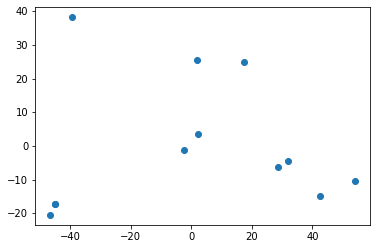

In [31]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])

In [32]:
# Umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/umap/umap_.py:2345: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



Duration: 11.476901769638062 seconds


In [33]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2,random_state=100)
k_means.fit(principalComponents)

KMeans(n_clusters=2, random_state=100)

[0 0 0 1 0 1 1 1 1 1 1 1] 12


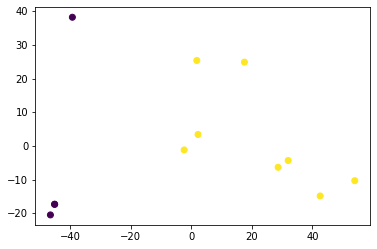

In [35]:
labels = k_means.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

[0 0 1 ... 1 1 0] 21052


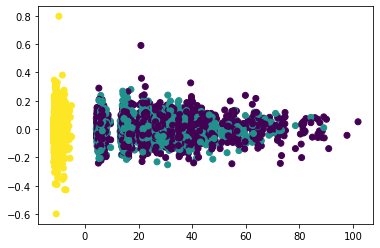

In [95]:
labels = k_means.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,-1], c=labels)
plt.show()  

In [ ]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=100)
k_means.fit(principalComponents)

[1 1 2 ... 2 2 1] 21052


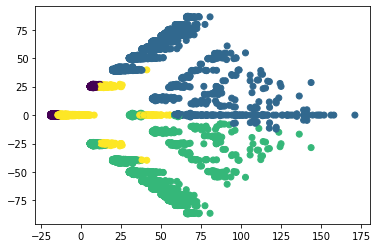

In [60]:
labels = k_means.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

In [158]:
l = [('13dampp[c]', -1), ('h2o[c]', -1), ('o2[c]', -1)]


c_in_values = [xi[0] for xi in negative_ind ]
c_out_values = [xi[0] for xi in positive_ind ]


['13dampp[c]', 'h2o[c]', 'o2[c]']

In [36]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
model.fit(principalComponents)

AgglomerativeClustering()

12


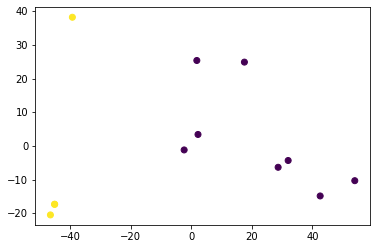

In [37]:
labels = model.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

21052


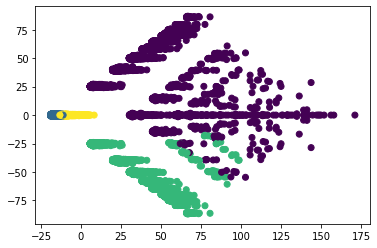

In [64]:
labels = model.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

In [65]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(principalComponents)

DBSCAN()

21052


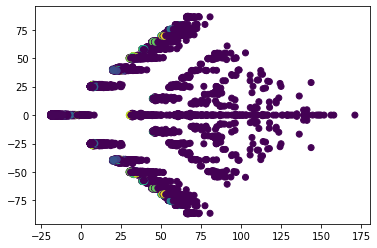

In [66]:
labels = dbscan.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

In [67]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(principalComponents)
distances, indices = nbrs.kneighbors(principalComponents)

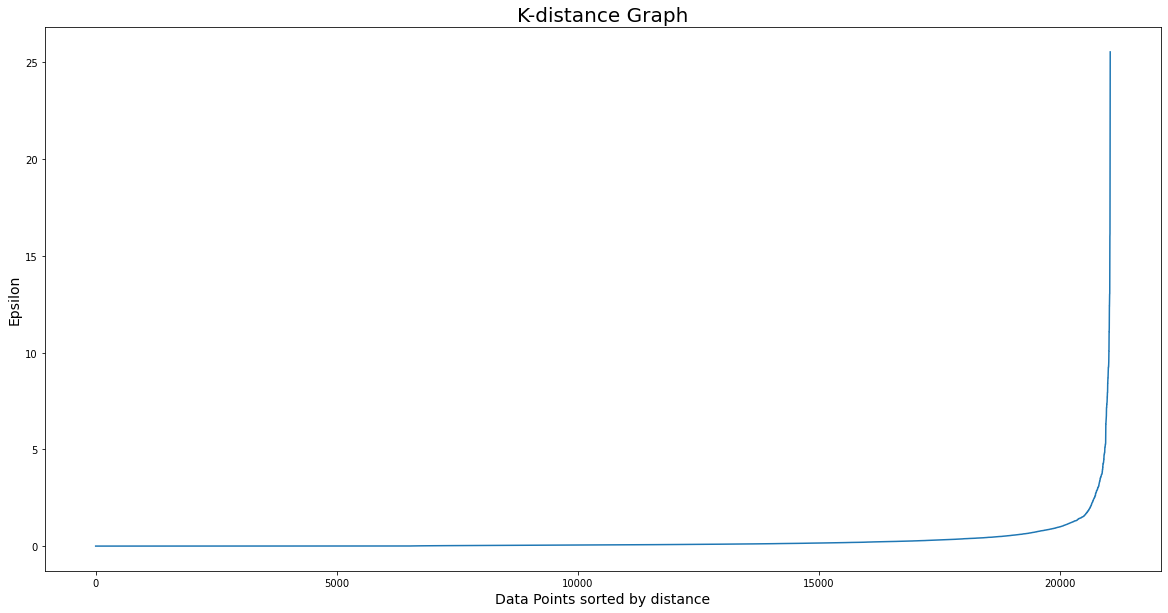

In [68]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [78]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=100)
dbscan_opt.fit(principalComponents)

DBSCAN(eps=30, min_samples=100)

21052


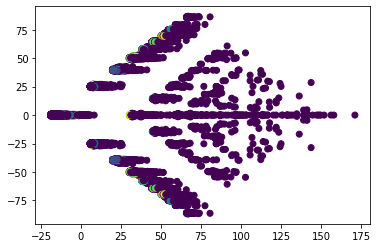

In [79]:
labels = dbscan.labels_
print(len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show() 

In [38]:
sc = SpectralClustering(n_clusters=2).fit(principalComponents)
print(sc) 


SpectralClustering(n_clusters=2)


/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



[0 1 0 0 0 0 0 0 0 0 0 0] 12


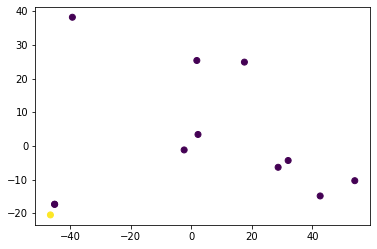

In [39]:
labels = sc.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 3 1 1 1 1 1 3 1 1 1 1 1 2 1 1 0 0 3 3 1 1 1 1 1 0 1 1] 64


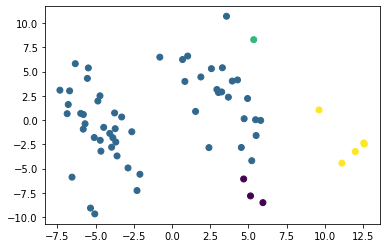

In [71]:
labels = sc.labels_
print(labels, len(labels))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels)
plt.show()  

In [72]:
# plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [73]:
# clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
# cluster_labels = clusterer.fit_predict(principalComponents)
# cluster_labels

In [74]:
# tsne
start = time.time()
pca_30 = PCA(n_components=30)
pca_result_30 = pca_30.fit_transform(x)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(pca_result_30)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 22.143463134765625 seconds


64


/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



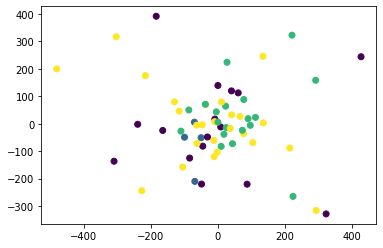

In [75]:
sc = SpectralClustering(n_clusters=4).fit(tsne)
labels = sc.labels_
print(len(labels))
plt.scatter(tsne[:,0], tsne[:,1], c=labels)
plt.show()  

In [40]:
# Umap
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(x)
print('Duration: {} seconds'.format(time.time() - start))

/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/umap/umap_.py:2345: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



Duration: 2.1187217235565186 seconds


12


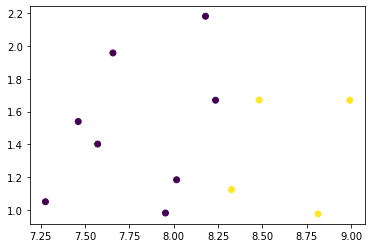

In [44]:
sc = SpectralClustering(n_clusters=2).fit(embedding)
labels = sc.labels_
print(len(labels))
plt.scatter(embedding[:,0], embedding[:,1], c=labels)
plt.show()  

64


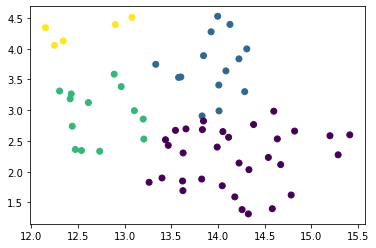

In [77]:
sc = SpectralClustering(n_clusters=4).fit(embedding)
labels = sc.labels_
print(len(labels))
plt.scatter(embedding[:,0], embedding[:,1], c=labels)
plt.show()  

In [81]:
# Possible useful stuffs:
    # Foods/Nutrients and their locations
    # Disease and link to locations (geographical location)
    # Do we want to use common toxins and polluting substance data?
    # Do we want to use all 8000 drugs and drug metabolites data? ( What if many are not related to any disease or metabolism)
    # https://hmdb.ca/
    # Disease risk factors: https://www.cancer.gov/about-cancer/causes-prevention/risk

In [80]:
# Food DB- https://foodb.ca/downloads
# Carcinogens - https://raw.githubusercontent.com/the-ahuja-lab/Metabokiller/main/datasets/Carcinogen/Independent_Dataset_Data.csv

In [79]:
# Questions to ask:
    # Do we want to use common toxins and polluting substance data?
    # Do we want to use all 8000 drugs and drug metabolites data? ( What if many are not related to any disease or metabolism)
    # What to do with non-related h-t-relation? Like some food affecting some other stuff(totally unrelated to diseases or metabolism entity)?
    # 2 clusters or more?

In [4]:
folder_path = 'Disease_Metabolites_Otherfactors_Abstracts/'


In [5]:
# Steps to do:
    # Step 1: Use just diseases, metabolites, food and carnicogen entities (food and carni later)
    # Step 2: All abstracts can be scraped by disease names and metabolism names
    # Step 3: Identify entities in each document - sentence by sentence and get a format similar to docred format
    # Step 4: Match entities only if they are present in any of Step 1
    


In [130]:
disease_risk_factors = ['Age', 'Alcohol', 'Cancer-Causing Substances', 'Chronic Inflammation', 'Diet', 'Hormones', 
                        'Immunosuppression', 'Infectious Agents', 'Obesity', 'Radiation', 'Sunlight', 'Tobacco']
    

In [131]:
# Get all entities in list
import re
with open(folder_path + 'disease') as f:
    contents = f.readlines()

contents[1].split('ENTRY')

disease_list = []
for i in range(1, len(contents)):
    if(contents[i][:4] == 'NAME'):        
        disease_list.append(re.sub(r'[^a-zA-Z0-9]', ' ', contents[i].split('NAME')[-1].split(', including')[0].strip()))
#     if(contents[i][:4] == 'DRUG'):
#         disease_list.append(contents[i].split('DRUG')[0].split('NAME')[-1].strip())
#     if(contents[i][:10] == 'CARCINOGEN'):
#         disease_list.append(contents[i].split('ENTRY')[0].split('NAME')[-1].strip())

In [132]:
diseases_list = json.load(open( folder_path + "malacards-diseases.json") )
len(diseases_list)

for i in range(len(diseases_list)):
    disease_list.append( re.sub(r'[^a-zA-Z0-9]', ' ', diseases_list[i]['disease']) )

In [133]:
len(disease_list)

19958

In [134]:
# Metabolites
metabolite_list = set()
m_ih = pd.read_csv(folder_path + 'metabolites_in_human.csv', encoding = "ISO-8859-1" )
m_ih.shape

(2174, 11)

In [135]:
for i in range(len(m_ih)):
    for j in str(m_ih.iloc[i]['COMPOUND.NAME1']).split(';'):
        if(j != '' and j != 'NaN' and j!= 'nan'):
            metabolite_list.add(j)
    for j in str(m_ih.iloc[i]['COMPOUND.NAME2']).split(';'):
        if(j != '' and j != 'NaN' and j!= 'nan'):
            metabolite_list.add(j)

In [136]:
metabolite_list = list(metabolite_list)
len(metabolite_list)

4954

In [137]:
required_keywords = disease_list + metabolite_list + disease_risk_factors
len(required_keywords)

24924

In [19]:
from nltk import tokenize
p = "Good morning Dr. Adams. The patient is waiting for you in room number 3."
tokenize.sent_tokenize(p)

['Good morning Dr. Adams.', 'The patient is waiting for you in room number 3.']

In [30]:

# import spacy
# from spacy import displacy
# nlp = spacy.load("en_core_web_sm")

# text = "Tumorigenesis is dependent on the reprogramming of cellular metabolism as both direct and indirect consequence of oncogenic mutations. A common feature of cancer cell metabolism is the ability to acquire necessary nutrients from a frequently nutrient-poor environment and utilize these nutrients to both maintain viability and build new biomass. The alterations in intracellular and extracellular metabolites that can accompany cancer-associated metabolic reprogramming have profound effects on gene expression, cellular differentiation and the tumor microenvironment. In this Review, we have organized known cancer-associated metabolic changes into six hallmarks: (1) deregulated uptake of glucose and amino acids, (2) use of opportunistic modes of nutrient acquisition, (3) use of glycolysis/TCA cycle intermediates for biosynthesis and NADPH production, (4) increased demand for nitrogen, (5) alterations in metabolite-driven gene regulation, and (6) metabolic interactions with the microenvironment. While few tumors display all six hallmarks, most display several. The specific hallmarks exhibited by an individual tumor may ultimately contribute to better tumor classification and aid in directing treatment."

# doc = nlp(text)
# displacy.render(doc, style="ent")



In [4]:
# import requests

# def query_raw(text, url="https://bern.korea.ac.kr/plain"):
# re   return requests.post(url, data={'sample_text': text}).json()

# print(query_raw("YOUR TEXT HERE"))

In [15]:
test_data = pd.read_csv('./biobert/datasets/NER/NCBI-disease/test.tsv', sep = '\t')

In [138]:
# Reading abstracts for all keywords
required_keywords = required_keywords[:15] #only for disease and metabolite entities
new_kwd = []
for i in range(len(required_keywords)):
    kwd = str(required_keywords[i])
    kwd_nt = kwd + ' and ' + 'nutrients'
    kwd_mt = kwd + ' and ' + 'metabolism'
    new_kwd.append(kwd_nt)
    new_kwd.append(kwd_mt)

required_keywords = required_keywords + new_kwd

    

In [139]:
import csv 
from nltk import tokenize

start_index = 0
# end_index = 500
end_index = len(required_keywords) #15
document_index = 0

# Do in separate loops
for file_index in range(0, 1):
    
    out_file = open('Literature_Data_Words_'+str(start_index)+'_'+str(end_index)+'.tsv', 'wt') 
    tsv_writer = csv.writer(out_file, delimiter='\t')

    if(file_index == 49):
        end_index = 24924

    for i in range(start_index, end_index): 

        if(i%100 == 0): 
            print(i) 

        # to get abstracts
        disease_name = required_keywords[i]
        fc = 0
        with open('keywords.txt', 'w') as f:
            f.write(disease_name)
            fc = 1

        # run the pubmed scraper
        try:
        #     os.system('python3 async-pubmed-scraper/async_pubmed_scraper --start 2020 --output article_data')
        #     subprocess.call('python3 async_pubmed_scraper.py --start 2020 --output article_data')

            !python3 'async_pubmed_scraper.py'

            # Once output file is created, parse it and get necessary values
            if(fc == 1):

                file = 'article_data.csv'
                abs_pbs = pd.read_csv(file)

                # now run the rev_irrev function
                outputs = []
                abstracts = abs_pbs['abstract']
                print('Number of abstracts for ', disease_name, ' is ', len(abstracts))

                for j in range(len(abstracts)):

                    
                    text = str(abstracts.iloc[j])
                    if(text and text != 'NO_ABSTRACT'):
                        if(j!=0):
                            document_index += 1
                            tsv_writer.writerow(['ENDOFDOCUMENT', 'O', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT']) # word, ner_sample, sent_id, doc_id, doc_title
    #                         tsv_writer.writerow([' ', ' ', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT'])

                
                        text = text.replace('\n', ' ')
                        text = text.replace('\t', ' ')
                        text = text.replace('(', ' ( ')
                        text = text.replace('%', ' % ')
                        text = text.replace('$', ' $ ')
                        text = text.replace('@', ' @ ')
                        text = text.replace('#', ' # ')
                        text = text.replace('^', ' ^ ')
                        text = text.replace('&', ' & ')
                        text = text.replace('+', ' + ')
                        text = text.replace('{', ' { ')
                        text = text.replace('}', ' } ')
                        text = text.replace('[', ' [ ')
                        text = text.replace(']', ' ] ')
                        text = text.replace('?', ' ? ')
                        text = text.replace('<', ' < ')
                        text = text.replace('>', ' > ')
                        text = text.replace(')', ' ) ')
                        text = text.replace(':', ' : ')
                        text = text.replace(',', ' , ')
                        text = text.replace('.', ' . ')
                        text = text.replace('-', ' - ')
                        text = text.replace('_', ' _ ')
                        text = text.replace(';', ' ; ')
                        text = text.replace('!', ' ! ')
                        text = text.replace('*', ' * ')
                        text = text.replace('/', ' / ')
                        text = text.replace('=', ' = ')
                        text = text.replace("'", " ' ")
                        text = text.replace('"', ' " ')
#                             text = text.split()
                        all_sents = tokenize.sent_tokenize(text)
                        for sent_index in range(len(all_sents)):
                            for wordy in all_sents[sent_index].split():
                                tsv_writer.writerow([wordy, 'O', int(sent_index), int(document_index), str(disease_name)])

        except:
            print('error at', i)

    out_file.close()
    start_index = end_index
    end_index+=5


0

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.2721800804138184 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia   is  10

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.3942160606384277 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia   is  10

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.0683181285858154 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Acute myeloid leukemia  AML   is  10

Finding PubMed

Number of abstracts for  Hairy cell leukemia and nutrients  is  10

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.550114393234253 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Hairy cell leukemia and metabolism  is  10

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.145609140396118 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Hodgkin lymphoma and nutrients  is  10

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.2574198246002197 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Hodgkin lymphoma and metabolism  is  10

Finding PubMed article URL

In [23]:
# Combine them
data1 = pd.read_csv('Literature_Data_Words_0_500.tsv', sep='\t', header=None)
data2 = pd.read_csv('Literature_Data_Words_500_1000.tsv', sep='\t', header=None)
print(data1.shape, data2.shape)
all_data = pd.concat([data1,data2], axis=0)
all_data.to_csv('test_0_1000.tsv', sep = '\t', index=False, header=None)


(1029223, 5) (922483, 5)


In [24]:
all_data.tail()

,0,1,2,3,4
922478,with,O,2.0,7875.0,C syndrome
922479,recent,O,2.0,7875.0,C syndrome
922480,SARS-CoV-2,O,2.0,7875.0,C syndrome
922481,infection,O,2.0,7875.0,C syndrome
922482,.,O,2.0,7875.0,C syndrome


In [39]:
sample_test = pd.read_csv('Literature_Data_Words_0_1.tsv', sep='\t', header=None)
print(sample_test.shape)

(99136, 5)


In [63]:
sample_test[sample_test.columns[:2]].to_csv('sample_test.tsv', sep = '\t', index=False, header=None)

In [64]:
sample_test.head()

,0,1,2,3,4
0,Lymphoblastic,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0.0,0.0,Acute lymphoblastic leukemia ALL precursor ...


In [41]:

# import argparse
# import time
# from bs4 import BeautifulSoup
# import pandas as pd
# import random
# import requests
# import asyncio
# import aiohttp
# import socket

# # global articles_data

# def extract_by_article(url):
#     '''
#     Extracts all data from a single article
#     :param url: string: URL to a single article (i.e. root pubmed URL + PMID)
#     :return article_data: Dict: Contains all data from a single article
#     '''
#     articles_data = []
#     conn = aiohttp.TCPConnector(family=socket.AF_INET)
#     headers = {
#             'User-Agent':"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:55.0) Gecko/20100101 Firefox/55.0",
#             }
#     # Reference our articles DataFrame containing accumulated data for ALL scraped articles
#     # global articles_data
#     s = requests.Session()
#     print(url)
# #     with aiohttp.ClientSession(headers=headers, connector=conn) as session:
#     with s.get(url) as response:
#         data = response.text
#         soup = BeautifulSoup(data, "lxml")
#         # Get article abstract if exists - sometimes abstracts are not available (not an error)
#         try:
#             abstract_raw = soup.find('div', {'class': 'abstract-content selected'}).find_all('p')
#             # Some articles are in a split background/objectives/method/results style, we need to join these paragraphs
#             abstract = ' '.join([paragraph.text.strip() for paragraph in abstract_raw])
#         except:
#             abstract = 'NO_ABSTRACT'
#         # # Get author affiliations - sometimes affiliations are not available (not an error)
#         # affiliations = [] # list because it would be difficult to split since ',' exists within an affiliation
#         # try:
#         #     all_affiliations = soup.find('ul', {'class':'item-list'}).find_all('li')
#         #     for affiliation in all_affiliations:
#         #         affiliations.append(affiliation.get_text().strip())
#         # except:
#         #     affiliations = 'NO_AFFILIATIONS'
#         # Get article keywords - sometimes keywords are not available (not an error)
#         try:
#             # We need to check if the abstract section includes keywords or else we may get abstract text
#             has_keywords = soup.find_all('strong',{'class':'sub-title'})[-1].text.strip()
#             if has_keywords == 'Keywords:':
#                 # Taking last element in following line because occasionally this section includes text from abstract
#                 keywords = soup.find('div', {'class':'abstract' }).find_all('p')[-1].get_text()
#                 keywords = keywords.replace('Keywords:','\n').strip() # Clean it up
#             else:
#                 keywords = 'NO_KEYWORDS'
#         except:
#             keywords = 'NO_KEYWORDS'
#         try:
#             title = soup.find('meta',{'name':'citation_title'})['content'].strip('[]')
#         except:
#             title = 'NO_TITLE'
#         authors = ''    # string because it's easy to split a string on ','
#         # try:
#         #     for author in soup.find('div',{'class':'authors-list'}).find_all('a',{'class':'full-name'}):
#         #         authors += author.text + ', '
#         #     # alternative to get citation style authors (no first name e.g. I. Zenkov)
#         #     # all_authors = soup.find('meta', {'name': 'citation_authors'})['content']
#         #     # [authors.append(author) for author in all_authors.split(';')]
#         # except:
#         #     authors = ('NO_AUTHOR')
#         try:
#             journal = soup.find('meta',{'name':'citation_journal_title'})['content']
#         except:
#             journal = 'NO_JOURNAL'
#         # try:
#         #     date = soup.find('time', {'class': 'citation-year'}).text
#         # except:
#         #     date = 'NO_DATE'

#         # Format data as a dict to insert into a DataFrame
#         article_data = {
#             'url': url,
#             'title': title,
#             'abstract': abstract,
#             'journal': journal,
#             'keywords': keywords
#         }
            

#     return article_data

# def get_pmids(page, keyword):
#     """
#     Extracts PMIDs of all articles from a pubmed search result, page by page,
#     builds a url to each article, and stores all article URLs in urls: List[string]
#     :param page: int: value of current page of a search result for keyword
#     :param keyword: string: current search keyword
#     :return: None
#     """
#     # URL to one unique page of results for a keyword search
#     page_url = f'{pubmed_url}+{keyword}+&page={page}'
#     headers = {
#             'User-Agent':"Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:55.0) Gecko/20100101 Firefox/55.0",
#             }
#     s = requests.Session()
#     print(page_url)
# #     with aiohttp.ClientSession(headers=headers) as session:
#     with s.get(page_url) as response:
#         data = response.text
#         # Parse the current page of search results from the response
#         soup = BeautifulSoup(data, "lxml")
#         # Find section which holds the PMIDs for all articles on a single page of search results
#         pmids = soup.find('meta',{'name':'log_displayeduids'})['content']
#         # alternative to get pmids: page_content = soup.find_all('div', {'class': 'docsum-content'}) + for line in page_content: line.find('a').get('href')
#         # Extract URLs by getting PMIDs for all pubmed articles on the results page (default 10 articles/page)
#         for pmid in pmids.split(','):
#             url = root_pubmed_url + '/' + pmid
#             urls.append(url)

#     return urls

# def get_num_pages():
#     num_pages = 10 # maximum
#     return num_pages


# def build_article_urls(keyword):
#     """
#     PubMed uniquely identifies articles using a PMID
#     e.g. https://pubmed.ncbi.nlm.nih.gov/32023415/ #shameless self plug :)
#     Any and all articles can be identified with a single PMID

#     Async wrapper for get_article_urls, page by page of results, for a single search keyword
#     Creates an asyncio task for each page of search result for each keyword
#     :param keyword: string: search word used to search for results
#     :return: None
#     """
#     urls = []
#     # for keyword in keywords:
#     num_pages = get_num_pages()
#     for page in range(1,num_pages+1):
#         for url in get_pmids(page, keyword):
#             urls.append(url)

#     print(f'Scraping initiated for {len(urls)} article URLs found from {2018} to {2021}\n')
#     get_article_data(urls)

# def get_article_data(urls):
#     """
#     Async wrapper for extract_by_article to scrape data from each article (url)
#     :param urls: List[string]: list of all pubmed urls returned by the search keyword
#     :return: None
#     """
#     global articles_data
#     global scraped_urls

#     for url in urls:
#         if url not in scraped_urls:
#             article_data = extract_by_article(url)
            
#             # Add dict containing one article's data to list of article dicts
#             articles_data.append(article_data)
#             scraped_urls.append(url)



# # This pubmed link is hardcoded to search for articles from user specified date range, defaults to 2019-2020
# pubmed_url = f'https://pubmed.ncbi.nlm.nih.gov/?term={2018}%3A{2021}%5Bdp%5D'
# # The root pubmed link is used to construct URLs to scrape after PMIDs are retrieved from user specified date range
# root_pubmed_url = 'https://pubmed.ncbi.nlm.nih.gov'
# # Construct our list of keywords from a user input file to search for and extract articles from
# # search_keywords = []
# # with open('keywords.txt') as file:
# #     keywords = file.readlines()
# #     [search_keywords.append(keyword.strip()) for keyword in keywords]
# # print(f'\nFinding PubMed article URLs for {len(keywords)} keywords found in keywords.txt\n')
# # Empty list to store all article data as List[dict]; each dict represents data from one article
# # This approach is considerably faster than appending article data article-by-article to a DataFrame
# # articles_data = []
# # Empty list to store all article URLs
# urls = []
# # Empty list to store URLs already scraped
# global scraped_urls
# scraped_urls = []
# global articles_data
# articles_data = []

# start = time.time()

# # We use asyncio's BoundedSemaphore method to limit the number of asynchronous requests
# #    we make to PubMed at a time to avoid a ban (and to be nice to PubMed servers)
# # Higher value for BoundedSemaphore yields faster scraping, and a higher chance of ban. 100-500 seems to be OK.
# # semaphore = asyncio.BoundedSemaphore(100)

# # Get and run the loop to build a list of all URLs
# # loop = asyncio.get_event_loop()
# # loop.run_until_complete(build_article_urls(search_keywords))

# search_keywords = disease_list[:5]
# for keyword in search_keywords:
#     print(keyword)
#     build_article_urls(search_keywords)

# # Get and run the loop to get article data into a DataFrame from a list of all URLs
# # loop = asyncio.get_event_loop()
# # loop.run_until_complete(get_article_data(urls))

# # Create DataFrame to store data from all articles
# articles_df = pd.DataFrame(articles_data, columns=['title','abstract', 'journal','date','keywords'])

# # Save all extracted article data to CSV for further processing
# articles_df.to_csv('Scraped_Disease_Metabolites_Data.csv', index = False)
# print(f'It took {time.time() - start} seconds to finish')



In [36]:
s = requests.session()
r = s.get("https://pubmed.ncbi.nlm.nih.gov/?term=2018%3A2021%5Bdp%5D+['Acute lymphoblastic leukemia  ALL   precursor B lymphoblastic leukemia ', 'Acute lymphoblastic leukemia  ALL   precursor T lymphoblastic leukemia ', 'Acute myeloid leukemia  AML ', 'Chronic myeloid leukemia  CML ', 'Chronic lymphocytic leukemia  CLL ']+&page=1")

In [47]:
# Creating the vertex data 
test[0].keys()
test[0]

{'vertexSet': [[{'pos': [0, 3],
    'type': 'PER',
    'sent_id': 0,
    'name': 'Miguel Riofrio Sánchez'},
   {'pos': [0, 1], 'type': 'PER', 'sent_id': 5, 'name': 'Riofrio'},
   {'pos': [23, 25], 'type': 'PER', 'sent_id': 4, 'name': 'Miguel Riofrío'}],
  [{'pos': [4, 8],
    'type': 'TIME',
    'sent_id': 0,
    'name': 'September 7 , 1822'}],
  [{'pos': [9, 13],
    'type': 'TIME',
    'sent_id': 0,
    'name': 'October 11 , 1879'}],
  [{'name': 'Ecuadoran', 'pos': [16, 17], 'sent_id': 0, 'type': 'LOC'},
   {'name': 'Ecuador', 'pos': [9, 10], 'sent_id': 2, 'type': 'LOC'},
   {'name': 'Ecuador', 'pos': [32, 33], 'sent_id': 3, 'type': 'LOC'},
   {'name': 'Ecuador', 'pos': [32, 33], 'sent_id': 4, 'type': 'LOC'}],
  [{'name': 'Loja', 'pos': [7, 8], 'sent_id': 1, 'type': 'LOC'}],
  [{'pos': [13, 15], 'type': 'MISC', 'sent_id': 2, 'name': 'La Emancipada'},
   {'pos': [26, 28], 'type': 'MISC', 'sent_id': 4, 'name': 'La Emancipada'}],
  [{'pos': [16, 17], 'type': 'TIME', 'sent_id': 2, 'name'

In [140]:
new = pd.read_csv('Literature_Data_Words_0_45.tsv', header=None, sep='\t')
print(new.shape)

(99090, 5)


In [57]:
new.head()

,0,1,2,3,4
0,Lymphoblastic,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0,0,Acute lymphoblastic leukemia ALL precursor ...


In [52]:
check_ner_data = pd.read_csv('Use This/Good_NER_result_conll.txt', sep= '\t', header=None)
print(check_ner_data.shape)

split_values = []
split_tags = []
for i in range(len(check_ner_data)):
    split_values.append( check_ner_data[0].iloc[i].split(' ')[0])
    split_tags.append( check_ner_data[0].iloc[i].split(' ')[-1])
    
check_ner_data['words'] = split_values
check_ner_data['tags'] = split_tags

In [53]:
check_ner_data.drop(0, axis = 1, inplace=True)

In [141]:
check_ner_data = pd.DataFrame()
check_ner_data['words'] = new[0]
check_ner_data['tags'] = new[1]
check_ner_data['sent_id'] = new[2]
check_ner_data['doc_id'] = new[3]
check_ner_data['doc_title'] = new[4]
check_ner_data.head()

,words,tags,sent_id,doc_id,doc_title
0,Lymphoblastic,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0,0,Acute lymphoblastic leukemia ALL precursor ...


In [72]:
# to get this: A list of dictionaries
# test[0:2]

In [142]:
# Add proper indices to words for every sentence

current_doc_id = check_ner_data['doc_id'].iloc[0]
current_sent_id = check_ner_data['sent_id'].iloc[0]
prev_sent_id = current_sent_id
prev_doc_id = current_doc_id
create_word_ind = 0 
create_global_doc_word_ind = 0
check_ner_data['word_ind'] = 0
check_ner_data['global_doc_word_ind'] = 0

for i in range(len(check_ner_data)):
    if(check_ner_data['doc_id'].iloc[i] != 'ENDOFDOCUMENT'):
        
        current_doc_id = check_ner_data['doc_id'].iloc[i]
        current_sent_id = check_ner_data['sent_id'].iloc[i]
        if(current_doc_id == prev_doc_id):
            check_ner_data['global_doc_word_ind'].iloc[i] = create_global_doc_word_ind
            create_global_doc_word_ind += 1
        elif(current_doc_id != prev_doc_id):
            create_global_doc_word_ind = 0
            create_global_doc_word_ind += 1
        
        if(current_sent_id == prev_sent_id and current_doc_id == prev_doc_id):
            check_ner_data['word_ind'].iloc[i] = create_word_ind
            create_word_ind += 1
            prev_sent_id = current_sent_id
            prev_doc_id = current_doc_id
        else:
            create_word_ind = 0 
            check_ner_data['word_ind'].iloc[i] = create_word_ind
            prev_sent_id = current_sent_id
            prev_doc_id = current_doc_id
            create_word_ind += 1



/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [88]:
# check_ner_data[280:320]

In [56]:
# all_data = []
# for docind in check_ner_data['doc_id'].unique()[0]:
#     if(docind != 'ENDOFDOCUMENT'):
#         all_sents = []
#         vertexSet = [] # list of lists and each list is dict
#         # common_entity = [] # contains dicts
#         each_entity = {}
#         parsed_entity_doc = {} # name and position of dict in vertexSet
#         position_in_dict = 0

#         subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 
        
#         # get sentences
#         for j in subset['sent_id'].unique():
#             all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )
        
#         #Join sentences to get paragraph
#         sent = ''
#         for i in range(len(subset['words'])):
#             sent = sent + ' ' + subset.iloc[i]['words']
        
#         # Predict NER and entity tags
#         entities_of_document = {}
        
#         nlp_sci = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
#         doc = nlp_sci(sent)
#         for X.test, X.label_, X.start, X.end for X in doc.ents:
#             if(X.test not in entities_of_document.keys()):
#                 entities_of_document[X.test] = [(X.start, X.end)]
#             else:
#                 entities_of_document[X.test][0].append( (X.start, X.end) )
                
        
#         nlp_sci = en_ner_bc5cdr_md.load() # all disease names (good)
#         doc = nlp_sci(sent)
#         for X.test, X.label_, X.start, X.end for X in doc.ents:
#             if(X.test not in entities_of_document.keys()):
#                 entities_of_document[X.test] = [(X.start, X.end)]
#             else:
#                 entities_of_document[X.test][0].append( (X.start, X.end) )
        
        
#         nlp_bi = en_ner_bionlp13cg_md.load()
#         doc = nlp_bi(sent)
#         for X.test, X.label_, X.start, X.end for X in doc.ents:
#             if(X.test not in entities_of_document.keys()):
#                 entities_of_document[X.test] = [(X.start, X.end)]
#             else:
#                 entities_of_document[X.test][0].append( (X.start, X.end) )
        
#         print('entities_of_document', len(entities_of_document))
        
        
#         subset = subset[subset['tags'] != 'O-MISC']
#         print(len(subset))
#         # print(subset.head())
#         i=0

#         while(i < len(subset)):
# #             print(i)
#             current_entity = subset['words'].iloc[i]
#             current_tag = subset['tags'].iloc[i].split('-')[0]
#             tag_type = subset['tags'].iloc[i].split('-')[1]
#             tag_chain = i

#             if(current_tag == 'B'):
#                 if(tag_chain + 1 < len(subset)):
#                     current_wi = subset['word_ind'].iloc[tag_chain]
#                     while (subset['tags'].iloc[tag_chain + 1].split('-')[0] == 'I' and subset['sent_id'].iloc[tag_chain + 1] == subset['sent_id'].iloc[i] and subset['word_ind'].iloc[tag_chain + 1] == (current_wi + 1)):
#                         current_entity = current_entity + ' ' + subset['words'].iloc[tag_chain + 1]
#                         tag_chain += 1
#                         current_wi = subset['word_ind'].iloc[tag_chain]
#                         if(tag_chain + 1 >= len(subset)):
#                             break

#             each_entity = {'pos':[subset['word_ind'].iloc[i], subset['word_ind'].iloc[tag_chain] +1 ], 'type': str(tag_type), 'sent_id':subset['sent_id'].iloc[i], 
#                            'name': current_entity}   

#             if(current_entity not in parsed_entity_doc.keys()):
#                 parsed_entity_doc[current_entity] = position_in_dict
#                 position_to_add = position_in_dict
#                 position_in_dict += 1
#                 vertexSet.append([each_entity])

#             else:
#                 position_to_add = parsed_entity_doc[current_entity]
#                 vertexSet[position_to_add].append(each_entity) 

#             i = tag_chain + 1

#         # vertexSet.append(common_entity)

#         all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )


In [66]:
check_ner_data.head()


,words,tags,sent_id,doc_id,doc_title,word_ind,global_doc_word_ind
0,Lymphoblastic,O,0,0,Acute lymphoblastic leukemia ALL precursor ...,0,0
1,leukemias,O,0,0,Acute lymphoblastic leukemia ALL precursor ...,1,1
2,/,O,0,0,Acute lymphoblastic leukemia ALL precursor ...,2,2
3,lymphomas,O,0,0,Acute lymphoblastic leukemia ALL precursor ...,3,3
4,are,O,0,0,Acute lymphoblastic leukemia ALL precursor ...,4,4


In [146]:
all_data = []
nlp_jnl = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
nlp_cdr = en_ner_bc5cdr_md.load() # all disease names (good)
nlp_bi = en_ner_bionlp13cg_md.load()
print('begin')

begin


In [70]:
len(check_ner_data['doc_id'].unique())


376

In [148]:

for docind in check_ner_data['doc_id'].unique():
    try:
        if(docind != 'ENDOFDOCUMENT'):
            all_sents = []
            vertexSet = [] # list of lists and each list is dict
            # common_entity = [] # contains dicts
            each_entity = {}
            parsed_entity_doc = {} # name and position of dict in vertexSet
            position_in_dict = 0

            subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 

            # get sentences
            for j in subset['sent_id'].unique():
                all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )

            #Join sentences to get paragraph
            sent = ''
            for i in range(len(subset['words'])):
                sent = sent + ' ' + subset.iloc[i]['words']

            # Predict NER and entity tags
            entities_of_document = {}


            doc = nlp_jnl(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    entities_of_document[cx_name] = [(cx.start, cx.end)]
                else:
                    if((cx.start, cx.end) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start, cx.end) )



            doc = nlp_cdr(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    entities_of_document[cx_name] = [(cx.start, cx.end)]
                else:
                    if((cx.start, cx.end) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start, cx.end) )



            doc = nlp_bi(sent)
            for cx in doc.ents:
                cx_name = str(cx)
                if(cx_name not in entities_of_document.keys()):
                    entities_of_document[cx_name] = [(cx.start, cx.end)]
                else:
                    if((cx.start, cx.end) not in entities_of_document[cx_name]):
                        entities_of_document[cx_name].append( (cx.start, cx.end) )

            print('entities_of_document', len(entities_of_document))


            for ent in entities_of_document:
    #             print(i)
                current_entity = str(ent)
                current_tag = 'MISC'

                for subent_ind in range(len(entities_of_document[ent])):

                    start_pos_local = entities_of_document[ent][subent_ind][0] - 1
                    end_pos_local = entities_of_document[ent][subent_ind][1] - 1

                    # Find sent id for every word index
                    sntid = subset[subset['global_doc_word_ind'] == start_pos_local]['sent_id'].iloc[0]
                    start_pos = subset[subset['global_doc_word_ind'] == start_pos_local]['word_ind'].iloc[0]
                    end_pos = subset[subset['global_doc_word_ind'] == end_pos_local]['word_ind'].iloc[0]

                    each_entity = {'pos': [int(start_pos), int(end_pos)], 'type': current_tag, 'sent_id': int(sntid), 
                                   'name': current_entity}   

                    if(current_entity not in parsed_entity_doc.keys()):
                        parsed_entity_doc[current_entity] = position_in_dict
                        position_to_add = position_in_dict
                        position_in_dict += 1
                        vertexSet.append([each_entity])

                    else:
                        position_to_add = parsed_entity_doc[current_entity]
                        vertexSet[position_to_add].append(each_entity) 


            # vertexSet.append(common_entity)

            all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )
    
    except:
        pass

entities_of_document 10
entities_of_document 16
entities_of_document 28
entities_of_document 25
entities_of_document 15
entities_of_document 11
entities_of_document 5
entities_of_document 12
entities_of_document 17
entities_of_document 40
entities_of_document 14
entities_of_document 11
entities_of_document 20
entities_of_document 11
entities_of_document 48
entities_of_document 10
entities_of_document 18
entities_of_document 26
entities_of_document 22
entities_of_document 6
entities_of_document 22
entities_of_document 7
entities_of_document 33
entities_of_document 7
entities_of_document 4
entities_of_document 18
entities_of_document 12
entities_of_document 19
entities_of_document 32
entities_of_document 22
entities_of_document 12
entities_of_document 6
entities_of_document 24
entities_of_document 12
entities_of_document 7
entities_of_document 30
entities_of_document 29
entities_of_document 7
entities_of_document 33
entities_of_document 20
entities_of_document 15
entities_of_document 17


entities_of_document 30
entities_of_document 12
entities_of_document 7
entities_of_document 20
entities_of_document 9
entities_of_document 7
entities_of_document 25
entities_of_document 16
entities_of_document 37
entities_of_document 20
entities_of_document 35
entities_of_document 82
entities_of_document 11
entities_of_document 24
entities_of_document 54
entities_of_document 11
entities_of_document 28
entities_of_document 28
entities_of_document 28
entities_of_document 39
entities_of_document 18


In [149]:
len(all_data)

519

In [106]:
import csv 
from nltk import tokenize

required_keyw = ['Adult T cell leukemia', 'Multiple myeloma']
start_index = 0
# end_index = 500
end_index = len(required_keyw) #15
document_index = 0

# Do in separate loops
for file_index in range(0, 1):
    
    out_file = open('OPOPOP'+str(start_index)+'_'+str(end_index)+'.tsv', 'wt') 
    tsv_writer = csv.writer(out_file, delimiter='\t')

    if(file_index == 49):
        end_index = 24924

    for i in range(start_index, end_index): 

        if(i%100 == 0): 
            print(i) 

        # to get abstracts
        disease_name = required_keyw[i]
        fc = 0
        with open('keywords.txt', 'w') as f:
            f.write(disease_name)
            fc = 1

        # run the pubmed scraper
        try:
        #     os.system('python3 async-pubmed-scraper/async_pubmed_scraper --start 2020 --output article_data')
        #     subprocess.call('python3 async_pubmed_scraper.py --start 2020 --output article_data')

            !python3 'async_pubmed_scraper.py'

            # Once output file is created, parse it and get necessary values
            if(fc == 1):

                file = 'article_data.csv'
                abs_pbs = pd.read_csv(file)

                # now run the rev_irrev function
                outputs = []
                abstracts = abs_pbs['abstract']
                print('Number of abstracts for ', disease_name, ' is ', len(abstracts))

                for j in range(len(abstracts)):
                        
                    text = str(abstracts.iloc[j])
                                        
                    if(text and text != 'NO_ABSTRACT'):
                        print(text, document_index)
                        if(j!=0):
                            document_index += 1
                            tsv_writer.writerow(['ENDOFDOCUMENT', 'O', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT', 'ENDOFDOCUMENT']) # word, ner_sample, sent_id, doc_id, doc_title

                        text = text.replace('\n', ' ')
                        text = text.replace('\t', ' ')
                        text = text.replace('(', ' ( ')
                        text = text.replace('%', ' % ')
                        text = text.replace('$', ' $ ')
                        text = text.replace('@', ' @ ')
                        text = text.replace('#', ' # ')
                        text = text.replace('^', ' ^ ')
                        text = text.replace('&', ' & ')
                        text = text.replace('+', ' + ')
                        text = text.replace('{', ' { ')
                        text = text.replace('}', ' } ')
                        text = text.replace('[', ' [ ')
                        text = text.replace(']', ' ] ')
                        text = text.replace('?', ' ? ')
                        text = text.replace('<', ' < ')
                        text = text.replace('>', ' > ')
                        text = text.replace(')', ' ) ')
                        text = text.replace(':', ' : ')
                        text = text.replace(',', ' , ')
                        text = text.replace('.', ' . ')
                        text = text.replace('-', ' - ')
                        text = text.replace('_', ' _ ')
                        text = text.replace(';', ' ; ')
                        text = text.replace('!', ' ! ')
                        text = text.replace('*', ' * ')
                        text = text.replace('/', ' / ')
                        text = text.replace('=', ' = ')
                        text = text.replace("'", " ' ")
                        text = text.replace('"', ' " ')
#                             text = text.split()
                        all_sents = tokenize.sent_tokenize(text)
                        for sent_index in range(len(all_sents)):
                            for wordy in all_sents[sent_index].split():
                                tsv_writer.writerow([wordy, 'O', int(sent_index), int(document_index), str(disease_name)])

        except:
            print('error at', i)

    out_file.close()
    start_index = end_index
    end_index+=5


0

Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 2.095430374145508 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Adult T cell leukemia  is  10
Adult T-cell leukemia/lymphoma (ATL) is a peripheral T-cell malignancy caused by human T-cell leukemia virus type I (HTLV-1). Between 3% and 5% of HTLV-1-infected individuals develop ATL after a long latency. Confirmation of seropositivity of anti-HTLV-1 antibody, and clonal proliferation of CD4 and CD25 positive lymphocytes with nuclear pleomorphism in patients suspicious of malignant lymphoma or chronic lymphocytic leukemia is crucial for the diagnosis of ATL. The clinical course of ATL is very heterogeneous, and divided into acute, lymphoma, chronic, and smoldering types. The chronic type is further subclassified into the favorable and unfavorable subtypes. Acute, lymphoma, and unfavorable chron


Finding PubMed article URLs for 1 keywords found in keywords.txt

Scraping initiated for 10 article URLs found from 2017 to 2021

It took 1.8795249462127686 seconds to find 10 articles; 10 unique articles were saved to article_data.csv
Number of abstracts for  Multiple myeloma  is  10
Objective:
        
      
      To understand the role of the genetic changes and bone marrow microenvironment on the development, progression, and staging of multiple myeloma (MM). Data sources:
        
      
      Peer-reviewed articles and clinical guidelines. Conclusion:
        
      
      The acquisition of genetic changes and the bone marrow microenvironment in which myeloma cells develop both influence the pathogenic potential of these malignant cells and is reflected in staging of the disease, risk of progression, and predicted response to treatment. Implications for nursing practice:
        
      
      Treatment of multiple myeloma is largely dependent on risk factors in which specific 

In [118]:
new = pd.read_csv('OPOPOP0_1.tsv', header=None, sep='\t')

In [119]:
check_ner_data = pd.DataFrame()
check_ner_data['words'] = new[0]
check_ner_data['tags'] = new[1]
check_ner_data['sent_id'] = new[2]
check_ner_data['doc_id'] = new[3]
check_ner_data['doc_title'] = new[4]
check_ner_data.head()

,words,tags,sent_id,doc_id,doc_title
0,Lymphoblastic,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
1,leukemias,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
2,/,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
3,lymphomas,O,0,0,Acute lymphoblastic leukemia ALL precursor ...
4,are,O,0,0,Acute lymphoblastic leukemia ALL precursor ...


In [91]:
subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 
subset.tail()
subset[185:]

,words,tags,sent_id,doc_id,doc_title,word_ind,global_doc_word_ind
21062,to,O,7,81,Adult T cell leukemia,19,185
21063,expand,O,7,81,Adult T cell leukemia,20,186
21064,.,O,7,81,Adult T cell leukemia,21,187
21065,NO,O,0,81,Multiple myeloma,0,188
21066,_,O,0,81,Multiple myeloma,1,189
21067,ABSTRACT,O,0,81,Multiple myeloma,2,190


In [121]:
for docind in range(0, 16):
    if(docind != 'ENDOFDOCUMENT'):
        all_sents = []
        vertexSet = [] # list of lists and each list is dict
        # common_entity = [] # contains dicts
        each_entity = {}
        parsed_entity_doc = {} # name and position of dict in vertexSet
        position_in_dict = 0

        subset = check_ner_data[check_ner_data['doc_id'] == str(docind)] 

        # get sentences
        for j in subset['sent_id'].unique():
            all_sents.append( list(subset[subset['sent_id'] == j]['words'].values) )

        #Join sentences to get paragraph
        sent = ''
        for i in range(len(subset['words'])):
            sent = sent + ' ' + subset.iloc[i]['words']

        # Predict NER and entity tags
        entities_of_document = {}


        doc = nlp_jnl(sent)
        for cx in doc.ents:
            cx_name = str(cx)
            if(cx_name not in entities_of_document.keys()):
                entities_of_document[cx_name] = [(cx.start, cx.end)]
            else:
                if((cx.start, cx.end) not in entities_of_document[cx_name]):
                    entities_of_document[cx_name].append( (cx.start, cx.end) )



        doc = nlp_cdr(sent)
        for cx in doc.ents:
            cx_name = str(cx)
            if(cx_name not in entities_of_document.keys()):
                entities_of_document[cx_name] = [(cx.start, cx.end)]
            else:
                if((cx.start, cx.end) not in entities_of_document[cx_name]):
                    entities_of_document[cx_name].append( (cx.start, cx.end) )



        doc = nlp_bi(sent)
        for cx in doc.ents:
            cx_name = str(cx)
            if(cx_name not in entities_of_document.keys()):
                entities_of_document[cx_name] = [(cx.start, cx.end)]
            else:
                if((cx.start, cx.end) not in entities_of_document[cx_name]):
                    entities_of_document[cx_name].append( (cx.start, cx.end) )

        print('entities_of_document', len(entities_of_document))


        for ent in entities_of_document:
    #             print(i)
            current_entity = str(ent)
            current_tag = 'MISC'

            for subent_ind in range(len(entities_of_document[ent])):

                start_pos_local = entities_of_document[ent][subent_ind][0] - 1
                end_pos_local = entities_of_document[ent][subent_ind][1] - 1

                # Find sent id for every word index
                sntid = subset[subset['global_doc_word_ind'] == start_pos_local]['sent_id'].iloc[0]
                print('sid', sntid, start_pos_local, end_pos_local)
                start_pos = subset[subset['global_doc_word_ind'] == start_pos_local]['word_ind'].iloc[0]
                print(start_pos)
                end_pos = subset[subset['global_doc_word_ind'] == end_pos_local]['word_ind'].iloc[0]

                each_entity = {'pos': [int(start_pos), int(end_pos)], 'type': current_tag, 'sent_id': int(sntid), 
                               'name': current_entity}   

                if(current_entity not in parsed_entity_doc.keys()):
                    parsed_entity_doc[current_entity] = position_in_dict
                    position_to_add = position_in_dict
                    position_in_dict += 1
                    vertexSet.append([each_entity])

                else:
                    position_to_add = parsed_entity_doc[current_entity]
                    vertexSet[position_to_add].append(each_entity) 


    # vertexSet.append(common_entity)

#     all_data.append( {'vertexSet': vertexSet, 'title': str(check_ner_data[check_ner_data['doc_id'] == str(docind)]['doc_title'].iloc[0]) , 'sents': all_sents}  )


entities_of_document 10
sid 0 0 4
0
sid 0 5 7
5
sid 0 15 17
15
sid 2 59 63
3
sid 0 0 2
0
sid 0 3 4
3
sid 1 38 41
6
sid 1 42 45
10
sid 1 54 55
22
sid 2 80 83
24
entities_of_document 11
sid 1 65 66
37
sid 3 135 136
19
sid 3 132 134
16
sid 0 0 3
0
sid 0 4 5
4
sid 1 46 47
18
sid 1 63 64
35
sid 1 73 74
45
sid 3 137 138
21
sid 3 145 146
29
sid 0 11 12
11
sid 0 18 19
18
sid 1 65 68
37
sid 3 135 138
19
sid 1 75 78
47
sid 3 139 142
23
sid 0 20 21
20
sid 1 59 62
31
sid 1 70 74
42
entities_of_document 20
sid 1 21 22
19
sid 1 48 49
46
sid 1 69 70
67
sid 3 89 90
14
sid 5 109 110
8
sid 7 154 155
17
sid 10 250 251
16
sid 11 277 278
15
sid 1 23 24
21
sid 1 50 51
48
sid 1 71 72
69
sid 3 91 92
16
sid 5 111 112
10
sid 7 156 157
19
sid 8 177 178
14
sid 10 252 253
18
sid 11 279 280
17
sid 3 80 81
5
sid 7 142 143
5
sid 8 170 173
7
sid 8 179 180
16
sid 8 181 182
18
sid 8 183 184
20
sid 8 189 195
26
sid 8 202 205
39
sid 8 211 212
48
sid 8 202 203
39
sid 8 213 214
50
sid 8 215 216
52
sid 9 230 232
6
sid 1 28 3

In [68]:
len(all_data)

81

In [150]:
all_data[30]

{'vertexSet': [[{'pos': [20, 22],
    'type': 'MISC',
    'sent_id': 0,
    'name': 'tyrosine kinase'}],
  [{'pos': [10, 13],
    'type': 'MISC',
    'sent_id': 0,
    'name': 'chronic myeloid leukemia'}],
  [{'pos': [14, 15], 'type': 'MISC', 'sent_id': 0, 'name': 'CML'},
   {'pos': [10, 11], 'type': 'MISC', 'sent_id': 1, 'name': 'CML'},
   {'pos': [18, 19], 'type': 'MISC', 'sent_id': 3, 'name': 'CML'}],
  [{'pos': [20, 21], 'type': 'MISC', 'sent_id': 0, 'name': 'tyrosine'}],
  [{'pos': [32, 33], 'type': 'MISC', 'sent_id': 0, 'name': 'leukemia'},
   {'pos': [27, 28], 'type': 'MISC', 'sent_id': 4, 'name': 'leukemia'}],
  [{'pos': [3, 4], 'type': 'MISC', 'sent_id': 1, 'name': 'imatinib'}],
  [{'pos': [19, 20], 'type': 'MISC', 'sent_id': 1, 'name': 'dasatinib'}],
  [{'pos': [21, 22], 'type': 'MISC', 'sent_id': 1, 'name': 'nilotinib'}],
  [{'pos': [24, 25], 'type': 'MISC', 'sent_id': 0, 'name': 'TKIs'}],
  [{'pos': [34, 35], 'type': 'MISC', 'sent_id': 0, 'name': 'children'},
   {'pos': [28

In [151]:
# save as json file
import json
with open("500_entities_Test_File_Created.json", "w") as final:
    json.dump(all_data, final)
  
# download the json file
# files.download('Test_File_Created.json')

In [178]:
# created_test = json.load(open("Test_File_Created.json"))
# len(created_test)

In [182]:
len(a[0])

180

In [283]:
# !pip3 install scispacy
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bionlp13cg_md-0.5.0.tar.gz

In [295]:
# !pip3 install -U spacy

In [27]:
# !pip3 install en_core_sci_sm
# !pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_md-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_scibert-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_lg-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_craft_md-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_jnlpba_md-0.5.0.tar.gz
# !pip3 install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bc5cdr_md-0.5.0.tar.gz

In [4]:
import spacy
import scispacy
from spacy import displacy
from collections import Counter
import en_ner_bionlp13cg_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md


/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
import spacy
import scispacy
from spacy import displacy
from collections import Counter
import en_ner_bionlp13cg_md
import en_core_sci_sm 
import en_core_sci_md
import en_core_sci_scibert
import en_core_sci_lg
import en_ner_craft_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
import en_core_web_sm# nlp = en_core_web_sm.load()
# nlp_bi = en_ner_bionlp13cg_md.load()

/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/N/u/paswam/Carbonate/.local/lib/python3.6/site-packages/spacy/util.py:841: UserWarning: [W094] Model 'en_core_web_sm' (2.2.0) specifies an under-constrained spaCy version requirement: >=2.2.0. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.2.4,<3.3.0
  warnings.warn(warn_msg)


In [43]:

# nlp_sci = en_core_sci_sm.load() #not bad
# doc = nlp_sci(sent)

# nlp_sci = en_core_sci_md.load() #unnecessary
# doc = nlp_sci(sent)

# nlp_sci = en_core_sci_scibert.load() #unnecessary
# doc = nlp_sci(sent)

# nlp_sci = en_core_sci_lg.load() #not working
# doc = nlp_sci(sent)

# nlp_sci = en_ner_craft_md.load() # very less
# doc = nlp_sci(sent)

nlp_sci = en_ner_jnlpba_md.load() # identifies proteins well (inhibitors and genes)
doc = nlp_sci(sent)

print([(X.text, X.label_) for X in doc.ents])
print('\n\n')

nlp_sci = en_ner_bc5cdr_md.load() # all disease names (good)
doc = nlp_sci(sent)

print([(X.text, X.label_) for X in doc.ents])
print('\n\n')

nlp_bi = en_ner_bionlp13cg_md.load()
doc = nlp_bi(sent)


print([(X.text, X.label_) for X in doc.ents])


[('AML cells', 'CELL_TYPE'), ('AML cells', 'CELL_TYPE')]



[('acute myeloid leukemia', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('immune defects', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('antileukemia', 'DISEASE'), ('AML', 'DISEASE'), ('AML', 'DISEASE'), ('toxicities', 'DISEASE')]



[('patients', 'ORGANISM'), ('acute myeloid leukemia', 'CANCER'), ('AML', 'CANCER'), ('bone marrow immune', 'CELL'), ('AML patients', 'CANCER'), ('antitumor', 'CANCER'), ('AML', 'CANCER'), ('AML cells', 'CELL'), ('AML cells', 'CELL'), ('cellular', 'CELL'), ('AML cells', 'CELL'), ('AML', 'CANCER'), ('patient', 'ORGANISM')]


In [45]:
for i in doc.ents:
    print(i, i.start, i.end)


patients 17 18
acute myeloid leukemia 19 22
AML 23 24
bone marrow immune 44 47
AML patients 49 51
antitumor 75 76
AML 91 92
AML cells 100 102
AML cells 123 125
cellular 128 129
AML cells 149 151
AML 170 171
patient 195 196


In [269]:
doc = nlp(sent)
print([(X.text, X.label_) for X in doc.ents])

[('2016', 'DATE'), ('the World Health Organization ( WHO', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG'), ('2016', 'DATE'), ('the World Health Organization', 'ORG'), ('BCR', 'ORG'), ('ABL', 'ORG'), ('PDGFRB', 'PERSON'), ('1', 'CARDINAL'), ('CSF1R', 'ORG'), ('CRLF2', 'NORP'), ('EPOR', 'ORG'), ('BCR', 'ORG'), ('BCR', 'ORG')]


In [42]:
sent

' In spite of the recent approval of new promising targeted therapies , the clinical outcome of patients with acute myeloid leukemia ( AML ) remains suboptimal , prompting the search for additional and synergistic therapeutic rationales . It is increasingly evident that the bone marrow immune environment of AML patients is profoundly altered , contributing to the severity of the disease but also providing several windows of opportunity to prompt or rewire a proficient antitumor immune surveillance . In this Review , we present current evidence on immune defects in AML , discuss the challenges with selective targeting of AML cells , and summarize the clinical results and immunologic insights from studies that are testing the latest immunotherapy approaches to specifically target AML cells ( antibodies , cellular therapies ) or more broadly reactivate antileukemia immunity ( vaccines , checkpoint blockade ) . Given the complex interactions between AML cells and the many components of the

In [36]:
test[0]

{'vertexSet': [[{'pos': [19, 20], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [46, 47], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [67, 68], 'type': 'MISC', 'sent_id': 1, 'name': 'BCR'},
   {'pos': [14, 15], 'type': 'MISC', 'sent_id': 3, 'name': 'BCR'},
   {'pos': [8, 9], 'type': 'MISC', 'sent_id': 5, 'name': 'BCR'},
   {'pos': [17, 18], 'type': 'MISC', 'sent_id': 7, 'name': 'BCR'},
   {'pos': [16, 17], 'type': 'MISC', 'sent_id': 10, 'name': 'BCR'},
   {'pos': [15, 16], 'type': 'MISC', 'sent_id': 11, 'name': 'BCR'}],
  [{'pos': [21, 22], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [48, 49], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [69, 70], 'type': 'MISC', 'sent_id': 1, 'name': 'ABL1'},
   {'pos': [16, 17], 'type': 'MISC', 'sent_id': 3, 'name': 'ABL1'},
   {'pos': [10, 11], 'type': 'MISC', 'sent_id': 5, 'name': 'ABL1'},
   {'pos': [19, 20], 'type': 'MISC', 'sent_id': 7, 'name': 'ABL1'},
   {'pos': [14, 15], 'type': 'MISC', 'sent

In [255]:
x.head()

,0
0,C40H45N11O19
1,C40H45N11O19
2,C40H45N11O19
3,C45H51N12O22
4,C45H51N12O22


In [227]:
####

In [96]:
import scipy.io
import pandas as pd
recon = pd.read_csv('v.txt', header=None)
s_1 = pd.read_csv('S_1.txt', header=None)
x = pd.read_csv('X.txt', header=None)
print(s_1.shape, recon.shape, x.shape)


(8399, 13543) (13543, 1) (8398, 1)


In [98]:
s_1.head()

,0,1,2,3,4,5,6,7,8,9,...,13533,13534,13535,13536,13537,13538,13539,13540,13541,13542
0,-1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
2,0,-1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
3,0,0,-1,1,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0


In [99]:
recon.head()

,0
0,10FTHF5GLUtl
1,10FTHF5GLUtm
2,10FTHF6GLUtl
3,10FTHF6GLUtm
4,10FTHF7GLUtl


In [105]:
s_1.shape[1]

13543

In [156]:
# check -1,1

outputs = pd.DataFrame(columns=['reactions'])
# s_1.shape[1]
# extract values whihc are not 0 - get index
for i in range( s_1.shape[1] ):
    negative_ind = []
    positive_ind = []
    
    for j in range( s_1.shape[0]):
        if( float(s_1[i].iloc[j]) < 0 ): #[ (A, -2), (C, -1), (D, -1) ] 2*A + 1*C + 1*D
            negative_ind.append( ( recon.iloc[j][0], s_1[i].iloc[j] ) )
        
        if( float(s_1[i].iloc[j]) > 0 ):
            positive_ind.append( ( recon.iloc[j][0], s_1[i].iloc[j] ) )
            
#     print(negative_ind, positive_ind)
    # create reaction
    reaction = ''
    c_in_values = ''
    c_out_values = ''
    c_in_kegg_count = 0
    c_in_nonkegg_count = 0
    c_out_kegg_count = 0
    c_out_nonkegg_count = 0
    
    for k in range(len(negative_ind)):
        if(str(negative_ind[k][0]) in kegg_ids):
            c_in_kegg_count+=1
        elif(str(negative_ind[k][0]) not in kegg_ids):
            c_in_nonkegg_count+=1
            
        if( negative_ind.index(negative_ind[k]) == len(negative_ind) -1 ):
            c_in_values = c_in_values + str(negative_ind[k][0])
            if( np.abs(negative_ind[k][1]) == 1 ):
                reaction = reaction + str(negative_ind[k][0])
            else:
                reaction = reaction + str( np.abs(negative_ind[k][1]) ) + '*' +  str(negative_ind[k][0])
        else:
            c_in_values = c_in_values + str(negative_ind[k][0]) + '; '
            if( np.abs(negative_ind[k][1]) == 1 ):
                reaction = reaction + str(negative_ind[k][0]) + ' + '
            else:    
                reaction = reaction + str( np.abs(negative_ind[k][1]) ) + '*' + str(negative_ind[k][0]) + ' + '

    reaction = reaction + ' -> '
    
    for k in range(len(positive_ind)):
        if(str(positive_ind[k][0]) in kegg_ids):
            c_out_kegg_count+=1
        elif(str(positive_ind[k][0]) not in kegg_ids):
            c_out_nonkegg_count+=1
            
        if( positive_ind.index(positive_ind[k]) == len(positive_ind)-1 ):
            c_out_values = c_out_values + str(positive_ind[k][0])
            if( np.abs(positive_ind[k][1]) == 1 ):
                reaction = reaction + str(positive_ind[k][0])
            else:
                reaction = reaction + str( np.abs(positive_ind[k][1]) ) + '*' + str(positive_ind[k][0])
        else:
            c_out_values = c_out_values + str(positive_ind[k][0]) + '; '
            if( np.abs(positive_ind[k][1])  == 1 ):
                reaction = reaction + str(positive_ind[k][0]) + ' + '
            else:
                reaction = reaction + str( np.abs(positive_ind[k][1]) ) + '*' +  str(positive_ind[k][0]) + ' + '

    for 
    
#     print(reaction) 
    outputs = outputs.append({'reactions': reaction}, ignore_index=True )



In [157]:
outputs.to_csv('Final_Outputs_Reaction.csv', index=False)

In [126]:
negative_ind[0][1]

-1

In [ ]:
l

In [124]:
negative_ind.index(negative_ind[1])

IndexError: list index out of range

In [ ]:
kegg_ids = {}
for met_ind in range(len(mets)):
    if( mets[0].iloc[met_ind] not in kegg_ids ):
        kegg_ids[mets[0].iloc[met_ind]] = 0

In [111]:

# [-2, -1, 1, 1,0] -> 2A + 1B -> C + D  
#[0, 2]
# [A,b,c,d,e]

# [-1, 0, 1, 1,0] -> A -> C + D  
# [A,b,c,d,e]

In [291]:
output = pd.DataFrame(columns = ['name', 'reaction formula'])
for i in range(len(s_1)):
    c_in = None
    c_out = None
    
    try:
        c_in = list(s_1.iloc[i].values).index(-1)
    except:
        c_in = None
    try:
        c_out = list(s_1.iloc[i].values).index(1)
    except:
        c_out = None
    
#     print(c_in, c_out)
    if(c_in != None and c_out != None):
        output = output.append({'name': x[0].iloc[i], 'reaction formula': recon[0].iloc[c_in] + ' -> ' + recon[0].iloc[c_out]}, ignore_index=True )
    
    elif(c_in != None):
        output = output.append({'name': x[0].iloc[i], 'reaction formula': recon[0].iloc[c_in] + ' -> '}, ignore_index=True)

    elif(c_out != None):
        output = output.append({'name': x[0].iloc[i], 'reaction formula': ' -> ' + recon[0].iloc[c_out]}, ignore_index=True)    
        

In [294]:
output.to_csv('output.csv', index=False)

In [258]:
recon.head()

,0
0,10FTHF5GLUtl
1,10FTHF5GLUtm
2,10FTHF6GLUtl
3,10FTHF6GLUtm
4,10FTHF7GLUtl


In [280]:
s_1.head()

,0,1,2,3,4,5,6,7,8,9,...,13533,13534,13535,13536,13537,13538,13539,13540,13541,13542
0,-1,1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
2,0,-1,0,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
3,0,0,-1,1,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,0,0,0,0.0,0


In [282]:
i=0
c_in = list(s_1.iloc[i].values).index(-1)
c_out = list(s_1.iloc[i].values).index(1)
print(c_in, c_out)
{'name': x[0].iloc[i], 'reaction formula': recon[0].iloc[c_in] + ' -> ' + recon[0].iloc[c_out]}

0 1


{'name': 'C40H45N11O19', 'reaction formula': '10FTHF5GLUtl -> 10FTHF5GLUtm'}